In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [6]:
data =np.array([["Mateus_1", "'book', 'generation', 'jesus', 'christ', ',', 'son', 'david', ',', 'son', 'abraham.abraham', 'begat', 'isaac', ';', 'isaac', 'begat', 'jacob', ';', 'jacob', 'begat', 'judas', 'brothers', ';', 'judas', 'begat', 'phares', 'zara', 'thamar', ';', 'phares', 'begat', 'esrom', ';', 'esrom', 'begat', 'aram', ';', 'aram', 'begat', 'aminadab', ';', 'aminadab', 'begat', 'naasson', ';', 'naasson', 'begat', 'salmon', ';', 'salmon', 'begat', 'booz', 'rachab', ';', 'booz', 'begat', 'obed', 'ruth', ';', 'obed', 'begat', 'jesse', ';', 'jesse', 'begat', 'david', 'king', ';', 'david', 'king', 'begat', 'solomon', 'wife', 'urias', ';', 'solomon', 'begat', 'roboam', ';', 'roboam', 'begat', 'abia', ';', 'abia', 'begat', 'asa', ';', 'asa', 'begat', 'josaphat', ';', 'josaphat', 'begat', 'joram', ';', 'joram', 'begat', 'ozias', ';', 'ozias', 'begat', 'joatham', ';', 'joatham', 'begat', 'achaz', ';', 'achaz', 'begat', 'ezekias', ';', 'ezekias', 'begat', 'manasses', ';', 'manasses', 'begat', 'amon', ';', 'amon', 'begat', 'josias', ';', 'josias', 'begat', 'jechonias', 'brothers', ',', 'time', 'carried', 'away', 'babylon', ':', 'brought', 'babylon', ',', 'jechonias', 'begat', 'salathiel', ';', 'salathiel', 'begat', 'zorobabel', ';', 'zorobabel', 'begat', 'abiud', ';', 'abiud', 'begat', 'eliakim', ';', 'eliakim', 'begat', 'azor', ';', 'azor', 'begat', 'sadoc', ';', 'sadoc', 'begat', 'achim', ';', 'achim', 'begat', 'eliud', ';', 'eliud', 'begat', 'eleazar', ';', 'eleazar', 'begat', 'matthan', ';', 'matthan', 'begat', 'jacob', ';', 'jacob', 'begat', 'joseph', 'husband', 'mary', ',', 'born', 'jesus', ',', 'called', 'christ.so', 'generations', 'abraham', 'david', 'fourteen', 'generations', ';', 'david', 'carrying', 'away', 'babylon', 'fourteen', 'generations', ';', 'carrying', 'away', 'babylon', 'christ', 'fourteen', 'generations.now', 'birth', 'jesus', 'christ', 'wise', ':', 'mother', 'mary', 'espoused', 'joseph', ',', 'came', 'together', ',', 'found', 'child', 'holy', 'ghost.then', 'joseph', 'husband', ',', 'man', ',', 'willing', 'make', 'public', 'example', ',', 'minded', 'put', 'away', 'privately.but', 'thought', 'things', ',', 'behold', ',', 'angel', 'lord', 'appeared', 'dream', ',', 'saying', ',', 'joseph', ',', 'son', 'david', ',', 'fear', 'take', 'mary', 'wife', ':', 'conceived', 'holy', 'ghost.and', 'shall', 'bring', 'forth', 'son', ',', 'shall', 'call', 'name', 'jesus', ':', 'shall', 'save', 'people', 'sins.now', 'done', ',', 'might', 'fulfilled', 'spoken', 'lord', 'prophet', ',', 'saying', ',', 'behold', ',', 'virgin', 'shall', 'child', ',', 'shall', 'bring', 'forth', 'son', ',', 'shall', 'call', 'name', 'emmanuel', ',', 'interpreted', ',', 'god', 'us.then', 'joseph', 'raised', 'sleep', 'angel', 'lord', 'bidden', ',', 'took', 'wife', ':', 'knew', 'till', 'brought', 'forth', 'firstborn', 'son', ':', 'called', 'name', 'jesus', '.'"],
               ["Mateus_2", "'jesus', 'born', 'bethlehem', 'judaea', 'days', 'herod', 'king', ',', 'behold', ',', 'came', 'wise', 'men', 'east', 'jerusalem', ',', 'saying', ',', 'born', 'king', 'jews', '?', 'seen', 'star', 'east', ',', 'come', 'worship', 'him.when', 'herod', 'king', 'heard', 'things', ',', 'troubled', ',', 'jerusalem', 'him.and', 'gathered', 'chief', 'priests', 'scribes', 'people', 'together', ',', 'demanded', 'christ', 'born.and', 'said', ',', 'bethlehem', 'judaea', ':', 'thus', 'written', 'prophet', ',', 'bethlehem', ',', 'land', 'juda', ',', 'least', 'among', 'princes', 'juda', ':', 'shall', 'come', 'governor', ',', 'shall', 'rule', 'people', 'israel.then', 'herod', ',', 'privately', 'called', 'wise', 'men', ',', 'inquired', 'diligently', 'time', 'star', 'appeared.and', 'sent', 'bethlehem', ',', 'said', ',', 'go', 'search', 'diligently', 'young', 'child', ';', 'found', ',', 'bring', 'word', ',', 'may', 'come', 'worship', 'also.when', 'heard', 'king', ',', 'departed', ';', ',', 'see', ',', 'star', ',', 'saw', 'east', ',', 'went', ',', 'till', 'came', 'stood', 'young', 'child', 'was.when', 'saw', 'star', ',', 'rejoiced', 'exceeding', 'great', 'joy.and', 'come', 'house', ',', 'saw', 'young', 'child', 'mary', 'mother', ',', 'fell', ',', 'worshipped', ':', 'opened', 'treasures', ',', 'presented', 'gifts', ';', 'gold', ',', 'frankincense', 'myrrh.and', 'warned', 'god', 'dream', 'return', 'herod', ',', 'departed', 'country', 'another', 'way.and', 'departed', ',', 'behold', ',', 'angel', 'lord', 'appears', 'joseph', 'dream', ',', 'saying', ',', 'arise', ',', 'take', 'young', 'child', 'mother', ',', 'flee', 'egypt', ',', 'bring', 'word', ':', 'herod', 'seek', 'young', 'child', 'destroy', 'him.when', 'arose', ',', 'took', 'young', 'child', 'mother', 'night', ',', 'departed', 'egypt', ':', 'death', 'herod', ':', 'might', 'fulfilled', 'spoken', 'lord', 'prophet', ',', 'saying', ',', 'egypt', 'called', 'son.then', 'herod', ',', 'saw', 'mocked', 'wise', 'men', ',', 'exceeding', 'wroth', ',', 'sent', 'forth', ',', 'slew', 'children', 'bethlehem', ',', 'coasts', 'thereof', ',', 'two', 'years', 'old', ',', 'according', 'time', 'diligently', 'inquired', 'wise', 'men.then', 'fulfilled', 'spoken', 'jeremy', 'prophet', ',', 'saying', ',', 'rama', 'voice', 'heard', ',', 'lamentation', ',', 'weeping', ',', 'great', 'mourning', ',', 'rachel', 'weeping', 'children', ',', 'would', 'comforted', ',', 'not.but', 'herod', 'dead', ',', 'behold', ',', 'angel', 'lord', 'appears', 'dream', 'joseph', 'egypt', ',', 'saying', ',', 'arise', ',', 'take', 'young', 'child', 'mother', ',', 'go', 'land', 'israel', ':', 'dead', 'sought', 'young', 'child', ', 'life.and', 'arose', ',', 'took', 'young', 'child', 'mother', ',', 'came', 'land', 'israel.but', 'heard', 'archelaus', 'reign', 'judaea', 'room', 'father', 'herod', ',', 'afraid', 'go', 'thither', ':', 'notwithstanding', ',', 'warned', 'god', 'dream', ',', 'turned', 'aside', 'parts', 'galilee', ':', 'came', 'dwelled', 'city', 'called', 'nazareth', ':', 'might', 'fulfilled', 'spoken', 'prophets', ',', 'shall', 'called', 'nazarene', '.'"],
               ["Mateus_3", "'days', 'came', 'john', 'baptist', ',', 'preaching', 'wilderness', 'judaea', ',', 'saying', ',', 'repent', ':', 'kingdom', 'heaven', 'hand.for', 'spoken', 'prophet', 'esaias', ',', 'saying', ',', 'voice', 'one', 'crying', 'wilderness', ',', 'prepare', 'way', 'lord', ',', 'make', 'paths', 'straight.and', 'john', 'raiment', 'camel', ', 'hair', ',', 'leather', 'girdle', 'loins', ';', 'meat', 'locusts', 'wild', 'honey.then', 'went', 'jerusalem', ',', 'judaea', ',', 'region', 'round', 'jordan', ',', 'baptized', 'jordan', ',', 'confessing', 'sins.but', 'saw', 'many', 'pharisees', 'sadducees', 'come', 'baptism', ',', 'said', ',', 'generation', 'vipers', ',', 'warned', 'flee', 'wrath', 'come', '?', 'bring', 'forth', 'therefore', 'fruits', 'meet', 'repentance', ':', 'think', 'say', 'within', ',', 'abraham', 'father', ':', 'say', ',', 'god', 'able', 'stones', 'raise', 'children', 'abraham.and', 'also', 'ax', 'laid', 'root', 'trees', ':', 'therefore', 'every', 'tree', 'brings', 'forth', 'good', 'fruit', 'hewn', ',', 'cast', 'fire.i', 'indeed', 'baptize', 'water', 'repentance', '.', 'comes', 'mightier', ',', 'whose', 'shoes', 'worthy', 'bear', ':', 'shall', 'baptize', 'holy', 'ghost', ',', 'fire', ':', 'whose', 'fan', 'hand', ',', 'thoroughly', 'purge', 'floor', ',', 'gather', 'wheat', 'garner', ';', 'burn', 'chaff', 'unquenchable', 'fire.then', 'comes', 'jesus', 'galilee', 'jordan', 'john', ',', 'baptized', 'him.but', 'john', 'forbade', ',', 'saying', ',', 'need', 'baptized', ',', 'come', '?', 'jesus', 'answering', 'said', ',', 'suffer', ':', 'thus', 'becomes', 'us', 'fulfill', 'righteousness', '.', 'suffered', 'him.and', 'jesus', ',', 'baptized', ',', 'went', 'straightway', 'water', ':', ',', 'see', ',', 'heavens', 'opened', ',', 'saw', 'spirit', 'god', 'descending', 'like', 'dove', ',', 'lighting', ':', 'see', 'voice', 'heaven', ',', 'saying', ',', 'beloved', 'son', ',', 'well', 'pleased', '.'"],
               ["Mateus_4", "'jesus', 'led', 'spirit', 'wilderness', 'tempted', 'devil.and', 'fasted', 'forty', 'days', 'forty', 'nights', ',', 'afterward', 'hungered.and', 'tempter', 'came', ',', 'said', ',', 'son', 'god', ',', 'command', 'stones', 'made', 'bread.but', 'answered', 'said', ',', 'written', ',', 'man', 'shall', 'live', 'bread', 'alone', ',', 'every', 'word', 'proceeds', 'mouth', 'god.then', 'devil', 'takes', 'holy', 'city', ',', 'sets', 'pinnacle', 'temple', ',', 'said', ',', 'son', 'god', ',', 'cast', ':', 'written', ',', 'shall', 'give', 'angels', 'charge', 'concerning', ':', 'hands', 'shall', 'bear', ',', 'lest', 'time', 'dash', 'foot', 'stone.jesus', 'said', ',', 'written', ',', 'shall', 'tempt', 'lord', 'god.again', ',', 'devil', 'takes', 'exceeding', 'high', 'mountain', ',', 'shows', 'kingdoms', 'world', ',', 'glory', ';', 'said', ',', 'things', 'give', ',', 'fall', 'worship', 'me.then', 'said', 'jesus', ',', 'get', 'hence', ',', 'satan', ':', 'written', ',', 'shall', 'worship', 'lord', 'god', ',', 'shall', 'serve.then', 'devil', 'leaves', ',', ',', 'behold', ',', 'angels', 'came', 'ministered', 'him.now', 'jesus', 'heard', 'john', 'cast', 'prison', ',', 'departed', 'galilee', ';', 'leaving', 'nazareth', ',', 'came', 'dwelled', 'capernaum', ',', 'sea', 'coast', ',', 'borders', 'zabulon', 'nephthalim', ':', 'might', 'fulfilled', 'spoken', 'esaias', 'prophet', ',', 'saying', ',', 'land', 'zabulon', ',', 'land', 'nephthalim', ',', 'way', 'sea', ',', 'beyond', 'jordan', ',', 'galilee', 'gentiles', ';', 'people', 'sat', 'darkness', 'saw', 'great', 'light', ';', 'sat', 'region', 'shadow', 'death', 'light', 'sprung', 'up.from', 'time', 'jesus', 'began', 'preach', ',', 'say', ',', 'repent', ':', 'kingdom', 'heaven', 'hand.and', 'jesus', ',', 'walking', 'sea', 'galilee', ',', 'saw', 'two', 'brothers', ',', 'simon', 'called', 'peter', ',', 'andrew', 'brother', ',', 'casting', 'net', 'sea', ':', 'fishers.and', 'said', ',', 'follow', ',', 'make', 'fishers', 'men.and', 'straightway', 'left', 'nets', ',', 'followed', 'him.and', 'going', ',', 'saw', 'two', 'brothers', ',', 'james', 'son', 'zebedee', ',', 'john', 'brother', ',', 'ship', 'zebedee', 'father', ',', 'mending', 'nets', ';', 'called', 'them.and', 'immediately', 'left', 'ship', 'father', ',', 'followed', 'him.and', 'jesus', 'went', 'galilee', ',', 'teaching', 'synagogues', ',', 'preaching', 'gospel', 'kingdom', ',', 'healing', 'manner', 'sickness', 'manner', 'disease', 'among', 'people.and', 'fame', 'went', 'throughout', 'syria', ':', 'brought', 'sick', 'people', 'taken', 'divers', 'diseases', 'torments', ',', 'possessed', 'devils', ',', 'lunatic', ',', 'palsy', ';', 'healed', 'them.and', 'followed', 'great', 'multitudes', 'people', 'galilee', ',', 'decapolis', ',', 'jerusalem', ',', 'judaea', ',', 'beyond', 'jordan', '.'"],
               ["Mateus_5", "'seeing', 'multitudes', ',', 'went', 'mountain', ':', 'set', ',', 'disciples', 'came', ':', 'opened', 'mouth', ',', 'taught', ',', 'saying', ',', 'blessed', 'poor', 'spirit', ':', 'kingdom', 'heaven.blessed', 'mourn', ':', 'shall', 'comforted.blessed', 'meek', ':', 'shall', 'inherit', 'earth.blessed', 'hunger', 'thirst', 'righteousness', ':', 'shall', 'filled.blessed', 'merciful', ':', 'shall', 'obtain', 'mercy.blessed', 'pure', 'heart', ':', 'shall', 'see', 'god.blessed', 'peacemakers', ':', 'shall', 'called', 'children', 'god.blessed', 'persecuted', righteousness'sake, ':', 'kingdom', 'heaven.blessed', ',', 'men', 'shall', 'revile', ',', 'persecute', ',', 'shall', 'say', 'manner', 'evil', 'falsely', ',', 'sake.rejoice', ',', 'exceeding', 'glad', ':', 'great', 'reward', 'heaven', ':', 'persecuted', 'prophets', 'you.you', 'salt', 'earth', ':', 'salt', 'lost', 'flavor', ',', 'shall', 'salted', '?', 'thereafter', 'good', 'nothing', ',', 'cast', ',', 'trodden', 'foot', 'men.you', 'light', 'world', '.', 'city', 'set', 'hill', 'hid.neither', 'men', 'light', 'candle', ',', 'put', 'bushel', ',', 'candlestick', ';', 'gives', 'light', 'house.let', 'light', 'shine', 'men', ',', 'may', 'see', 'good', 'works', ',', 'glorify', 'father', 'heaven.think', 'come', 'destroy', 'law', ',', 'prophets', ':', 'come', 'destroy', ',', 'fulfill.for', 'truly', 'say', ',', 'till', 'heaven', 'earth', 'pass', ',', 'one', 'stroke', 'one', 'pronunciation', 'mark', 'shall', 'wise', 'pass', 'law', ',', 'till', 'fulfilled.whoever', 'therefore', 'shall', 'break', 'one', 'least', 'commandments', ',', 'shall', 'teach', 'men', ',', 'shall', 'called', 'least', 'kingdom', 'heaven', ':', 'whoever', 'shall', 'teach', ',', 'shall', 'called', 'great', 'kingdom', 'heaven.for', 'say', ',', 'except', 'righteousness', 'shall', 'exceed', 'righteousness', 'scribes', 'pharisees', ',', 'shall', 'case', 'enter', 'kingdom', 'heaven.you', 'heard', 'said', 'old', 'time', ',', 'shall', 'kill', ';', 'whoever', 'shall', 'kill', 'shall', 'danger', 'judgment', ':', 'say', ',', 'whoever', 'angry', 'brother', 'without', 'cause', 'shall', 'danger', 'judgment', ':', 'whoever', 'shall', 'say', 'brother', ',', 'raca', ',', 'shall', 'danger', 'council', ':', 'whoever', 'shall', 'say', ',', 'fool', ',', 'shall', 'danger', 'hell', 'fire.therefore', 'bring', 'gift', 'altar', ',', 'remember', 'brother', 'ought', ';', 'leave', 'gift', 'altar', ',', 'go', 'way', ';', 'first', 'reconciled', 'brother', ',', 'come', 'offer', 'gift.agree', 'adversary', 'quickly', ',', 'whiles', 'way', ';', 'lest', 'time', 'adversary', 'deliver', 'judge', ',', 'judge', 'deliver', 'officer', ',', 'cast', 'prison.truly', 'say', ',', 'shall', 'means', 'come', ',', 'till', 'paid', 'uttermost', 'farthing.you', 'heard', 'said', 'old', 'time', ',', 'shall', 'commit', 'adultery', ':', 'say', ',', 'whoever', 'looks', 'woman', 'lust', 'committed', 'adultery', 'already', 'heart.and', 'right', 'eye', 'offend', ',', 'pluck', ',', 'cast', ':', 'profitable', 'one', 'members', 'perish', ',', 'whole', 'body', 'cast', 'hell.and', 'right', 'hand', 'offend', ',', 'cut', ',', 'cast', ':', 'profitable', 'one', 'members', 'perish', ',', 'whole', 'body', 'cast', 'hell.it', 'said', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'let', 'give', 'writing', 'divorce', ':', 'say', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'saving', 'cause', 'fornication', ',', 'causes', 'commit', 'adultery', ':', 'whoever', 'shall', 'marry', 'divorced', 'commits', 'adultery.again', ',', 'heard', 'said', 'old', 'time', ',', 'shall', 'forswear', ',', 'shall', 'perform', 'lord', 'oaths', ':', 'say', ',', 'swear', ';', 'neither', 'heaven', ';', 'god', ', 'throne', ':', 'earth', ';', 'footstool', ':', 'neither', 'jerusalem', ';', 'city', 'great', 'king.neither', 'shall', 'swear', 'head', ',', 'make', 'one', 'hair', 'white', 'black.but', 'let', 'communication', ',', 'yes', ',', 'yes', ';', ',', ':', 'whatever', 'comes', 'evil.you', 'heard', 'said', ',', 'eye', 'eye', ',', 'tooth', 'tooth', ':', 'say', ',', 'resist', 'evil', ':', 'whoever', 'shall', 'smite', 'right', 'cheek', ',', 'turn', 'also.and', 'man', 'sue', 'law', ',', 'take', 'away', 'coat', ',', 'let', 'cloak', 'also.and', 'whoever', 'shall', 'compel', 'go', 'mile', ',', 'go', 'two.give', 'asks', ',', 'would', 'borrow', 'turn', 'away.you', 'heard', 'said', ',', 'shall', 'love', 'neighbor', ',', 'hate', 'enemy.but', 'say', ',', 'love', 'enemies', ',', 'bless', 'curse', ',', 'good', 'hate', ',', 'pray', 'spitefully', 'use', ',', 'persecute', ';', 'may', 'children', 'father', 'heaven', ':', 'makes', 'sun', 'rise', 'evil', 'good', ',', 'sends', 'rain', 'unjust.for', 'love', 'love', ',', 'reward', '?', 'even', 'publicans', '?', 'salute', 'brothers', ',', 'others', '?', 'even', 'publicans', '?', 'therefore', 'perfect', ',', 'even', 'father', 'heaven', 'perfect', '.'"],
               ["Mateus_6", "'take', 'heed', 'alms', 'men', ',', 'seen', ':', 'otherwise', 'reward', 'father', 'heaven.therefore', 'alms', ',', 'sound', 'trumpet', ',', 'hypocrites', 'synagogues', 'streets', ',', 'may', 'glory', 'men', '.', 'truly', 'say', ',', 'reward.but', 'alms', ',', 'let', 'left', 'hand', 'know', 'right', 'hand', ':', 'alms', 'may', 'secret', ':', 'father', 'sees', 'secret', 'shall', 'reward', 'openly.and', 'pray', ',', 'shall', 'hypocrites', ':', 'love', 'pray', 'standing', 'synagogues', 'corners', 'streets', ',', 'may', 'seen', 'men', '.', 'truly', 'say', ',', 'reward.but', ',', 'pray', ',', 'enter', 'closet', ',', 'shut', 'door', ',', 'pray', 'father', 'secret', ';', 'father', 'sees', 'secret', 'shall', 'reward', 'openly.but', 'pray', ',', 'use', 'vain', 'repetitions', ',', 'heathen', ':', 'think', 'shall', 'heard', 'much', 'speaking.be', 'therefore', 'like', ':', 'father', 'knows', 'things', 'need', ',', 'ask', 'him.after', 'manner', 'therefore', 'pray', ':', 'father', 'heaven', ',', 'hallowed', 'name.your', 'kingdom', 'come', ',', 'done', 'earth', ',', 'heaven.give', 'us', 'day', 'daily', 'bread.and', 'forgive', 'us', 'debts', ',', 'forgive', 'debtors.and', 'lead', 'us', 'temptation', ',', 'deliver', 'us', 'evil', ':', 'kingdom', ',', 'power', ',', 'glory', ',', 'ever', '.', 'amen.for', 'forgive', 'men', 'trespasses', ',', 'heavenly', 'father', 'also', 'forgive', ':', 'forgive', 'men', 'trespasses', ',', 'neither', 'father', 'forgive', 'trespasses.moreover', 'fast', ',', ',', 'hypocrites', ',', 'sad', 'countenance', ':', 'disfigure', 'faces', ',', 'may', 'appear', 'men', 'fast', '.', 'truly', 'say', ',', 'reward.but', ',', 'fast', ',', 'anoint', 'head', ',', 'wash', 'face', ';', 'appear', 'men', 'fast', ',', 'father', 'secret', ':', 'father', ',', 'sees', 'secret', ',', 'shall', 'reward', 'openly.lay', 'treasures', 'earth', ',', 'moth', 'rust', 'corrupt', ',', 'thieves', 'break', 'steal', ':', 'lay', 'treasures', 'heaven', ',', 'neither', 'moth', 'rust', 'corrupt', ',', 'thieves', 'break', 'steal', ':', 'treasure', ',', 'heart', 'also.the', 'light', 'body', 'eye', ':', 'therefore', 'eye', 'single', ',', 'whole', 'body', 'shall', 'full', 'light.but', 'eye', 'evil', ',', 'whole', 'body', 'shall', 'full', 'darkness', '.', 'therefore', 'light', 'darkness', ',', 'great', 'darkness', '!', 'man', 'serve', 'two', 'masters', ':', 'either', 'hate', 'one', ',', 'love', ';', 'else', 'hold', 'one', ',', 'despise', '.', 'serve', 'god', 'mammon.therefore', 'say', ',', 'take', 'thought', 'life', ',', 'shall', 'eat', ',', 'shall', 'drink', ';', 'yet', 'body', ',', 'shall', 'put', '.', 'life', 'meat', ',', 'body', 'raiment', '?', 'behold', 'fowls', 'air', ':', 'sow', ',', 'neither', 'reap', ',', 'gather', 'barns', ';', 'yet', 'heavenly', 'father', 'feeds', '.', 'much', 'better', '?', 'taking', 'thought', 'add', 'one', 'cubit', 'stature', '?', 'take', 'thought', 'raiment', '?', 'consider', 'lilies', 'field', ',', 'grow', ';', 'toil', ',', 'neither', 'spin', ':', 'yet', 'say', ',', 'even', 'solomon', 'glory', 'arrayed', 'like', 'one', 'these.why', ',', 'god', 'clothe', 'grass', 'field', ',', 'day', ',', 'morrow', 'cast', 'oven', ',', 'shall', 'much', 'clothe', ',', 'little', 'faith', '?', 'therefore', 'take', 'thought', ',', 'saying', ',', 'shall', 'eat', '?', ',', 'shall', 'drink', '?', ',', 'wherewithal', 'shall', 'clothed', '?', '(', 'things', 'gentiles', 'seek', ':', ')', 'heavenly', 'father', 'knows', 'need', 'things.but', 'seek', 'first', 'kingdom', 'god', ',', 'righteousness', ';', 'things', 'shall', 'added', 'you.take', 'therefore', 'thought', 'morrow', ':', 'morrow', 'shall', 'take', 'thought', 'things', '.', 'sufficient', 'day', 'evil', 'thereof', '.'"],
               ["Mateus_7", "'judge', ',', 'judged.for', 'judgment', 'judge', ',', 'shall', 'judged', ':', 'measure', 'mete', ',', 'shall', 'measured', 'again.and', 'behold', 'mote', 'brother', ', 'eye', ',', 'consider', 'beam', 'eye', '?', 'say', 'brother', ',', 'let', 'pull', 'mote', 'eye', ';', ',', 'behold', ',', 'beam', 'eye', '?', 'hypocrite', ',', 'first', 'cast', 'beam', 'eye', ';', 'shall', 'see', 'clearly', 'cast', 'mote', 'brother', ', 'eye.give', 'holy', 'dogs', ',', 'neither', 'cast', 'pearls', 'swine', ',', 'lest', 'trample', 'feet', ',', 'turn', 'rend', 'you.ask', ',', 'shall', 'given', ';', 'seek', ',', 'shall', 'find', ';', 'knock', ',', 'shall', 'opened', ':', 'every', 'one', 'asks', 'receives', ';', 'seeks', 'finds', ';', 'knocks', 'shall', 'opened.or', 'man', ',', 'son', 'ask', 'bread', ',', 'give', 'stone', '?', 'ask', 'fish', ',', 'give', 'serpent', '?', ',', 'evil', ',', 'know', 'give', 'good', 'gifts', 'children', ',', 'much', 'shall', 'father', 'heaven', 'give', 'good', 'things', 'ask', '?', 'therefore', 'things', 'whatever', 'would', 'men', ',', 'even', ':', 'law', 'prophets.enter', 'strait', 'gate', ':', 'wide', 'gate', ',', 'broad', 'way', ',', 'leads', 'destruction', ',', 'many', 'go', 'thereat', ':', 'strait', 'gate', ',', 'narrow', 'way', ',', 'leads', 'life', ',', 'find', 'it.beware', 'false', 'prophets', ',', 'come', 'sheep', ', 'clothing', ',', 'inwardly', 'ravening', 'wolves.you', 'shall', 'know', 'fruits', '.', 'men', 'gather', 'grapes', 'thorns', ',', 'figs', 'thistles', '?', 'even', 'every', 'good', 'tree', 'brings', 'forth', 'good', 'fruit', ';', 'corrupt', 'tree', 'brings', 'forth', 'evil', 'fruit.a', 'good', 'tree', 'bring', 'forth', 'evil', 'fruit', ',', 'neither', 'corrupt', 'tree', 'bring', 'forth', 'good', 'fruit.every', 'tree', 'brings', 'forth', 'good', 'fruit', 'hewn', ',', 'cast', 'fire.why', 'fruits', 'shall', 'know', 'them.not', 'every', 'one', 'said', ',', 'lord', ',', 'lord', ',', 'shall', 'enter', 'kingdom', 'heaven', ';', 'father', 'heaven.many', 'say', 'day', ',', 'lord', ',', 'lord', ',', 'prophesied', 'name', '?', 'name', 'cast', 'devils', '?', 'name', 'done', 'many', 'wonderful', 'works', '?', 'profess', ',', 'never', 'knew', ':', 'depart', ',', 'work', 'iniquity.therefore', 'whoever', 'hears', 'sayings', 'mine', ',', ',', 'liken', 'wise', 'man', ',', 'built', 'house', 'rock', ':', 'rain', 'descended', ',', 'floods', 'came', ',', 'winds', 'blew', ',', 'beat', 'house', ';', 'fell', ':', 'founded', 'rock.and', 'every', 'one', 'hears', 'sayings', 'mine', ',', ',', 'shall', 'likened', 'foolish', 'man', ',', 'built', 'house', 'sand', ':', 'rain', 'descended', ',', 'floods', 'came', ',', 'winds', 'blew', ',', 'beat', 'house', ';', 'fell', ':', 'great', 'fall', 'it.and', 'came', 'pass', ',', 'jesus', 'ended', 'sayings', ',', 'people', 'astonished', 'doctrine', ':', 'taught', 'one', 'authority', ',', 'scribes', '.'"],
               ["Mateus_8", "'come', 'mountain', ',', 'great', 'multitudes', 'followed', 'him.and', ',', 'behold', ',', 'came', 'leper', 'worshipped', ',', 'saying', ',', 'lord', ',', ',', 'make', 'clean.and', 'jesus', 'put', 'forth', 'hand', ',', 'touched', ',', 'saying', ',', ';', 'clean', '.', 'immediately', 'leprosy', 'cleansed.and', 'jesus', 'said', ',', 'see', 'tell', 'man', ';', 'go', 'way', ',', 'show', 'priest', ',', 'offer', 'gift', 'moses', 'commanded', ',', 'testimony', 'them.and', 'jesus', 'entered', 'capernaum', ',', 'came', 'centurion', ',', 'beseeching', ',', 'saying', ',', 'lord', ',', 'servant', 'lies', 'home', 'sick', 'palsy', ',', 'grievously', 'tormented.and', 'jesus', 'said', ',', 'come', 'heal', 'him.the', 'centurion', 'answered', 'said', ',', 'lord', ',', 'worthy', 'come', 'roof', ':', 'speak', 'word', ',', 'servant', 'shall', 'healed.for', 'man', 'authority', ',', 'soldiers', ':', 'say', 'man', ',', 'go', ',', 'goes', ';', 'another', ',', 'come', ',', 'comes', ';', 'servant', ',', ',', 'it.when', 'jesus', 'heard', ',', 'marveled', ',', 'said', 'followed', ',', 'truly', 'say', ',', 'found', 'great', 'faith', ',', ',', 'israel.and', 'say', ',', 'many', 'shall', 'come', 'east', 'west', ',', 'shall', 'sit', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'kingdom', 'heaven.but', 'children', 'kingdom', 'shall', 'cast', 'outer', 'darkness', ':', 'shall', 'weeping', 'gnashing', 'teeth.and', 'jesus', 'said', 'centurion', ',', 'go', 'way', ';', 'believed', ',', 'done', '.', 'servant', 'healed', 'selfsame', 'hour.and', 'jesus', 'come', 'peter', ', 'house', ',', 'saw', 'wife', ', 'mother', 'laid', ',', 'sick', 'fever.and', 'touched', 'hand', ',', 'fever', 'left', ':', 'arose', ',', 'ministered', 'them.when', 'even', 'come', ',', 'brought', 'many', 'possessed', 'devils', ':', 'cast', 'spirits', 'word', ',', 'healed', 'sick', ':', 'might', 'fulfilled', 'spoken', 'esaias', 'prophet', ',', 'saying', ',', 'took', 'infirmities', ',', 'bore', 'sicknesses.now', 'jesus', 'saw', 'great', 'multitudes', ',', 'gave', 'commandment', 'depart', 'side.and', 'certain', 'scribe', 'came', ',', 'said', ',', 'master', ',', 'follow', 'wherever', 'go.and', 'jesus', 'said', ',', 'foxes', 'holes', ',', 'birds', 'air', 'nests', ';', 'son', 'man', 'lay', 'head.and', 'another', 'disciples', 'said', ',', 'lord', ',', 'suffer', 'first', 'go', 'bury', 'father.but', 'jesus', 'said', ',', 'follow', ';', 'let', 'dead', 'bury', 'dead.and', 'entered', 'ship', ',', 'disciples', 'followed', 'him.and', ',', 'behold', ',', 'arose', 'great', 'tempest', 'sea', ',', 'ship', 'covered', 'waves', ':', 'asleep.and', 'disciples', 'came', ',', 'awoke', ',', 'saying', ',', 'lord', ',', 'save', 'us', ':', 'perish.and', 'said', ',', 'fearful', ',', 'little', 'faith', '?', 'arose', ',', 'rebuked', 'winds', 'sea', ';', 'great', 'calm.but', 'men', 'marveled', ',', 'saying', ',', 'manner', 'man', ',', 'even', 'winds', 'sea', 'obey', '!', 'come', 'side', 'country', 'gergesenes', ',', 'met', 'two', 'possessed', 'devils', ',', 'coming', 'tombs', ',', 'exceeding', 'fierce', ',', 'man', 'might', 'pass', 'way.and', ',', 'behold', ',', 'cried', ',', 'saying', ',', ',', 'jesus', ',', 'son', 'god', '?', 'come', 'torment', 'us', 'time', '?', 'good', 'way', 'herd', 'many', 'swine', 'feeding.so', 'devils', 'sought', ',', 'saying', ',', 'cast', 'us', ',', 'suffer', 'us', 'go', 'away', 'herd', 'swine.and', 'said', ',', 'go', '.', 'come', ',', 'went', 'herd', 'swine', ':', ',', 'behold', ',', 'whole', 'herd', 'swine', 'ran', 'violently', 'steep', 'place', 'sea', ',', 'perished', 'waters.and', 'kept', 'fled', ',', 'went', 'ways', 'city', ',', 'told', 'every', 'thing', ',', 'befallen', 'possessed', 'devils.and', ',', 'behold', ',', 'whole', 'city', 'came', 'meet', 'jesus', ':', 'saw', ',', 'sought', 'would', 'depart', 'coasts', '.'"],
               ["Mateus_9", "'entered', 'ship', ',', 'passed', ',', 'came', 'city.and', ',', 'behold', ',', 'brought', 'man', 'sick', 'palsy', ',', 'lying', 'bed', ':', 'jesus', 'seeing', 'faith', 'said', 'sick', 'palsy', ';', 'son', ',', 'good', 'cheer', ';', 'sins', 'forgiven', 'you.and', ',', 'behold', ',', 'certain', 'scribes', 'said', 'within', ',', 'man', 'blasphemes.and', 'jesus', 'knowing', 'thoughts', 'said', ',', 'think', 'evil', 'hearts', '?', 'whether', 'easier', ',', 'say', ',', 'sins', 'forgiven', ';', 'say', ',', 'arise', ',', 'walk', '?', 'may', 'know', 'son', 'man', 'power', 'earth', 'forgive', 'sins', ',', '(', 'said', 'sick', 'palsy', ',', ')', 'arise', ',', 'take', 'bed', ',', 'go', 'house.and', 'arose', ',', 'departed', 'house.but', 'multitudes', 'saw', ',', 'marveled', ',', 'glorified', 'god', ',', 'given', 'power', 'men.and', 'jesus', 'passed', 'forth', ',', 'saw', 'man', ',', 'named', 'matthew', ',', 'sitting', 'receipt', 'custom', ':', 'said', ',', 'follow', '.', 'arose', ',', 'followed', 'him.and', 'came', 'pass', ',', 'jesus', 'sat', 'meat', 'house', ',', 'behold', ',', 'many', 'publicans', 'sinners', 'came', 'sat', 'disciples.and', 'pharisees', 'saw', ',', 'said', 'disciples', ',', 'eats', 'master', 'publicans', 'sinners', '?', 'jesus', 'heard', ',', 'said', ',', 'whole', 'need', 'physician', ',', 'sick.but', 'go', 'learn', 'means', ',', 'mercy', ',', 'sacrifice', ':', 'come', 'call', 'righteous', ',', 'sinners', 'repentance.then', 'came', 'disciples', 'john', ',', 'saying', ',', 'pharisees', 'fast', 'oft', ',', 'disciples', 'fast', '?', 'jesus', 'said', ',', 'children', 'bridal', 'chamber', 'mourn', ',', 'long', 'bridegroom', '?', 'days', 'come', ',', 'bridegroom', 'shall', 'taken', ',', 'shall', 'fast.no', 'man', 'puts', 'piece', 'new', 'cloth', 'old', 'garment', ',', 'put', 'fill', 'takes', 'garment', ',', 'rent', 'made', 'worse.neither', 'men', 'put', 'new', 'wine', 'old', 'bottles', ':', 'else', 'bottles', 'break', ',', 'wine', 'runs', ',', 'bottles', 'perish', ':', 'put', 'new', 'wine', 'new', 'bottles', ',', 'preserved.while', 'spoke', 'things', ',', 'behold', ',', 'came', 'certain', 'ruler', ',', 'worshipped', ',', 'saying', ',', 'daughter', 'even', 'dead', ':', 'come', 'lay', 'hand', ',', 'shall', 'live.and', 'jesus', 'arose', ',', 'followed', ',', 'disciples.and', ',', 'behold', ',', 'woman', ',', 'diseased', 'issue', 'blood', 'twelve', 'years', ',', 'came', 'behind', ',', 'touched', 'hem', 'garment', ':', 'said', 'within', ',', 'may', 'touch', 'garment', ',', 'shall', 'whole.but', 'jesus', 'turned', ',', 'saw', ',', 'said', ',', 'daughter', ',', 'good', 'comfort', ';', 'faith', 'made', 'whole', '.', 'woman', 'made', 'whole', 'hour.and', 'jesus', 'came', 'ruler', ', 'house', ',', 'saw', 'minstrels', 'people', 'making', 'noise', ',', 'said', ',', 'give', 'place', ':', 'maid', 'dead', ',', 'sleeps', '.', 'laughed', 'scorn.but', 'people', 'put', 'forth', ',', 'went', ',', 'took', 'hand', ',', 'maid', 'arose.and', 'fame', 'hereof', 'went', 'abroad', 'land.and', 'jesus', 'departed', ',', 'two', 'blind', 'men', 'followed', ',', 'crying', ',', 'saying', ',', 'son', 'david', ',', 'mercy', 'us.and', 'come', 'house', ',', 'blind', 'men', 'came', ':', 'jesus', 'said', ',', 'believe', 'able', '?', 'said', ',', 'yes', ',', 'lord.then', 'touched', 'eyes', ',', 'saying', ',', 'according', 'faith', 'you.and', 'eyes', 'opened', ';', 'jesus', 'straightly', 'charged', ',', 'saying', ',', 'see', 'man', 'know', 'it.but', ',', 'departed', ',', 'spread', 'abroad', 'fame', 'country.as', 'went', ',', 'behold', ',', 'brought', 'dumb', 'man', 'possessed', 'devil.and', 'devil', 'cast', ',', 'dumb', 'spoke', ':', 'multitudes', 'marveled', ',', 'saying', ',', 'never', 'seen', 'israel.but', 'pharisees', 'said', ',', 'casts', 'devils', 'prince', 'devils.and', 'jesus', 'went', 'cities', 'villages', ',', 'teaching', 'synagogues', ',', 'preaching', 'gospel', 'kingdom', ',', 'healing', 'every', 'sickness', 'every', 'disease', 'among', 'people.but', 'saw', 'multitudes', ',', 'moved', 'compassion', ',', 'fainted', ',', 'scattered', 'abroad', ',', 'sheep', 'shepherd.then', 'said', 'disciples', ',', 'harvest', 'truly', 'plenteous', ',', 'laborers', ';', 'pray', 'therefore', 'lord', 'harvest', ',', 'send', 'forth', 'laborers', 'harvest', '.'"],
               ["Mateus_10", "'called', 'twelve', 'disciples', ',', 'gave', 'power', 'unclean', 'spirits', ',', 'cast', ',', 'heal', 'manner', 'sickness', 'manner', 'disease.now', 'names', 'twelve', 'apostles', ';', 'first', ',', 'simon', ',', 'called', 'peter', ',', 'andrew', 'brother', ';', 'james', 'son', 'zebedee', ',', 'john', 'brother', ';', 'philip', ',', 'bartholomew', ';', 'thomas', ',', 'matthew', 'publican', ';', 'james', 'son', 'alphaeus', ',', 'lebbaeus', ',', 'whose', 'surname', 'thaddaeus', ';', 'simon', 'canaanite', ',', 'judas', 'iscariot', ',', 'also', 'betrayed', 'him.these', 'twelve', 'jesus', 'sent', 'forth', ',', 'commanded', ',', 'saying', ',', 'go', 'way', 'gentiles', ',', 'city', 'samaritans', 'enter', ':', 'go', 'rather', 'lost', 'sheep', 'house', 'israel.and', 'go', ',', 'preach', ',', 'saying', ',', 'kingdom', 'heaven', 'hand.heal', 'sick', ',', 'cleanse', 'lepers', ',', 'raise', 'dead', ',', 'cast', 'devils', ':', 'freely', 'received', ',', 'freely', 'give.provide', 'neither', 'gold', ',', 'silver', ',', 'brass', 'purses', ',', 'money', 'journey', ',', 'neither', 'two', 'coats', ',', 'neither', 'shoes', ',', 'yet', 'staves', ':', 'workman', 'worthy', 'meat.and', 'whatever', 'city', 'town', 'shall', 'enter', ',', 'inquire', 'worthy', ';', 'abide', 'till', 'go', 'there.and', 'come', 'house', ',', 'salute', 'it.and', 'house', 'worthy', ',', 'let', 'peace', 'come', ':', 'worthy', ',', 'let', 'peace', 'return', 'you.and', 'whoever', 'shall', 'receive', ',', 'hear', 'words', ',', 'depart', 'house', 'city', ',', 'shake', 'dust', 'feet.truly', 'say', ',', 'shall', 'tolerable', 'land', 'sodom', 'gomorrha', 'day', 'judgment', ',', 'city.behold', ',', 'send', 'forth', 'sheep', 'middle', 'wolves', ':', 'therefore', 'wise', 'serpents', ',', 'harmless', 'doves.but', 'beware', 'men', ':', 'deliver', 'councils', ',', 'whip', 'synagogues', ';', 'shall', 'brought', 'governors', 'kings', 'sake', ',', 'testimony', 'gentiles.but', 'deliver', ',', 'take', 'thought', 'shall', 'speak', ':', 'shall', 'given', 'hour', 'shall', 'speak.for', 'speak', ',', 'spirit', 'father', 'speaks', 'you.and', 'brother', 'shall', 'deliver', 'brother', 'death', ',', 'father', 'child', ':', 'children', 'shall', 'rise', 'parents', ',', 'cause', 'put', 'death.and', 'shall', 'hated', 'men', 'name', ', 'sake', ':', 'endures', 'end', 'shall', 'saved.but', 'persecute', 'city', ',', 'flee', 'another', ':', 'truly', 'say', ',', 'shall', 'gone', 'cities', 'israel', ',', 'till', 'son', 'man', 'come.the', 'disciple', 'master', ',', 'servant', 'lord.it', 'enough', 'disciple', 'master', ',', 'servant', 'lord', '.', 'called', 'master', 'house', 'beelzebub', ',', 'much', 'shall', 'call', 'household', '?', 'fear', 'therefore', ':', 'nothing', 'covered', ',', 'shall', 'revealed', ';', 'hid', ',', 'shall', 'known.what', 'tell', 'darkness', ',', 'speak', 'light', ':', 'hear', 'ear', ',', 'preach', 'housetops.and', 'fear', 'kill', 'body', ',', 'able', 'kill', 'soul', ':', 'rather', 'fear', 'able', 'destroy', 'soul', 'body', 'hell.are', 'two', 'sparrows', 'sold', 'farthing', '?', 'one', 'shall', 'fall', 'ground', 'without', 'father.but', 'hairs', 'head', 'numbered.fear', 'therefore', ',', 'value', 'many', 'sparrows.whoever', 'therefore', 'shall', 'confess', 'men', ',', 'confess', 'also', 'father', 'heaven.but', 'whoever', 'shall', 'deny', 'men', ',', 'also', 'deny', 'father', 'heaven.think', 'come', 'send', 'peace', 'earth', ':', 'came', 'send', 'peace', ',', 'sword.for', 'come', 'set', 'man', 'variance', 'father', ',', 'daughter', 'mother', ',', 'daughter', 'law', 'mother', 'law.and', 'man', ', 'foes', 'shall', 'household.he', 'loves', 'father', 'mother', 'worthy', ':', 'loves', 'son', 'daughter', 'worthy', 'me.and', 'takes', 'cross', ',', 'follows', ',', 'worthy', 'me.he', 'finds', 'life', 'shall', 'lose', ':', 'loses', 'life', 'sake', 'shall', 'find', 'it.he', 'receives', 'receives', ',', 'receives', 'receives', 'sent', 'me.he', 'receives', 'prophet', 'name', 'prophet', 'shall', 'receive', 'prophet', ', 'reward', ';', 'receives', 'righteous', 'man', 'name', 'righteous', 'man', 'shall', 'receive', 'righteous', 'man', ', 'reward.and', 'whoever', 'shall', 'give', 'drink', 'one', 'little', 'ones', 'cup', 'cold', 'water', 'name', 'disciple', ',', 'truly', 'say', ',', 'shall', 'wise', 'lose', 'reward', '.'"],
               ["Mateus_11", "'came', 'pass', ',', 'jesus', 'made', 'end', 'commanding', 'twelve', 'disciples', ',', 'departed', 'teach', 'preach', 'cities.now', 'john', 'heard', 'prison', 'works', 'christ', ',', 'sent', 'two', 'disciples', ',', 'said', ',', 'come', ',', 'look', 'another', '?', 'jesus', 'answered', 'said', ',', 'go', 'show', 'john', 'things', 'hear', 'see', ':', 'blind', 'receive', 'sight', ',', 'lame', 'walk', ',', 'lepers', 'cleansed', ',', 'deaf', 'hear', ',', 'dead', 'raised', ',', 'poor', 'gospel', 'preached', 'them.and', 'blessed', ',', 'whoever', 'shall', 'offended', 'me.and', 'departed', ',', 'jesus', 'began', 'say', 'multitudes', 'concerning', 'john', ',', 'went', 'wilderness', 'see', '?', 'reed', 'shaken', 'wind', '?', 'went', 'see', '?', 'man', 'clothed', 'soft', 'raiment', '?', 'behold', ',', 'wear', 'soft', 'clothing', kings'houses.but, 'went', 'see', '?', 'prophet', '?', 'yes', ',', 'say', ',', 'prophet.for', ',', 'written', ',', 'behold', ',', 'send', 'messenger', 'face', ',', 'shall', 'prepare', 'way', 'you.truly', 'say', ',', 'among', 'born', 'women', 'risen', 'greater', 'john', 'baptist', ':', 'notwithstanding', 'least', 'kingdom', 'heaven', 'greater', 'he.and', 'days', 'john', 'baptist', 'kingdom', 'heaven', 'suffers', 'violence', ',', 'violent', 'take', 'force.for', 'prophets', 'law', 'prophesied', 'john.and', 'receive', ',', 'elias', ',', 'come.he', 'ears', 'hear', ',', 'let', 'hear.but', 'whereunto', 'shall', 'liken', 'generation', '?', 'like', 'children', 'sitting', 'markets', ',', 'calling', 'fellows', ',', 'saying', ',', 'piped', ',', 'danced', ';', 'mourned', ',', 'lamented.for', 'john', 'came', 'neither', 'eating', 'drinking', ',', 'say', ',', 'devil.the', 'son', 'man', 'came', 'eating', 'drinking', ',', 'say', ',', 'behold', 'man', 'gluttonous', ',', 'drunkard', ',', 'friend', 'publicans', 'sinners', '.', 'wisdom', 'justified', 'children.then', 'began', 'upbraid', 'cities', 'wherein', 'mighty', 'works', 'done', ',', 'repented', ':', 'woe', ',', 'chorazin', '!', 'woe', ',', 'bethsaida', '!', 'mighty', 'works', ',', 'done', ',', 'done', 'tyre', 'sidon', ',', 'would', 'repented', 'long', 'ago', 'sackcloth', 'ashes.but', 'say', ',', 'shall', 'tolerable', 'tyre', 'sidon', 'day', 'judgment', ',', 'you.and', ',', 'capernaum', ',', 'exalted', 'heaven', ',', 'shall', 'brought', 'hell', ':', 'mighty', 'works', ',', 'done', ',', 'done', 'sodom', ',', 'would', 'remained', 'day.but', 'say', ',', 'shall', 'tolerable', 'land', 'sodom', 'day', 'judgment', ',', 'you.at', 'time', 'jesus', 'answered', 'said', ',', 'thank', ',', 'father', ',', 'lord', 'heaven', 'earth', ',', 'hid', 'things', 'wise', 'prudent', ',', 'revealed', 'babes.even', ',', 'father', ':', 'seemed', 'good', 'sight.all', 'things', 'delivered', 'father', ':', 'man', 'knows', 'son', ',', 'father', ';', 'neither', 'knows', 'man', 'father', ',', 'save', 'son', ',', 'whomsoever', 'son', 'reveal', 'him.come', ',', 'labor', 'heavy', 'laden', ',', 'give', 'rest.take', 'yoke', ',', 'learn', ';', 'meek', 'lowly', 'heart', ':', 'shall', 'find', 'rest', 'souls.for', 'yoke', 'easy', ',', 'burden', 'light', '.'"],
               ["Mateus_12", "'time', 'jesus', 'went', 'sabbath', 'day', 'corn', ';', 'disciples', 'hungered', ',', 'began', 'pluck', 'ears', 'corn', 'eat.but', 'pharisees', 'saw', ',', 'said', ',', 'behold', ',', 'disciples', 'lawful', 'sabbath', 'day.but', 'said', ',', 'read', 'david', ',', 'hungered', ',', ';', 'entered', 'house', 'god', ',', 'eat', 'show', 'bread', ',', 'lawful', 'eat', ',', 'neither', ',', 'priests', '?', 'read', 'law', ',', 'sabbath', 'days', 'priests', 'temple', 'profane', 'sabbath', ',', 'blameless', '?', 'say', ',', 'place', 'one', 'greater', 'temple.but', 'known', 'means', ',', 'mercy', ',', 'sacrifice', ',', 'would', 'condemned', 'guiltless.for', 'son', 'man', 'lord', 'even', 'sabbath', 'day.and', 'departed', ',', 'went', 'synagogue', ':', ',', 'behold', ',', 'man', 'hand', 'withered', '.', 'asked', ',', 'saying', ',', 'lawful', 'heal', 'sabbath', 'days', '?', 'might', 'accuse', 'him.and', 'said', ',', 'man', 'shall', 'among', ',', 'shall', 'one', 'sheep', ',', 'fall', 'pit', 'sabbath', 'day', ',', 'lay', 'hold', ',', 'lift', '?', 'much', 'man', 'better', 'sheep', '?', 'lawful', 'well', 'sabbath', 'days.then', 'said', 'man', ',', 'stretch', 'forth', 'hand', '.', 'stretched', 'forth', ';', 'restored', 'whole', ',', 'like', 'other.then', 'pharisees', 'went', ',', 'held', 'council', ',', 'might', 'destroy', 'him.but', 'jesus', 'knew', ',', 'withdrew', ':', 'great', 'multitudes', 'followed', ',', 'healed', ';', 'charged', 'make', 'known', ':', 'might', 'fulfilled', 'spoken', 'esaias', 'prophet', ',', 'saying', ',', 'behold', 'servant', ',', 'chosen', ';', 'beloved', ',', 'soul', 'well', 'pleased', ':', 'put', 'spirit', ',', 'shall', 'show', 'judgment', 'gentiles.he', 'shall', 'strive', ',', 'cry', ';', 'neither', 'shall', 'man', 'hear', 'voice', 'streets.a', 'bruised', 'reed', 'shall', 'break', ',', 'smoking', 'flax', 'shall', 'quench', ',', 'till', 'send', 'forth', 'judgment', 'victory.and', 'name', 'shall', 'gentiles', 'trust.then', 'brought', 'one', 'possessed', 'devil', ',', 'blind', ',', 'dumb', ':', 'healed', ',', 'blind', 'dumb', 'spoke', 'saw.and', 'people', 'amazed', ',', 'said', ',', 'son', 'david', '?', 'pharisees', 'heard', ',', 'said', ',', 'fellow', 'cast', 'devils', ',', 'beelzebub', 'prince', 'devils.and', 'jesus', 'knew', 'thoughts', ',', 'said', ',', 'every', 'kingdom', 'divided', 'brought', 'desolation', ';', 'every', 'city', 'house', 'divided', 'shall', 'stand', ':', 'satan', 'cast', 'satan', ',', 'divided', ';', 'shall', 'kingdom', 'stand', '?', 'beelzebub', 'cast', 'devils', ',', 'children', 'cast', '?', 'therefore', 'shall', 'judges.but', 'cast', 'devils', 'spirit', 'god', ',', 'kingdom', 'god', 'come', 'you.or', 'else', 'one', 'enter', 'strong', 'man', ', 'house', ',', 'spoil', 'goods', ',', 'except', 'first', 'bind', 'strong', 'man', '?', 'spoil', 'house.he', ';', 'gathers', 'scatters', 'abroad.why', 'say', ',', 'manner', 'sin', 'blasphemy', 'shall', 'forgiven', 'men', ':', 'blasphemy', 'holy', 'ghost', 'shall', 'forgiven', 'men.and', 'whoever', 'speaks', 'word', 'son', 'man', ',', 'shall', 'forgiven', ':', 'whoever', 'speaks', 'holy', 'ghost', ',', 'shall', 'forgiven', ',', 'neither', 'world', ',', 'neither', 'world', 'come.either', 'make', 'tree', 'good', ',', 'fruit', 'good', ';', 'else', 'make', 'tree', 'corrupt', ',', 'fruit', 'corrupt', ':', 'tree', 'known', 'fruit.o', 'generation', 'vipers', ',', ',', 'evil', ',', 'speak', 'good', 'things', '?', 'abundance', 'heart', 'mouth', 'speaks.a', 'good', 'man', 'good', 'treasure', 'heart', 'brings', 'forth', 'good', 'things', ':', 'evil', 'man', 'evil', 'treasure', 'brings', 'forth', 'evil', 'things.but', 'say', ',', 'every', 'idle', 'word', 'men', 'shall', 'speak', ',', 'shall', 'give', 'account', 'thereof', 'day', 'judgment.for', 'words', 'shall', 'justified', ',', 'words', 'shall', 'condemned.then', 'certain', 'scribes', 'pharisees', 'answered', ',', 'saying', ',', 'master', ',', 'would', 'see', 'sign', 'you.but', 'answered', 'said', ',', 'evil', 'adulterous', 'generation', 'seeks', 'sign', ';', 'shall', 'sign', 'given', ',', 'sign', 'prophet', 'jonas', ':', 'jonas', 'three', 'days', 'three', 'nights', 'whale', ', 'belly', ';', 'shall', 'son', 'man', 'three', 'days', 'three', 'nights', 'heart', 'earth.the', 'men', 'nineveh', 'shall', 'rise', 'judgment', 'generation', ',', 'shall', 'condemn', ':', 'repented', 'preaching', 'jonas', ';', ',', 'behold', ',', 'greater', 'jonas', 'here.the', 'queen', 'south', 'shall', 'rise', 'judgment', 'generation', ',', 'shall', 'condemn', ':', 'came', 'uttermost', 'parts', 'earth', 'hear', 'wisdom', 'solomon', ';', ',', 'behold', ',', 'greater', 'solomon', 'here.when', 'unclean', 'spirit', 'gone', 'man', ',', 'walks', 'dry', 'places', ',', 'seeking', 'rest', ',', 'finds', 'none.then', 'said', ',', 'return', 'house', 'came', ';', 'come', ',', 'finds', 'empty', ',', 'swept', ',', 'garnished.then', 'goes', ',', 'takes', 'seven', 'spirits', 'wicked', ',', 'enter', 'dwell', ':', 'last', 'state', 'man', 'worse', 'first', '.', 'even', 'shall', 'also', 'wicked', 'generation.while', 'yet', 'talked', 'people', ',', 'behold', ',', 'mother', 'brothers', 'stood', 'without', ',', 'desiring', 'speak', 'him.then', 'one', 'said', ',', 'behold', ',', 'mother', 'brothers', 'stand', 'without', ',', 'desiring', 'speak', 'you.but', 'answered', 'said', 'told', ',', 'mother', '?', 'brothers', '?', 'stretched', 'forth', 'hand', 'toward', 'disciples', ',', 'said', ',', 'behold', 'mother', 'brothers', '!', 'whoever', 'shall', 'father', 'heaven', ',', 'brother', ',', 'sister', ',', 'mother', '.'"],
               ["Mateus_13", "'day', 'went', 'jesus', 'house', ',', 'sat', 'sea', 'side.and', 'great', 'multitudes', 'gathered', 'together', ',', 'went', 'ship', ',', 'sat', ';', 'whole', 'multitude', 'stood', 'shore.and', 'spoke', 'many', 'things', 'parables', ',', 'saying', ',', 'behold', ',', 'sower', 'went', 'forth', 'sow', ';', 'sowed', ',', 'seeds', 'fell', 'way', 'side', ',', 'fowls', 'came', 'devoured', ':', 'fell', 'stony', 'places', ',', 'much', 'earth', ':', 'immediately', 'sprung', ',', 'deepness', 'earth', ':', 'sun', ',', 'scorched', ';', 'root', ',', 'withered', 'away.and', 'fell', 'among', 'thorns', ';', 'thorns', 'sprung', ',', 'choked', ':', 'fell', 'good', 'ground', ',', 'brought', 'forth', 'fruit', ',', 'hundred', 'times', ',', 'sixty', 'times', ',', 'thirty', 'times.who', 'ears', 'hear', ',', 'let', 'hear.and', 'disciples', 'came', ',', 'said', ',', 'speak', 'parables', '?', 'answered', 'said', ',', 'given', 'know', 'mysteries', 'kingdom', 'heaven', ',', 'given.for', 'whoever', ',', 'shall', 'given', ',', 'shall', 'abundance', ':', 'whoever', ',', 'shall', 'taken', 'away', 'even', 'has.therefore', 'speak', 'parables', ':', 'seeing', 'see', ';', 'hearing', 'hear', ',', 'neither', 'understand.and', 'fulfilled', 'prophecy', 'esaias', ',', 'said', ',', 'hearing', 'shall', 'hear', ',', 'shall', 'understand', ';', 'seeing', 'shall', 'see', ',', 'shall', 'perceive', ':', 'people', ', 'heart', 'waxed', 'gross', ',', 'ears', 'dull', 'hearing', ',', 'eyes', 'closed', ';', 'lest', 'time', 'see', 'eyes', 'hear', 'ears', ',', 'understand', 'heart', ',', 'converted', ',', 'heal', 'them.but', 'blessed', 'eyes', ',', 'see', ':', 'ears', ',', 'hear.for', 'truly', 'say', ',', 'many', 'prophets', 'righteous', 'men', 'desired', 'see', 'things', 'see', ',', 'seen', ';', 'hear', 'things', 'hear', ',', 'heard', 'them.hear', 'therefore', 'parable', 'sower.when', 'one', 'hears', 'word', 'kingdom', ',', 'understands', ',', 'comes', 'wicked', 'one', ',', 'catches', 'away', 'sown', 'heart', '.', 'received', 'seed', 'way', 'side.but', 'received', 'seed', 'stony', 'places', ',', 'hears', 'word', ',', 'immediately', 'joy', 'receives', ';', 'yet', 'root', ',', 'endures', ':', 'tribulation', 'persecution', 'rises', 'word', ',', 'offended.he', 'also', 'received', 'seed', 'among', 'thorns', 'hears', 'word', ';', 'care', 'world', ',', 'deceitfulness', 'riches', ',', 'choke', 'word', ',', 'becomes', 'unfruitful.but', 'received', 'seed', 'good', 'ground', 'hears', 'word', ',', 'understands', ';', 'also', 'bears', 'fruit', ',', 'brings', 'forth', ',', 'hundred', 'times', ',', 'sixty', ',', 'thirty.another', 'parable', 'put', 'forth', ',', 'saying', ',', 'kingdom', 'heaven', 'likened', 'man', 'sowed', 'good', 'seed', 'field', ':', 'men', 'slept', ',', 'enemy', 'came', 'sowed', 'tares', 'among', 'wheat', ',', 'went', 'way.but', 'blade', 'sprung', ',', 'brought', 'forth', 'fruit', ',', 'appeared', 'tares', 'also.so', 'servants', 'householder', 'came', 'said', ',', 'sir', ',', 'sow', 'good', 'seed', 'field', '?', 'tares', '?', 'said', ',', 'enemy', 'done', '.', 'servants', 'said', ',', 'go', 'gather', '?', 'said', ',', ';', 'lest', 'gather', 'tares', ',', 'root', 'also', 'wheat', 'them.let', 'grow', 'together', 'harvest', ':', 'time', 'harvest', 'say', 'reapers', ',', 'gather', 'together', 'first', 'tares', ',', 'bind', 'bundles', 'burn', ':', 'gather', 'wheat', 'barn.another', 'parable', 'put', 'forth', ',', 'saying', ',', 'kingdom', 'heaven', 'like', 'grain', 'mustard', 'seed', ',', 'man', 'took', ',', 'sowed', 'field', ':', 'indeed', 'least', 'seeds', ':', 'grown', ',', 'greatest', 'among', 'herbs', ',', 'becomes', 'tree', ',', 'birds', 'air', 'come', 'lodge', 'branches', 'thereof.another', 'parable', 'spoke', ';', 'kingdom', 'heaven', 'like', 'leaven', ',', 'woman', 'took', ',', 'hid', 'three', 'measures', 'meal', ',', 'till', 'whole', 'leavened.all', 'things', 'spoke', 'jesus', 'multitude', 'parables', ';', 'without', 'parable', 'spoke', ':', 'might', 'fulfilled', 'spoken', 'prophet', ',', 'saying', ',', 'open', 'mouth', 'parables', ';', 'utter', 'things', 'kept', 'secret', 'foundation', 'world.then', 'jesus', 'sent', 'multitude', 'away', ',', 'went', 'house', ':', 'disciples', 'came', ',', 'saying', ',', 'declare', 'us', 'parable', 'tares', 'field.he', 'answered', 'said', ',', 'sows', 'good', 'seed', 'son', 'man', ';', 'field', 'world', ';', 'good', 'seed', 'children', 'kingdom', ';', 'tares', 'children', 'wicked', 'one', ';', 'enemy', 'sowed', 'devil', ';', 'harvest', 'end', 'world', ';', 'reapers', 'angels.as', 'therefore', 'tares', 'gathered', 'burned', 'fire', ';', 'shall', 'end', 'world.the', 'son', 'man', 'shall', 'send', 'forth', 'angels', ',', 'shall', 'gather', 'kingdom', 'things', 'offend', ',', 'iniquity', ';', 'shall', 'cast', 'furnace', 'fire', ':', 'shall', 'wailing', 'gnashing', 'teeth.then', 'shall', 'righteous', 'shine', 'forth', 'sun', 'kingdom', 'father', '.', 'ears', 'hear', ',', 'let', 'hear.again', ',', 'kingdom', 'heaven', 'like', 'treasure', 'hid', 'field', ';', 'man', 'found', ',', 'hides', ',', 'joy', 'thereof', 'goes', 'sells', ',', 'buys', 'field.again', ',', 'kingdom', 'heaven', 'like', 'merchant', 'man', ',', 'seeking', 'goodly', 'pearls', ':', ',', 'found', 'one', 'pearl', 'great', 'price', ',', 'went', 'sold', ',', 'bought', 'it.again', ',', 'kingdom', 'heaven', 'like', 'net', ',', 'cast', 'sea', ',', 'gathered', 'every', 'kind', ':', ',', 'full', ',', 'drew', 'shore', ',', 'sat', ',', 'gathered', 'good', 'vessels', ',', 'cast', 'bad', 'away.so', 'shall', 'end', 'world', ':', 'angels', 'shall', 'come', 'forth', ',', 'sever', 'wicked', 'among', ',', 'shall', 'cast', 'furnace', 'fire', ':', 'shall', 'wailing', 'gnashing', 'teeth.jesus', 'said', ',', 'understood', 'things', '?', 'say', ',', 'yes', ',', 'lord.then', 'said', ',', 'therefore', 'every', 'scribe', 'instructed', 'kingdom', 'heaven', 'like', 'man', 'householder', ',', 'brings', 'forth', 'treasure', 'things', 'new', 'old.and', 'came', 'pass', ',', 'jesus', 'finished', 'parables', ',', 'departed', 'there.and', 'come', 'country', ',', 'taught', 'synagogue', ',', 'astonished', ',', 'said', ',', 'man', 'wisdom', ',', 'mighty', 'works', '?', 'carpenter', ', 'son', '?', 'mother', 'called', 'mary', '?', 'brothers', ',', 'james', ',', 'joses', ',', 'simon', ',', 'judas', '?', 'sisters', ',', 'us', '?', 'man', 'things', '?', 'offended', '.', 'jesus', 'said', ',', 'prophet', 'without', 'honor', ',', 'save', 'country', ',', 'house.and', 'many', 'mighty', 'works', 'unbelief', '.'"],
               ["Mateus_14", "'time', 'herod', 'tetrarch', 'heard', 'fame', 'jesus', ',', 'said', 'servants', ',', 'john', 'baptist', ';', 'risen', 'dead', ';', 'therefore', 'mighty', 'works', 'show', 'forth', 'him.for', 'herod', 'laid', 'hold', 'john', ',', 'bound', ',', 'put', 'prison', herodias'sake, ',', 'brother', 'philip', ', 'wife.for', 'john', 'said', ',', 'lawful', 'her.and', 'would', 'put', 'death', ',', 'feared', 'multitude', ',', 'counted', 'prophet.but', 'herod', ', 'birthday', 'kept', ',', 'daughter', 'herodias', 'danced', ',', 'pleased', 'herod.whereupon', 'promised', 'oath', 'give', 'whatever', 'would', 'ask.and', ',', 'instructed', 'mother', ',', 'said', ',', 'give', 'john', 'baptist', ', 'head', 'charger.and', 'king', 'sorry', ':', 'nevertheless', 'oath', ', 'sake', ',', 'sat', 'meat', ',', 'commanded', 'given', 'her.and', 'sent', ',', 'beheaded', 'john', 'prison.and', 'head', 'brought', 'charger', ',', 'given', 'damsel', ':', 'brought', 'mother.and', 'disciples', 'came', ',', 'took', 'body', ',', 'buried', ',', 'went', 'told', 'jesus.when', 'jesus', 'heard', ',', 'departed', 'ship', 'desert', 'place', 'apart', ':', 'people', 'heard', 'thereof', ',', 'followed', 'foot', 'cities.and', 'jesus', 'went', 'forth', ',', 'saw', 'great', 'multitude', ',', 'moved', 'compassion', 'toward', ',', 'healed', 'sick.and', 'evening', ',', 'disciples', 'came', ',', 'saying', ',', 'desert', 'place', ',', 'time', 'past', ';', 'send', 'multitude', 'away', ',', 'may', 'go', 'villages', ',', 'buy', 'victuals.but', 'jesus', 'said', ',', 'need', 'depart', ';', 'give', 'eat.and', 'say', ',', 'five', 'loaves', ',', 'two', 'fishes.he', 'said', ',', 'bring', 'me.and', 'commanded', 'multitude', 'sit', 'grass', ',', 'took', 'five', 'loaves', ',', 'two', 'fishes', ',', 'looking', 'heaven', ',', 'blessed', ',', 'broke', ',', 'gave', 'loaves', 'disciples', ',', 'disciples', 'multitude.and', 'eat', ',', 'filled', ':', 'took', 'fragments', 'remained', 'twelve', 'baskets', 'full.and', 'eaten', 'five', 'thousand', 'men', ',', 'beside', 'women', 'children.and', 'straightway', 'jesus', 'constrained', 'disciples', 'get', 'ship', ',', 'go', 'side', ',', 'sent', 'multitudes', 'away.and', 'sent', 'multitudes', 'away', ',', 'went', 'mountain', 'apart', 'pray', ':', 'evening', 'come', ',', 'alone.but', 'ship', 'middle', 'sea', ',', 'tossed', 'waves', ':', 'wind', 'contrary.and', 'fourth', 'watch', 'night', 'jesus', 'went', ',', 'walking', 'sea.and', 'disciples', 'saw', 'walking', 'sea', ',', 'troubled', ',', 'saying', ',', 'spirit', ';', 'cried', 'fear.but', 'straightway', 'jesus', 'spoke', ',', 'saying', ',', 'good', 'cheer', ';', ';', 'afraid.and', 'peter', 'answered', 'said', ',', 'lord', ',', ',', 'bid', 'come', 'water.and', 'said', ',', 'come', '.', 'peter', 'come', 'ship', ',', 'walked', 'water', ',', 'go', 'jesus.but', 'saw', 'wind', 'boisterous', ',', 'afraid', ';', 'beginning', 'sink', ',', 'cried', ',', 'saying', ',', 'lord', ',', 'save', 'me.and', 'immediately', 'jesus', 'stretched', 'forth', 'hand', ',', 'caught', ',', 'said', ',', 'little', 'faith', ',', 'doubt', '?', 'come', 'ship', ',', 'wind', 'ceased.then', 'ship', 'came', 'worshipped', ',', 'saying', ',', 'truth', 'son', 'god.and', 'gone', ',', 'came', 'land', 'gennesaret.and', 'men', 'place', 'knowledge', ',', 'sent', 'country', 'round', ',', 'brought', 'diseased', ';', 'sought', 'might', 'touch', 'hem', 'garment', ':', 'many', 'touched', 'made', 'perfectly', 'whole', '.'"],
               ["Mateus_15", "'came', 'jesus', 'scribes', 'pharisees', ',', 'jerusalem', ',', 'saying', ',', 'disciples', 'transgress', 'tradition', 'elders', '?', 'wash', 'hands', 'eat', 'bread.but', 'answered', 'said', ',', 'also', 'transgress', 'commandment', 'god', 'tradition', '?', 'god', 'commanded', ',', 'saying', ',', 'honor', 'father', 'mother', ':', ',', 'curses', 'father', 'mother', ',', 'let', 'die', 'death.but', 'say', ',', 'whoever', 'shall', 'say', 'father', 'mother', ',', 'gift', ',', 'whatever', 'might', 'profited', ';', 'honor', 'father', 'mother', ',', 'shall', 'free', '.', 'thus', 'made', 'commandment', 'god', 'none', 'effect', 'tradition.you', 'hypocrites', ',', 'well', 'esaias', 'prophesy', ',', 'saying', ',', 'people', 'draws', 'near', 'mouth', ',', 'honors', 'lips', ';', 'heart', 'far', 'me.but', 'vain', 'worship', ',', 'teaching', 'doctrines', 'commandments', 'men.and', 'called', 'multitude', ',', 'said', ',', 'hear', ',', 'understand', ':', 'goes', 'mouth', 'defiles', 'man', ';', 'comes', 'mouth', ',', 'defiles', 'man.then', 'came', 'disciples', ',', 'said', ',', 'know', 'pharisees', 'offended', ',', 'heard', 'saying', '?', 'answered', 'said', ',', 'every', 'plant', ',', 'heavenly', 'father', 'planted', ',', 'shall', 'rooted', 'up.let', 'alone', ':', 'blind', 'leaders', 'blind', '.', 'blind', 'lead', 'blind', ',', 'shall', 'fall', 'ditch.then', 'answered', 'peter', 'said', ',', 'declare', 'us', 'parable.and', 'jesus', 'said', ',', 'also', 'yet', 'without', 'understanding', '?', 'yet', 'understand', ',', 'whatever', 'enters', 'mouth', 'goes', 'belly', ',', 'cast', 'draught', '?', 'things', 'proceed', 'mouth', 'come', 'forth', 'heart', ';', 'defile', 'man.for', 'heart', 'proceed', 'evil', 'thoughts', ',', 'murders', ',', 'adulteries', ',', 'fornications', ',', 'thefts', ',', 'false', 'witness', ',', 'blasphemies', ':', 'things', 'defile', 'man', ':', 'eat', 'unwashed', 'hands', 'defiles', 'man.then', 'jesus', 'went', ',', 'departed', 'coasts', 'tyre', 'sidon.and', ',', 'behold', ',', 'woman', 'canaan', 'came', 'coasts', ',', 'cried', ',', 'saying', ',', 'mercy', ',', 'lord', ',', 'son', 'david', ';', 'daughter', 'grievously', 'vexed', 'devil.but', 'answered', 'word', '.', 'disciples', 'came', 'sought', ',', 'saying', ',', 'send', 'away', ';', 'cries', 'us.but', 'answered', 'said', ',', 'sent', 'lost', 'sheep', 'house', 'israel.then', 'came', 'worshipped', ',', 'saying', ',', 'lord', ',', 'help', 'me.but', 'answered', 'said', ',', 'meet', 'take', 'children', ', 'bread', ',', 'cast', 'dogs.and', 'said', ',', 'truth', ',', 'lord', ':', 'yet', 'dogs', 'eat', 'crumbs', 'fall', masters'table.then, 'jesus', 'answered', 'said', ',', 'woman', ',', 'great', 'faith', ':', 'even', '.', 'daughter', 'made', 'whole', 'hour.and', 'jesus', 'departed', ',', 'came', 'near', 'sea', 'galilee', ';', 'went', 'mountain', ',', 'sat', 'there.and', 'great', 'multitudes', 'came', ',', 'lame', ',', 'blind', ',', 'dumb', ',', 'maimed', ',', 'many', 'others', ',', 'cast', jesus'feet, ';', 'healed', ':', 'multitude', 'wondered', ',', 'saw', 'dumb', 'speak', ',', 'maimed', 'whole', ',', 'lame', 'walk', ',', 'blind', 'see', ':', 'glorified', 'god', 'israel.then', 'jesus', 'called', 'disciples', ',', 'said', ',', 'compassion', 'multitude', ',', 'continue', 'three', 'days', ',', 'nothing', 'eat', ':', 'send', 'away', 'fasting', ',', 'lest', 'faint', 'way.and', 'disciples', 'say', ',', 'much', 'bread', 'wilderness', ',', 'fill', 'great', 'multitude', '?', 'jesus', 'said', ',', 'many', 'loaves', '?', 'said', ',', 'seven', ',', 'little', 'fishes.and', 'commanded', 'multitude', 'sit', 'ground.and', 'took', 'seven', 'loaves', 'fishes', ',', 'gave', 'thanks', ',', 'broke', ',', 'gave', 'disciples', ',', 'disciples', 'multitude.and', 'eat', ',', 'filled', ':', 'took', 'broken', 'meat', 'left', 'seven', 'baskets', 'full.and', 'eat', 'four', 'thousand', 'men', ',', 'beside', 'women', 'children.and', 'sent', 'away', 'multitude', ',', 'took', 'ship', ',', 'came', 'coasts', 'magdala', '.'"],
               ["Mateus_16", "'pharisees', 'also', 'sadducees', 'came', ',', 'tempting', 'desired', 'would', 'show', 'sign', 'heaven.he', 'answered', 'said', ',', 'evening', ',', 'say', ',', 'fair', 'weather', ':', 'sky', 'red.and', 'morning', ',', 'foul', 'weather', 'day', ':', 'sky', 'red', 'lowering', '.', 'hypocrites', ',', 'discern', 'face', 'sky', ';', 'discern', 'signs', 'times', '?', 'wicked', 'adulterous', 'generation', 'seeks', 'sign', ';', 'shall', 'sign', 'given', ',', 'sign', 'prophet', 'jonas', '.', 'left', ',', 'departed.and', 'disciples', 'come', 'side', ',', 'forgotten', 'take', 'bread.then', 'jesus', 'said', ',', 'take', 'heed', 'beware', 'leaven', 'pharisees', 'sadducees.and', 'reasoned', 'among', ',', 'saying', ',', 'taken', 'bread.which', 'jesus', 'perceived', ',', 'said', ',', 'little', 'faith', ',', 'reason', 'among', ',', 'brought', 'bread', '?', 'yet', 'understand', ',', 'neither', 'remember', 'five', 'loaves', 'five', 'thousand', ',', 'many', 'baskets', 'took', '?', 'neither', 'seven', 'loaves', 'four', 'thousand', ',', 'many', 'baskets', 'took', '?', 'understand', 'spoke', 'concerning', 'bread', ',', 'beware', 'leaven', 'pharisees', 'sadducees', '?', 'understood', 'bade', 'beware', 'leaven', 'bread', ',', 'doctrine', 'pharisees', 'sadducees.when', 'jesus', 'came', 'coasts', 'caesarea', 'philippi', ',', 'asked', 'disciples', ',', 'saying', ',', 'men', 'say', 'son', 'man', '?', 'said', ',', 'say', 'john', 'baptist', ':', ',', 'elias', ';', 'others', ',', 'jeremias', ',', 'one', 'prophets.he', 'said', ',', 'say', '?', 'simon', 'peter', 'answered', 'said', ',', 'christ', ',', 'son', 'living', 'god.and', 'jesus', 'answered', 'said', ',', 'blessed', ',', 'simon', 'barjona', ':', 'flesh', 'blood', 'revealed', ',', 'father', 'heaven.and', 'say', 'also', ',', 'peter', ',', 'rock', 'build', 'church', ';', 'gates', 'hell', 'shall', 'prevail', 'it.and', 'give', 'keys', 'kingdom', 'heaven', ':', 'whatever', 'shall', 'bind', 'earth', 'shall', 'bound', 'heaven', ':', 'whatever', 'shall', 'loose', 'earth', 'shall', 'loosed', 'heaven.then', 'charged', 'disciples', 'tell', 'man', 'jesus', 'christ.from', 'time', 'forth', 'began', 'jesus', 'show', 'disciples', ',', 'must', 'go', 'jerusalem', ',', 'suffer', 'many', 'things', 'elders', 'chief', 'priests', 'scribes', ',', 'killed', ',', 'raised', 'third', 'day.then', 'peter', 'took', ',', 'began', 'rebuke', ',', 'saying', ',', 'far', ',', 'lord', ':', 'shall', 'you.but', 'turned', ',', 'said', 'peter', ',', 'get', 'behind', ',', 'satan', ':', 'offense', ':', 'mind', 'things', 'god', ',', 'men.then', 'said', 'jesus', 'disciples', ',', 'man', 'come', ',', 'let', 'deny', ',', 'take', 'cross', ',', 'follow', 'me.for', 'whoever', 'save', 'life', 'shall', 'lose', ':', 'whoever', 'lose', 'life', 'sake', 'shall', 'find', 'it.for', 'man', 'profited', ',', 'shall', 'gain', 'whole', 'world', ',', 'lose', 'soul', '?', 'shall', 'man', 'give', 'exchange', 'soul', '?', 'son', 'man', 'shall', 'come', 'glory', 'father', 'angels', ';', 'shall', 'reward', 'every', 'man', 'according', 'works.truly', 'say', ',', 'standing', ',', 'shall', 'taste', 'death', ',', 'till', 'see', 'son', 'man', 'coming', 'kingdom', '.'"],
               ["Mateus_17", "'six', 'days', 'jesus', 'takes', 'peter', ',', 'james', ',', 'john', 'brother', ',', 'brings', 'high', 'mountain', 'apart', ',', 'transfigured', ':', 'face', 'shine', 'sun', ',', 'raiment', 'white', 'light.and', ',', 'behold', ',', 'appeared', 'moses', 'elias', 'talking', 'him.then', 'answered', 'peter', ',', 'said', 'jesus', ',', 'lord', ',', 'good', 'us', ':', ',', 'let', 'us', 'make', 'three', 'tabernacles', ';', 'one', ',', 'one', 'moses', ',', 'one', 'elias.while', 'yet', 'spoke', ',', 'behold', ',', 'bright', 'cloud', 'overshadowed', ':', 'behold', 'voice', 'cloud', ',', 'said', ',', 'beloved', 'son', ',', 'well', 'pleased', ';', 'hear', 'him.and', 'disciples', 'heard', ',', 'fell', 'face', ',', 'sore', 'afraid.and', 'jesus', 'came', 'touched', ',', 'said', ',', 'arise', ',', 'afraid.and', 'lifted', 'eyes', ',', 'saw', 'man', ',', 'save', 'jesus', 'only.and', 'came', 'mountain', ',', 'jesus', 'charged', ',', 'saying', ',', 'tell', 'vision', 'man', ',', 'son', 'man', 'risen', 'dead.and', 'disciples', 'asked', ',', 'saying', ',', 'say', 'scribes', 'elias', 'must', 'first', 'come', '?', 'jesus', 'answered', 'said', ',', 'elias', 'truly', 'shall', 'first', 'come', ',', 'restore', 'things.but', 'say', ',', 'elias', 'come', 'already', ',', 'knew', ',', 'done', 'whatever', 'listed', '.', 'likewise', 'shall', 'also', 'son', 'man', 'suffer', 'them.then', 'disciples', 'understood', 'spoke', 'john', 'baptist.and', 'come', 'multitude', ',', 'came', 'certain', 'man', ',', 'kneeling', ',', 'saying', ',', 'lord', ',', 'mercy', 'son', ':', 'lunatic', ',', 'sore', 'vexed', ':', 'often', 'falls', 'fire', ',', 'oft', 'water.and', 'brought', 'disciples', ',', 'could', 'cure', 'him.then', 'jesus', 'answered', 'said', ',', 'faithless', 'perverse', 'generation', ',', 'long', 'shall', '?', 'long', 'shall', 'suffer', '?', 'bring', 'me.and', 'jesus', 'rebuked', 'devil', ';', 'departed', ':', 'child', 'cured', 'hour.then', 'came', 'disciples', 'jesus', 'apart', ',', 'said', ',', 'could', 'cast', '?', 'jesus', 'said', ',', 'unbelief', ':', 'truly', 'say', ',', 'faith', 'grain', 'mustard', 'seed', ',', 'shall', 'say', 'mountain', ',', 'remove', 'hence', 'yonder', 'place', ';', 'shall', 'remove', ';', 'nothing', 'shall', 'impossible', 'you.however', ',', 'kind', 'goes', 'prayer', 'fasting.and', 'stayed', 'galilee', ',', 'jesus', 'said', ',', 'son', 'man', 'shall', 'betrayed', 'hands', 'men', ':', 'shall', 'kill', ',', 'third', 'day', 'shall', 'raised', '.', 'exceeding', 'sorry.and', 'come', 'capernaum', ',', 'received', 'tribute', 'money', 'came', 'peter', ',', 'said', ',', 'master', 'pay', 'tribute', '?', 'said', ',', 'yes', '.', 'come', 'house', ',', 'jesus', 'prevented', ',', 'saying', ',', 'think', ',', 'simon', '?', 'kings', 'earth', 'take', 'custom', 'tribute', '?', 'children', ',', 'strangers', '?', 'peter', 'said', ',', 'strangers', '.', 'jesus', 'said', ',', 'children', 'free.notwithstanding', ',', 'lest', 'offend', ',', 'go', 'sea', ',', 'cast', 'hook', ',', 'take', 'fish', 'first', 'comes', ';', 'opened', 'mouth', ',', 'shall', 'find', 'piece', 'money', ':', 'take', ',', 'give', '.'"],
               ["Mateus_18", "'time', 'came', 'disciples', 'jesus', ',', 'saying', ',', 'greatest', 'kingdom', 'heaven', '?', 'jesus', 'called', 'little', 'child', ',', 'set', 'middle', ',', 'said', ',', 'truly', 'say', ',', 'except', 'converted', ',', 'become', 'little', 'children', ',', 'shall', 'enter', 'kingdom', 'heaven.whoever', 'therefore', 'shall', 'humble', 'little', 'child', ',', 'greatest', 'kingdom', 'heaven.and', 'whoever', 'shall', 'receive', 'one', 'little', 'child', 'name', 'receives', 'me.but', 'whoever', 'shall', 'offend', 'one', 'little', 'ones', 'believe', ',', 'better', 'millstone', 'hanged', 'neck', ',', 'drowned', 'depth', 'sea.woe', 'world', 'offenses', '!', 'must', 'needs', 'offenses', 'come', ';', 'woe', 'man', 'offense', 'comes', '!', 'hand', 'foot', 'offend', ',', 'cut', ',', 'cast', ':', 'better', 'enter', 'life', 'halt', 'maimed', ',', 'rather', 'two', 'hands', 'two', 'feet', 'cast', 'everlasting', 'fire.and', 'eye', 'offend', ',', 'pluck', ',', 'cast', ':', 'better', 'enter', 'life', 'one', 'eye', ',', 'rather', 'two', 'eyes', 'cast', 'hell', 'fire.take', 'heed', 'despise', 'one', 'little', 'ones', ';', 'say', ',', 'heaven', 'angels', 'always', 'behold', 'face', 'father', 'heaven.for', 'son', 'man', 'come', 'save', 'lost.how', 'think', '?', 'man', 'hundred', 'sheep', ',', 'one', 'gone', 'astray', ',', 'leave', 'ninety', 'nine', ',', 'goes', 'mountains', ',', 'seeks', 'gone', 'astray', '?', 'find', ',', 'truly', 'say', ',', 'rejoices', 'sheep', ',', 'ninety', 'nine', 'went', 'astray.even', 'father', 'heaven', ',', 'one', 'little', 'ones', 'perish.moreover', 'brother', 'shall', 'trespass', ',', 'go', 'tell', 'fault', 'alone', ':', 'shall', 'hear', ',', 'gained', 'brother.but', 'hear', ',', 'take', 'one', 'two', ',', 'mouth', 'two', 'three', 'witnesses', 'every', 'word', 'may', 'established.and', 'shall', 'neglect', 'hear', ',', 'tell', 'church', ':', 'neglect', 'hear', 'church', ',', 'let', 'heathen', 'man', 'publican.truly', 'say', ',', 'whatever', 'shall', 'bind', 'earth', 'shall', 'bound', 'heaven', ':', 'whatever', 'shall', 'loose', 'earth', 'shall', 'loosed', 'heaven.again', 'say', ',', 'two', 'shall', 'agree', 'earth', 'touching', 'thing', 'shall', 'ask', ',', 'shall', 'done', 'father', 'heaven.for', 'two', 'three', 'gathered', 'together', 'name', ',', 'middle', 'them.then', 'came', 'peter', ',', 'said', ',', 'lord', ',', 'oft', 'shall', 'brother', 'sin', ',', 'forgive', '?', 'till', 'seven', 'times', '?', 'jesus', 'said', ',', 'say', ',', 'seven', 'times', ':', ',', 'seventy', 'times', 'seven.therefore', 'kingdom', 'heaven', 'likened', 'certain', 'king', ',', 'would', 'take', 'account', 'servants.and', 'begun', 'reckon', ',', 'one', 'brought', ',', 'owed', 'ten', 'thousand', 'talents.but', 'much', 'pay', ',', 'lord', 'commanded', 'sold', ',', 'wife', ',', 'children', ',', ',', 'payment', 'made.the', 'servant', 'therefore', 'fell', ',', 'worshipped', ',', 'saying', ',', 'lord', ',', 'patience', ',', 'pay', 'all.then', 'lord', 'servant', 'moved', 'compassion', ',', 'loosed', ',', 'forgave', 'debt.but', 'servant', 'went', ',', 'found', 'one', 'fellow', 'servants', ',', 'owed', 'hundred', 'pence', ':', 'laid', 'hands', ',', 'took', 'throat', ',', 'saying', ',', 'pay', 'owe.and', 'fellow', 'servant', 'fell', 'feet', ',', 'sought', ',', 'saying', ',', 'patience', ',', 'pay', 'all.and', 'would', ':', 'went', 'cast', 'prison', ',', 'till', 'pay', 'debt.so', 'fellow', 'servants', 'saw', 'done', ',', 'sorry', ',', 'came', 'told', 'lord', 'done.then', 'lord', ',', 'called', ',', 'said', ',', 'wicked', 'servant', ',', 'forgave', 'debt', ',', 'desired', ':', 'also', 'compassion', 'fellow', 'servant', ',', 'even', 'pity', '?', 'lord', 'wroth', ',', 'delivered', 'tormentors', ',', 'till', 'pay', 'due', 'him.so', 'likewise', 'shall', 'heavenly', 'father', 'also', ',', 'hearts', 'forgive', 'every', 'one', 'brother', 'trespasses', '.'"],
               ["Mateus_19", "'came', 'pass', ',', 'jesus', 'finished', 'sayings', ',', 'departed', 'galilee', ',', 'came', 'coasts', 'judaea', 'beyond', 'jordan', ';', 'great', 'multitudes', 'followed', ';', 'healed', 'there.the', 'pharisees', 'also', 'came', ',', 'tempting', ',', 'saying', ',', 'lawful', 'man', 'put', 'away', 'wife', 'every', 'cause', '?', 'answered', 'said', ',', 'read', ',', 'made', 'beginning', 'made', 'male', 'female', ',', 'said', ',', 'cause', 'shall', 'man', 'leave', 'father', 'mother', ',', 'shall', 'join', 'wife', ':', 'two', 'shall', 'one', 'flesh', '?', 'two', ',', 'one', 'flesh', '.', 'therefore', 'god', 'joined', 'together', ',', 'let', 'man', 'put', 'asunder.they', 'say', ',', 'moses', 'command', 'give', 'writing', 'divorce', ',', 'put', 'away', '?', 'said', ',', 'moses', 'hardness', 'hearts', 'suffered', 'put', 'away', 'wives', ':', 'beginning', 'so.and', 'say', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'except', 'fornication', ',', 'shall', 'marry', 'another', ',', 'commits', 'adultery', ':', 'whoever', 'marries', 'put', 'away', 'commit', 'adultery.his', 'disciples', 'say', ',', 'case', 'man', 'wife', ',', 'good', 'marry.but', 'said', ',', 'men', 'receive', 'saying', ',', 'save', 'given.for', 'eunuchs', ',', 'born', 'mother', ', 'womb', ':', 'eunuchs', ',', 'made', 'eunuchs', 'men', ':', 'eunuchs', ',', 'made', 'eunuchs', 'kingdom', 'heaven', ', 'sake', '.', 'able', 'receive', ',', 'let', 'receive', 'it.then', 'brought', 'little', 'children', ',', 'put', 'hands', ',', 'pray', ':', 'disciples', 'rebuked', 'them.but', 'jesus', 'said', ',', 'suffer', 'little', 'children', ',', 'forbid', ',', 'come', ':', 'kingdom', 'heaven.and', 'laid', 'hands', ',', 'departed', 'there.and', ',', 'behold', ',', 'one', 'came', 'said', ',', 'good', 'master', ',', 'good', 'thing', 'shall', ',', 'may', 'eternal', 'life', '?', 'said', ',', 'call', 'good', '?', 'none', 'good', 'one', ',', ',', 'god', ':', 'enter', 'life', ',', 'keep', 'commandments.he', 'said', ',', '?', 'jesus', 'said', ',', 'shall', 'murder', ',', 'shall', 'commit', 'adultery', ',', 'shall', 'steal', ',', 'shall', 'bear', 'false', 'witness', ',', 'honor', 'father', 'mother', ':', ',', 'shall', 'love', 'neighbor', 'yourself.the', 'young', 'man', 'said', ',', 'things', 'kept', 'youth', ':', 'lack', 'yet', '?', 'jesus', 'said', ',', 'perfect', ',', 'go', 'sell', ',', 'give', 'poor', ',', 'shall', 'treasure', 'heaven', ':', 'come', 'follow', 'me.but', 'young', 'man', 'heard', 'saying', ',', 'went', 'away', 'sorrowful', ':', 'great', 'possessions.then', 'said', 'jesus', 'disciples', ',', 'truly', 'say', ',', 'rich', 'man', 'shall', 'hardly', 'enter', 'kingdom', 'heaven.and', 'say', ',', 'easier', 'camel', 'go', 'eye', 'needle', ',', 'rich', 'man', 'enter', 'kingdom', 'god.when', 'disciples', 'heard', ',', 'exceedingly', 'amazed', ',', 'saying', ',', 'saved', '?', 'jesus', 'beheld', ',', 'said', ',', 'men', 'impossible', ';', 'god', 'things', 'possible.then', 'answered', 'peter', 'said', ',', 'behold', ',', 'forsaken', ',', 'followed', ';', 'shall', 'therefore', '?', 'jesus', 'said', ',', 'truly', 'say', ',', 'followed', ',', 'regeneration', 'son', 'man', 'shall', 'sit', 'throne', 'glory', ',', 'also', 'shall', 'sit', 'twelve', 'thrones', ',', 'judging', 'twelve', 'tribes', 'israel.and', 'every', 'one', 'forsaken', 'houses', ',', 'brothers', ',', 'sisters', ',', 'father', ',', 'mother', ',', 'wife', ',', 'children', ',', 'lands', ',', 'name', ', 'sake', ',', 'shall', 'receive', 'hundred', 'times', ',', 'shall', 'inherit', 'everlasting', 'life.but', 'many', 'first', 'shall', 'last', ';', 'last', 'shall', 'first', '.'"],
               ["Mateus_20", "'kingdom', 'heaven', 'like', 'man', 'householder', ',', 'went', 'early', 'morning', 'hire', 'laborers', 'vineyard.and', 'agreed', 'laborers', 'penny', 'day', ',', 'sent', 'vineyard.and', 'went', 'third', 'hour', ',', 'saw', 'others', 'standing', 'idle', 'marketplace', ',', 'said', ';', 'go', 'also', 'vineyard', ',', 'whatever', 'right', 'give', '.', 'went', 'way.again', 'went', 'sixth', 'ninth', 'hour', ',', 'likewise.and', 'eleventh', 'hour', 'went', ',', 'found', 'others', 'standing', 'idle', ',', 'said', ',', 'stand', 'day', 'idle', '?', 'say', ',', 'man', 'hired', 'us', '.', 'said', ',', 'go', 'also', 'vineyard', ';', 'whatever', 'right', ',', 'shall', 'receive.so', 'even', 'come', ',', 'lord', 'vineyard', 'said', 'steward', ',', 'call', 'laborers', ',', 'give', 'hire', ',', 'beginning', 'last', 'first.and', 'came', 'hired', 'eleventh', 'hour', ',', 'received', 'every', 'man', 'penny.but', 'first', 'came', ',', 'supposed', 'received', ';', 'likewise', 'received', 'every', 'man', 'penny.and', 'received', ',', 'murmured', 'manager', 'house', ',', 'saying', ',', 'last', 'worked', 'one', 'hour', ',', 'made', 'equal', 'us', ',', 'borne', 'burden', 'heat', 'day.but', 'answered', 'one', ',', 'said', ',', 'friend', ',', 'wrong', ':', 'agree', 'penny', '?', 'take', ',', 'go', 'way', ':', 'give', 'last', ',', 'even', 'you.is', 'lawful', '?', 'eye', 'evil', ',', 'good', '?', 'last', 'shall', 'first', ',', 'first', 'last', ':', 'many', 'called', ',', 'chosen.and', 'jesus', 'going', 'jerusalem', 'took', 'twelve', 'disciples', 'apart', 'way', ',', 'said', ',', 'behold', ',', 'go', 'jerusalem', ';', 'son', 'man', 'shall', 'betrayed', 'chief', 'priests', 'scribes', ',', 'shall', 'condemn', 'death', ',', 'shall', 'deliver', 'gentiles', 'mock', ',', 'whip', ',', 'crucify', ':', 'third', 'day', 'shall', 'rise', 'again.then', 'came', 'mother', 'zebedees', 'children', 'sons', ',', 'worshipping', ',', 'desiring', 'certain', 'thing', 'him.and', 'said', ',', '?', 'said', ',', 'grant', 'two', 'sons', 'may', 'sit', ',', 'one', 'right', 'hand', ',', 'left', ',', 'kingdom.but', 'jesus', 'answered', 'said', ',', 'know', 'ask', '.', 'able', 'drink', 'cup', 'shall', 'drink', ',', 'baptized', 'baptism', 'baptized', '?', 'say', ',', 'able.and', 'said', ',', 'shall', 'drink', 'indeed', 'cup', ',', 'baptized', 'baptism', 'baptized', ':', 'sit', 'right', 'hand', ',', 'left', ',', 'give', ',', 'shall', 'given', 'prepared', 'father.and', 'ten', 'heard', ',', 'moved', 'indignation', 'two', 'brothers.but', 'jesus', 'called', ',', 'said', ',', 'know', 'princes', 'gentiles', 'exercise', 'dominion', ',', 'great', 'exercise', 'authority', 'them.but', 'shall', 'among', ':', 'whoever', 'great', 'among', ',', 'let', 'minister', ';', 'whoever', 'chief', 'among', ',', 'let', 'servant', ':', 'even', 'son', 'man', 'came', 'ministered', ',', 'minister', ',', 'give', 'life', 'ransom', 'many.and', 'departed', 'jericho', ',', 'great', 'multitude', 'followed', 'him.and', ',', 'behold', ',', 'two', 'blind', 'men', 'sitting', 'way', 'side', ',', 'heard', 'jesus', 'passed', ',', 'cried', ',', 'saying', ',', 'mercy', 'us', ',', 'lord', ',', 'son', 'david.and', 'multitude', 'rebuked', ',', 'hold', 'peace', ':', 'cried', ',', 'saying', ',', 'mercy', 'us', ',', 'lord', ',', 'son', 'david.and', 'jesus', 'stood', 'still', ',', 'called', ',', 'said', ',', 'shall', '?', 'say', ',', 'lord', ',', 'eyes', 'may', 'opened.so', 'jesus', 'compassion', ',', 'touched', 'eyes', ':', 'immediately', 'eyes', 'received', 'sight', ',', 'followed', '.'"],
               ["Mateus_21", "'drew', 'near', 'jerusalem', ',', 'come', 'bethphage', ',', 'mount', 'olives', ',', 'sent', 'jesus', 'two', 'disciples', ',', 'saying', ',', 'go', 'village', ',', 'straightway', 'shall', 'find', 'ass', 'tied', ',', 'colt', ':', 'loose', ',', 'bring', 'me.and', 'man', 'say', 'ought', ',', 'shall', 'say', ',', 'lord', 'need', ';', 'straightway', 'send', 'them.all', 'done', ',', 'might', 'fulfilled', 'spoken', 'prophet', ',', 'saying', ',', 'tell', 'daughter', 'sion', ',', 'behold', ',', 'king', 'comes', ',', 'meek', ',', 'sitting', 'ass', ',', 'colt', 'foal', 'ass.and', 'disciples', 'went', ',', 'jesus', 'commanded', ',', 'brought', 'ass', ',', 'colt', ',', 'put', 'clothes', ',', 'set', 'thereon.and', 'great', 'multitude', 'spread', 'garments', 'way', ';', 'others', 'cut', 'branches', 'trees', ',', 'strewed', 'way.and', 'multitudes', 'went', ',', 'followed', ',', 'cried', ',', 'saying', ',', 'hosanna', 'son', 'david', ':', 'blessed', 'comes', 'name', 'lord', ';', 'hosanna', 'highest.and', 'come', 'jerusalem', ',', 'city', 'moved', ',', 'saying', ',', '?', 'multitude', 'said', ',', 'jesus', 'prophet', 'nazareth', 'galilee.and', 'jesus', 'went', 'temple', 'god', ',', 'cast', 'sold', 'bought', 'temple', ',', 'overthrew', 'tables', 'moneychangers', ',', 'seats', 'sold', 'doves', ',', 'said', ',', 'written', ',', 'house', 'shall', 'called', 'house', 'prayer', ';', 'made', 'den', 'thieves.and', 'blind', 'lame', 'came', 'temple', ';', 'healed', 'them.and', 'chief', 'priests', 'scribes', 'saw', 'wonderful', 'things', ',', 'children', 'crying', 'temple', ',', 'saying', ',', 'hosanna', 'son', 'david', ';', 'sore', 'displeased', ',', 'said', ',', 'hear', 'say', '?', 'jesus', 'said', ',', 'yes', ';', 'never', 'read', ',', 'mouth', 'babes', 'sucklings', 'perfected', 'praise', '?', 'left', ',', 'went', 'city', 'bethany', ';', 'lodged', 'there.now', 'morning', 'returned', 'city', ',', 'hungry.and', 'saw', 'fig', 'tree', 'way', ',', 'came', ',', 'found', 'nothing', 'thereon', ',', 'leaves', ',', 'said', ',', 'let', 'fruit', 'grow', 'henceforward', 'ever', '.', 'presently', 'fig', 'tree', 'withered', 'away.and', 'disciples', 'saw', ',', 'marveled', ',', 'saying', ',', 'soon', 'fig', 'tree', 'withered', 'away', '!', 'jesus', 'answered', 'said', ',', 'truly', 'say', ',', 'faith', ',', 'doubt', ',', 'shall', 'done', 'fig', 'tree', ',', 'also', 'shall', 'say', 'mountain', ',', 'removed', ',', 'cast', 'sea', ';', 'shall', 'done.and', 'things', ',', 'whatever', 'shall', 'ask', 'prayer', ',', 'believing', ',', 'shall', 'receive.and', 'come', 'temple', ',', 'chief', 'priests', 'elders', 'people', 'came', 'teaching', ',', 'said', ',', 'authority', 'things', '?', 'gave', 'authority', '?', 'jesus', 'answered', 'said', ',', 'also', 'ask', 'one', 'thing', ',', 'tell', ',', 'like', 'wise', 'tell', 'authority', 'things.the', 'baptism', 'john', ',', '?', 'heaven', ',', 'men', '?', 'reasoned', ',', 'saying', ',', 'shall', 'say', ',', 'heaven', ';', 'say', 'us', ',', 'believe', '?', 'shall', 'say', ',', 'men', ';', 'fear', 'people', ';', 'hold', 'john', 'prophet.and', 'answered', 'jesus', ',', 'said', ',', 'tell', '.', 'said', ',', 'neither', 'tell', 'authority', 'things.but', 'think', '?', 'certain', 'man', 'two', 'sons', ';', 'came', 'first', ',', 'said', ',', 'son', ',', 'go', 'work', 'day', 'vineyard.he', 'answered', 'said', ',', ':', 'afterward', 'repented', ',', 'went.and', 'came', 'second', ',', 'said', 'likewise', '.', 'answered', 'said', ',', 'go', ',', 'sir', ':', 'went', 'not.whether', 'two', 'father', '?', 'say', ',', 'first', '.', 'jesus', 'said', ',', 'truly', 'say', ',', 'publicans', 'harlots', 'go', 'kingdom', 'god', 'you.for', 'john', 'came', 'way', 'righteousness', ',', 'believed', ':', 'publicans', 'harlots', 'believed', ':', ',', 'seen', ',', 'repented', 'afterward', ',', 'might', 'believe', 'him.hear', 'another', 'parable', ':', 'certain', 'householder', ',', 'planted', 'vineyard', ',', 'hedged', 'round', ',', 'dig', 'wine', 'press', ',', 'built', 'tower', ',', 'let', 'farmers', ',', 'went', 'far', 'country', ':', 'time', 'fruit', 'drew', 'near', ',', 'sent', 'servants', 'farmers', ',', 'might', 'receive', 'fruits', 'it.and', 'farmers', 'took', 'servants', ',', 'beat', 'one', ',', 'killed', 'another', ',', 'stoned', 'another.again', ',', 'sent', 'servants', 'first', ':', 'likewise.but', 'last', 'sent', 'son', ',', 'saying', ',', 'reverence', 'son.but', 'farmers', 'saw', 'son', ',', 'said', 'among', ',', 'heir', ';', 'come', ',', 'let', 'us', 'kill', ',', 'let', 'us', 'seize', 'inheritance.and', 'caught', ',', 'cast', 'vineyard', ',', 'slew', 'him.when', 'lord', 'therefore', 'vineyard', 'comes', ',', 'farmers', '?', 'say', ',', 'miserably', 'destroy', 'wicked', 'men', ',', 'let', 'vineyard', 'farmers', ',', 'shall', 'render', 'fruits', 'seasons.jesus', 'said', ',', 'never', 'read', 'scriptures', ',', 'stone', 'builders', 'rejected', ',', 'become', 'head', 'corner', ':', 'lord', ', ',', 'marvelous', 'eyes', '?', 'therefore', 'say', ',', 'kingdom', 'god', 'shall', 'taken', ',', 'given', 'nation', 'bringing', 'forth', 'fruits', 'thereof.and', 'whoever', 'shall', 'fall', 'stone', 'shall', 'broken', ':', 'whomsoever', 'shall', 'fall', ',', 'grind', 'powder.and', 'chief', 'priests', 'pharisees', 'heard', 'parables', ',', 'perceived', 'spoke', 'them.but', 'sought', 'lay', 'hands', ',', 'feared', 'multitude', ',', 'took', 'prophet', '.'"],
               ["Mateus_22", "'jesus', 'answered', 'spoke', 'parables', ',', 'said', ',', 'kingdom', 'heaven', 'like', 'certain', 'king', ',', 'made', 'marriage', 'son', ',', 'sent', 'forth', 'servants', 'call', 'bidden', 'wedding', ':', 'would', 'come.again', ',', 'sent', 'forth', 'servants', ',', 'saying', ',', 'tell', 'bidden', ',', 'behold', ',', 'prepared', 'dinner', ':', 'oxen', 'fatted', 'calves', 'killed', ',', 'things', 'ready', ':', 'come', 'marriage.but', 'made', 'light', ',', 'went', 'ways', ',', 'one', 'farm', ',', 'another', 'merchandise', ':', 'remnant', 'took', 'servants', ',', 'entreated', 'spitefully', ',', 'slew', 'them.but', 'king', 'heard', 'thereof', ',', 'wroth', ':', 'sent', 'forth', 'armies', ',', 'destroyed', 'murderers', ',', 'burned', 'city.then', 'said', 'servants', ',', 'wedding', 'ready', ',', 'bidden', 'worthy.go', 'therefore', 'highways', ',', 'many', 'shall', 'find', ',', 'bid', 'marriage.so', 'servants', 'went', 'highways', ',', 'gathered', 'together', 'many', 'found', ',', 'bad', 'good', ':', 'wedding', 'furnished', 'guests.and', 'king', 'came', 'see', 'guests', ',', 'saw', 'man', 'wedding', 'garment', ':', 'said', ',', 'friend', ',', 'came', 'wedding', 'garment', '?', 'speechless.then', 'said', 'king', 'servants', ',', 'bind', 'hand', 'foot', ',', 'take', 'away', ',', 'cast', 'outer', 'darkness', ',', 'shall', 'weeping', 'gnashing', 'teeth.for', 'many', 'called', ',', 'chosen.then', 'went', 'pharisees', ',', 'took', 'counsel', 'might', 'entangle', 'talk.and', 'sent', 'disciples', 'herodians', ',', 'saying', ',', 'master', ',', 'know', 'true', ',', 'teach', 'way', 'god', 'truth', ',', 'neither', 'care', 'man', ':', 'regard', 'person', 'men.tell', 'us', 'therefore', ',', 'think', '?', 'lawful', 'give', 'tribute', 'caesar', ',', '?', 'jesus', 'perceived', 'wickedness', ',', 'said', ',', 'tempt', ',', 'hypocrites', '?', 'show', 'tribute', 'money', '.', 'brought', 'penny.and', 'said', ',', 'whose', 'image', 'superscription', '?', 'say', ',', 'caesar', ', '.', 'said', ',', 'render', 'therefore', 'caesar', 'things', 'caesar', ', ';', 'god', 'things', god'.when, 'heard', 'words', ',', 'marveled', ',', 'left', ',', 'went', 'way.the', 'day', 'came', 'sadducees', ',', 'say', 'resurrection', ',', 'asked', ',', 'saying', ',', 'master', ',', 'moses', 'said', ',', 'man', 'die', ',', 'children', ',', 'brother', 'shall', 'marry', 'wife', ',', 'raise', 'seed', 'brother.now', 'us', 'seven', 'brothers', ':', 'first', ',', 'married', 'wife', ',', 'deceased', ',', ',', 'issue', ',', 'left', 'wife', 'brother', ':', 'likewise', 'second', 'also', ',', 'third', ',', 'seventh.and', 'last', 'woman', 'died', 'also.therefore', 'resurrection', 'whose', 'wife', 'shall', 'seven', '?', 'her.jesus', 'answered', 'said', ',', 'err', ',', 'knowing', 'scriptures', ',', 'power', 'god.for', 'resurrection', 'neither', 'marry', ',', 'given', 'marriage', ',', 'angels', 'god', 'heaven.but', 'touching', 'resurrection', 'dead', ',', 'read', 'spoken', 'god', ',', 'saying', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', '?', 'god', 'god', 'dead', ',', 'living.and', 'multitude', 'heard', ',', 'astonished', 'doctrine.but', 'pharisees', 'heard', 'put', 'sadducees', 'silence', ',', 'gathered', 'together.then', 'one', ',', 'lawyer', ',', 'asked', 'question', ',', 'tempting', ',', 'saying', ',', 'master', ',', 'great', 'commandment', 'law', '?', 'jesus', 'said', ',', 'shall', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'mind.this', 'first', 'great', 'commandment.and', 'second', 'like', ',', 'shall', 'love', 'neighbor', 'yourself.on', 'two', 'commandments', 'hang', 'law', 'prophets.while', 'pharisees', 'gathered', 'together', ',', 'jesus', 'asked', ',', 'saying', ',', 'think', 'christ', '?', 'whose', 'son', '?', 'say', ',', 'son', 'david.he', 'said', ',', 'david', 'spirit', 'call', 'lord', ',', 'saying', ',', 'lord', 'said', 'lord', ',', 'sit', 'right', 'hand', ',', 'till', 'make', 'enemies', 'footstool', '?', 'david', 'call', 'lord', ',', 'son', '?', 'man', 'able', 'answer', 'word', ',', 'neither', 'dared', 'man', 'day', 'forth', 'ask', 'questions', '.'"],
               ["Mateus_23", "'spoke', 'jesus', 'multitude', ',', 'disciples', ',', 'saying', 'scribes', 'pharisees', 'sit', moses'seat, ':', 'therefore', 'whatever', 'bid', 'observe', ',', 'observe', ';', 'works', ':', 'say', ',', 'not.for', 'bind', 'heavy', 'burdens', 'grievous', 'borne', ',', 'lay', 'men', ', 'shoulders', ';', 'move', 'one', 'fingers.but', 'works', 'seen', 'men', ':', 'make', 'broad', 'phylacteries', ',', 'enlarge', 'borders', 'garments', ',', 'love', 'uppermost', 'rooms', 'feasts', ',', 'chief', 'seats', 'synagogues', ',', 'greetings', 'markets', ',', 'called', 'men', ',', 'rabbi', ',', 'rabbi.but', 'called', 'rabbi', ':', 'one', 'master', ',', 'even', 'christ', ';', 'brothers.and', 'call', 'man', 'father', 'earth', ':', 'one', 'father', ',', 'heaven.neither', 'called', 'masters', ':', 'one', 'master', ',', 'even', 'christ.but', 'greatest', 'among', 'shall', 'servant.and', 'whoever', 'shall', 'exalt', 'shall', 'abased', ';', 'shall', 'humble', 'shall', 'exalted.but', 'woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'shut', 'kingdom', 'heaven', 'men', ':', 'neither', 'go', ',', 'neither', 'suffer', 'entering', 'go', 'in.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'devour', widows'houses, ',', 'pretense', 'make', 'long', 'prayer', ':', 'therefore', 'shall', 'receive', 'greater', 'damnation.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'compass', 'sea', 'land', 'make', 'one', 'proselyte', ',', 'made', ',', 'make', 'twofold', 'child', 'hell', 'yourselves.woe', ',', 'blind', 'guides', ',', 'say', ',', 'whoever', 'shall', 'swear', 'temple', ',', 'nothing', ';', 'whoever', 'shall', 'swear', 'gold', 'temple', ',', 'debtor', '!', 'fools', 'blind', ':', 'whether', 'greater', ',', 'gold', ',', 'temple', 'sanctifies', 'gold', '?', ',', 'whoever', 'shall', 'swear', 'altar', ',', 'nothing', ';', 'whoever', 'swears', 'gift', ',', 'guilty.you', 'fools', 'blind', ':', 'whether', 'greater', ',', 'gift', ',', 'altar', 'sanctifies', 'gift', '?', 'whoever', 'therefore', 'shall', 'swear', 'altar', ',', 'swears', ',', 'things', 'thereon.and', 'whoever', 'shall', 'swear', 'temple', ',', 'swears', ',', 'dwells', 'therein.and', 'shall', 'swear', 'heaven', ',', 'swears', 'throne', 'god', ',', 'sits', 'thereon.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'pay', 'tithe', 'mint', 'anise', 'cummin', ',', 'omitted', 'weightier', 'matters', 'law', ',', 'judgment', ',', 'mercy', ',', 'faith', ':', 'ought', 'done', ',', 'leave', 'undone.you', 'blind', 'guides', ',', 'strain', 'gnat', ',', 'swallow', 'camel.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'make', 'clean', 'outside', 'cup', 'platter', ',', 'within', 'full', 'extortion', 'excess.you', 'blind', 'pharisee', ',', 'cleanse', 'first', 'within', 'cup', 'platter', ',', 'outside', 'may', 'clean', 'also.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'like', 'white', 'washed', 'sepulchers', ',', 'indeed', 'appear', 'beautiful', 'outward', ',', 'within', 'full', 'dead', 'men', ', 'bones', ',', 'uncleanness.even', 'also', 'outwardly', 'appear', 'righteous', 'men', ',', 'within', 'full', 'hypocrisy', 'iniquity.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'build', 'tombs', 'prophets', ',', 'garnish', 'sepulchers', 'righteous', ',', 'say', ',', 'days', 'fathers', ',', 'would', 'partakers', 'blood', 'prophets.why', 'witnesses', ',', 'children', 'killed', 'prophets.fill', 'measure', 'fathers.you', 'serpents', ',', 'generation', 'vipers', ',', 'escape', 'damnation', 'hell', '?', ',', 'behold', ',', 'send', 'prophets', ',', 'wise', 'men', ',', 'scribes', ':', 'shall', 'kill', 'crucify', ';', 'shall', 'whip', 'synagogues', ',', 'persecute', 'city', 'city', ':', 'may', 'come', 'righteous', 'blood', 'shed', 'earth', ',', 'blood', 'righteous', 'abel', 'blood', 'zacharias', 'son', 'barachias', ',', 'slew', 'temple', 'altar.truly', 'say', ',', 'things', 'shall', 'come', 'generation.o', 'jerusalem', ',', 'jerusalem', ',', 'kill', 'prophets', ',', 'stone', 'sent', ',', 'often', 'would', 'gathered', 'children', 'together', ',', 'even', 'hen', 'gathers', 'chickens', 'wings', ',', 'would', '!', 'behold', ',', 'house', 'left', 'desolate.for', 'say', ',', 'shall', 'see', ',', 'till', 'shall', 'say', ',', 'blessed', 'comes', 'name', 'lord', '.'"],
               ["Mateus_24", "'jesus', 'went', ',', 'departed', 'temple', ':', 'disciples', 'came', 'show', 'buildings', 'temple.and', 'jesus', 'said', ',', 'see', 'things', '?', 'truly', 'say', ',', 'shall', 'left', 'one', 'stone', 'another', ',', 'shall', 'thrown', 'down.and', 'sat', 'mount', 'olives', ',', 'disciples', 'came', 'privately', ',', 'saying', ',', 'tell', 'us', ',', 'shall', 'things', '?', 'shall', 'sign', 'coming', ',', 'end', 'world', '?', 'jesus', 'answered', 'said', ',', 'take', 'heed', 'man', 'deceive', 'you.for', 'many', 'shall', 'come', 'name', ',', 'saying', ',', 'christ', ';', 'shall', 'deceive', 'many.and', 'shall', 'hear', 'wars', 'rumors', 'wars', ':', 'see', 'troubled', ':', 'things', 'must', 'come', 'pass', ',', 'end', 'yet.for', 'nation', 'shall', 'rise', 'nation', ',', 'kingdom', 'kingdom', ':', 'shall', 'famines', ',', 'pestilences', ',', 'earthquakes', ',', 'divers', 'places.all', 'beginning', 'sorrows.then', 'shall', 'deliver', 'afflicted', ',', 'shall', 'kill', ':', 'shall', 'hated', 'nations', 'name', ', 'sake.and', 'shall', 'many', 'offended', ',', 'shall', 'betray', 'one', 'another', ',', 'shall', 'hate', 'one', 'another.and', 'many', 'false', 'prophets', 'shall', 'rise', ',', 'shall', 'deceive', 'many.and', 'iniquity', 'shall', 'abound', ',', 'love', 'many', 'shall', 'wax', 'cold.but', 'shall', 'endure', 'end', ',', 'shall', 'saved.and', 'gospel', 'kingdom', 'shall', 'preached', 'world', 'witness', 'nations', ';', 'shall', 'end', 'come.when', 'therefore', 'shall', 'see', 'abomination', 'desolation', ',', 'spoken', 'daniel', 'prophet', ',', 'stand', 'holy', 'place', ',', '(', 'whoever', 'reads', ',', 'let', 'understand', ':', ')', 'let', 'judaea', 'flee', 'mountains', ':', 'let', 'housetop', 'come', 'take', 'thing', 'house', ':', 'neither', 'let', 'field', 'return', 'back', 'take', 'clothes.and', 'woe', 'child', ',', 'give', 'suck', 'days', '!', 'pray', 'flight', 'winter', ',', 'neither', 'sabbath', 'day', ':', 'shall', 'great', 'tribulation', ',', 'since', 'beginning', 'world', 'time', ',', ',', 'ever', 'shall', 'be.and', 'except', 'days', 'shortened', ',', 'flesh', 'saved', ':', 'elect', ', 'sake', 'days', 'shall', 'shortened.then', 'man', 'shall', 'say', ',', 'see', ',', 'christ', ',', ';', 'believe', 'not.for', 'shall', 'arise', 'false', 'christs', ',', 'false', 'prophets', ',', 'shall', 'show', 'great', 'signs', 'wonders', ';', ',', 'possible', ',', 'shall', 'deceive', 'elect.behold', ',', 'told', 'before.why', 'shall', 'say', ',', 'behold', ',', 'desert', ';', 'go', 'forth', ':', 'behold', ',', 'secret', 'chambers', ';', 'believe', 'not.for', 'lightning', 'comes', 'east', ',', 'shines', 'even', 'west', ';', 'shall', 'also', 'coming', 'son', 'man', 'be.for', 'wherever', 'carcass', ',', 'eagles', 'gathered', 'together.immediately', 'tribulation', 'days', 'shall', 'sun', 'darkened', ',', 'moon', 'shall', 'give', 'light', ',', 'stars', 'shall', 'fall', 'heaven', ',', 'powers', 'heavens', 'shall', 'shaken', ':', 'shall', 'appear', 'sign', 'son', 'man', 'heaven', ':', 'shall', 'tribes', 'earth', 'mourn', ',', 'shall', 'see', 'son', 'man', 'coming', 'clouds', 'heaven', 'power', 'great', 'glory.and', 'shall', 'send', 'angels', 'great', 'sound', 'trumpet', ',', 'shall', 'gather', 'together', 'elect', 'four', 'winds', ',', 'one', 'end', 'heaven', 'other.now', 'learn', 'parable', 'fig', 'tree', ';', 'branch', 'yet', 'tender', ',', 'puts', 'forth', 'leaves', ',', 'know', 'summer', 'near', ':', 'likewise', ',', 'shall', 'see', 'things', ',', 'know', 'near', ',', 'even', 'doors.truly', 'say', ',', 'generation', 'shall', 'pass', ',', 'till', 'things', 'fulfilled.heaven', 'earth', 'shall', 'pass', 'away', ',', 'words', 'shall', 'pass', 'away.but', 'day', 'hour', 'knows', 'man', ',', ',', 'angels', 'heaven', ',', 'father', 'only.but', 'days', 'noe', ',', 'shall', 'also', 'coming', 'son', 'man', 'be.for', 'days', 'flood', 'eating', 'drinking', ',', 'marrying', 'giving', 'marriage', ',', 'day', 'noe', 'entered', 'ark', ',', 'knew', 'flood', 'came', ',', 'took', 'away', ';', 'shall', 'also', 'coming', 'son', 'man', 'be.then', 'shall', 'two', 'field', ';', 'one', 'shall', 'taken', ',', 'left.two', 'women', 'shall', 'grinding', 'mill', ';', 'one', 'shall', 'taken', ',', 'left.watch', 'therefore', ':', 'know', 'hour', 'lord', 'come.but', 'know', ',', 'manager', 'house', 'known', 'watch', 'thief', 'would', 'come', ',', 'would', 'watched', ',', 'would', 'suffered', 'house', 'broken', 'up.therefore', 'also', 'ready', ':', 'hour', 'think', 'son', 'man', 'comes.who', 'faithful', 'wise', 'servant', ',', 'lord', 'made', 'ruler', 'household', ',', 'give', 'meat', 'due', 'season', '?', 'blessed', 'servant', ',', 'lord', 'comes', 'shall', 'find', 'doing.truly', 'say', ',', 'shall', 'make', 'ruler', 'goods.but', 'evil', 'servant', 'shall', 'say', 'heart', ',', 'lord', 'delays', 'coming', ';', 'shall', 'begin', 'smite', 'fellow', 'servants', ',', 'eat', 'drink', 'drunken', ';', 'lord', 'servant', 'shall', 'come', 'day', 'looks', ',', 'hour', 'aware', ',', 'shall', 'cut', 'asunder', ',', 'appoint', 'portion', 'hypocrites', ':', 'shall', 'weeping', 'gnashing', 'teeth', '.'"],
               ["Mateus_25", "'shall', 'kingdom', 'heaven', 'likened', 'ten', 'virgins', ',', 'took', 'lamps', ',', 'went', 'forth', 'meet', 'bridegroom.and', 'five', 'wise', ',', 'five', 'foolish.they', 'foolish', 'took', 'lamps', ',', 'took', 'oil', ':', 'wise', 'took', 'oil', 'vessels', 'lamps.while', 'bridegroom', 'tarried', ',', 'slumbered', 'slept.and', 'midnight', 'cry', 'made', ',', 'behold', ',', 'bridegroom', 'comes', ';', 'go', 'meet', 'him.then', 'virgins', 'arose', ',', 'trimmed', 'lamps.and', 'foolish', 'said', 'wise', ',', 'give', 'us', 'oil', ';', 'lamps', 'gone', 'out.but', 'wise', 'answered', ',', 'saying', ',', ';', 'lest', 'enough', 'us', ':', 'go', 'rather', 'sell', ',', 'buy', 'yourselves.and', 'went', 'buy', ',', 'bridegroom', 'came', ';', 'ready', 'went', 'marriage', ':', 'door', 'shut.afterward', 'came', 'also', 'virgins', ',', 'saying', ',', 'lord', ',', 'lord', ',', 'open', 'us.but', 'answered', 'said', ',', 'truly', 'say', ',', 'know', 'not.watch', 'therefore', ',', 'know', 'neither', 'day', 'hour', 'wherein', 'son', 'man', 'comes.for', 'kingdom', 'heaven', 'man', 'traveling', 'far', 'country', ',', 'called', 'servants', ',', 'delivered', 'goods.and', 'one', 'gave', 'five', 'talents', ',', 'another', 'two', ',', 'another', 'one', ';', 'every', 'man', 'according', 'several', 'ability', ';', 'straightway', 'took', 'journey.then', 'received', 'five', 'talents', 'went', 'traded', ',', 'made', 'five', 'talents.and', 'likewise', 'received', 'two', ',', 'also', 'gained', 'two.but', 'received', 'one', 'went', 'dig', 'earth', ',', 'hid', 'lord', ', 'money.after', 'long', 'time', 'lord', 'servants', 'comes', ',', 'reckons', 'them.and', 'received', 'five', 'talents', 'came', 'brought', 'five', 'talents', ',', 'saying', ',', 'lord', ',', 'delivered', 'five', 'talents', ':', 'behold', ',', 'gained', 'beside', 'five', 'talents', 'more.his', 'lord', 'said', ',', 'well', 'done', ',', 'good', 'faithful', 'servant', ':', 'faithful', 'things', ',', 'make', 'ruler', 'many', 'things', ':', 'enter', 'joy', 'lord.he', 'also', 'received', 'two', 'talents', 'came', 'said', ',', 'lord', ',', 'delivered', 'two', 'talents', ':', 'behold', ',', 'gained', 'two', 'talents', 'beside', 'them.his', 'lord', 'said', ',', 'well', 'done', ',', 'good', 'faithful', 'servant', ';', 'faithful', 'things', ',', 'make', 'ruler', 'many', 'things', ':', 'enter', 'joy', 'lord.then', 'received', 'one', 'talent', 'came', 'said', ',', 'lord', ',', 'knew', 'hard', 'man', ',', 'reaping', 'sown', ',', 'gathering', 'strewed', ':', 'afraid', ',', 'went', 'hid', 'talent', 'earth', ':', 'see', ',', 'yours.his', 'lord', 'answered', 'said', ',', 'wicked', 'slothful', 'servant', ',', 'knew', 'reap', 'sowed', ',', 'gather', 'strewed', ':', 'ought', 'therefore', 'put', 'money', 'exchangers', ',', 'coming', 'received', 'usury.take', 'therefore', 'talent', ',', 'give', 'ten', 'talents.for', 'every', 'one', 'shall', 'given', ',', 'shall', 'abundance', ':', 'shall', 'taken', 'away', 'even', 'has.and', 'cast', 'unprofitable', 'servant', 'outer', 'darkness', ':', 'shall', 'weeping', 'gnashing', 'teeth.when', 'son', 'man', 'shall', 'come', 'glory', ',', 'holy', 'angels', ',', 'shall', 'sit', 'throne', 'glory', ':', 'shall', 'gathered', 'nations', ':', 'shall', 'separate', 'one', 'another', ',', 'shepherd', 'divides', 'sheep', 'goats', ':', 'shall', 'set', 'sheep', 'right', 'hand', ',', 'goats', 'left.then', 'shall', 'king', 'say', 'right', 'hand', ',', 'come', ',', 'blessed', 'father', ',', 'inherit', 'kingdom', 'prepared', 'foundation', 'world', ':', 'hungered', ',', 'gave', 'meat', ':', 'thirsty', ',', 'gave', 'drink', ':', 'stranger', ',', 'took', ':', 'naked', ',', 'clothed', ':', 'sick', ',', 'visited', ':', 'prison', ',', 'came', 'me.then', 'shall', 'righteous', 'answer', ',', 'saying', ',', 'lord', ',', 'saw', 'hungered', ',', 'fed', '?', 'thirsty', ',', 'gave', 'drink', '?', 'saw', 'stranger', ',', 'took', '?', 'naked', ',', 'clothed', '?', 'saw', 'sick', ',', 'prison', ',', 'came', '?', 'king', 'shall', 'answer', 'say', ',', 'truly', 'say', ',', 'inasmuch', 'done', 'one', 'least', 'brothers', ',', 'done', 'me.then', 'shall', 'say', 'also', 'left', 'hand', ',', 'depart', ',', 'cursed', ',', 'everlasting', 'fire', ',', 'prepared', 'devil', 'angels', ':', 'hungered', ',', 'gave', 'meat', ':', 'thirsty', ',', 'gave', 'drink', ':', 'stranger', ',', 'took', ':', 'naked', ',', 'clothed', ':', 'sick', ',', 'prison', ',', 'visited', 'not.then', 'shall', 'also', 'answer', ',', 'saying', ',', 'lord', ',', 'saw', 'hungered', ',', 'thirsty', ',', 'stranger', ',', 'naked', ',', 'sick', ',', 'prison', ',', 'minister', '?', 'shall', 'answer', ',', 'saying', ',', 'truly', 'say', ',', 'inasmuch', 'one', 'least', ',', 'me.and', 'shall', 'go', 'away', 'everlasting', 'punishment', ':', 'righteous', 'life', 'eternal', '.'"],
               ["Mateus_26", "'came', 'pass', ',', 'jesus', 'finished', 'sayings', ',', 'said', 'disciples', ',', 'know', 'two', 'days', 'feast', 'passover', ',', 'son', 'man', 'betrayed', 'crucified.then', 'assembled', 'together', 'chief', 'priests', ',', 'scribes', ',', 'elders', 'people', ',', 'palace', 'high', 'priest', ',', 'called', 'caiaphas', ',', 'consulted', 'might', 'take', 'jesus', 'subtlety', ',', 'kill', 'him.but', 'said', ',', 'feast', 'day', ',', 'lest', 'uproar', 'among', 'people.now', 'jesus', 'bethany', ',', 'house', 'simon', 'leper', ',', 'came', 'woman', 'alabaster', 'box', 'precious', 'ointment', ',', 'poured', 'head', ',', 'sat', 'meat.but', 'disciples', 'saw', ',', 'indignation', ',', 'saying', ',', 'purpose', 'waste', '?', 'ointment', 'might', 'sold', 'much', ',', 'given', 'poor.when', 'jesus', 'understood', ',', 'said', ',', 'trouble', 'woman', '?', 'worked', 'good', 'work', 'me.for', 'poor', 'always', ';', 'always.for', 'poured', 'ointment', 'body', ',', 'burial.truly', 'say', ',', 'wherever', 'gospel', 'shall', 'preached', 'whole', 'world', ',', 'shall', 'also', ',', 'woman', 'done', ',', 'told', 'memorial', 'her.then', 'one', 'twelve', ',', 'called', 'judas', 'iscariot', ',', 'went', 'chief', 'priests', ',', 'said', ',', 'give', ',', 'deliver', '?', 'covenanted', 'thirty', 'pieces', 'silver.and', 'time', 'sought', 'opportunity', 'betray', 'him.now', 'first', 'day', 'feast', 'unleavened', 'bread', 'disciples', 'came', 'jesus', ',', 'saying', ',', 'prepare', 'eat', 'passover', '?', 'said', ',', 'go', 'city', 'man', ',', 'say', ',', 'master', 'said', ',', 'time', 'hand', ';', 'keep', 'passover', 'house', 'disciples.and', 'disciples', 'jesus', 'appointed', ';', 'made', 'ready', 'passover.now', 'even', 'come', ',', 'sat', 'twelve.and', 'eat', ',', 'said', ',', 'truly', 'say', ',', 'one', 'shall', 'betray', 'me.and', 'exceeding', 'sorrowful', ',', 'began', 'every', 'one', 'say', ',', 'lord', ',', '?', 'answered', 'said', ',', 'dips', 'hand', 'dish', ',', 'shall', 'betray', 'me.the', 'son', 'man', 'goes', 'written', ':', 'woe', 'man', 'son', 'man', 'betrayed', '!', 'good', 'man', 'born.then', 'judas', ',', 'betrayed', ',', 'answered', 'said', ',', 'master', ',', '?', 'said', ',', 'said.and', 'eating', ',', 'jesus', 'took', 'bread', ',', 'blessed', ',', 'broke', ',', 'gave', 'disciples', ',', 'said', ',', 'take', ',', 'eat', ';', 'body.and', 'took', 'cup', ',', 'gave', 'thanks', ',', 'gave', ',', 'saying', ',', 'drink', ';', 'blood', 'new', 'testament', ',', 'shed', 'many', 'remission', 'sins.but', 'say', ',', 'drink', 'fruit', 'vine', ',', 'day', 'drink', 'new', 'father', ', 'kingdom.and', 'sung', 'hymn', ',', 'went', 'mount', 'olives.then', 'said', 'jesus', ',', 'shall', 'offended', 'night', ':', 'written', ',', 'smite', 'shepherd', ',', 'sheep', 'flock', 'shall', 'scattered', 'abroad.but', 'risen', ',', 'go', 'galilee.peter', 'answered', 'said', ',', 'though', 'men', 'shall', 'offended', ',', 'yet', 'never', 'offended.jesus', 'said', ',', 'truly', 'say', ',', 'night', ',', 'cock', 'crow', ',', 'shall', 'deny', 'thrice.peter', 'said', ',', 'though', 'die', ',', 'yet', 'deny', '.', 'likewise', 'also', 'said', 'disciples.then', 'comes', 'jesus', 'place', 'called', 'gethsemane', ',', 'said', 'disciples', ',', 'sit', ',', 'go', 'pray', 'yonder.and', 'took', 'peter', 'two', 'sons', 'zebedee', ',', 'began', 'sorrowful', 'heavy.then', 'said', ',', 'soul', 'exceeding', 'sorrowful', ',', 'even', 'death', ':', 'tarry', ',', 'watch', 'me.and', 'went', 'little', 'farther', ',', 'fell', 'face', ',', 'prayed', ',', 'saying', ',', 'father', ',', 'possible', ',', 'let', 'cup', 'pass', ':', 'nevertheless', ',', 'will.and', 'comes', 'disciples', ',', 'finds', 'asleep', ',', 'said', 'peter', ',', ',', 'could', 'watch', 'one', 'hour', '?', 'watch', 'pray', ',', 'enter', 'temptation', ':', 'spirit', 'indeed', 'willing', ',', 'flesh', 'weak.he', 'went', 'away', 'second', 'time', ',', 'prayed', ',', 'saying', ',', 'father', ',', 'cup', 'may', 'pass', 'away', ',', 'except', 'drink', ',', 'done.and', 'came', 'found', 'asleep', ':', 'eyes', 'heavy.and', 'left', ',', 'went', 'away', ',', 'prayed', 'third', 'time', ',', 'saying', 'words.then', 'comes', 'disciples', ',', 'said', ',', 'sleep', ',', 'take', 'rest', ':', 'behold', ',', 'hour', 'hand', ',', 'son', 'man', 'betrayed', 'hands', 'sinners.rise', ',', 'let', 'us', 'going', ':', 'behold', ',', 'hand', 'betray', 'me.and', 'yet', 'spoke', ',', 'see', ',', 'judas', ',', 'one', 'twelve', ',', 'came', ',', 'great', 'multitude', 'swords', 'staves', ',', 'chief', 'priests', 'elders', 'people.now', 'betrayed', 'gave', 'sign', ',', 'saying', ',', 'whomsoever', 'shall', 'kiss', ',', ':', 'hold', 'fast.and', 'immediately', 'came', 'jesus', ',', 'said', ',', 'hail', ',', 'master', ';', 'kissed', 'him.and', 'jesus', 'said', ',', 'friend', ',', 'come', '?', 'came', ',', 'laid', 'hands', 'jesus', 'took', 'him.and', ',', 'behold', ',', 'one', 'jesus', 'stretched', 'hand', ',', 'drew', 'sword', ',', 'struck', 'servant', 'high', 'priest', ', ',', 'smote', 'ear.then', 'said', 'jesus', ',', 'put', 'sword', 'place', ':', 'take', 'sword', 'shall', 'perish', 'sword.think', 'pray', 'father', ',', 'shall', 'presently', 'give', 'twelve', 'legions', 'angels', '?', 'shall', 'scriptures', 'fulfilled', ',', 'thus', 'must', '?', 'hour', 'said', 'jesus', 'multitudes', ',', 'come', 'thief', 'swords', 'staves', 'take', '?', 'sat', 'daily', 'teaching', 'temple', ',', 'laid', 'hold', 'me.but', 'done', ',', 'scriptures', 'prophets', 'might', 'fulfilled', '.', 'disciples', 'forsook', ',', 'fled.and', 'laid', 'hold', 'jesus', 'led', 'away', 'caiaphas', 'high', 'priest', ',', 'scribes', 'elders', 'assembled.but', 'peter', 'followed', 'afar', 'high', 'priest', ', 'palace', ',', 'went', ',', 'sat', 'servants', ',', 'see', 'end.now', 'chief', 'priests', ',', 'elders', ',', 'council', ',', 'sought', 'false', 'witness', 'jesus', ',', 'put', 'death', ';', 'found', 'none', ':', 'yes', ',', 'though', 'many', 'false', 'witnesses', 'came', ',', 'yet', 'found', 'none', '.', 'last', 'came', 'two', 'false', 'witnesses', ',', 'said', ',', 'fellow', 'said', ',', 'able', 'destroy', 'temple', 'god', ',', 'build', 'three', 'days.and', 'high', 'priest', 'arose', ',', 'said', ',', 'answer', 'nothing', '?', 'witness', '?', 'jesus', 'held', 'peace', ',', 'high', 'priest', 'answered', 'said', ',', 'adjure', 'living', 'god', ',', 'tell', 'us', 'whether', 'christ', ',', 'son', 'god.jesus', 'said', ',', 'said', ':', 'nevertheless', 'say', ',', 'hereafter', 'shall', 'see', 'son', 'man', 'sitting', 'right', 'hand', 'power', ',', 'coming', 'clouds', 'heaven.then', 'high', 'priest', 'rent', 'clothes', ',', 'saying', ',', 'spoken', 'blasphemy', ';', 'need', 'witnesses', '?', 'behold', ',', 'heard', 'blasphemy.what', 'think', '?', 'answered', 'said', ',', 'guilty', 'death.then', 'spit', 'face', ',', 'buffeted', ';', 'others', 'smote', 'palms', 'hands', ',', 'saying', ',', 'prophesy', 'us', ',', 'christ', ',', 'smote', '?', 'peter', 'sat', 'without', 'palace', ':', 'damsel', 'came', ',', 'saying', ',', 'also', 'jesus', 'galilee.but', 'denied', ',', 'saying', ',', 'know', 'say.and', 'gone', 'porch', ',', 'another', 'maid', 'saw', ',', 'said', ',', 'fellow', 'also', 'jesus', 'nazareth.and', 'denied', 'oath', ',', 'know', 'man.and', 'came', 'stood', ',', 'said', 'peter', ',', 'surely', 'also', 'one', ';', 'speech', 'denudes', 'you.then', 'began', 'curse', 'swear', ',', 'saying', ',', 'know', 'man', '.', 'immediately', 'cock', 'crew.and', 'peter', 'remembered', 'word', 'jesus', ',', 'said', ',', 'cock', 'crow', ',', 'shall', 'deny', 'thrice', '.', 'went', ',', 'wept', 'bitterly', '.'"],
               ["Mateus_27", "['morning', 'come', ',', 'chief', 'priests', 'elders', 'people', 'took', 'counsel', 'jesus', 'put', 'death', ':', 'bound', ',', 'led', 'away', ',', 'delivered', 'pontius', 'pilate', 'governor.then', 'judas', ',', 'betrayed', ',', 'saw', 'condemned', ',', 'repented', ',', 'brought', 'thirty', 'pieces', 'silver', 'chief', 'priests', 'elders', ',', 'saying', ',', 'sinned', 'betrayed', 'innocent', 'blood', '.', 'said', ',', 'us', '?', 'see', 'that.and', 'cast', 'pieces', 'silver', 'temple', ',', 'departed', ',', 'went', 'hanged', 'himself.and', 'chief', 'priests', 'took', 'silver', 'pieces', ',', 'said', ',', 'lawful', 'put', 'treasury', ',', 'price', 'blood.and', 'took', 'counsel', ',', 'bought', 'potter', ', 'field', ',', 'bury', 'strangers', 'in.why', 'field', 'called', ',', 'field', 'blood', ',', 'day.then', 'fulfilled', 'spoken', 'jeremy', 'prophet', ',', 'saying', ',', 'took', 'thirty', 'pieces', 'silver', ',', 'price', 'valued', ',', 'children', 'israel', 'value', ';', 'gave', 'potter', ', 'field', ',', 'lord', 'appointed', 'me.and', 'jesus', 'stood', 'governor', ':', 'governor', 'asked', ',', 'saying', ',', 'king', 'jews', '?', 'jesus', 'said', ',', 'say.and', 'accused', 'chief', 'priests', 'elders', ',', 'answered', 'nothing.then', 'said', 'pilate', ',', 'hear', 'many', 'things', 'witness', '?', 'answered', 'never', 'word', ';', 'governor', 'marveled', 'greatly.now', 'feast', 'governor', 'wont', 'release', 'people', 'prisoner', ',', 'would.and', 'notable', 'prisoner', ',', 'called', 'barabbas.therefore', 'gathered', 'together', ',', 'pilate', 'said', ',', 'release', '?', 'barabbas', ',', 'jesus', 'called', 'christ', '?', 'knew', 'envy', 'delivered', 'him.when', 'set', 'judgment', 'seat', ',', 'wife', 'sent', ',', 'saying', ',', 'nothing', 'man', ':', 'suffered', 'many', 'things', 'day', 'dream', 'him.but', 'chief', 'priests', 'elders', 'persuaded', 'multitude', 'ask', 'barabbas', ',', 'destroy', 'jesus.the', 'governor', 'answered', 'said', ',', 'whether', 'two', 'release', '?', 'said', ',', 'barabbas.pilate', 'said', ',', 'shall', 'jesus', 'called', 'christ', '?', 'say', ',', 'let', 'crucified.and', 'governor', 'said', ',', ',', 'evil', 'done', '?', 'cried', ',', 'saying', ',', 'let', 'crucified.when', 'pilate', 'saw', 'could', 'prevail', 'nothing', ',', 'rather', 'tumult', 'made', ',', 'took', 'water', ',', 'washed', 'hands', 'multitude', ',', 'saying', ',', 'innocent', 'blood', 'person', ':', 'see', 'it.then', 'answered', 'people', ',', 'said', ',', 'blood', 'us', ',', 'children.then', 'released', 'barabbas', ':', 'scourged', 'jesus', ',', 'delivered', 'crucified.then', 'soldiers', 'governor', 'took', 'jesus', 'common', 'hall', ',', 'gathered', 'whole', 'band', 'soldiers.and', 'stripped', ',', 'put', 'scarlet', 'robe.and', 'platted', 'crown', 'thorns', ',', 'put', 'head', ',', 'reed', 'right', 'hand', ':', 'bowed', 'knee', ',', 'mocked', ',', 'saying', ',', 'hail', ',', 'king', 'jews', '!', 'spit', ',', 'took', 'reed', ',', 'smote', 'head.and', 'mocked', ',', 'took', 'robe', ',', 'put', 'raiment', ',', 'led', 'away', 'crucify', 'him.and', 'came', ',', 'found', 'man', 'cyrene', ',', 'simon', 'name', ':', 'compelled', 'bear', 'cross.and', 'come', 'place', 'called', 'golgotha', ',', 'say', ',', 'place', 'skull', ',', 'gave', 'vinegar', 'drink', 'mingled', 'gall', ':', 'tasted', 'thereof', ',', 'would', 'drink.and', 'crucified', ',', 'parted', 'garments', ',', 'casting', 'lots', ':', 'might', 'fulfilled', 'spoken', 'prophet', ',', 'parted', 'garments', 'among', ',', 'clothing', 'cast', 'lots.and', 'sitting', 'watched', ';', 'set', 'head', 'accusation', 'written', ',', 'jesus', 'king', 'jews.then', 'two', 'thieves', 'crucified', ',', 'one', 'right', 'hand', ',', 'another', 'left.and', 'passed', 'reviled', ',', 'wagging', 'heads', ',', 'saying', ',', 'destroy', 'temple', ',', 'build', 'three', 'days', ',', 'save', '.', 'son', 'god', ',', 'come', 'cross.likewise', 'also', 'chief', 'priests', 'mocking', ',', 'scribes', 'elders', ',', 'said', ',', 'saved', 'others', ';', 'save', '.', 'king', 'israel', ',', 'let', 'come', 'cross', ',', 'believe', 'him.he', 'trusted', 'god', ';', 'let', 'deliver', ',', ':', 'said', ',', 'son', 'god.the', 'thieves', 'also', ',', 'crucified', ',', 'cast', 'teeth.now', 'sixth', 'hour', 'darkness', 'land', 'ninth', 'hour.and', 'ninth', 'hour', 'jesus', 'cried', 'loud', 'voice', ',', 'saying', ',', 'eli', ',', 'eli', ',', 'lama', 'sabachthani', '?', 'say', ',', 'god', ',', 'god', ',', 'forsaken', '?', 'stood', ',', 'heard', ',', 'said', ',', 'man', 'calls', 'elias.and', 'straightway', 'one', 'ran', ',', 'took', 'sponge', ',', 'filled', 'vinegar', ',', 'put', 'reed', ',', 'gave', 'drink.the', 'rest', 'said', ',', 'let', ',', 'let', 'us', 'see', 'whether', 'elias', 'come', 'save', 'him.jesus', ',', 'cried', 'loud', 'voice', ',', 'yielded', 'ghost.and', ',', 'behold', ',', 'veil', 'temple', 'rent', 'two', 'top', 'bottom', ';', 'earth', 'quake', ',', 'rocks', 'rent', ';', 'graves', 'opened', ';', 'many', 'bodies', 'saints', 'slept', 'arose', ',', 'came', 'graves', 'resurrection', ',', 'went', 'holy', 'city', ',', 'appeared', 'many.now', 'centurion', ',', ',', 'watching', 'jesus', ',', 'saw', 'earthquake', ',', 'things', 'done', ',', 'feared', 'greatly', ',', 'saying', ',', 'truly', 'son', 'god.and', 'many', 'women', 'beholding', 'afar', ',', 'followed', 'jesus', 'galilee', ',', 'ministering', ':', 'among', 'mary', 'magdalene', ',', 'mary', 'mother', 'james', 'joses', ',', 'mother', 'zebedees', 'children.when', 'even', 'come', ',', 'came', 'rich', 'man', 'arimathaea', ',', 'named', 'joseph', ',', 'also', jesus'disciple, ':', 'went', 'pilate', ',', 'begged', 'body', 'jesus', '.', 'pilate', 'commanded', 'body', 'delivered.and', 'joseph', 'taken', 'body', ',', 'wrapped', 'clean', 'linen', 'cloth', ',', 'laid', 'new', 'tomb', ',', 'hewn', 'rock', ':', 'rolled', 'great', 'stone', 'door', 'sepulcher', ',', 'departed.and', 'mary', 'magdalene', ',', 'mary', ',', 'sitting', 'sepulcher.now', 'next', 'day', ',', 'followed', 'day', 'preparation', ',', 'chief', 'priests', 'pharisees', 'came', 'together', 'pilate', ',', 'saying', ',', 'sir', ',', 'remember', 'deceiver', 'said', ',', 'yet', 'alive', ',', 'three', 'days', 'rise', 'again.command', 'therefore', 'sepulcher', 'made', 'sure', 'third', 'day', ',', 'lest', 'disciples', 'come', 'night', ',', 'steal', 'away', ',', 'say', 'people', ',', 'risen', 'dead', ':', 'last', 'error', 'shall', 'worse', 'first.pilate', 'said', ',', 'watch', ':', 'go', 'way', ',', 'make', 'sure', 'can.so', 'went', ',', 'made', 'sepulcher', 'sure', ',', 'sealing', 'stone', ',', 'setting', 'watch', '.'"],
               ["Mateus_28", "'end', 'sabbath', ',', 'began', 'dawn', 'toward', 'first', 'day', 'week', ',', 'came', 'mary', 'magdalene', 'mary', 'see', 'sepulcher.and', ',', 'behold', ',', 'great', 'earthquake', ':', 'angel', 'lord', 'descended', 'heaven', ',', 'came', 'rolled', 'back', 'stone', 'door', ',', 'sat', 'it.his', 'countenance', 'like', 'lightning', ',', 'raiment', 'white', 'snow', ':', 'fear', 'keepers', 'shake', ',', 'became', 'dead', 'men.and', 'angel', 'answered', 'said', 'women', ',', 'fear', ':', 'know', 'seek', 'jesus', ',', 'crucified.he', ':', 'risen', ',', 'said', '.', 'come', ',', 'see', 'place', 'lord', 'lay.and', 'go', 'quickly', ',', 'tell', 'disciples', 'risen', 'dead', ';', ',', 'behold', ',', 'goes', 'galilee', ';', 'shall', 'see', ':', 'see', ',', 'told', 'you.and', 'departed', 'quickly', 'sepulcher', 'fear', 'great', 'joy', ';', 'run', 'bring', 'disciples', 'word.and', 'went', 'tell', 'disciples', ',', 'behold', ',', 'jesus', 'met', ',', 'saying', ',', 'hail', '.', 'came', 'held', 'feet', ',', 'worshipped', 'him.then', 'said', 'jesus', ',', 'afraid', ':', 'go', 'tell', 'brothers', 'go', 'galilee', ',', 'shall', 'see', 'me.now', 'going', ',', 'behold', ',', 'watch', 'came', 'city', ',', 'showed', 'chief', 'priests', 'things', 'done.and', 'assembled', 'elders', ',', 'taken', 'counsel', ',', 'gave', 'large', 'money', 'soldiers', ',', 'saying', ',', 'say', ',', 'disciples', 'came', 'night', ',', 'stole', 'away', 'slept.and', 'come', 'governor', ', 'ears', ',', 'persuade', ',', 'secure', 'you.so', 'took', 'money', ',', 'taught', ':', 'saying', 'commonly', 'reported', 'among', 'jews', 'day.then', 'eleven', 'disciples', 'went', 'away', 'galilee', ',', 'mountain', 'jesus', 'appointed', 'them.and', 'saw', ',', 'worshipped', ':', 'doubted.and', 'jesus', 'came', 'spoke', ',', 'saying', ',', 'power', 'given', 'heaven', 'earth.go', 'therefore', ',', 'teach', 'nations', ',', 'baptizing', 'name', 'father', ',', 'son', ',', 'holy', 'ghost', ':', 'teaching', 'observe', 'things', 'whatever', 'commanded', ':', ',', 'see', ',', 'always', ',', 'even', 'end', 'world', '.', 'amen', '.'"],
               ["Marcos_1", "'beginning', 'gospel', 'jesus', 'christ', ',', 'son', 'god', ';', 'written', 'prophets', ',', 'behold', ',', 'send', 'messenger', 'face', ',', 'shall', 'prepare', 'way', 'you.the', 'voice', 'one', 'crying', 'wilderness', ',', 'prepare', 'way', 'lord', ',', 'make', 'paths', 'straight.john', 'baptize', 'wilderness', ',', 'preach', 'baptism', 'repentance', 'remission', 'sins.and', 'went', 'land', 'judaea', ',', 'jerusalem', ',', 'baptized', 'river', 'jordan', ',', 'confessing', 'sins.and', 'john', 'clothed', 'camel', ', 'hair', ',', 'girdle', 'skin', 'loins', ';', 'eat', 'locusts', 'wild', 'honey', ';', 'preached', ',', 'saying', ',', 'comes', 'one', 'mightier', ',', 'lace', 'whose', 'shoes', 'worthy', 'stoop', 'unloose.i', 'indeed', 'baptized', 'water', ':', 'shall', 'baptize', 'holy', 'ghost.and', 'came', 'pass', 'days', ',', 'jesus', 'came', 'nazareth', 'galilee', ',', 'baptized', 'john', 'jordan.and', 'straightway', 'coming', 'water', ',', 'saw', 'heavens', 'opened', ',', 'spirit', 'like', 'dove', 'descending', ':', 'came', 'voice', 'heaven', ',', 'saying', ',', 'beloved', 'son', ',', 'well', 'pleased.and', 'immediately', 'spirit', 'drives', 'wilderness.and', 'wilderness', 'forty', 'days', ',', 'tempted', 'satan', ';', 'wild', 'beasts', ';', 'angels', 'ministered', 'him.now', 'john', 'put', 'prison', ',', 'jesus', 'came', 'galilee', ',', 'preaching', 'gospel', 'kingdom', 'god', ',', 'saying', ',', 'time', 'fulfilled', ',', 'kingdom', 'god', 'hand', ':', 'repent', ',', 'believe', 'gospel.now', 'walked', 'sea', 'galilee', ',', 'saw', 'simon', 'andrew', 'brother', 'casting', 'net', 'sea', ':', 'fishers.and', 'jesus', 'said', ',', 'come', ',', 'make', 'become', 'fishers', 'men.and', 'straightway', 'forsook', 'nets', ',', 'followed', 'him.and', 'gone', 'little', 'farther', ',', 'saw', 'james', 'son', 'zebedee', ',', 'john', 'brother', ',', 'also', 'ship', 'mending', 'nets.and', 'straightway', 'called', ':', 'left', 'father', 'zebedee', 'ship', 'hired', 'servants', ',', 'went', 'him.and', 'went', 'capernaum', ';', 'straightway', 'sabbath', 'day', 'entered', 'synagogue', ',', 'taught.and', 'astonished', 'doctrine', ':', 'taught', 'one', 'authority', ',', 'scribes.and', 'synagogue', 'man', 'unclean', 'spirit', ';', 'cried', ',', 'saying', ',', 'let', 'us', 'alone', ';', ',', 'jesus', 'nazareth', '?', 'come', 'destroy', 'us', '?', 'know', ',', 'holy', 'one', 'god.and', 'jesus', 'rebuked', ',', 'saying', ',', 'hold', 'peace', ',', 'come', 'him.and', 'unclean', 'spirit', 'torn', ',', 'cried', 'loud', 'voice', ',', 'came', 'him.and', 'amazed', ',', 'questioned', 'among', ',', 'saying', ',', 'thing', '?', 'new', 'doctrine', '?', 'authority', 'commands', 'even', 'unclean', 'spirits', ',', 'obey', 'him.and', 'immediately', 'fame', 'spread', 'abroad', 'throughout', 'region', 'round', 'galilee.and', 'immediately', ',', 'come', 'synagogue', ',', 'entered', 'house', 'simon', 'andrew', ',', 'james', 'john.but', 'simon', ', 'wife', ', 'mother', 'lay', 'sick', 'fever', ',', 'immediately', 'tell', 'her.and', 'came', 'took', 'hand', ',', 'lifted', ';', 'immediately', 'fever', 'left', ',', 'ministered', 'them.and', 'even', ',', 'sun', 'set', ',', 'brought', 'diseased', ',', 'possessed', 'devils.and', 'city', 'gathered', 'together', 'door.and', 'healed', 'many', 'sick', 'divers', 'diseases', ',', 'cast', 'many', 'devils', ';', 'suffered', 'devils', 'speak', ',', 'knew', 'him.and', 'morning', ',', 'rising', 'great', 'day', ',', 'went', ',', 'departed', 'solitary', 'place', ',', 'prayed.and', 'simon', 'followed', 'him.and', 'found', ',', 'said', ',', 'men', 'seek', 'you.and', 'said', ',', 'let', 'us', 'go', 'next', 'towns', ',', 'may', 'preach', 'also', ':', 'therefore', 'came', 'forth.and', 'preached', 'synagogues', 'throughout', 'galilee', ',', 'cast', 'devils.and', 'came', 'leper', ',', 'beseeching', ',', 'kneeling', ',', 'saying', ',', ',', 'make', 'clean.and', 'jesus', ',', 'moved', 'compassion', ',', 'put', 'forth', 'hand', ',', 'touched', ',', 'said', ',', ';', 'clean.and', 'soon', 'spoken', ',', 'immediately', 'leprosy', 'departed', ',', 'cleansed.and', 'straightly', 'charged', ',', 'immediately', 'sent', 'away', ';', 'said', ',', 'see', 'say', 'nothing', 'man', ':', 'go', 'way', ',', 'show', 'priest', ',', 'offer', 'cleansing', 'things', 'moses', 'commanded', ',', 'testimony', 'them.but', 'went', ',', 'began', 'publish', 'much', ',', 'blaze', 'abroad', 'matter', ',', 'jesus', 'could', 'openly', 'enter', 'city', ',', 'without', 'desert', 'places', ':', 'came', 'every', 'quarter', '.'"],
               ["Marcos_2", "'entered', 'capernaum', 'days', ';', 'noised', 'house.and', 'straightway', 'many', 'gathered', 'together', ',', 'room', 'receive', ',', ',', 'much', 'door', ':', 'preached', 'word', 'them.and', 'come', ',', 'bringing', 'one', 'sick', 'palsy', ',', 'borne', 'four.and', 'could', 'come', 'near', 'press', ',', 'uncovered', 'roof', ':', 'broken', ',', 'let', 'bed', 'wherein', 'sick', 'palsy', 'lay.when', 'jesus', 'saw', 'faith', ',', 'said', 'sick', 'palsy', ',', 'son', ',', 'sins', 'forgiven', 'you.but', 'certain', 'scribes', 'sitting', ',', 'reasoning', 'hearts', ',', 'man', 'thus', 'speak', 'blasphemies', '?', 'forgive', 'sins', 'god', '?', 'immediately', 'jesus', 'perceived', 'spirit', 'reasoned', 'within', ',', 'said', ',', 'reason', 'things', 'hearts', '?', 'whether', 'easier', 'say', 'sick', 'palsy', ',', 'sins', 'forgiven', ';', 'say', ',', 'arise', ',', 'take', 'bed', ',', 'walk', '?', 'may', 'know', 'son', 'man', 'power', 'earth', 'forgive', 'sins', ',', '(', 'said', 'sick', 'palsy', ',', ')', 'say', ',', 'arise', ',', 'take', 'bed', ',', 'go', 'way', 'house.and', 'immediately', 'arose', ',', 'took', 'bed', ',', 'went', 'forth', ';', 'amazed', ',', 'glorified', 'god', ',', 'saying', ',', 'never', 'saw', 'fashion.and', 'went', 'forth', 'sea', 'side', ';', 'multitude', 'resorted', ',', 'taught', 'them.and', 'passed', ',', 'saw', 'levi', 'son', 'alphaeus', 'sitting', 'receipt', 'custom', ',', 'said', ',', 'follow', '.', 'arose', 'followed', 'him.and', 'came', 'pass', ',', ',', 'jesus', 'sat', 'meat', 'house', ',', 'many', 'publicans', 'sinners', 'sat', 'also', 'together', 'jesus', 'disciples', ':', 'many', ',', 'followed', 'him.and', 'scribes', 'pharisees', 'saw', 'eat', 'publicans', 'sinners', ',', 'said', 'disciples', ',', 'eats', 'drinks', 'publicans', 'sinners', '?', 'jesus', 'heard', ',', 'said', ',', 'whole', 'need', 'physician', ',', 'sick', ':', 'came', 'call', 'righteous', ',', 'sinners', 'repentance.and', 'disciples', 'john', 'pharisees', 'used', 'fast', ':', 'come', 'say', ',', 'disciples', 'john', 'pharisees', 'fast', ',', 'disciples', 'fast', '?', 'jesus', 'said', ',', 'children', 'bridal', 'chamber', 'fast', ',', 'bridegroom', '?', 'long', 'bridegroom', ',', 'fast.but', 'days', 'come', ',', 'bridegroom', 'shall', 'taken', 'away', ',', 'shall', 'fast', 'days.no', 'man', 'also', 'sews', 'piece', 'new', 'cloth', 'old', 'garment', ':', 'else', 'new', 'piece', 'filled', 'takes', 'away', 'old', ',', 'rent', 'made', 'worse.and', 'man', 'puts', 'new', 'wine', 'old', 'bottles', ':', 'else', 'new', 'wine', 'burst', 'bottles', ',', 'wine', 'spilled', ',', 'bottles', 'marred', ':', 'new', 'wine', 'must', 'put', 'new', 'bottles.and', 'came', 'pass', ',', 'went', 'corn', 'fields', 'sabbath', 'day', ';', 'disciples', 'began', ',', 'went', ',', 'pluck', 'ears', 'corn.and', 'pharisees', 'said', ',', 'behold', ',', 'sabbath', 'day', 'lawful', '?', 'said', ',', 'never', 'read', 'david', ',', 'need', ',', 'hungered', ',', ',', '?', 'went', 'house', 'god', 'days', 'abiathar', 'high', 'priest', ',', 'eat', 'show', 'bread', ',', 'lawful', 'eat', 'priests', ',', 'gave', 'also', '?', 'said', ',', 'sabbath', 'made', 'man', ',', 'man', 'sabbath', ':', 'therefore', 'son', 'man', 'lord', 'also', 'sabbath', '.'"],
               ["Marcos_3", "'entered', 'synagogue', ';', 'man', 'withered', 'hand.and', 'watched', ',', 'whether', 'would', 'heal', 'sabbath', 'day', ';', 'might', 'accuse', 'him.and', 'said', 'man', 'withered', 'hand', ',', 'stand', 'forth.and', 'said', ',', 'lawful', 'good', 'sabbath', 'days', ',', 'evil', '?', 'save', 'life', ',', 'kill', '?', 'held', 'peace.and', 'looked', 'round', 'anger', ',', 'grieved', 'hardness', 'hearts', ',', 'said', 'man', ',', 'stretch', 'forth', 'hand', '.', 'stretched', ':', 'hand', 'restored', 'whole', 'other.and', 'pharisees', 'went', 'forth', ',', 'straightway', 'took', 'counsel', 'herodians', ',', 'might', 'destroy', 'him.but', 'jesus', 'withdrew', 'disciples', 'sea', ':', 'great', 'multitude', 'galilee', 'followed', ',', 'judaea', ',', 'jerusalem', ',', 'idumaea', ',', 'beyond', 'jordan', ';', 'tyre', 'sidon', ',', 'great', 'multitude', ',', 'heard', 'great', 'things', ',', 'came', 'him.and', 'spoke', 'disciples', ',', 'small', 'ship', 'wait', 'multitude', ',', 'lest', 'throng', 'him.for', 'healed', 'many', ';', 'pressed', 'touch', ',', 'many', 'plagues.and', 'unclean', 'spirits', ',', 'saw', ',', 'fell', ',', 'cried', ',', 'saying', ',', 'son', 'god.and', 'straightly', 'charged', 'make', 'known.and', 'goes', 'mountain', ',', 'calls', 'would', ':', 'came', 'him.and', 'ordained', 'twelve', ',', ',', 'might', 'send', 'forth', 'preach', ',', 'power', 'heal', 'sicknesses', ',', 'cast', 'devils', ':', 'simon', 'surnamed', 'peter', ';', 'james', 'son', 'zebedee', ',', 'john', 'brother', 'james', ';', 'surnamed', 'boanerges', ',', ',', 'sons', 'thunder', ':', 'andrew', ',', 'philip', ',', 'bartholomew', ',', 'matthew', ',', 'thomas', ',', 'james', 'son', 'alphaeus', ',', 'thaddaeus', ',', 'simon', 'canaanite', ',', 'judas', 'iscariot', ',', 'also', 'betrayed', ':', 'went', 'house.and', 'multitude', 'comes', 'together', ',', 'could', 'much', 'eat', 'bread.and', 'friends', 'heard', ',', 'went', 'lay', 'hold', ':', 'said', ',', 'beside', 'himself.and', 'scribes', 'came', 'jerusalem', 'said', ',', 'beelzebub', ',', 'prince', 'devils', 'casts', 'devils.and', 'called', ',', 'said', 'parables', ',', 'satan', 'cast', 'satan', '?', 'kingdom', 'divided', ',', 'kingdom', 'stand.and', 'house', 'divided', ',', 'house', 'stand.and', 'satan', 'rise', ',', 'divided', ',', 'stand', ',', 'end.no', 'man', 'enter', 'strong', 'man', ', 'house', ',', 'spoil', 'goods', ',', 'except', 'first', 'bind', 'strong', 'man', ';', 'spoil', 'house.truly', 'say', ',', 'sins', 'shall', 'forgiven', 'sons', 'men', ',', 'blasphemies', 'soever', 'shall', 'blaspheme', ':', 'shall', 'blaspheme', 'holy', 'ghost', 'never', 'forgiveness', ',', 'danger', 'eternal', 'damnation.because', 'said', ',', 'unclean', 'spirit.there', 'came', 'brothers', 'mother', ',', ',', 'standing', 'without', ',', 'sent', ',', 'calling', 'him.and', 'multitude', 'sat', ',', 'said', ',', 'behold', ',', 'mother', 'brothers', 'without', 'seek', 'you.and', 'answered', ',', 'saying', ',', 'mother', ',', 'brothers', '?', 'looked', 'round', 'sat', ',', 'said', ',', 'behold', 'mother', 'brothers', '!', 'whoever', 'shall', 'god', ',', 'brother', ',', 'sister', ',', 'mother', '.'"],
               ["Marcos_4", "'began', 'teach', 'sea', 'side', ':', 'gathered', 'great', 'multitude', ',', 'entered', 'ship', ',', 'sat', 'sea', ';', 'whole', 'multitude', 'sea', 'land.and', 'taught', 'many', 'things', 'parables', ',', 'said', 'doctrine', ',', 'listen', ';', 'behold', ',', 'went', 'sower', 'sow', ':', 'came', 'pass', ',', 'sowed', ',', 'fell', 'way', 'side', ',', 'fowls', 'air', 'came', 'devoured', 'up.and', 'fell', 'stony', 'ground', ',', 'much', 'earth', ';', 'immediately', 'sprang', ',', 'depth', 'earth', ':', 'sun', ',', 'scorched', ';', 'root', ',', 'withered', 'away.and', 'fell', 'among', 'thorns', ',', 'thorns', 'grew', ',', 'choked', ',', 'yielded', 'fruit.and', 'fell', 'good', 'ground', ',', 'yield', 'fruit', 'sprang', 'increased', ';', 'brought', 'forth', ',', 'thirty', ',', 'sixty', ',', 'hundred.and', 'said', ',', 'ears', 'hear', ',', 'let', 'hear.and', 'alone', ',', 'twelve', 'asked', 'parable.and', 'said', ',', 'given', 'know', 'mystery', 'kingdom', 'god', ':', 'without', ',', 'things', 'done', 'parables', ':', 'seeing', 'may', 'see', ',', 'perceive', ';', 'hearing', 'may', 'hear', ',', 'understand', ';', 'lest', 'time', 'converted', ',', 'sins', 'forgiven', 'them.and', 'said', ',', 'know', 'parable', '?', 'know', 'parables', '?', 'sower', 'sows', 'word.and', 'way', 'side', ',', 'word', 'sown', ';', 'heard', ',', 'satan', 'comes', 'immediately', ',', 'takes', 'away', 'word', 'sown', 'hearts.and', 'likewise', 'sown', 'stony', 'ground', ';', ',', 'heard', 'word', ',', 'immediately', 'receive', 'gladness', ';', 'root', ',', 'endure', 'time', ':', 'afterward', ',', 'affliction', 'persecution', 'rises', 'word', ', 'sake', ',', 'immediately', 'offended.and', 'sown', 'among', 'thorns', ';', 'hear', 'word', ',', 'cares', 'world', ',', 'deceitfulness', 'riches', ',', 'lusts', 'things', 'entering', ',', 'choke', 'word', ',', 'becomes', 'unfruitful.and', 'sown', 'good', 'ground', ';', 'hear', 'word', ',', 'receive', ',', 'bring', 'forth', 'fruit', ',', 'thirty', 'times', ',', 'sixty', ',', 'hundred.and', 'said', ',', 'candle', 'brought', 'put', 'bushel', ',', 'bed', '?', 'set', 'candlestick', '?', 'nothing', 'hid', ',', 'shall', 'manifested', ';', 'neither', 'thing', 'kept', 'secret', ',', 'come', 'abroad.if', 'man', 'ears', 'hear', ',', 'let', 'hear.and', 'said', ',', 'take', 'heed', 'hear', ':', 'measure', 'mete', ',', 'shall', 'measured', ':', 'hear', 'shall', 'given.for', ',', 'shall', 'given', ':', ',', 'shall', 'taken', 'even', 'has.and', 'said', ',', 'kingdom', 'god', ',', 'man', 'cast', 'seed', 'ground', ';', 'sleep', ',', 'rise', 'night', 'day', ',', 'seed', 'spring', 'grow', ',', 'knows', 'how.for', 'earth', 'brings', 'forth', 'fruit', ';', 'first', 'blade', ',', 'ear', ',', 'full', 'corn', 'ear.but', 'fruit', 'brought', 'forth', ',', 'immediately', 'puts', 'sickle', ',', 'harvest', 'come.and', 'said', ',', 'whereunto', 'shall', 'liken', 'kingdom', 'god', '?', 'comparison', 'shall', 'compare', '?', 'like', 'grain', 'mustard', 'seed', ',', ',', 'sown', 'earth', ',', 'less', 'seeds', 'earth', ':', 'sown', ',', 'grows', ',', 'becomes', 'greater', 'herbs', ',', 'shoots', 'great', 'branches', ';', 'fowls', 'air', 'may', 'lodge', 'shadow', 'it.and', 'many', 'parables', 'spoke', 'word', ',', 'able', 'hear', 'it.but', 'without', 'parable', 'spoke', ':', 'alone', ',', 'expounded', 'things', 'disciples.and', 'day', ',', 'even', 'come', ',', 'said', ',', 'let', 'us', 'pass', 'side.and', 'sent', 'away', 'multitude', ',', 'took', 'even', 'ship', '.', 'also', 'little', 'ships.and', 'arose', 'great', 'storm', 'wind', ',', 'waves', 'beat', 'ship', ',', 'full.and', 'hinder', 'part', 'ship', ',', 'asleep', 'pillow', ':', 'awake', ',', 'say', ',', 'master', ',', 'care', 'perish', '?', 'arose', ',', 'rebuked', 'wind', ',', 'said', 'sea', ',', 'peace', ',', 'still', '.', 'wind', 'ceased', ',', 'great', 'calm.and', 'said', ',', 'fearful', '?', 'faith', '?', 'feared', 'exceedingly', ',', 'said', 'one', 'another', ',', 'manner', 'man', ',', 'even', 'wind', 'sea', 'obey', '?'"],
               ["Marcos_5", "'came', 'side', 'sea', ',', 'country', 'gadarenes.and', 'come', 'ship', ',', 'immediately', 'met', 'tombs', 'man', 'unclean', 'spirit', ',', 'dwelling', 'among', 'tombs', ';', 'man', 'could', 'bind', ',', ',', 'chains', ':', 'often', 'bound', 'fetters', 'chains', ',', 'chains', 'plucked', 'asunder', ',', 'fetters', 'broken', 'pieces', ':', 'neither', 'could', 'man', 'tame', 'him.and', 'always', ',', 'night', 'day', ',', 'mountains', ',', 'tombs', ',', 'crying', ',', 'cutting', 'stones.but', 'saw', 'jesus', 'afar', ',', 'ran', 'worshipped', ',', 'cried', 'loud', 'voice', ',', 'said', ',', ',', 'jesus', ',', 'son', 'high', 'god', '?', 'adjure', 'god', ',', 'torment', 'not.for', 'said', ',', 'come', 'man', ',', 'unclean', 'spirit.and', 'asked', ',', 'name', '?', 'answered', ',', 'saying', ',', 'name', 'legion', ':', 'many.and', 'sought', 'much', 'would', 'send', 'away', 'country.now', 'near', 'mountains', 'great', 'herd', 'swine', 'feeding.and', 'devils', 'sought', ',', 'saying', ',', 'send', 'us', 'swine', ',', 'may', 'enter', 'them.and', 'immediately', 'jesus', 'gave', 'leave', '.', 'unclean', 'spirits', 'went', ',', 'entered', 'swine', ':', 'herd', 'ran', 'violently', 'steep', 'place', 'sea', ',', '(', 'two', 'thousand', ';', ')', 'choked', 'sea.and', 'fed', 'swine', 'fled', ',', 'told', 'city', ',', 'country', '.', 'went', 'see', 'done.and', 'come', 'jesus', ',', 'see', 'possessed', 'devil', ',', 'legion', ',', 'sitting', ',', 'clothed', ',', 'right', 'mind', ':', 'afraid.and', 'saw', 'told', 'befell', 'possessed', 'devil', ',', 'also', 'concerning', 'swine.and', 'began', 'pray', 'depart', 'coasts.and', 'come', 'ship', ',', 'possessed', 'devil', 'prayed', 'might', 'him.however', ',', 'jesus', 'suffered', ',', 'said', ',', 'go', 'home', 'friends', ',', 'tell', 'great', 'things', 'lord', 'done', ',', 'compassion', 'you.and', 'departed', ',', 'began', 'publish', 'decapolis', 'great', 'things', 'jesus', 'done', ':', 'men', 'marvel.and', 'jesus', 'passed', 'ship', 'side', ',', 'much', 'people', 'gathered', ':', 'near', 'sea.and', ',', 'behold', ',', 'comes', 'one', 'rulers', 'synagogue', ',', 'jairus', 'name', ';', 'saw', ',', 'fell', 'feet', ',', 'sought', 'greatly', ',', 'saying', ',', 'little', 'daughter', 'lies', 'point', 'death', ':', 'pray', ',', 'come', 'lay', 'hands', ',', 'may', 'healed', ';', 'shall', 'live.and', 'jesus', 'went', ';', 'much', 'people', 'followed', ',', 'thronged', 'him.and', 'certain', 'woman', ',', 'issue', 'blood', 'twelve', 'years', ',', 'suffered', 'many', 'things', 'many', 'physicians', ',', 'spent', ',', 'nothing', 'bettered', ',', 'rather', 'grew', 'worse', ',', 'heard', 'jesus', ',', 'came', 'press', 'behind', ',', 'touched', 'garment.for', 'said', ',', 'may', 'touch', 'clothes', ',', 'shall', 'whole.and', 'straightway', 'fountain', 'blood', 'dried', ';', 'felt', 'body', 'healed', 'plague.and', 'jesus', ',', 'immediately', 'knowing', 'virtue', 'gone', ',', 'turned', 'press', ',', 'said', ',', 'touched', 'clothes', '?', 'disciples', 'said', ',', 'see', 'multitude', 'thronging', ',', 'say', ',', 'touched', '?', 'looked', 'round', 'see', 'done', 'thing.but', 'woman', 'fearing', 'trembling', ',', 'knowing', 'done', ',', 'came', 'fell', ',', 'told', 'truth.and', 'said', ',', 'daughter', ',', 'faith', 'made', 'whole', ';', 'go', 'peace', ',', 'whole', 'plague.while', 'yet', 'spoke', ',', 'came', 'ruler', 'synagogue', ', 'house', 'certain', 'said', ',', 'daughter', 'dead', ':', 'trouble', 'master', '?', 'soon', 'jesus', 'heard', 'word', 'spoken', ',', 'said', 'ruler', 'synagogue', ',', 'afraid', ',', 'believe.and', 'suffered', 'man', 'follow', ',', 'save', 'peter', ',', 'james', ',', 'john', 'brother', 'james.and', 'comes', 'house', 'ruler', 'synagogue', ',', 'sees', 'tumult', ',', 'wept', 'wailed', 'greatly.and', 'come', ',', 'said', ',', 'make', 'ado', ',', 'weep', '?', 'damsel', 'dead', ',', 'sleeps.and', 'laughed', 'scorn', '.', 'put', ',', 'takes', 'father', 'mother', 'damsel', ',', ',', 'enters', 'damsel', 'lying.and', 'took', 'damsel', 'hand', ',', 'said', ',', 'talitha', 'cumi', ';', ',', 'interpreted', ',', 'damsel', ',', 'say', ',', 'arise.and', 'straightway', 'damsel', 'arose', ',', 'walked', ';', 'age', 'twelve', 'years', '.', 'astonished', 'great', 'astonishment.and', 'charged', 'straightly', 'man', 'know', ';', 'commanded', 'something', 'given', 'eat', '.'"],
               ["Marcos_6", "'went', ',', 'came', 'country', ';', 'disciples', 'follow', 'him.and', 'sabbath', 'day', 'come', ',', 'began', 'teach', 'synagogue', ':', 'many', 'hearing', 'astonished', ',', 'saying', ',', 'man', 'things', '?', 'wisdom', 'given', ',', 'even', 'mighty', 'works', 'worked', 'hands', '?', 'carpenter', ',', 'son', 'mary', ',', 'brother', 'james', ',', 'joses', ',', 'juda', ',', 'simon', '?', 'sisters', 'us', '?', 'offended', 'him.but', 'jesus', ',', 'said', ',', 'prophet', 'without', 'honor', ',', 'country', ',', 'among', 'kin', ',', 'house.and', 'could', 'mighty', 'work', ',', 'save', 'laid', 'hands', 'sick', 'folk', ',', 'healed', 'them.and', 'marveled', 'unbelief', '.', 'went', 'round', 'villages', ',', 'teaching.and', 'called', 'twelve', ',', 'began', 'send', 'forth', 'two', 'two', ';', 'gave', 'power', 'unclean', 'spirits', ';', 'commanded', 'take', 'nothing', 'journey', ',', 'save', 'staff', ';', 'money', ',', 'bread', ',', 'money', 'purse', ':', 'shod', 'sandals', ';', 'put', 'two', 'coats.and', 'said', ',', 'place', 'soever', 'enter', 'house', ',', 'abide', 'till', 'depart', 'place.and', 'whoever', 'shall', 'receive', ',', 'hear', ',', 'depart', ',', 'shake', 'dust', 'feet', 'testimony', '.', 'truly', 'say', ',', 'shall', 'tolerable', 'sodom', 'gomorrha', 'day', 'judgment', ',', 'city.and', 'went', ',', 'preached', 'men', 'repent.and', 'cast', 'many', 'devils', ',', 'anointed', 'oil', 'many', 'sick', ',', 'healed', 'them.and', 'king', 'herod', 'heard', ';', '(', 'name', 'spread', 'abroad', ':', ')', 'said', ',', 'john', 'baptist', 'risen', 'dead', ',', 'therefore', 'mighty', 'works', 'show', 'forth', 'him.others', 'said', ',', 'elias', '.', 'others', 'said', ',', 'prophet', ',', 'one', 'prophets.but', 'herod', 'heard', 'thereof', ',', 'said', ',', 'john', ',', 'beheaded', ':', 'risen', 'dead.for', 'herod', 'sent', 'forth', 'laid', 'hold', 'john', ',', 'bound', 'prison', herodias'sake, ',', 'brother', 'philip', ', 'wife', ':', 'married', 'her.for', 'john', 'said', 'herod', ',', 'lawful', 'brother', ', 'wife.therefore', 'herodias', 'quarrel', ',', 'would', 'killed', ';', 'could', ':', 'herod', 'feared', 'john', ',', 'knowing', 'man', 'holy', ',', 'observed', ';', 'heard', ',', 'many', 'things', ',', 'heard', 'gladly.and', 'convenient', 'day', 'come', ',', 'herod', 'birthday', 'made', 'supper', 'lords', ',', 'high', 'captains', ',', 'chief', 'estates', 'galilee', ';', 'daughter', 'said', 'herodias', 'came', ',', 'danced', ',', 'pleased', 'herod', 'sat', ',', 'king', 'said', 'damsel', ',', 'ask', 'whatever', ',', 'give', 'you.and', 'swore', ',', 'whatever', 'shall', 'ask', ',', 'give', ',', 'half', 'kingdom.and', 'went', 'forth', ',', 'said', 'mother', ',', 'shall', 'ask', '?', 'said', ',', 'head', 'john', 'baptist.and', 'came', 'straightway', 'haste', 'king', ',', 'asked', ',', 'saying', ',', 'give', 'charger', 'head', 'john', 'baptist.and', 'king', 'exceeding', 'sorry', ';', 'yet', 'oath', ', 'sake', ',', 'sakes', 'sat', ',', 'would', 'reject', 'her.and', 'immediately', 'king', 'sent', 'executioner', ',', 'commanded', 'head', 'brought', ':', 'went', 'beheaded', 'prison', ',', 'brought', 'head', 'charger', ',', 'gave', 'damsel', ':', 'damsel', 'gave', 'mother.and', 'disciples', 'heard', ',', 'came', 'took', 'corpse', ',', 'laid', 'tomb.and', 'apostles', 'gathered', 'together', 'jesus', ',', 'told', 'things', ',', 'done', ',', 'taught.and', 'said', ',', 'come', 'apart', 'desert', 'place', ',', 'rest', ':', 'many', 'coming', 'going', ',', 'leisure', 'much', 'eat.and', 'departed', 'desert', 'place', 'ship', 'privately.and', 'people', 'saw', 'departing', ',', 'many', 'knew', ',', 'ran', 'afoot', 'thither', 'cities', ',', 'preceded', ',', 'came', 'together', 'him.and', 'jesus', ',', 'came', ',', 'saw', 'much', 'people', ',', 'moved', 'compassion', 'toward', ',', 'sheep', 'shepherd', ':', 'began', 'teach', 'many', 'things.and', 'day', 'far', 'spent', ',', 'disciples', 'came', ',', 'said', ',', 'desert', 'place', ',', 'time', 'far', 'passed', ':', 'send', 'away', ',', 'may', 'go', 'country', 'round', ',', 'villages', ',', 'buy', 'bread', ':', 'nothing', 'eat.he', 'answered', 'said', ',', 'give', 'eat', '.', 'say', ',', 'shall', 'go', 'buy', 'two', 'hundred', 'pennyworth', 'bread', ',', 'give', 'eat', '?', 'said', ',', 'many', 'loaves', '?', 'go', 'see', '.', 'knew', ',', 'say', ',', 'five', ',', 'two', 'fishes.and', 'commanded', 'make', 'sit', 'companies', 'green', 'grass.and', 'sat', 'ranks', ',', 'hundreds', ',', 'fifties.and', 'taken', 'five', 'loaves', 'two', 'fishes', ',', 'looked', 'heaven', ',', 'blessed', ',', 'broke', 'loaves', ',', 'gave', 'disciples', 'set', ';', 'two', 'fishes', 'divided', 'among', 'all.and', 'eat', ',', 'filled.and', 'took', 'twelve', 'baskets', 'full', 'fragments', ',', 'fishes.and', 'eat', 'loaves', 'five', 'thousand', 'men.and', 'straightway', 'constrained', 'disciples', 'get', 'ship', ',', 'go', 'side', 'bethsaida', ',', 'sent', 'away', 'people.and', 'sent', 'away', ',', 'departed', 'mountain', 'pray.and', 'even', 'come', ',', 'ship', 'middle', 'sea', ',', 'alone', 'land.and', 'saw', 'toiling', 'rowing', ';', 'wind', 'contrary', ':', 'fourth', 'watch', 'night', 'comes', ',', 'walking', 'sea', ',', 'would', 'passed', 'them.but', 'saw', 'walking', 'sea', ',', 'supposed', 'spirit', ',', 'cried', ':', 'saw', ',', 'troubled', '.', 'immediately', 'talked', ',', 'said', ',', 'good', 'cheer', ':', ';', 'afraid.and', 'went', 'ship', ';', 'wind', 'ceased', ':', 'sore', 'amazed', 'beyond', 'measure', ',', 'wondered.for', 'considered', 'miracle', 'loaves', ':', 'heart', 'hardened.and', 'passed', ',', 'came', 'land', 'gennesaret', ',', 'drew', 'shore.and', 'come', 'ship', ',', 'straightway', 'knew', ',', 'ran', 'whole', 'region', 'round', ',', 'began', 'carry', 'beds', 'sick', ',', 'heard', 'was.and', 'wherever', 'entered', ',', 'villages', ',', 'cities', ',', 'country', ',', 'laid', 'sick', 'streets', ',', 'sought', 'might', 'touch', 'border', 'garment', ':', 'many', 'touched', 'made', 'whole', '.'"],
               ["Marcos_7", "'came', 'together', 'pharisees', ',', 'certain', 'scribes', ',', 'came', 'jerusalem.and', 'saw', 'disciples', 'eat', 'bread', 'defiled', ',', 'say', ',', 'unwashed', ',', 'hands', ',', 'found', 'fault.for', 'pharisees', ',', 'jews', ',', 'except', 'wash', 'hands', 'oft', ',', 'eat', ',', 'holding', 'tradition', 'elders.and', 'come', 'market', ',', 'except', 'wash', ',', 'eat', '.', 'many', 'things', ',', 'received', 'hold', ',', 'washing', 'cups', ',', 'pots', ',', 'brazen', 'vessels', ',', 'tables.then', 'pharisees', 'scribes', 'asked', ',', 'walk', 'disciples', 'according', 'tradition', 'elders', ',', 'eat', 'bread', 'unwashed', 'hands', '?', 'answered', 'said', ',', 'well', 'esaias', 'prophesied', 'hypocrites', ',', 'written', ',', 'people', 'honors', 'lips', ',', 'heart', 'far', 'me.however', ',', 'vain', 'worship', ',', 'teaching', 'doctrines', 'commandments', 'men.for', 'laying', 'aside', 'commandment', 'god', ',', 'hold', 'tradition', 'men', ',', 'washing', 'pots', 'cups', ':', 'many', 'like', 'things', 'do.and', 'said', ',', 'full', 'well', 'reject', 'commandment', 'god', ',', 'may', 'keep', 'tradition.for', 'moses', 'said', ',', 'honor', 'father', 'mother', ';', ',', 'whoever', 'curses', 'father', 'mother', ',', 'let', 'die', 'death', ':', 'say', ',', 'man', 'shall', 'say', 'father', 'mother', ',', 'corban', ',', 'say', ',', 'gift', ',', 'whatever', 'might', 'profited', ';', 'shall', 'free.and', 'suffer', 'ought', 'father', 'mother', ';', 'making', 'word', 'god', 'none', 'effect', 'tradition', ',', 'delivered', ':', 'many', 'like', 'things', 'you.and', 'called', 'people', ',', 'said', ',', 'listen', 'every', 'one', ',', 'understand', ':', 'nothing', 'without', 'man', ',', 'entering', 'defile', ':', 'things', 'come', ',', 'defile', 'man.if', 'man', 'ears', 'hear', ',', 'let', 'hear.and', 'entered', 'house', 'people', ',', 'disciples', 'asked', 'concerning', 'parable.and', 'said', ',', 'without', 'understanding', 'also', '?', 'perceive', ',', 'whatever', 'thing', 'without', 'enters', 'man', ',', 'defile', ';', 'enters', 'heart', ',', 'belly', ',', 'goes', 'draught', ',', 'purging', 'meats', '?', 'said', ',', 'comes', 'man', ',', 'defiles', 'man.for', 'within', ',', 'heart', 'men', ',', 'proceed', 'evil', 'thoughts', ',', 'adulteries', ',', 'fornications', ',', 'murders', ',', 'thefts', ',', 'covetousness', ',', 'wickedness', ',', 'deceit', ',', 'lasciviousness', ',', 'evil', 'eye', ',', 'blasphemy', ',', 'pride', ',', 'foolishness', ':', 'evil', 'things', 'come', 'within', ',', 'defile', 'man.and', 'arose', ',', 'went', 'borders', 'tyre', 'sidon', ',', 'entered', 'house', ',', 'would', 'man', 'know', ':', 'could', 'hid.for', 'certain', 'woman', ',', 'whose', 'young', 'daughter', 'unclean', 'spirit', ',', 'heard', ',', 'came', 'fell', 'feet', ':', 'woman', 'greek', ',', 'syrophenician', 'nation', ';', 'sought', 'would', 'cast', 'forth', 'devil', 'daughter.but', 'jesus', 'said', ',', 'let', 'children', 'first', 'filled', ':', 'meet', 'take', 'children', ', 'bread', ',', 'cast', 'dogs.and', 'answered', 'said', ',', 'yes', ',', 'lord', ':', 'yet', 'dogs', 'table', 'eat', 'children', ', 'crumbs.and', 'said', ',', 'saying', 'go', 'way', ';', 'devil', 'gone', 'daughter.and', 'come', 'house', ',', 'found', 'devil', 'gone', ',', 'daughter', 'laid', 'bed.and', ',', 'departing', 'coasts', 'tyre', 'sidon', ',', 'came', 'sea', 'galilee', ',', 'middle', 'coasts', 'decapolis.and', 'bring', 'one', 'deaf', ',', 'impediment', 'speech', ';', 'beseech', 'put', 'hand', 'him.and', 'took', 'aside', 'multitude', ',', 'put', 'fingers', 'ears', ',', 'spit', ',', 'touched', 'tongue', ';', 'looking', 'heaven', ',', 'sighed', ',', 'said', ',', 'ephphatha', ',', ',', 'opened.and', 'straightway', 'ears', 'opened', ',', 'string', 'tongue', 'loosed', ',', 'spoke', 'plain.and', 'charged', 'tell', 'man', ':', 'charged', ',', 'much', 'great', 'deal', 'published', ';', 'beyond', 'measure', 'astonished', ',', 'saying', ',', 'done', 'things', 'well', ':', 'makes', 'deaf', 'hear', ',', 'dumb', 'speak', '.'"],
               ["Marcos_8", "'days', 'multitude', 'great', ',', 'nothing', 'eat', ',', 'jesus', 'called', 'disciples', ',', 'said', ',', 'compassion', 'multitude', ',', 'three', 'days', ',', 'nothing', 'eat', ':', 'send', 'away', 'fasting', 'houses', ',', 'faint', 'way', ':', 'divers', 'came', 'far.and', 'disciples', 'answered', ',', 'man', 'satisfy', 'men', 'bread', 'wilderness', '?', 'asked', ',', 'many', 'loaves', '?', 'said', ',', 'seven.and', 'commanded', 'people', 'sit', 'ground', ':', 'took', 'seven', 'loaves', ',', 'gave', 'thanks', ',', 'broke', ',', 'gave', 'disciples', 'set', ';', 'set', 'people.and', 'small', 'fishes', ':', 'blessed', ',', 'commanded', 'set', 'also', 'them.so', 'eat', ',', 'filled', ':', 'took', 'broken', 'meat', 'left', 'seven', 'baskets.and', 'eaten', 'four', 'thousand', ':', 'sent', 'away.and', 'straightway', 'entered', 'ship', 'disciples', ',', 'came', 'parts', 'dalmanutha.and', 'pharisees', 'came', 'forth', ',', 'began', 'question', ',', 'seeking', 'sign', 'heaven', ',', 'tempting', 'him.and', 'sighed', 'deeply', 'spirit', ',', 'said', ',', 'generation', 'seek', 'sign', '?', 'truly', 'say', ',', 'shall', 'sign', 'given', 'generation.and', 'left', ',', 'entering', 'ship', 'departed', 'side.now', 'disciples', 'forgotten', 'take', 'bread', ',', 'neither', 'ship', 'one', 'loaf.and', 'charged', ',', 'saying', ',', 'take', 'heed', ',', 'beware', 'leaven', 'pharisees', ',', 'leaven', 'herod.and', 'reasoned', 'among', ',', 'saying', ',', 'bread.and', 'jesus', 'knew', ',', 'said', ',', 'reason', ',', 'bread', '?', 'perceive', 'yet', ',', 'neither', 'understand', '?', 'heart', 'yet', 'hardened', '?', 'eyes', ',', 'see', '?', 'ears', ',', 'hear', '?', 'remember', '?', 'broke', 'five', 'loaves', 'among', 'five', 'thousand', ',', 'many', 'baskets', 'full', 'fragments', 'took', '?', 'say', ',', 'twelve.and', 'seven', 'among', 'four', 'thousand', ',', 'many', 'baskets', 'full', 'fragments', 'took', '?', 'said', ',', 'seven.and', 'said', ',', 'understand', '?', 'comes', 'bethsaida', ';', 'bring', 'blind', 'man', ',', 'sought', 'touch', 'him.and', 'took', 'blind', 'man', 'hand', ',', 'led', 'town', ';', 'spit', 'eyes', ',', 'put', 'hands', ',', 'asked', 'saw', 'ought.and', 'looked', ',', 'said', ',', 'see', 'men', 'trees', ',', 'walking.after', 'put', 'hands', 'eyes', ',', 'made', 'look', ':', 'restored', ',', 'saw', 'every', 'man', 'clearly.and', 'sent', 'away', 'house', ',', 'saying', ',', 'neither', 'go', 'town', ',', 'tell', 'town.and', 'jesus', 'went', ',', 'disciples', ',', 'towns', 'caesarea', 'philippi', ':', 'way', 'asked', 'disciples', ',', 'saying', ',', 'men', 'say', '?', 'answered', ',', 'john', 'baptist', ';', 'say', ',', 'elias', ';', 'others', ',', 'one', 'prophets.and', 'said', ',', 'say', '?', 'peter', 'answers', 'said', ',', 'christ.and', 'charged', 'tell', 'man', 'him.and', 'began', 'teach', ',', 'son', 'man', 'must', 'suffer', 'many', 'things', ',', 'rejected', 'elders', ',', 'chief', 'priests', ',', 'scribes', ',', 'killed', ',', 'three', 'days', 'rise', 'again.and', 'spoke', 'saying', 'openly', '.', 'peter', 'took', ',', 'began', 'rebuke', 'him.but', 'turned', 'looked', 'disciples', ',', 'rebuked', 'peter', ',', 'saying', ',', 'get', 'behind', ',', 'satan', ':', 'mind', 'things', 'god', ',', 'things', 'men.and', 'called', 'people', 'disciples', 'also', ',', 'said', ',', 'whoever', 'come', ',', 'let', 'deny', ',', 'take', 'cross', ',', 'follow', 'me.for', 'whoever', 'save', 'life', 'shall', 'lose', ';', 'whoever', 'shall', 'lose', 'life', 'sake', 'gospel', ', ',', 'shall', 'save', 'it.for', 'shall', 'profit', 'man', ',', 'shall', 'gain', 'whole', 'world', ',', 'lose', 'soul', '?', 'shall', 'man', 'give', 'exchange', 'soul', '?', 'whoever', 'therefore', 'shall', 'ashamed', 'words', 'adulterous', 'sinful', 'generation', ';', 'also', 'shall', 'son', 'man', 'ashamed', ',', 'comes', 'glory', 'father', 'holy', 'angels', '.'"],
               ["Marcos_9", "'said', ',', 'truly', 'say', ',', 'stand', ',', 'shall', 'taste', 'death', ',', 'till', 'seen', 'kingdom', 'god', 'come', 'power.and', 'six', 'days', 'jesus', 'takes', 'peter', ',', 'james', ',', 'john', ',', 'leads', 'high', 'mountain', 'apart', ':', 'transfigured', 'them.and', 'raiment', 'became', 'shining', ',', 'exceeding', 'white', 'snow', ';', 'fuller', 'earth', 'white', 'them.and', 'appeared', 'elias', 'moses', ':', 'talking', 'jesus.and', 'peter', 'answered', 'said', 'jesus', ',', 'master', ',', 'good', 'us', ':', 'let', 'us', 'make', 'three', 'tabernacles', ';', 'one', ',', 'one', 'moses', ',', 'one', 'elias.for', 'knew', 'say', ';', 'sore', 'afraid.and', 'cloud', 'overshadowed', ':', 'voice', 'came', 'cloud', ',', 'saying', ',', 'beloved', 'son', ':', 'hear', 'him.and', 'suddenly', ',', 'looked', 'round', ',', 'saw', 'man', ',', 'save', 'jesus', 'themselves.and', 'came', 'mountain', ',', 'charged', 'tell', 'man', 'things', 'seen', ',', 'till', 'son', 'man', 'risen', 'dead.and', 'kept', 'saying', ',', 'questioning', 'one', 'another', 'rising', 'dead', 'mean.and', 'asked', ',', 'saying', ',', 'say', 'scribes', 'elias', 'must', 'first', 'come', '?', 'answered', 'told', ',', 'elias', 'truly', 'comes', 'first', ',', 'restores', 'things', ';', 'written', 'son', 'man', ',', 'must', 'suffer', 'many', 'things', ',', 'set', 'nothing.but', 'say', ',', 'elias', 'indeed', 'come', ',', 'done', 'whatever', 'listed', ',', 'written', 'him.and', 'came', 'disciples', ',', 'saw', 'great', 'multitude', ',', 'scribes', 'questioning', 'them.and', 'straightway', 'people', ',', 'beheld', ',', 'greatly', 'amazed', ',', 'running', 'saluted', 'him.and', 'asked', 'scribes', ',', 'question', '?', 'one', 'multitude', 'answered', 'said', ',', 'master', ',', 'brought', 'son', ',', 'dumb', 'spirit', ';', 'wherever', 'takes', ',', 'tears', ':', 'foams', ',', 'gnashes', 'teeth', ',', 'pines', 'away', ':', 'spoke', 'disciples', 'cast', ';', 'could', 'not.he', 'answers', ',', 'said', ',', 'faithless', 'generation', ',', 'long', 'shall', '?', 'long', 'shall', 'suffer', '?', 'bring', 'me.and', 'brought', ':', 'saw', ',', 'straightway', 'spirit', 'tare', ';', 'fell', 'ground', ',', 'wallowed', 'foaming.and', 'asked', 'father', ',', 'long', 'ago', 'since', 'came', '?', 'said', ',', 'child.and', 'often', 'cast', 'fire', ',', 'waters', ',', 'destroy', ':', 'thing', ',', 'compassion', 'us', ',', 'help', 'us.jesus', 'said', ',', 'believe', ',', 'things', 'possible', 'believes.and', 'straightway', 'father', 'child', 'cried', ',', 'said', 'tears', ',', 'lord', ',', 'believe', ';', 'help', 'unbelief.when', 'jesus', 'saw', 'people', 'came', 'running', 'together', ',', 'rebuked', 'foul', 'spirit', ',', 'saying', ',', 'dumb', 'deaf', 'spirit', ',', 'charge', ',', 'come', ',', 'enter', 'him.and', 'spirit', 'cried', ',', 'rent', 'sore', ',', 'came', ':', 'one', 'dead', ';', 'many', 'said', ',', 'dead.but', 'jesus', 'took', 'hand', ',', 'lifted', ';', 'arose.and', 'come', 'house', ',', 'disciples', 'asked', 'privately', ',', 'could', 'cast', '?', 'said', ',', 'kind', 'come', 'forth', 'nothing', ',', 'prayer', 'fasting.and', 'departed', ',', 'passed', 'galilee', ';', 'would', 'man', 'know', 'it.for', 'taught', 'disciples', ',', 'said', ',', 'son', 'man', 'delivered', 'hands', 'men', ',', 'shall', 'kill', ';', 'killed', ',', 'shall', 'rise', 'third', 'day.but', 'understood', 'saying', ',', 'afraid', 'ask', 'him.and', 'came', 'capernaum', ':', 'house', 'asked', ',', 'disputed', 'among', 'way', '?', 'held', 'peace', ':', 'way', 'disputed', 'among', ',', 'greatest.and', 'sat', ',', 'called', 'twelve', ',', 'said', ',', 'man', 'desire', 'first', ',', 'shall', 'last', ',', 'servant', 'all.and', 'took', 'child', ',', 'set', 'middle', ':', 'taken', 'arms', ',', 'said', ',', 'whoever', 'shall', 'receive', 'one', 'children', 'name', ',', 'receives', ':', 'whoever', 'shall', 'receive', ',', 'receives', ',', 'sent', 'me.and', 'john', 'answered', ',', 'saying', ',', 'master', ',', 'saw', 'one', 'casting', 'devils', 'name', ',', 'follows', 'us', ':', 'forbade', ',', 'follows', 'us.but', 'jesus', 'said', ',', 'forbid', ':', 'man', 'shall', 'miracle', 'name', ',', 'lightly', 'speak', 'evil', 'me.for', 'us', 'part.for', 'whoever', 'shall', 'give', 'cup', 'water', 'drink', 'name', ',', 'belong', 'christ', ',', 'truly', 'say', ',', 'shall', 'lose', 'reward.and', 'whoever', 'shall', 'offend', 'one', 'little', 'ones', 'believe', ',', 'better', 'millstone', 'hanged', 'neck', ',', 'cast', 'sea.and', 'hand', 'offend', ',', 'cut', ':', 'better', 'enter', 'life', 'maimed', ',', 'two', 'hands', 'go', 'hell', ',', 'fire', 'never', 'shall', 'quenched', ':', 'worm', 'dies', ',', 'fire', 'quenched.and', 'foot', 'offend', ',', 'cut', ':', 'better', 'enter', 'halt', 'life', ',', 'two', 'feet', 'cast', 'hell', ',', 'fire', 'never', 'shall', 'quenched', ':', 'worm', 'dies', ',', 'fire', 'quenched.and', 'eye', 'offend', ',', 'pluck', ':', 'better', 'enter', 'kingdom', 'god', 'one', 'eye', ',', 'two', 'eyes', 'cast', 'hell', 'fire', ':', 'worm', 'dies', ',', 'fire', 'quenched.for', 'every', 'one', 'shall', 'salted', 'fire', ',', 'every', 'sacrifice', 'shall', 'salted', 'salt.salt', 'good', ':', 'salt', 'lost', 'saltiness', ',', 'season', '?', 'salt', ',', 'peace', 'one', 'another', '.'"],
               ["Marcos_10", "'arose', ',', 'comes', 'coasts', 'judaea', 'farther', 'side', 'jordan', ':', 'people', 'resort', ';', ',', 'wont', ',', 'taught', 'again.and', 'pharisees', 'came', ',', 'asked', ',', 'lawful', 'man', 'put', 'away', 'wife', '?', 'tempting', 'him.and', 'answered', 'said', ',', 'moses', 'command', '?', 'said', ',', 'moses', 'suffered', 'write', 'bill', 'divorce', ',', 'put', 'away.and', 'jesus', 'answered', 'said', ',', 'hardness', 'heart', 'wrote', 'precept.but', 'beginning', 'creation', 'god', 'made', 'male', 'female.for', 'cause', 'shall', 'man', 'leave', 'father', 'mother', ',', 'join', 'wife', ';', 'two', 'shall', 'one', 'flesh', ':', 'two', ',', 'one', 'flesh.what', 'therefore', 'god', 'joined', 'together', ',', 'let', 'man', 'put', 'asunder.and', 'house', 'disciples', 'asked', 'matter.and', 'said', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'marry', 'another', ',', 'commits', 'adultery', 'her.and', 'woman', 'shall', 'put', 'away', 'husband', ',', 'married', 'another', ',', 'commits', 'adultery.and', 'brought', 'young', 'children', ',', 'touch', ':', 'disciples', 'rebuked', 'brought', 'them.but', 'jesus', 'saw', ',', 'much', 'displeased', ',', 'said', ',', 'suffer', 'little', 'children', 'come', ',', 'forbid', ':', 'kingdom', 'god.truly', 'say', ',', 'whoever', 'shall', 'receive', 'kingdom', 'god', 'little', 'child', ',', 'shall', 'enter', 'therein.and', 'took', 'arms', ',', 'put', 'hands', ',', 'blessed', 'them.and', 'gone', 'forth', 'way', ',', 'came', 'one', 'running', ',', 'kneeled', ',', 'asked', ',', 'good', 'master', ',', 'shall', 'may', 'inherit', 'eternal', 'life', '?', 'jesus', 'said', ',', 'call', 'good', '?', 'none', 'good', 'one', ',', ',', 'god.you', 'know', 'commandments', ',', 'commit', 'adultery', ',', 'kill', ',', 'steal', ',', 'bear', 'false', 'witness', ',', 'defraud', ',', 'honor', 'father', 'mother.and', 'answered', 'said', ',', 'master', ',', 'observed', 'youth.then', 'jesus', 'beholding', 'loved', ',', 'said', ',', 'one', 'thing', 'lack', ':', 'go', 'way', ',', 'sell', 'whatever', ',', 'give', 'poor', ',', 'shall', 'treasure', 'heaven', ':', 'come', ',', 'take', 'cross', ',', 'follow', 'me.and', 'sad', 'saying', ',', 'went', 'away', 'grieved', ':', 'great', 'possessions.and', 'jesus', 'looked', 'round', ',', 'said', 'disciples', ',', 'hardly', 'shall', 'riches', 'enter', 'kingdom', 'god', '!', 'disciples', 'astonished', 'words', '.', 'jesus', 'answers', ',', 'said', ',', 'children', ',', 'hard', 'trust', 'riches', 'enter', 'kingdom', 'god', '!', 'easier', 'camel', 'go', 'eye', 'needle', ',', 'rich', 'man', 'enter', 'kingdom', 'god.and', 'astonished', 'measure', ',', 'saying', 'among', ',', 'saved', '?', 'jesus', 'looking', 'said', ',', 'men', 'impossible', ',', 'god', ':', 'god', 'things', 'possible.then', 'peter', 'began', 'say', ',', 'see', ',', 'left', ',', 'followed', 'you.and', 'jesus', 'answered', 'said', ',', 'truly', 'say', ',', 'man', 'left', 'house', ',', 'brothers', ',', 'sisters', ',', 'father', ',', 'mother', ',', 'wife', ',', 'children', ',', 'lands', ',', 'sake', ',', 'gospel', ', ',', 'shall', 'receive', 'hundred', 'times', 'time', ',', 'houses', ',', 'brothers', ',', 'sisters', ',', 'mothers', ',', 'children', ',', 'lands', ',', 'persecutions', ';', 'world', 'come', 'eternal', 'life.but', 'many', 'first', 'shall', 'last', ';', 'last', 'first.and', 'way', 'going', 'jerusalem', ';', 'jesus', 'went', ':', 'amazed', ';', 'followed', ',', 'afraid', '.', 'took', 'twelve', ',', 'began', 'tell', 'things', 'happen', ',', 'saying', ',', 'behold', ',', 'go', 'jerusalem', ';', 'son', 'man', 'shall', 'delivered', 'chief', 'priests', ',', 'scribes', ';', 'shall', 'condemn', 'death', ',', 'shall', 'deliver', 'gentiles', ':', 'shall', 'mock', ',', 'shall', 'whip', ',', 'shall', 'spit', ',', 'shall', 'kill', ':', 'third', 'day', 'shall', 'rise', 'again.and', 'james', 'john', ',', 'sons', 'zebedee', ',', 'come', ',', 'saying', ',', 'master', ',', 'would', 'us', 'whatever', 'shall', 'desire.and', 'said', ',', 'would', '?', 'said', ',', 'grant', 'us', 'may', 'sit', ',', 'one', 'right', 'hand', ',', 'left', 'hand', ',', 'glory.but', 'jesus', 'said', ',', 'know', 'ask', ':', 'drink', 'cup', 'drink', '?', 'baptized', 'baptism', 'baptized', '?', 'said', ',', '.', 'jesus', 'said', ',', 'shall', 'indeed', 'drink', 'cup', 'drink', ';', 'baptism', 'baptized', 'shall', 'baptized', ':', 'sit', 'right', 'hand', 'left', 'hand', 'give', ';', 'shall', 'given', 'prepared.and', 'ten', 'heard', ',', 'began', 'much', 'displeased', 'james', 'john.but', 'jesus', 'called', ',', 'said', ',', 'know', 'accounted', 'rule', 'gentiles', 'exercise', 'lordship', ';', 'great', 'ones', 'exercise', 'authority', 'them.but', 'shall', 'among', ':', 'whoever', 'great', 'among', ',', 'shall', 'minister', ':', 'whoever', 'chief', ',', 'shall', 'servant', 'all.for', 'even', 'son', 'man', 'came', 'ministered', ',', 'minister', ',', 'give', 'life', 'ransom', 'many.and', 'came', 'jericho', ':', 'went', 'jericho', 'disciples', 'great', 'number', 'people', ',', 'blind', 'bartimaeus', ',', 'son', 'timaeus', ',', 'sat', 'highway', 'side', 'begging.and', 'heard', 'jesus', 'nazareth', ',', 'began', 'cry', ',', 'say', ',', 'jesus', ',', 'son', 'david', ',', 'mercy', 'me.and', 'many', 'charged', 'hold', 'peace', ':', 'cried', 'great', 'deal', ',', 'son', 'david', ',', 'mercy', 'me.and', 'jesus', 'stood', 'still', ',', 'commanded', 'called', '.', 'call', 'blind', 'man', ',', 'saying', ',', 'good', 'comfort', ',', 'rise', ';', 'calls', 'you.and', ',', 'casting', 'away', 'garment', ',', 'rose', ',', 'came', 'jesus.and', 'jesus', 'answered', 'said', ',', '?', 'blind', 'man', 'said', ',', 'lord', ',', 'might', 'receive', 'sight.and', 'jesus', 'said', ',', 'go', 'way', ';', 'faith', 'made', 'whole', '.', 'immediately', 'received', 'sight', ',', 'followed', 'jesus', 'way', '.'"],
               ["Marcos_11", "'came', 'near', 'jerusalem', ',', 'bethphage', 'bethany', ',', 'mount', 'olives', ',', 'sends', 'forth', 'two', 'disciples', ',', 'said', ',', 'go', 'way', 'village', ':', 'soon', 'entered', ',', 'shall', 'find', 'colt', 'tied', ',', 'never', 'man', 'sat', ';', 'loose', ',', 'bring', 'him.and', 'man', 'say', ',', '?', 'say', 'lord', 'need', ';', 'straightway', 'send', 'here.and', 'went', 'way', ',', 'found', 'colt', 'tied', 'door', 'without', 'place', 'two', 'ways', 'met', ';', 'loose', 'him.and', 'certain', 'stood', 'said', ',', ',', 'loosing', 'colt', '?', 'said', 'even', 'jesus', 'commanded', ':', 'let', 'go.and', 'brought', 'colt', 'jesus', ',', 'cast', 'garments', ';', 'sat', 'him.and', 'many', 'spread', 'garments', 'way', ':', 'others', 'cut', 'branches', 'trees', ',', 'strewed', 'way.and', 'went', ',', 'followed', ',', 'cried', ',', 'saying', ',', 'hosanna', ';', 'blessed', 'comes', 'name', 'lord', ':', 'blessed', 'kingdom', 'father', 'david', ',', 'comes', 'name', 'lord', ':', 'hosanna', 'highest.and', 'jesus', 'entered', 'jerusalem', ',', 'temple', ':', 'looked', 'round', 'things', ',', 'eventide', 'come', ',', 'went', 'bethany', 'twelve.and', 'morrow', ',', 'come', 'bethany', ',', 'hungry', ':', 'seeing', 'fig', 'tree', 'afar', 'leaves', ',', 'came', ',', 'haply', 'might', 'find', 'thing', 'thereon', ':', 'came', ',', 'found', 'nothing', 'leaves', ';', 'time', 'figs', 'yet.and', 'jesus', 'answered', 'said', ',', 'man', 'eat', 'fruit', 'hereafter', 'ever', '.', 'disciples', 'heard', 'it.and', 'come', 'jerusalem', ':', 'jesus', 'went', 'temple', ',', 'began', 'cast', 'sold', 'bought', 'temple', ',', 'overthrew', 'tables', 'moneychangers', ',', 'seats', 'sold', 'doves', ';', 'would', 'suffer', 'man', 'carry', 'vessel', 'temple.and', 'taught', ',', 'saying', ',', 'written', ',', 'house', 'shall', 'called', 'nations', 'house', 'prayer', '?', 'made', 'den', 'thieves.and', 'scribes', 'chief', 'priests', 'heard', ',', 'sought', 'might', 'destroy', ':', 'feared', ',', 'people', 'astonished', 'doctrine.and', 'even', 'come', ',', 'went', 'city.and', 'morning', ',', 'passed', ',', 'saw', 'fig', 'tree', 'dried', 'roots.and', 'peter', 'calling', 'remembrance', 'said', ',', 'master', ',', 'behold', ',', 'fig', 'tree', 'cursed', 'withered', 'away.and', 'jesus', 'answering', 'said', ',', 'faith', 'god.for', 'truly', 'say', ',', 'whoever', 'shall', 'say', 'mountain', ',', 'removed', ',', 'cast', 'sea', ';', 'shall', 'doubt', 'heart', ',', 'shall', 'believe', 'things', 'said', 'shall', 'come', 'pass', ';', 'shall', 'whatever', 'said.therefore', 'say', ',', 'things', 'soever', 'desire', ',', 'pray', ',', 'believe', 'receive', ',', 'shall', 'them.and', 'stand', 'praying', ',', 'forgive', ',', 'ought', ':', 'father', 'also', 'heaven', 'may', 'forgive', 'trespasses.but', 'forgive', ',', 'neither', 'father', 'heaven', 'forgive', 'trespasses.and', 'come', 'jerusalem', ':', 'walking', 'temple', ',', 'come', 'chief', 'priests', ',', 'scribes', ',', 'elders', ',', 'say', ',', 'authority', 'things', '?', 'gave', 'authority', 'things', '?', 'jesus', 'answered', 'said', ',', 'also', 'ask', 'one', 'question', ',', 'answer', ',', 'tell', 'authority', 'things.the', 'baptism', 'john', ',', 'heaven', ',', 'men', '?', 'answer', 'me.and', 'reasoned', ',', 'saying', ',', 'shall', 'say', ',', 'heaven', ';', 'say', ',', 'believe', '?', 'shall', 'say', ',', 'men', ';', 'feared', 'people', ':', 'men', 'counted', 'john', ',', 'prophet', 'indeed.and', 'answered', 'said', 'jesus', ',', 'tell', '.', 'jesus', 'answering', 'said', ',', 'neither', 'tell', 'authority', 'things', '.'"],
               ["Marcos_12", "'began', 'speak', 'parables', '.', 'certain', 'man', 'planted', 'vineyard', ',', 'set', 'hedge', ',', 'dig', 'place', 'winefat', ',', 'built', 'tower', ',', 'let', 'farmers', ',', 'went', 'far', 'country.and', 'season', 'sent', 'farmers', 'servant', ',', 'might', 'receive', 'farmers', 'fruit', 'vineyard.and', 'caught', ',', 'beat', ',', 'sent', 'away', 'empty.and', 'sent', 'another', 'servant', ';', 'cast', 'stones', ',', 'wounded', 'head', ',', 'sent', 'away', 'shamefully', 'handled.and', 'sent', 'another', ';', 'killed', ',', 'many', 'others', ';', 'beating', ',', 'killing', 'some.having', 'yet', 'therefore', 'one', 'son', ',', 'well', 'beloved', ',', 'sent', 'also', 'last', ',', 'saying', ',', 'reverence', 'son.but', 'farmers', 'said', 'among', ',', 'heir', ';', 'come', ',', 'let', 'us', 'kill', ',', 'inheritance', 'shall', our'.and, 'took', ',', 'killed', ',', 'cast', 'vineyard.what', 'shall', 'therefore', 'lord', 'vineyard', '?', 'come', 'destroy', 'farmers', ',', 'give', 'vineyard', 'others.and', 'read', 'scripture', ';', 'stone', 'builders', 'rejected', 'become', 'head', 'corner', ':', 'lord', ', ',', 'marvelous', 'eyes', '?', 'sought', 'lay', 'hold', ',', 'feared', 'people', ':', 'knew', 'spoken', 'parable', ':', 'left', ',', 'went', 'way.and', 'send', 'certain', 'pharisees', 'herodians', ',', 'catch', 'words.and', 'come', ',', 'say', ',', 'master', ',', 'know', 'true', ',', 'care', 'man', ':', 'regard', 'person', 'men', ',', 'teach', 'way', 'god', 'truth', ':', 'lawful', 'give', 'tribute', 'caesar', ',', '?', 'shall', 'give', ',', 'shall', 'give', '?', ',', 'knowing', 'hypocrisy', ',', 'said', ',', 'tempt', '?', 'bring', 'penny', ',', 'may', 'see', 'it.and', 'brought', '.', 'said', ',', 'whose', 'image', 'superscription', '?', 'said', ',', caesar'.and, 'jesus', 'answering', 'said', ',', 'render', 'caesar', 'things', 'caesar', ', ',', 'god', 'things', 'god', ', '.', 'marveled', 'him.then', 'come', 'sadducees', ',', 'say', 'resurrection', ';', 'asked', ',', 'saying', ',', 'master', ',', 'moses', 'wrote', 'us', ',', 'man', ', 'brother', 'die', ',', 'leave', 'wife', 'behind', ',', 'leave', 'children', ',', 'brother', 'take', 'wife', ',', 'raise', 'seed', 'brother.now', 'seven', 'brothers', ':', 'first', 'took', 'wife', ',', 'dying', 'left', 'seed.and', 'second', 'took', ',', 'died', ',', 'neither', 'left', 'seed', ':', 'third', 'likewise.and', 'seven', ',', 'left', 'seed', ':', 'last', 'woman', 'died', 'also.in', 'resurrection', 'therefore', ',', 'shall', 'rise', ',', 'whose', 'wife', 'shall', '?', 'seven', 'wife.and', 'jesus', 'answering', 'said', ',', 'therefore', 'err', ',', 'know', 'scriptures', ',', 'neither', 'power', 'god', '?', 'shall', 'rise', 'dead', ',', 'neither', 'marry', ',', 'given', 'marriage', ';', 'angels', 'heaven.and', 'touching', 'dead', ',', 'rise', ':', 'read', 'book', 'moses', ',', 'bush', 'god', 'spoke', ',', 'saying', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', '?', 'god', 'dead', ',', 'god', 'living', ':', 'therefore', 'greatly', 'err.and', 'one', 'scribes', 'came', ',', 'heard', 'reasoning', 'together', ',', 'perceiving', 'answered', 'well', ',', 'asked', ',', 'first', 'commandment', '?', 'jesus', 'answered', ',', 'first', 'commandments', ',', 'hear', ',', 'israel', ';', 'lord', 'god', 'one', 'lord', ':', 'shall', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'mind', ',', 'strength', ':', 'first', 'commandment.and', 'second', 'like', ',', 'namely', ',', 'shall', 'love', 'neighbor', '.', 'none', 'commandment', 'greater', 'these.and', 'scribe', 'said', ',', 'well', ',', 'master', ',', 'said', 'truth', ':', 'one', 'god', ';', 'none', ':', 'love', 'heart', ',', 'understanding', ',', 'soul', ',', 'strength', ',', 'love', 'neighbor', ',', 'whole', 'burnt', 'offerings', 'sacrifices.and', 'jesus', 'saw', 'answered', 'discreetly', ',', 'said', ',', 'far', 'kingdom', 'god', '.', 'man', 'dared', 'ask', 'question.and', 'jesus', 'answered', 'said', ',', 'taught', 'temple', ',', 'say', 'scribes', 'christ', 'son', 'david', '?', 'david', 'said', 'holy', 'ghost', ',', 'lord', 'said', 'lord', ',', 'sit', 'right', 'hand', ',', 'till', 'make', 'enemies', 'footstool.david', 'therefore', 'calls', 'lord', ';', 'son', '?', 'common', 'people', 'heard', 'gladly.and', 'said', 'doctrine', ',', 'beware', 'scribes', ',', 'love', 'go', 'long', 'clothing', ',', 'love', 'salutations', 'marketplaces', ',', 'chief', 'seats', 'synagogues', ',', 'uppermost', 'rooms', 'feasts', ':', 'devour', widows'houses, ',', 'pretense', 'make', 'long', 'prayers', ':', 'shall', 'receive', 'greater', 'damnation.and', 'jesus', 'sat', 'treasury', ',', 'beheld', 'people', 'cast', 'money', 'treasury', ':', 'many', 'rich', 'cast', 'much.and', 'came', 'certain', 'poor', 'widow', ',', 'threw', 'two', 'mites', ',', 'make', 'farthing.and', 'called', 'disciples', ',', 'said', ',', 'truly', 'say', ',', 'poor', 'widow', 'cast', ',', 'cast', 'treasury', ':', 'cast', 'abundance', ';', 'want', 'cast', ',', 'even', 'living', '.'"],
               ["Marcos_13", "'went', 'temple', ',', 'one', 'disciples', 'said', ',', 'master', ',', 'see', 'manner', 'stones', 'buildings', '!', 'jesus', 'answering', 'said', ',', 'see', 'great', 'buildings', '?', 'shall', 'left', 'one', 'stone', 'another', ',', 'shall', 'thrown', 'down.and', 'sat', 'mount', 'olives', 'temple', ',', 'peter', 'james', 'john', 'andrew', 'asked', 'privately', ',', 'tell', 'us', ',', 'shall', 'things', '?', 'shall', 'sign', 'things', 'shall', 'fulfilled', '?', 'jesus', 'answering', 'began', 'say', ',', 'take', 'heed', 'lest', 'man', 'deceive', ':', 'many', 'shall', 'come', 'name', ',', 'saying', ',', 'christ', ';', 'shall', 'deceive', 'many.and', 'shall', 'hear', 'wars', 'rumors', 'wars', ',', 'troubled', ':', 'things', 'must', 'needs', ';', 'end', 'shall', 'yet.for', 'nation', 'shall', 'rise', 'nation', ',', 'kingdom', 'kingdom', ':', 'shall', 'earthquakes', 'divers', 'places', ',', 'shall', 'famines', 'troubles', ':', 'beginnings', 'sorrows.but', 'take', 'heed', ':', 'shall', 'deliver', 'councils', ';', 'synagogues', 'shall', 'beaten', ':', 'shall', 'brought', 'rulers', 'kings', 'sake', ',', 'testimony', 'them.and', 'gospel', 'must', 'first', 'published', 'among', 'nations.but', 'shall', 'lead', ',', 'deliver', ',', 'take', 'thought', 'beforehand', 'shall', 'speak', ',', 'neither', 'premeditate', ':', 'whatever', 'shall', 'given', 'hour', ',', 'speak', ':', 'speak', ',', 'holy', 'ghost.now', 'brother', 'shall', 'betray', 'brother', 'death', ',', 'father', 'son', ';', 'children', 'shall', 'rise', 'parents', ',', 'shall', 'cause', 'put', 'death.and', 'shall', 'hated', 'men', 'name', ', 'sake', ':', 'shall', 'endure', 'end', ',', 'shall', 'saved.but', 'shall', 'see', 'abomination', 'desolation', ',', 'spoken', 'daniel', 'prophet', ',', 'standing', 'ought', ',', '(', 'let', 'reads', 'understand', ',', ')', 'let', 'judaea', 'flee', 'mountains', ':', 'let', 'housetop', 'go', 'house', ',', 'neither', 'enter', 'therein', ',', 'take', 'thing', 'house', ':', 'let', 'field', 'turn', 'back', 'take', 'garment.but', 'woe', 'child', ',', 'give', 'suck', 'days', '!', 'pray', 'flight', 'winter.for', 'days', 'shall', 'affliction', ',', 'beginning', 'creation', 'god', 'created', 'time', ',', 'neither', 'shall', 'be.and', 'except', 'lord', 'shortened', 'days', ',', 'flesh', 'saved', ':', 'elect', ', 'sake', ',', 'chosen', ',', 'shortened', 'days.and', 'man', 'shall', 'say', ',', 'see', ',', 'christ', ';', ',', 'see', ',', ';', 'believe', ':', 'false', 'christs', 'false', 'prophets', 'shall', 'rise', ',', 'shall', 'show', 'signs', 'wonders', ',', 'seduce', ',', 'possible', ',', 'even', 'elect.but', 'take', 'heed', ':', 'behold', ',', 'foretold', 'things.but', 'days', ',', 'tribulation', ',', 'sun', 'shall', 'darkened', ',', 'moon', 'shall', 'give', 'light', ',', 'stars', 'heaven', 'shall', 'fall', ',', 'powers', 'heaven', 'shall', 'shaken.and', 'shall', 'see', 'son', 'man', 'coming', 'clouds', 'great', 'power', 'glory.and', 'shall', 'send', 'angels', ',', 'shall', 'gather', 'together', 'elect', 'four', 'winds', ',', 'uttermost', 'part', 'earth', 'uttermost', 'part', 'heaven.now', 'learn', 'parable', 'fig', 'tree', ';', 'branch', 'yet', 'tender', ',', 'puts', 'forth', 'leaves', ',', 'know', 'summer', 'near', ':', 'like', 'manner', ',', 'shall', 'see', 'things', 'come', 'pass', ',', 'know', 'near', ',', 'even', 'doors.truly', 'say', ',', 'generation', 'shall', 'pass', ',', 'till', 'things', 'done.heaven', 'earth', 'shall', 'pass', 'away', ':', 'words', 'shall', 'pass', 'away.but', 'day', 'hour', 'knows', 'man', ',', ',', 'angels', 'heaven', ',', 'neither', 'son', ',', 'father.take', 'heed', ',', 'watch', 'pray', ':', 'know', 'time', 'is.for', 'son', 'man', 'man', 'taking', 'far', 'journey', ',', 'left', 'house', ',', 'gave', 'authority', 'servants', ',', 'every', 'man', 'work', ',', 'commanded', 'porter', 'watch.watch', 'therefore', ':', 'know', 'master', 'house', 'comes', ',', 'even', ',', 'midnight', ',', 'cock-crowing', ',', 'morning', ':', 'lest', 'coming', 'suddenly', 'find', 'sleeping.and', 'say', 'say', ',', 'watch', '.'"],
               ["Marcos_14", "'two', 'days', 'feast', 'passover', ',', 'unleavened', 'bread', ':', 'chief', 'priests', 'scribes', 'sought', 'might', 'take', 'craft', ',', 'put', 'death.but', 'said', ',', 'feast', 'day', ',', 'lest', 'uproar', 'people.and', 'bethany', 'house', 'simon', 'leper', ',', 'sat', 'meat', ',', 'came', 'woman', 'alabaster', 'box', 'ointment', 'spikenard', 'precious', ';', 'broke', 'box', ',', 'poured', 'head.and', 'indignation', 'within', ',', 'said', ',', 'waste', 'ointment', 'made', '?', 'might', 'sold', 'three', 'hundred', 'pence', ',', 'given', 'poor', '.', 'murmured', 'her.and', 'jesus', 'said', ',', 'let', 'alone', ';', 'trouble', '?', 'worked', 'good', 'work', 'me.for', 'poor', 'always', ',', 'whenever', 'may', 'good', ':', 'always.she', 'done', 'could', ':', 'come', 'beforehand', 'anoint', 'body', 'burying.truly', 'say', ',', 'wherever', 'gospel', 'shall', 'preached', 'throughout', 'whole', 'world', ',', 'also', 'done', 'shall', 'spoken', 'memorial', 'her.and', 'judas', 'iscariot', ',', 'one', 'twelve', ',', 'went', 'chief', 'priests', ',', 'betray', 'them.and', 'heard', ',', 'glad', ',', 'promised', 'give', 'money', '.', 'sought', 'might', 'conveniently', 'betray', 'him.and', 'first', 'day', 'unleavened', 'bread', ',', 'killed', 'passover', ',', 'disciples', 'said', ',', 'go', 'prepare', 'may', 'eat', 'passover', '?', 'sends', 'forth', 'two', 'disciples', ',', 'said', ',', 'go', 'city', ',', 'shall', 'meet', 'man', 'bearing', 'pitcher', 'water', ':', 'follow', 'him.and', 'wherever', 'shall', 'go', ',', 'say', 'manager', 'house', ',', 'master', 'said', ',', 'guest', 'room', ',', 'shall', 'eat', 'passover', 'disciples', '?', 'show', 'large', 'upper', 'room', 'furnished', 'prepared', ':', 'make', 'ready', 'us.and', 'disciples', 'went', 'forth', ',', 'came', 'city', ',', 'found', 'said', ':', 'made', 'ready', 'passover.and', 'evening', 'comes', 'twelve.and', 'sat', 'eat', ',', 'jesus', 'said', ',', 'truly', 'say', ',', 'one', 'eats', 'shall', 'betray', 'me.and', 'began', 'sorrowful', ',', 'say', 'one', 'one', ',', '?', 'another', 'said', ',', '?', 'answered', 'said', ',', 'one', 'twelve', ',', 'dips', 'dish.the', 'son', 'man', 'indeed', 'goes', ',', 'written', ':', 'woe', 'man', 'son', 'man', 'betrayed', '!', 'good', 'man', 'never', 'born.and', 'eat', ',', 'jesus', 'took', 'bread', ',', 'blessed', ',', 'broke', ',', 'gave', ',', 'said', ',', 'take', ',', 'eat', ':', 'body.and', 'took', 'cup', ',', 'given', 'thanks', ',', 'gave', ':', 'drank', 'it.and', 'said', ',', 'blood', 'new', 'testament', ',', 'shed', 'many.truly', 'say', ',', 'drink', 'fruit', 'vine', ',', 'day', 'drink', 'new', 'kingdom', 'god.and', 'sung', 'hymn', ',', 'went', 'mount', 'olives.and', 'jesus', 'said', ',', 'shall', 'offended', 'night', ':', 'written', ',', 'smite', 'shepherd', ',', 'sheep', 'shall', 'scattered.but', 'risen', ',', 'go', 'galilee.but', 'peter', 'said', ',', 'although', 'shall', 'offended', ',', 'yet', 'i.and', 'jesus', 'said', ',', 'truly', 'say', ',', 'day', ',', 'even', 'night', ',', 'cock', 'crow', 'twice', ',', 'shall', 'deny', 'thrice.but', 'spoke', 'vehemently', ',', 'die', ',', 'deny', 'wise', '.', 'likewise', 'also', 'said', 'all.and', 'came', 'place', 'named', 'gethsemane', ':', 'said', 'disciples', ',', 'sit', ',', 'shall', 'pray.and', 'takes', 'peter', 'james', 'john', ',', 'began', 'sore', 'amazed', ',', 'heavy', ';', 'said', ',', 'soul', 'exceeding', 'sorrowful', 'death', ':', 'tarry', ',', 'watch.and', 'went', 'forward', 'little', ',', 'fell', 'ground', ',', 'prayed', ',', 'possible', ',', 'hour', 'might', 'pass', 'him.and', 'said', ',', 'abba', ',', 'father', ',', 'things', 'possible', ';', 'take', 'away', 'cup', ':', 'nevertheless', ',', 'will.and', 'comes', ',', 'finds', 'sleeping', ',', 'said', 'peter', ',', 'simon', ',', 'sleep', '?', 'could', 'watch', 'one', 'hour', '?', 'watch', 'pray', ',', 'lest', 'enter', 'temptation', '.', 'spirit', 'truly', 'ready', ',', 'flesh', 'weak.and', 'went', 'away', ',', 'prayed', ',', 'spoke', 'words.and', 'returned', ',', 'found', 'asleep', ',', '(', 'eyes', 'heavy', ',', ')', 'neither', 'knew', 'answer', 'him.and', 'comes', 'third', 'time', ',', 'said', ',', 'sleep', ',', 'take', 'rest', ':', 'enough', ',', 'hour', 'come', ';', 'behold', ',', 'son', 'man', 'betrayed', 'hands', 'sinners.rise', ',', 'let', 'us', 'go', ';', 'see', ',', 'betrays', 'hand.and', 'immediately', ',', 'yet', 'spoke', ',', 'comes', 'judas', ',', 'one', 'twelve', ',', 'great', 'multitude', 'swords', 'staves', ',', 'chief', 'priests', 'scribes', 'elders.and', 'betrayed', 'given', 'token', ',', 'saying', ',', 'whomsoever', 'shall', 'kiss', ',', ';', 'take', ',', 'lead', 'away', 'safely.and', 'soon', 'come', ',', 'goes', 'straightway', ',', 'said', ',', 'master', ',', 'master', ';', 'kissed', 'him.and', 'laid', 'hands', ',', 'took', 'him.and', 'one', 'stood', 'drew', 'sword', ',', 'smote', 'servant', 'high', 'priest', ',', 'cut', 'ear.and', 'jesus', 'answered', 'said', ',', 'come', ',', 'thief', ',', 'swords', 'staves', 'take', '?', 'daily', 'temple', 'teaching', ',', 'took', ':', 'scriptures', 'must', 'fulfilled.and', 'forsook', ',', 'fled.and', 'followed', 'certain', 'young', 'man', ',', 'linen', 'cloth', 'cast', 'naked', 'body', ';', 'young', 'men', 'laid', 'hold', ':', 'left', 'linen', 'cloth', ',', 'fled', 'naked.and', 'led', 'jesus', 'away', 'high', 'priest', ':', 'assembled', 'chief', 'priests', 'elders', 'scribes.and', 'peter', 'followed', 'afar', ',', 'even', 'palace', 'high', 'priest', ':', 'sat', 'servants', ',', 'warmed', 'fire.and', 'chief', 'priests', 'council', 'sought', 'witness', 'jesus', 'put', 'death', ';', 'found', 'none.for', 'many', 'bore', 'false', 'witness', ',', 'witness', 'agreed', 'together.and', 'arose', 'certain', ',', 'bore', 'false', 'witness', ',', 'saying', ',', 'heard', 'say', ',', 'destroy', 'temple', 'made', 'hands', ',', 'within', 'three', 'days', 'build', 'another', 'made', 'without', 'hands.but', 'neither', 'witness', 'agree', 'together.and', 'high', 'priest', 'stood', 'middle', ',', 'asked', 'jesus', ',', 'saying', ',', 'answer', 'nothing', '?', 'witness', '?', 'held', 'peace', ',', 'answered', 'nothing', '.', 'high', 'priest', 'asked', ',', 'said', ',', 'christ', ',', 'son', 'blessed', '?', 'jesus', 'said', ',', ':', 'shall', 'see', 'son', 'man', 'sitting', 'right', 'hand', 'power', ',', 'coming', 'clouds', 'heaven.then', 'high', 'priest', 'rent', 'clothes', ',', 'said', ',', 'need', 'witnesses', '?', 'heard', 'blasphemy', ':', 'think', '?', 'condemned', 'guilty', 'death.and', 'began', 'spit', ',', 'cover', 'face', ',', 'buffet', ',', 'say', ',', 'prophesy', ':', 'servants', 'strike', 'palms', 'hands.and', 'peter', 'beneath', 'palace', ',', 'comes', 'one', 'maids', 'high', 'priest', ':', 'saw', 'peter', 'warming', ',', 'looked', ',', 'said', ',', 'also', 'jesus', 'nazareth.but', 'denied', ',', 'saying', ',', 'know', ',', 'neither', 'understand', 'say', '.', 'went', 'porch', ';', 'cock', 'crew.and', 'maid', 'saw', ',', 'began', 'say', 'stood', ',', 'one', 'them.and', 'denied', '.', 'little', ',', 'stood', 'said', 'peter', ',', 'surely', 'one', ':', 'galilaean', ',', 'speech', 'agrees', 'thereto.but', 'began', 'curse', 'swear', ',', 'saying', ',', 'know', 'man', 'speak.and', 'second', 'time', 'cock', 'crew', '.', 'peter', 'called', 'mind', 'word', 'jesus', 'said', ',', 'cock', 'crow', 'twice', ',', 'shall', 'deny', 'thrice', '.', 'thought', 'thereon', ',', 'wept', '.'"],
               ["Marcos_15", "'straightway', 'morning', 'chief', 'priests', 'held', 'consultation', 'elders', 'scribes', 'whole', 'council', ',', 'bound', 'jesus', ',', 'carried', 'away', ',', 'delivered', 'pilate.and', 'pilate', 'asked', ',', 'king', 'jews', '?', 'answering', 'said', ',', 'say', 'it.and', 'chief', 'priests', 'accused', 'many', 'things', ':', 'answered', 'nothing.and', 'pilate', 'asked', ',', 'saying', ',', 'answer', 'nothing', '?', 'behold', 'many', 'things', 'witness', 'you.but', 'jesus', 'yet', 'answered', 'nothing', ';', 'pilate', 'marveled.now', 'feast', 'released', 'one', 'prisoner', ',', 'whomsoever', 'desired.and', 'one', 'named', 'barabbas', ',', 'lay', 'bound', 'made', 'insurrection', ',', 'committed', 'murder', 'insurrection.and', 'multitude', 'crying', 'aloud', 'began', 'desire', 'ever', 'done', 'them.but', 'pilate', 'answered', ',', 'saying', ',', 'release', 'king', 'jews', '?', 'knew', 'chief', 'priests', 'delivered', 'envy.but', 'chief', 'priests', 'moved', 'people', ',', 'rather', 'release', 'barabbas', 'them.and', 'pilate', 'answered', 'said', ',', 'shall', 'call', 'king', 'jews', '?', 'cried', ',', 'crucify', 'him.then', 'pilate', 'said', ',', ',', 'evil', 'done', '?', 'cried', 'exceedingly', ',', 'crucify', 'him.and', 'pilate', ',', 'willing', 'content', 'people', ',', 'released', 'barabbas', ',', 'delivered', 'jesus', ',', 'scourged', ',', 'crucified.and', 'soldiers', 'led', 'away', 'hall', ',', 'called', 'praetorium', ';', 'call', 'together', 'whole', 'band.and', 'clothed', 'purple', ',', 'platted', 'crown', 'thorns', ',', 'put', 'head', ',', 'began', 'salute', ',', 'hail', ',', 'king', 'jews', '!', 'smote', 'head', 'reed', ',', 'spit', ',', 'bowing', 'knees', 'worshipped', 'him.and', 'mocked', ',', 'took', 'purple', ',', 'put', 'clothes', ',', 'led', 'crucify', 'him.and', 'compel', 'one', 'simon', 'cyrenian', ',', 'passed', ',', 'coming', 'country', ',', 'father', 'alexander', 'rufus', ',', 'bear', 'cross.and', 'bring', 'place', 'golgotha', ',', ',', 'interpreted', ',', 'place', 'skull.and', 'gave', 'drink', 'wine', 'mingled', 'myrrh', ':', 'received', 'not.and', 'crucified', ',', 'parted', 'garments', ',', 'casting', 'lots', ',', 'every', 'man', 'take.and', 'third', 'hour', ',', 'crucified', 'him.and', 'superscription', 'accusation', 'written', ',', 'king', 'jews.and', 'crucify', 'two', 'thieves', ';', 'one', 'right', 'hand', ',', 'left.and', 'scripture', 'fulfilled', ',', 'said', ',', 'numbered', 'transgressors.and', 'passed', 'railed', ',', 'wagging', 'heads', ',', 'saying', ',', 'ah', ',', 'destroy', 'temple', ',', 'build', 'three', 'days', ',', 'save', ',', 'come', 'cross.likewise', 'also', 'chief', 'priests', 'mocking', 'said', 'among', 'scribes', ',', 'saved', 'others', ';', 'save.let', 'christ', 'king', 'israel', 'descend', 'cross', ',', 'may', 'see', 'believe', '.', 'crucified', 'reviled', 'him.and', 'sixth', 'hour', 'come', ',', 'darkness', 'whole', 'land', 'ninth', 'hour.and', 'ninth', 'hour', 'jesus', 'cried', 'loud', 'voice', ',', 'saying', ',', 'eloi', ',', 'eloi', ',', 'lama', 'sabachthani', '?', ',', 'interpreted', ',', 'god', ',', 'god', ',', 'forsaken', '?', 'stood', ',', 'heard', ',', 'said', ',', 'behold', ',', 'calls', 'elias.and', 'one', 'ran', 'filled', 'sponge', 'full', 'vinegar', ',', 'put', 'reed', ',', 'gave', 'drink', ',', 'saying', ',', 'let', 'alone', ';', 'let', 'us', 'see', 'whether', 'elias', 'come', 'take', 'down.and', 'jesus', 'cried', 'loud', 'voice', ',', 'gave', 'ghost.and', 'veil', 'temple', 'rent', 'two', 'top', 'bottom.and', 'centurion', ',', 'stood', ',', 'saw', 'cried', ',', 'gave', 'ghost', ',', 'said', ',', 'truly', 'man', 'son', 'god.there', 'also', 'women', 'looking', 'afar', ':', 'among', 'mary', 'magdalene', ',', 'mary', 'mother', 'james', 'less', 'joses', ',', 'salome', ';', '(', 'also', ',', 'galilee', ',', 'followed', ',', 'ministered', ';', ')', 'many', 'women', 'came', 'jerusalem.and', 'even', 'come', ',', 'preparation', ',', ',', 'day', 'sabbath', ',', 'joseph', 'arimathaea', ',', 'honorable', 'counselor', ',', 'also', 'waited', 'kingdom', 'god', ',', 'came', ',', 'went', 'boldly', 'pilate', ',', 'craved', 'body', 'jesus.and', 'pilate', 'marveled', 'already', 'dead', ':', 'calling', 'centurion', ',', 'asked', 'whether', 'dead.and', 'knew', 'centurion', ',', 'gave', 'body', 'joseph.and', 'bought', 'fine', 'linen', ',', 'took', ',', 'wrapped', 'linen', ',', 'laid', 'sepulcher', 'hewn', 'rock', ',', 'rolled', 'stone', 'door', 'sepulcher.and', 'mary', 'magdalene', 'mary', 'mother', 'joses', 'beheld', 'laid', '.'"],
               ["Marcos_16", "'sabbath', 'past', ',', 'mary', 'magdalene', ',', 'mary', 'mother', 'james', ',', 'salome', ',', 'bought', 'sweet', 'spices', ',', 'might', 'come', 'anoint', 'him.and', 'early', 'morning', 'first', 'day', 'week', ',', 'came', 'sepulcher', 'rising', 'sun.and', 'said', 'among', ',', 'shall', 'roll', 'us', 'away', 'stone', 'door', 'sepulcher', '?', 'looked', ',', 'saw', 'stone', 'rolled', 'away', ':', 'great.and', 'entering', 'sepulcher', ',', 'saw', 'young', 'man', 'sitting', 'right', 'side', ',', 'clothed', 'long', 'white', 'garment', ';', 'affrighted.and', 'said', ',', 'affrighted', ':', 'seek', 'jesus', 'nazareth', ',', 'crucified', ':', 'risen', ';', ':', 'behold', 'place', 'laid', 'him.but', 'go', 'way', ',', 'tell', 'disciples', 'peter', 'goes', 'galilee', ':', 'shall', 'see', ',', 'said', 'you.and', 'went', 'quickly', ',', 'fled', 'sepulcher', ';', 'trembled', 'amazed', ':', 'neither', 'said', 'thing', 'man', ';', 'afraid.now', 'jesus', 'risen', 'early', 'first', 'day', 'week', ',', 'appeared', 'first', 'mary', 'magdalene', ',', 'cast', 'seven', 'devils.and', 'went', 'told', ',', 'mourned', 'wept.and', ',', 'heard', 'alive', ',', 'seen', ',', 'believed', 'not.after', 'appeared', 'another', 'form', 'two', ',', 'walked', ',', 'went', 'country.and', 'went', 'told', 'residue', ':', 'neither', 'believed', 'them.afterward', 'appeared', 'eleven', 'sat', 'meat', ',', 'upbraided', 'unbelief', 'hardness', 'heart', ',', 'believed', 'seen', 'risen.and', 'said', ',', 'go', 'world', ',', 'preach', 'gospel', 'every', 'creature.he', 'believes', 'baptized', 'shall', 'saved', ';', 'believes', 'shall', 'damned.and', 'signs', 'shall', 'follow', 'believe', ';', 'name', 'shall', 'cast', 'devils', ';', 'shall', 'speak', 'new', 'tongues', ';', 'shall', 'take', 'serpents', ';', 'drink', 'deadly', 'thing', ',', 'shall', 'hurt', ';', 'shall', 'lay', 'hands', 'sick', ',', 'shall', 'recover.so', 'lord', 'spoken', ',', 'received', 'heaven', ',', 'sat', 'right', 'hand', 'god.and', 'went', 'forth', ',', 'preached', 'every', ',', 'lord', 'working', ',', 'confirming', 'word', 'signs', 'following', '.', 'amen', '.'"],
               ["Lucas_1", "'much', 'many', 'taken', 'hand', 'set', 'forth', 'order', 'declaration', 'things', 'surely', 'believed', 'among', 'us', ',', 'even', 'delivered', 'us', ',', 'beginning', 'eyewitnesses', ',', 'ministers', 'word', ';', 'seemed', 'good', 'also', ',', 'perfect', 'understanding', 'things', 'first', ',', 'write', 'order', ',', 'excellent', 'theophilus', ',', 'might', 'know', 'certainty', 'things', ',', 'wherein', 'instructed.there', 'days', 'herod', ',', 'king', 'judaea', ',', 'certain', 'priest', 'named', 'zacharias', ',', 'course', 'abia', ':', 'wife', 'daughters', 'aaron', ',', 'name', 'elisabeth.and', 'righteous', 'god', ',', 'walking', 'commandments', 'ordinances', 'lord', 'blameless.and', 'child', ',', 'elisabeth', 'barren', ',', 'well', 'stricken', 'years.and', 'came', 'pass', ',', 'executed', 'priest', ', 'office', 'god', 'order', 'course', ',', 'according', 'custom', 'priest', ', 'office', ',', 'lot', 'burn', 'incense', 'went', 'temple', 'lord.and', 'whole', 'multitude', 'people', 'praying', 'without', 'time', 'incense.and', 'appeared', 'angel', 'lord', 'standing', 'right', 'side', 'altar', 'incense.and', 'zacharias', 'saw', ',', 'troubled', ',', 'fear', 'fell', 'him.but', 'angel', 'said', ',', 'fear', ',', 'zacharias', ':', 'prayer', 'heard', ';', 'wife', 'elisabeth', 'shall', 'bear', 'son', ',', 'shall', 'call', 'name', 'john.and', 'shall', 'joy', 'gladness', ';', 'many', 'shall', 'rejoice', 'birth.for', 'shall', 'great', 'sight', 'lord', ',', 'shall', 'drink', 'neither', 'wine', 'strong', 'drink', ';', 'shall', 'filled', 'holy', 'ghost', ',', 'even', 'mother', ', 'womb.and', 'many', 'children', 'israel', 'shall', 'turn', 'lord', 'god.and', 'shall', 'go', 'spirit', 'power', 'elias', ',', 'turn', 'hearts', 'fathers', 'children', ',', 'disobedient', 'wisdom', ';', 'make', 'ready', 'people', 'prepared', 'lord.and', 'zacharias', 'said', 'angel', ',', 'whereby', 'shall', 'know', '?', 'old', 'man', ',', 'wife', 'well', 'stricken', 'years.and', 'angel', 'answering', 'said', ',', 'gabriel', ',', 'stand', 'presence', 'god', ';', 'sent', 'speak', ',', 'show', 'glad', 'tidings.and', ',', 'behold', ',', 'shall', 'dumb', ',', 'able', 'speak', ',', 'day', 'things', 'shall', 'performed', ',', 'believe', 'words', ',', 'shall', 'fulfilled', 'season.and', 'people', 'waited', 'zacharias', ',', 'marveled', 'tarried', 'long', 'temple.and', 'came', ',', 'could', 'speak', ':', 'perceived', 'seen', 'vision', 'temple', ':', 'beckoned', ',', 'remained', 'speechless.and', 'came', 'pass', ',', ',', 'soon', 'days', 'ministration', 'accomplished', ',', 'departed', 'house.and', 'days', 'wife', 'elisabeth', 'conceived', ',', 'hid', 'five', 'months', ',', 'saying', ',', 'thus', 'lord', 'dealt', 'days', 'wherein', 'looked', ',', 'take', 'away', 'reproach', 'among', 'men.and', 'sixth', 'month', 'angel', 'gabriel', 'sent', 'god', 'city', 'galilee', ',', 'named', 'nazareth', ',', 'virgin', 'espoused', 'man', 'whose', 'name', 'joseph', ',', 'house', 'david', ';', 'virgin', ', 'name', 'mary.and', 'angel', 'came', ',', 'said', ',', 'hail', ',', 'highly', 'favored', ',', 'lord', ':', 'blessed', 'among', 'women.and', 'saw', ',', 'troubled', 'saying', ',', 'cast', 'mind', 'manner', 'salutation', 'be.and', 'angel', 'said', ',', 'fear', ',', 'mary', ':', 'found', 'favor', 'god.and', ',', 'behold', ',', 'shall', 'conceive', 'womb', ',', 'bring', 'forth', 'son', ',', 'shall', 'call', 'name', 'jesus.he', 'shall', 'great', ',', 'shall', 'called', 'son', 'highest', ':', 'lord', 'god', 'shall', 'give', 'throne', 'father', 'david', ':', 'shall', 'reign', 'house', 'jacob', 'ever', ';', 'kingdom', 'shall', 'end.then', 'said', 'mary', 'angel', ',', 'shall', ',', 'seeing', 'know', 'man', '?', 'angel', 'answered', 'said', ',', 'holy', 'ghost', 'shall', 'come', ',', 'power', 'highest', 'shall', 'overshadow', ':', 'therefore', 'also', 'holy', 'thing', 'shall', 'born', 'shall', 'called', 'son', 'god.and', ',', 'behold', ',', 'cousin', 'elisabeth', ',', 'also', 'conceived', 'son', 'old', 'age', ':', 'sixth', 'month', ',', 'called', 'barren.for', 'god', 'nothing', 'shall', 'impossible.and', 'mary', 'said', ',', 'behold', 'handmaid', 'lord', ';', 'according', 'word', '.', 'angel', 'departed', 'her.and', 'mary', 'arose', 'days', ',', 'went', 'hill', 'country', 'haste', ',', 'city', 'juda', ';', 'entered', 'house', 'zacharias', ',', 'saluted', 'elisabeth.and', 'came', 'pass', ',', ',', 'elisabeth', 'heard', 'salutation', 'mary', ',', 'babe', 'leaped', 'womb', ';', 'elisabeth', 'filled', 'holy', 'ghost', ':', 'spoke', 'loud', 'voice', ',', 'said', ',', 'blessed', 'among', 'women', ',', 'blessed', 'fruit', 'womb.and', ',', 'mother', 'lord', 'come', '?', ',', 'see', ',', 'soon', 'voice', 'salutation', 'sounded', 'ears', ',', 'babe', 'leaped', 'womb', 'joy.and', 'blessed', 'believed', ':', 'shall', 'performance', 'things', 'told', 'lord.and', 'mary', 'said', ',', 'soul', 'magnify', 'lord', ',', 'spirit', 'rejoiced', 'god', 'savior.for', 'regarded', 'low', 'estate', 'handmaiden', ':', ',', 'behold', ',', 'generations', 'shall', 'call', 'blessed.for', 'mighty', 'done', 'great', 'things', ';', 'holy', 'name.and', 'mercy', 'fear', 'generation', 'generation.he', 'showed', 'strength', 'arm', ';', 'scattered', 'proud', 'imagination', 'hearts.he', 'put', 'mighty', 'seats', ',', 'exalted', 'low', 'degree.he', 'filled', 'hungry', 'good', 'things', ';', 'rich', 'sent', 'empty', 'away.he', 'helped', 'servant', 'israel', ',', 'remembrance', 'mercy', ';', 'spoke', 'fathers', ',', 'abraham', ',', 'seed', 'ever.and', 'mary', 'stayed', 'three', 'months', ',', 'returned', 'house.now', 'elisabeth', ', 'full', 'time', 'came', 'delivered', ';', 'brought', 'forth', 'son.and', 'neighbors', 'cousins', 'heard', 'lord', 'showed', 'great', 'mercy', ';', 'rejoiced', 'her.and', 'came', 'pass', ',', 'eighth', 'day', 'came', 'circumcise', 'child', ';', 'called', 'zacharias', ',', 'name', 'father.and', 'mother', 'answered', 'said', ',', ';', 'shall', 'called', 'john.and', 'said', ',', 'none', 'kindred', 'called', 'name.and', 'made', 'signs', 'father', ',', 'would', 'called.and', 'asked', 'writing', 'table', ',', 'wrote', ',', 'saying', ',', 'name', 'john', '.', 'marveled', 'all.and', 'mouth', 'opened', 'immediately', ',', 'tongue', 'loosed', ',', 'spoke', ',', 'praised', 'god.and', 'fear', 'came', 'dwelled', 'round', ':', 'sayings', 'noised', 'abroad', 'throughout', 'hill', 'country', 'judaea.and', 'heard', 'laid', 'hearts', ',', 'saying', ',', 'manner', 'child', 'shall', '!', 'hand', 'lord', 'him.and', 'father', 'zacharias', 'filled', 'holy', 'ghost', ',', 'prophesied', ',', 'saying', ',', 'blessed', 'lord', 'god', 'israel', ';', 'visited', 'redeemed', 'people', ',', 'raised', 'horn', 'salvation', 'us', 'house', 'servant', 'david', ';', 'spoke', 'mouth', 'holy', 'prophets', ',', 'since', 'world', 'began', ':', 'saved', 'enemies', ',', 'hand', 'hate', 'us', ';', 'perform', 'mercy', 'promised', 'fathers', ',', 'remember', 'holy', 'covenant', ';', 'oath', 'swore', 'father', 'abraham', ',', 'would', 'grant', 'us', ',', 'delivered', 'hand', 'enemies', 'might', 'serve', 'without', 'fear', ',', 'holiness', 'righteousness', ',', 'days', 'life.and', ',', 'child', ',', 'shall', 'called', 'prophet', 'highest', ':', 'shall', 'go', 'face', 'lord', 'prepare', 'ways', ';', 'give', 'knowledge', 'salvation', 'people', 'remission', 'sins', ',', 'tender', 'mercy', 'god', ';', 'whereby', 'dayspring', 'high', 'visited', 'us', ',', 'give', 'light', 'sit', 'darkness', 'shadow', 'death', ',', 'guide', 'feet', 'way', 'peace.and', 'child', 'grew', ',', 'waxed', 'strong', 'spirit', ',', 'deserts', 'till', 'day', 'showing', 'israel', '.'"],
               ["Lucas_2", "'came', 'pass', 'days', ',', 'went', 'decree', 'caesar', 'augustus', 'world', 'taxed', '.', '(', 'taxing', 'first', 'made', 'cyrenius', 'governor', 'syria', '.', ')', 'went', 'taxed', ',', 'every', 'one', 'city.and', 'joseph', 'also', 'went', 'galilee', ',', 'city', 'nazareth', ',', 'judaea', ',', 'city', 'david', ',', 'called', 'bethlehem', ';', '(', 'house', 'lineage', 'david', ':', ')', 'taxed', 'mary', 'espoused', 'wife', ',', 'great', 'child.and', ',', ',', ',', 'days', 'accomplished', 'delivered.and', 'brought', 'forth', 'firstborn', 'son', ',', 'wrapped', 'swaddling', 'clothes', ',', 'laid', 'manger', ';', 'room', 'inn.and', 'country', 'shepherds', 'abiding', 'field', ',', 'keeping', 'watch', 'flock', 'night.and', ',', 'see', ',', 'angel', 'lord', 'came', ',', 'glory', 'lord', 'shone', 'round', ':', 'sore', 'afraid.and', 'angel', 'said', ',', 'fear', ':', ',', 'behold', ',', 'bring', 'good', 'tidings', 'great', 'joy', ',', 'shall', 'people.for', 'born', 'day', 'city', 'david', 'savior', ',', 'christ', 'lord.and', 'shall', 'sign', ';', 'shall', 'find', 'babe', 'wrapped', 'swaddling', 'clothes', ',', 'lying', 'manger.and', 'suddenly', 'angel', 'multitude', 'heavenly', 'host', 'praising', 'god', ',', 'saying', ',', 'glory', 'god', 'highest', ',', 'earth', 'peace', ',', 'good', 'toward', 'men.and', 'came', 'pass', ',', 'angels', 'gone', 'away', 'heaven', ',', 'shepherds', 'said', 'one', 'another', ',', 'let', 'us', 'go', 'even', 'bethlehem', ',', 'see', 'thing', 'come', 'pass', ',', 'lord', 'made', 'known', 'us.and', 'came', 'haste', ',', 'found', 'mary', ',', 'joseph', ',', 'babe', 'lying', 'manger.and', 'seen', ',', 'made', 'known', 'abroad', 'saying', 'told', 'concerning', 'child.and', 'heard', 'wondered', 'things', 'told', 'shepherds.but', 'mary', 'kept', 'things', ',', 'pondered', 'heart.and', 'shepherds', 'returned', ',', 'glorifying', 'praising', 'god', 'things', 'heard', 'seen', ',', 'told', 'them.and', 'eight', 'days', 'accomplished', 'circumcising', 'child', ',', 'name', 'called', 'jesus', ',', 'named', 'angel', 'conceived', 'womb.and', 'days', 'purification', 'according', 'law', 'moses', 'accomplished', ',', 'brought', 'jerusalem', ',', 'present', 'lord', ';', '(', 'written', 'law', 'lord', ',', 'every', 'male', 'opens', 'womb', 'shall', 'called', 'holy', 'lord', ';', ')', 'offer', 'sacrifice', 'according', 'said', 'law', 'lord', ',', 'pair', 'turtledoves', ',', 'two', 'young', 'pigeons.and', ',', 'behold', ',', 'man', 'jerusalem', ',', 'whose', 'name', 'simeon', ';', 'man', 'devout', ',', 'waiting', 'consolation', 'israel', ':', 'holy', 'ghost', 'him.and', 'revealed', 'holy', 'ghost', ',', 'see', 'death', ',', 'seen', 'lord', ', 'christ.and', 'came', 'spirit', 'temple', ':', 'parents', 'brought', 'child', 'jesus', ',', 'custom', 'law', ',', 'took', 'arms', ',', 'blessed', 'god', ',', 'said', ',', 'lord', ',', 'let', 'servant', 'depart', 'peace', ',', 'according', 'word', ':', 'eyes', 'seen', 'salvation', ',', 'prepared', 'face', 'people', ';', 'light', 'lighten', 'gentiles', ',', 'glory', 'people', 'israel.and', 'joseph', 'mother', 'marveled', 'things', 'spoken', 'him.and', 'simeon', 'blessed', ',', 'said', 'mary', 'mother', ',', 'behold', ',', 'child', 'set', 'fall', 'rising', 'many', 'israel', ';', 'sign', 'shall', 'spoken', ';', '(', 'yes', ',', 'sword', 'shall', 'pierce', 'soul', 'also', ',', ')', 'thoughts', 'many', 'hearts', 'may', 'revealed.and', 'one', 'anna', ',', 'prophetess', ',', 'daughter', 'phanuel', ',', 'tribe', 'aser', ':', 'great', 'age', ',', 'lived', 'husband', 'seven', 'years', 'virginity', ';', 'widow', 'fourscore', 'four', 'years', ',', 'departed', 'temple', ',', 'served', 'god', 'fastings', 'prayers', 'night', 'day.and', 'coming', 'instant', 'gave', 'thanks', 'likewise', 'lord', ',', 'spoke', 'looked', 'redemption', 'jerusalem.and', 'performed', 'things', 'according', 'law', 'lord', ',', 'returned', 'galilee', ',', 'city', 'nazareth.and', 'child', 'grew', ',', 'waxed', 'strong', 'spirit', ',', 'filled', 'wisdom', ':', 'grace', 'god', 'him.now', 'parents', 'went', 'jerusalem', 'every', 'year', 'feast', 'passover.and', 'twelve', 'years', 'old', ',', 'went', 'jerusalem', 'custom', 'feast.and', 'fulfilled', 'days', ',', 'returned', ',', 'child', 'jesus', 'tarried', 'behind', 'jerusalem', ';', 'joseph', 'mother', 'knew', 'it.but', ',', 'supposing', 'company', ',', 'went', 'day', ', 'journey', ';', 'sought', 'among', 'kinsfolk', 'acquaintance.and', 'found', ',', 'turned', 'back', 'jerusalem', ',', 'seeking', 'him.and', 'came', 'pass', ',', 'three', 'days', 'found', 'temple', ',', 'sitting', 'middle', 'doctors', ',', 'hearing', ',', 'asking', 'questions.and', 'heard', 'astonished', 'understanding', 'answers.and', 'saw', ',', 'amazed', ':', 'mother', 'said', ',', 'son', ',', 'thus', 'dealt', 'us', '?', 'behold', ',', 'father', 'sought', 'sorrowing.and', 'said', ',', 'sought', '?', 'knew', 'must', 'father', ', 'business', '?', 'understood', 'saying', 'spoke', 'them.and', 'went', ',', 'came', 'nazareth', ',', 'subject', ':', 'mother', 'kept', 'sayings', 'heart.and', 'jesus', 'increased', 'wisdom', 'stature', ',', 'favor', 'god', 'man', '.'"],
               ["Lucas_3", "'fifteenth', 'year', 'reign', 'tiberius', 'caesar', ',', 'pontius', 'pilate', 'governor', 'judaea', ',', 'herod', 'tetrarch', 'galilee', ',', 'brother', 'philip', 'tetrarch', 'ituraea', 'region', 'trachonitis', ',', 'lysanias', 'tetrarch', 'abilene', ',', 'annas', 'caiaphas', 'high', 'priests', ',', 'word', 'god', 'came', 'john', 'son', 'zacharias', 'wilderness.and', 'came', 'country', 'jordan', ',', 'preaching', 'baptism', 'repentance', 'remission', 'sins', ';', 'written', 'book', 'words', 'esaias', 'prophet', ',', 'saying', ',', 'voice', 'one', 'crying', 'wilderness', ',', 'prepare', 'way', 'lord', ',', 'make', 'paths', 'straight.every', 'valley', 'shall', 'filled', ',', 'every', 'mountain', 'hill', 'shall', 'brought', 'low', ';', 'crooked', 'shall', 'made', 'straight', ',', 'rough', 'ways', 'shall', 'made', 'smooth', ';', 'flesh', 'shall', 'see', 'salvation', 'god.then', 'said', 'multitude', 'came', 'forth', 'baptized', ',', 'generation', 'vipers', ',', 'warned', 'flee', 'wrath', 'come', '?', 'bring', 'forth', 'therefore', 'fruits', 'worthy', 'repentance', ',', 'begin', 'say', 'within', ',', 'abraham', 'father', ':', 'say', ',', 'god', 'able', 'stones', 'raise', 'children', 'abraham.and', 'also', 'ax', 'laid', 'root', 'trees', ':', 'every', 'tree', 'therefore', 'brings', 'forth', 'good', 'fruit', 'hewn', ',', 'cast', 'fire.and', 'people', 'asked', ',', 'saying', ',', 'shall', '?', 'answers', 'said', ',', 'two', 'coats', ',', 'let', 'impart', 'none', ';', 'meat', ',', 'let', 'likewise.then', 'came', 'also', 'publicans', 'baptized', ',', 'said', ',', 'master', ',', 'shall', '?', 'said', ',', 'exact', 'appointed', 'you.and', 'soldiers', 'likewise', 'demanded', ',', 'saying', ',', 'shall', '?', 'said', ',', 'violence', 'man', ',', 'neither', 'accuse', 'falsely', ';', 'content', 'wages.and', 'people', 'expectation', ',', 'men', 'mused', 'hearts', 'john', ',', 'whether', 'christ', ',', ';', 'john', 'answered', ',', 'saying', ',', 'indeed', 'baptize', 'water', ';', 'one', 'mightier', 'comes', ',', 'lace', 'whose', 'shoes', 'worthy', 'unloose', ':', 'shall', 'baptize', 'holy', 'ghost', 'fire', ':', 'whose', 'fan', 'hand', ',', 'thoroughly', 'purge', 'floor', ',', 'gather', 'wheat', 'garner', ';', 'chaff', 'burn', 'fire', 'unquenchable.and', 'many', 'things', 'exhortation', 'preached', 'people.but', 'herod', 'tetrarch', ',', 'reproved', 'herodias', 'brother', 'philip', ', 'wife', ',', 'evils', 'herod', 'done', ',', 'added', 'yet', ',', 'shut', 'john', 'prison.now', 'people', 'baptized', ',', 'came', 'pass', ',', 'jesus', 'also', 'baptized', ',', 'praying', ',', 'heaven', 'opened', ',', 'holy', 'ghost', 'descended', 'bodily', 'shape', 'like', 'dove', ',', 'voice', 'came', 'heaven', ',', 'said', ',', 'beloved', 'son', ';', 'well', 'pleased.and', 'jesus', 'began', 'thirty', 'years', 'age', ',', '(', 'supposed', ')', 'son', 'joseph', ',', 'son', 'heli', ',', 'son', 'matthat', ',', 'son', 'levi', ',', 'son', 'melchi', ',', 'son', 'janna', ',', 'son', 'joseph', ',', 'son', 'mattathias', ',', 'son', 'amos', ',', 'son', 'naum', ',', 'son', 'esli', ',', 'son', 'nagge', ',', 'son', 'maath', ',', 'son', 'mattathias', ',', 'son', 'semei', ',', 'son', 'joseph', ',', 'son', 'juda', ',', 'son', 'joanna', ',', 'son', 'rhesa', ',', 'son', 'zorobabel', ',', 'son', 'salathiel', ',', 'son', 'neri', ',', 'son', 'melchi', ',', 'son', 'addi', ',', 'son', 'cosam', ',', 'son', 'elmodam', ',', 'son', 'er', ',', 'son', 'jose', ',', 'son', 'eliezer', ',', 'son', 'jorim', ',', 'son', 'matthat', ',', 'son', 'levi', ',', 'son', 'simeon', ',', 'son', 'juda', ',', 'son', 'joseph', ',', 'son', 'jonan', ',', 'son', 'eliakim', ',', 'son', 'melea', ',', 'son', 'menan', ',', 'son', 'mattatha', ',', 'son', 'nathan', ',', 'son', 'david', ',', 'son', 'jesse', ',', 'son', 'obed', ',', 'son', 'booz', ',', 'son', 'salmon', ',', 'son', 'naasson', ',', 'son', 'aminadab', ',', 'son', 'aram', ',', 'son', 'esrom', ',', 'son', 'phares', ',', 'son', 'juda', ',', 'son', 'jacob', ',', 'son', 'isaac', ',', 'son', 'abraham', ',', 'son', 'thara', ',', 'son', 'nachor', ',', 'son', 'saruch', ',', 'son', 'ragau', ',', 'son', 'phalec', ',', 'son', 'heber', ',', 'son', 'sala', ',', 'son', 'cainan', ',', 'son', 'arphaxad', ',', 'son', 'sem', ',', 'son', 'noe', ',', 'son', 'lamech', ',', 'son', 'mathusala', ',', 'son', 'enoch', ',', 'son', 'jared', ',', 'son', 'maleleel', ',', 'son', 'cainan', ',', 'son', 'enos', ',', 'son', 'seth', ',', 'son', 'adam', ',', 'son', 'god', '.'"],
               ["Lucas_4", "'jesus', 'full', 'holy', 'ghost', 'returned', 'jordan', ',', 'led', 'spirit', 'wilderness', ',', 'forty', 'days', 'tempted', 'devil', '.', 'days', 'eat', 'nothing', ':', 'ended', ',', 'afterward', 'hungry.and', 'devil', 'said', ',', 'son', 'god', ',', 'command', 'stone', 'made', 'bread.and', 'jesus', 'answered', ',', 'saying', ',', 'written', ',', 'man', 'shall', 'live', 'bread', 'alone', ',', 'every', 'word', 'god.and', 'devil', ',', 'taking', 'high', 'mountain', ',', 'showed', 'kingdoms', 'world', 'moment', 'time.and', 'devil', 'said', ',', 'power', 'give', ',', 'glory', ':', 'delivered', ';', 'whomsoever', 'give', 'it.if', 'therefore', 'worship', ',', 'shall', 'yours.and', 'jesus', 'answered', 'said', ',', 'get', 'behind', ',', 'satan', ':', 'written', ',', 'shall', 'worship', 'lord', 'god', ',', 'shall', 'serve.and', 'brought', 'jerusalem', ',', 'set', 'pinnacle', 'temple', ',', 'said', ',', 'son', 'god', ',', 'cast', 'hence', ':', 'written', ',', 'shall', 'give', 'angels', 'charge', ',', 'keep', ':', 'hands', 'shall', 'bear', ',', 'lest', 'time', 'dash', 'foot', 'stone.and', 'jesus', 'answering', 'said', ',', 'said', ',', 'shall', 'tempt', 'lord', 'god.and', 'devil', 'ended', 'temptation', ',', 'departed', 'season.and', 'jesus', 'returned', 'power', 'spirit', 'galilee', ':', 'went', 'fame', 'region', 'round', 'about.and', 'taught', 'synagogues', ',', 'glorified', 'all.and', 'came', 'nazareth', ',', 'brought', ':', ',', 'custom', ',', 'went', 'synagogue', 'sabbath', 'day', ',', 'stood', 'read.and', 'delivered', 'book', 'prophet', 'esaias', '.', 'opened', 'book', ',', 'found', 'place', 'written', ',', 'spirit', 'lord', ',', 'anointed', 'preach', 'gospel', 'poor', ';', 'sent', 'heal', 'brokenhearted', ',', 'preach', 'deliverance', 'captives', ',', 'recovering', 'sight', 'blind', ',', 'set', 'liberty', 'bruised', ',', 'preach', 'acceptable', 'year', 'lord.and', 'closed', 'book', ',', 'gave', 'minister', ',', 'sat', '.', 'eyes', 'synagogue', 'fastened', 'him.and', 'began', 'say', ',', 'day', 'scripture', 'fulfilled', 'ears.and', 'bore', 'witness', ',', 'wondered', 'gracious', 'words', 'proceeded', 'mouth', '.', 'said', ',', 'joseph', ', 'son', '?', 'said', ',', 'surely', 'say', 'proverb', ',', 'physician', ',', 'heal', ':', 'whatever', 'heard', 'done', 'capernaum', ',', 'also', 'country.and', 'said', ',', 'truly', 'say', ',', 'prophet', 'accepted', 'country.but', 'tell', 'truth', ',', 'many', 'widows', 'israel', 'days', 'elias', ',', 'heaven', 'shut', 'three', 'years', 'six', 'months', ',', 'great', 'famine', 'throughout', 'land', ';', 'none', 'elias', 'sent', ',', 'save', 'sarepta', ',', 'city', 'sidon', ',', 'woman', 'widow.and', 'many', 'lepers', 'israel', 'time', 'eliseus', 'prophet', ';', 'none', 'cleansed', ',', 'saving', 'naaman', 'syrian.and', 'synagogue', ',', 'heard', 'things', ',', 'filled', 'wrath', ',', 'rose', ',', 'thrust', 'city', ',', 'led', 'brow', 'hill', 'city', 'built', ',', 'might', 'cast', 'headlong.but', 'passing', 'middle', 'went', 'way', ',', 'came', 'capernaum', ',', 'city', 'galilee', ',', 'taught', 'sabbath', 'days.and', 'astonished', 'doctrine', ':', 'word', 'power.and', 'synagogue', 'man', ',', 'spirit', 'unclean', 'devil', ',', 'cried', 'loud', 'voice', ',', 'saying', ',', 'let', 'us', 'alone', ';', ',', 'jesus', 'nazareth', '?', 'come', 'destroy', 'us', '?', 'know', ';', 'holy', 'one', 'god.and', 'jesus', 'rebuked', ',', 'saying', ',', 'hold', 'peace', ',', 'come', '.', 'devil', 'thrown', 'middle', ',', 'came', ',', 'hurt', 'not.and', 'amazed', ',', 'spoke', 'among', ',', 'saying', ',', 'word', '!', 'authority', 'power', 'commands', 'unclean', 'spirits', ',', 'come', 'out.and', 'fame', 'went', 'every', 'place', 'country', 'round', 'about.and', 'arose', 'synagogue', ',', 'entered', 'simon', ', 'house', '.', 'simon', ', 'wife', ', 'mother', 'taken', 'great', 'fever', ';', 'sought', 'her.and', 'stood', ',', 'rebuked', 'fever', ';', 'left', ':', 'immediately', 'arose', 'ministered', 'them.now', 'sun', 'setting', ',', 'sick', 'divers', 'diseases', 'brought', ';', 'laid', 'hands', 'every', 'one', ',', 'healed', 'them.and', 'devils', 'also', 'came', 'many', ',', 'crying', ',', 'saying', ',', 'christ', 'son', 'god', '.', 'rebuking', 'suffered', 'speak', ':', 'knew', 'christ.and', 'day', ',', 'departed', 'went', 'desert', 'place', ':', 'people', 'sought', ',', 'came', ',', 'stayed', ',', 'depart', 'them.and', 'said', ',', 'must', 'preach', 'kingdom', 'god', 'cities', 'also', ':', 'therefore', 'sent.and', 'preached', 'synagogues', 'galilee', '.'"],
               ["Lucas_5", "'came', 'pass', ',', ',', 'people', 'pressed', 'hear', 'word', 'god', ',', 'stood', 'lake', 'gennesaret', ',', 'saw', 'two', 'ships', 'standing', 'lake', ':', 'fishermen', 'gone', ',', 'washing', 'nets.and', 'entered', 'one', 'ships', ',', 'simon', ', ',', 'prayed', 'would', 'thrust', 'little', 'land', '.', 'sat', ',', 'taught', 'people', 'ship.now', 'left', 'speaking', ',', 'said', 'simon', ',', 'launch', 'deep', ',', 'let', 'nets', 'draught.and', 'simon', 'answering', 'said', ',', 'master', ',', 'toiled', 'night', ',', 'taken', 'nothing', ':', 'nevertheless', 'word', 'let', 'net.and', 'done', ',', 'enclosed', 'great', 'multitude', 'fishes', ':', 'net', 'broke.and', 'beckoned', 'partners', ',', 'ship', ',', 'come', 'help', '.', 'came', ',', 'filled', 'ships', ',', 'began', 'sink.when', 'simon', 'peter', 'saw', ',', 'fell', jesus'knees, ',', 'saying', ',', 'depart', ';', 'sinful', 'man', ',', 'lord.for', 'astonished', ',', ',', 'draught', 'fishes', 'taken', ':', 'also', 'james', ',', 'john', ',', 'sons', 'zebedee', ',', 'partners', 'simon', '.', 'jesus', 'said', 'simon', ',', 'fear', ';', 'shall', 'catch', 'men.and', 'brought', 'ships', 'land', ',', 'forsook', ',', 'followed', 'him.and', 'came', 'pass', ',', 'certain', 'city', ',', 'behold', 'man', 'full', 'leprosy', ':', 'seeing', 'jesus', 'fell', 'face', ',', 'sought', ',', 'saying', ',', 'lord', ',', ',', 'make', 'clean.and', 'put', 'forth', 'hand', ',', 'touched', ',', 'saying', ',', ':', 'clean', '.', 'immediately', 'leprosy', 'departed', 'him.and', 'charged', 'tell', 'man', ':', 'go', ',', 'show', 'priest', ',', 'offer', 'cleansing', ',', 'according', 'moses', 'commanded', ',', 'testimony', 'them.but', 'much', 'went', 'fame', 'abroad', ':', 'great', 'multitudes', 'came', 'together', 'hear', ',', 'healed', 'infirmities.and', 'withdrew', 'wilderness', ',', 'prayed.and', 'came', 'pass', 'certain', 'day', ',', 'teaching', ',', 'pharisees', 'doctors', 'law', 'sitting', ',', 'come', 'every', 'town', 'galilee', ',', 'judaea', ',', 'jerusalem', ':', 'power', 'lord', 'present', 'heal', 'them.and', ',', 'behold', ',', 'men', 'brought', 'bed', 'man', 'taken', 'palsy', ':', 'sought', 'means', 'bring', ',', 'lay', 'him.and', 'could', 'find', 'way', 'might', 'bring', 'multitude', ',', 'went', 'housetop', ',', 'let', 'tiling', 'couch', 'middle', 'jesus.and', 'saw', 'faith', ',', 'said', ',', 'man', ',', 'sins', 'forgiven', 'you.and', 'scribes', 'pharisees', 'began', 'reason', ',', 'saying', ',', 'speaks', 'blasphemies', '?', 'forgive', 'sins', ',', 'god', 'alone', '?', 'jesus', 'perceived', 'thoughts', ',', 'answering', 'said', ',', 'reason', 'hearts', '?', 'whether', 'easier', ',', 'say', ',', 'sins', 'forgiven', ';', 'say', ',', 'rise', 'walk', '?', 'may', 'know', 'son', 'man', 'power', 'earth', 'forgive', 'sins', ',', '(', 'said', 'sick', 'palsy', ',', ')', 'say', ',', 'arise', ',', 'take', 'couch', ',', 'go', 'house.and', 'immediately', 'rose', ',', 'took', 'lay', ',', 'departed', 'house', ',', 'glorifying', 'god.and', 'amazed', ',', 'glorified', 'god', ',', 'filled', 'fear', ',', 'saying', ',', 'seen', 'strange', 'things', 'day.and', 'things', 'went', 'forth', ',', 'saw', 'publican', ',', 'named', 'levi', ',', 'sitting', 'receipt', 'custom', ':', 'said', ',', 'follow', 'me.and', 'left', ',', 'rose', ',', 'followed', 'him.and', 'levi', 'made', 'great', 'feast', 'house', ':', 'great', 'company', 'publicans', 'others', 'sat', 'them.but', 'scribes', 'pharisees', 'murmured', 'disciples', ',', 'saying', ',', 'eat', 'drink', 'publicans', 'sinners', '?', 'jesus', 'answering', 'said', ',', 'whole', 'need', 'physician', ';', 'sick.i', 'came', 'call', 'righteous', ',', 'sinners', 'repentance.and', 'said', ',', 'disciples', 'john', 'fast', 'often', ',', 'make', 'prayers', ',', 'likewise', 'disciples', 'pharisees', ';', 'eat', 'drink', '?', 'said', ',', 'make', 'children', 'bridal', 'chamber', 'fast', ',', 'bridegroom', '?', 'days', 'come', ',', 'bridegroom', 'shall', 'taken', 'away', ',', 'shall', 'fast', 'days.and', 'spoke', 'also', 'parable', ';', 'man', 'puts', 'piece', 'new', 'garment', 'old', ';', 'otherwise', ',', 'new', 'makes', 'rent', ',', 'piece', 'taken', 'new', 'agrees', 'old.and', 'man', 'puts', 'new', 'wine', 'old', 'bottles', ';', 'else', 'new', 'wine', 'burst', 'bottles', ',', 'spilled', ',', 'bottles', 'shall', 'perish.but', 'new', 'wine', 'must', 'put', 'new', 'bottles', ';', 'preserved.no', 'man', 'also', 'drunk', 'old', 'wine', 'straightway', 'desires', 'new', ':', 'said', ',', 'old', 'better', '.'"],
               ["Lucas_6", "'came', 'pass', 'second', 'sabbath', 'first', ',', 'went', 'corn', 'fields', ';', 'disciples', 'plucked', 'ears', 'corn', ',', 'eat', ',', 'rubbing', 'hands.and', 'certain', 'pharisees', 'said', ',', 'lawful', 'sabbath', 'days', '?', 'jesus', 'answering', 'said', ',', 'read', 'much', ',', 'david', ',', 'hungered', ',', ';', 'went', 'house', 'god', ',', 'take', 'eat', 'show', 'bread', ',', 'gave', 'also', ';', 'lawful', 'eat', 'priests', 'alone', '?', 'said', ',', 'son', 'man', 'lord', 'also', 'sabbath.and', 'came', 'pass', 'also', 'another', 'sabbath', ',', 'entered', 'synagogue', 'taught', ':', 'man', 'whose', 'right', 'hand', 'withered.and', 'scribes', 'pharisees', 'watched', ',', 'whether', 'would', 'heal', 'sabbath', 'day', ';', 'might', 'find', 'accusation', 'him.but', 'knew', 'thoughts', ',', 'said', 'man', 'withered', 'hand', ',', 'rise', ',', 'stand', 'forth', 'middle', '.', 'arose', 'stood', 'forth.then', 'said', 'jesus', ',', 'ask', 'one', 'thing', ';', 'lawful', 'sabbath', 'days', 'good', ',', 'evil', '?', 'save', 'life', ',', 'destroy', '?', 'looking', 'round', ',', 'said', 'man', ',', 'stretch', 'forth', 'hand', '.', ':', 'hand', 'restored', 'whole', 'other.and', 'filled', 'madness', ';', 'communed', 'one', 'another', 'might', 'jesus.and', 'came', 'pass', 'days', ',', 'went', 'mountain', 'pray', ',', 'continued', 'night', 'prayer', 'god.and', 'day', ',', 'called', 'disciples', ':', 'chose', 'twelve', ',', 'also', 'named', 'apostles', ';', 'simon', ',', '(', 'also', 'named', 'peter', ',', ')', 'andrew', 'brother', ',', 'james', 'john', ',', 'philip', 'bartholomew', ',', 'matthew', 'thomas', ',', 'james', 'son', 'alphaeus', ',', 'simon', 'called', 'zelotes', ',', 'judas', 'brother', 'james', ',', 'judas', 'iscariot', ',', 'also', 'traitor.and', 'came', ',', 'stood', 'plain', ',', 'company', 'disciples', ',', 'great', 'multitude', 'people', 'judaea', 'jerusalem', ',', 'sea', 'coast', 'tyre', 'sidon', ',', 'came', 'hear', ',', 'healed', 'diseases', ';', 'vexed', 'unclean', 'spirits', ':', 'healed.and', 'whole', 'multitude', 'sought', 'touch', ':', 'went', 'virtue', ',', 'healed', 'all.and', 'lifted', 'eyes', 'disciples', ',', 'said', ',', 'blessed', 'poor', ':', 'kingdom', 'god.blessed', 'hunger', ':', 'shall', 'filled', '.', 'blessed', 'weep', ':', 'shall', 'laugh.blessed', ',', 'men', 'shall', 'hate', ',', 'shall', 'separate', 'company', ',', 'shall', 'reproach', ',', 'cast', 'name', 'evil', ',', 'son', 'man', ', 'sake.rejoice', 'day', ',', 'leap', 'joy', ':', ',', 'behold', ',', 'reward', 'great', 'heaven', ':', 'like', 'manner', 'fathers', 'prophets.but', 'woe', 'rich', '!', 'received', 'consolation.woe', 'full', '!', 'shall', 'hunger', '.', 'woe', 'laugh', '!', 'shall', 'mourn', 'weep.woe', ',', 'men', 'shall', 'speak', 'well', '!', 'fathers', 'false', 'prophets.but', 'say', 'hear', ',', 'love', 'enemies', ',', 'good', 'hate', ',', 'bless', 'curse', ',', 'pray', 'spitefully', 'use', 'you.and', 'smites', 'one', 'cheek', 'offer', 'also', ';', 'takes', 'away', 'cloak', 'forbid', 'take', 'coat', 'also.give', 'every', 'man', 'asks', ';', 'takes', 'away', 'goods', 'ask', 'again.and', 'would', 'men', ',', 'also', 'likewise.for', 'love', 'love', ',', 'thank', '?', 'sinners', 'also', 'love', 'love', 'them.and', 'good', 'good', ',', 'thank', '?', 'sinners', 'also', 'even', 'same.and', 'lend', 'hope', 'receive', ',', 'thank', '?', 'sinners', 'also', 'lend', 'sinners', ',', 'receive', 'much', 'again.but', 'love', 'enemies', ',', 'good', ',', 'lend', ',', 'hoping', 'nothing', ';', 'reward', 'shall', 'great', ',', 'shall', 'children', 'highest', ':', 'kind', 'unthankful', 'evil.be', 'therefore', 'merciful', ',', 'father', 'also', 'merciful.judge', ',', 'shall', 'judged', ':', 'condemn', ',', 'shall', 'condemned', ':', 'forgive', ',', 'shall', 'forgiven', ':', 'give', ',', 'shall', 'given', ';', 'good', 'measure', ',', 'pressed', ',', 'shaken', 'together', ',', 'running', ',', 'shall', 'men', 'give', 'bosom', '.', 'measure', 'mete', 'shall', 'measured', 'again.and', 'spoke', 'parable', ',', 'blind', 'lead', 'blind', '?', 'shall', 'fall', 'ditch', '?', 'disciple', 'master', ':', 'every', 'one', 'perfect', 'shall', 'master.and', 'behold', 'mote', 'brother', ', 'eye', ',', 'perceive', 'beam', 'eye', '?', 'either', 'say', 'brother', ',', 'brother', ',', 'let', 'pull', 'mote', 'eye', ',', 'behold', 'beam', 'eye', '?', 'hypocrite', ',', 'cast', 'first', 'beam', 'eye', ',', 'shall', 'see', 'clearly', 'pull', 'mote', 'brother', ', 'eye.for', 'good', 'tree', 'brings', 'forth', 'corrupt', 'fruit', ';', 'neither', 'corrupt', 'tree', 'bring', 'forth', 'good', 'fruit.for', 'every', 'tree', 'known', 'fruit', '.', 'thorns', 'men', 'gather', 'figs', ',', 'bramble', 'bush', 'gather', 'grapes.a', 'good', 'man', 'good', 'treasure', 'heart', 'brings', 'forth', 'good', ';', 'evil', 'man', 'evil', 'treasure', 'heart', 'brings', 'forth', 'evil', ':', 'abundance', 'heart', 'mouth', 'speaks.and', 'call', ',', 'lord', ',', 'lord', ',', 'things', 'say', '?', 'whoever', 'comes', ',', 'hears', 'sayings', ',', ',', 'show', 'like', ':', 'like', 'man', 'built', 'house', ',', 'dig', 'deep', ',', 'laid', 'foundation', 'rock', ':', 'flood', 'arose', ',', 'stream', 'beat', 'vehemently', 'house', ',', 'could', 'shake', ':', 'founded', 'rock.but', 'hears', ',', ',', 'like', 'man', 'without', 'foundation', 'built', 'house', 'earth', ';', 'stream', 'beat', 'vehemently', ',', 'immediately', 'fell', ';', 'ruin', 'house', 'great', '.'"],
               ["Lucas_7", "'ended', 'sayings', 'audience', 'people', ',', 'entered', 'capernaum.and', 'certain', 'centurion', ', 'servant', ',', 'dear', ',', 'sick', ',', 'ready', 'die.and', 'heard', 'jesus', ',', 'sent', 'elders', 'jews', ',', 'beseeching', 'would', 'come', 'heal', 'servant.and', 'came', 'jesus', ',', 'sought', 'instantly', ',', 'saying', ',', 'worthy', ':', 'loves', 'nation', ',', 'built', 'us', 'synagogue.then', 'jesus', 'went', '.', 'far', 'house', ',', 'centurion', 'sent', 'friends', ',', 'saying', ',', 'lord', ',', 'trouble', ':', 'worthy', 'enter', 'roof', ':', 'neither', 'thought', 'worthy', 'come', ':', 'say', 'word', ',', 'servant', 'shall', 'healed.for', 'also', 'man', 'set', 'authority', ',', 'soldiers', ',', 'say', 'one', ',', 'go', ',', 'goes', ';', 'another', ',', 'come', ',', 'comes', ';', 'servant', ',', ',', 'it.when', 'jesus', 'heard', 'things', ',', 'marveled', ',', 'turned', ',', 'said', 'people', 'followed', ',', 'say', ',', 'found', 'great', 'faith', ',', ',', 'israel.and', 'sent', ',', 'returning', 'house', ',', 'found', 'servant', 'whole', 'sick.and', 'came', 'pass', 'day', ',', 'went', 'city', 'called', 'nain', ';', 'many', 'disciples', 'went', ',', 'much', 'people.now', 'came', 'near', 'gate', 'city', ',', 'behold', ',', 'dead', 'man', 'carried', ',', 'son', 'mother', ',', 'widow', ':', 'much', 'people', 'city', 'her.and', 'lord', 'saw', ',', 'compassion', ',', 'said', ',', 'weep', 'not.and', 'came', 'touched', 'bier', ':', 'bore', 'stood', 'still', '.', 'said', ',', 'young', 'man', ',', 'say', ',', 'arise.and', 'dead', 'sat', ',', 'began', 'speak', '.', 'delivered', 'mother.and', 'came', 'fear', ':', 'glorified', 'god', ',', 'saying', ',', 'great', 'prophet', 'risen', 'among', 'us', ';', ',', 'god', 'visited', 'people.and', 'rumor', 'went', 'forth', 'throughout', 'judaea', ',', 'throughout', 'region', 'round', 'about.and', 'disciples', 'john', 'showed', 'things.and', 'john', 'calling', 'two', 'disciples', 'sent', 'jesus', ',', 'saying', ',', 'come', '?', 'look', 'another', '?', 'men', 'come', ',', 'said', ',', 'john', 'baptist', 'sent', 'us', ',', 'saying', ',', 'come', '?', 'look', 'another', '?', 'hour', 'cured', 'many', 'infirmities', 'plagues', ',', 'evil', 'spirits', ';', 'many', 'blind', 'gave', 'sight.then', 'jesus', 'answering', 'said', ',', 'go', 'way', ',', 'tell', 'john', 'things', 'seen', 'heard', ';', 'blind', 'see', ',', 'lame', 'walk', ',', 'lepers', 'cleansed', ',', 'deaf', 'hear', ',', 'dead', 'raised', ',', 'poor', 'gospel', 'preached.and', 'blessed', ',', 'whoever', 'shall', 'offended', 'me.and', 'messengers', 'john', 'departed', ',', 'began', 'speak', 'people', 'concerning', 'john', ',', 'went', 'wilderness', 'see', '?', 'reed', 'shaken', 'wind', '?', 'went', 'see', '?', 'man', 'clothed', 'soft', 'raiment', '?', 'behold', ',', 'gorgeously', 'appareled', ',', 'live', 'delicately', ',', kings'courts.but, 'went', 'see', '?', 'prophet', '?', 'yes', ',', 'say', ',', 'much', 'prophet.this', ',', 'written', ',', 'behold', ',', 'send', 'messenger', 'face', ',', 'shall', 'prepare', 'way', 'you.for', 'say', ',', 'among', 'born', 'women', 'greater', 'prophet', 'john', 'baptist', ':', 'least', 'kingdom', 'god', 'greater', 'he.and', 'people', 'heard', ',', 'publicans', ',', 'justified', 'god', ',', 'baptized', 'baptism', 'john.but', 'pharisees', 'lawyers', 'rejected', 'counsel', 'god', ',', 'baptized', 'him.and', 'lord', 'said', ',', 'whereunto', 'shall', 'liken', 'men', 'generation', '?', 'like', '?', 'like', 'children', 'sitting', 'marketplace', ',', 'calling', 'one', 'another', ',', 'saying', ',', 'piped', ',', 'danced', ';', 'mourned', ',', 'wept.for', 'john', 'baptist', 'came', 'neither', 'eating', 'bread', 'drinking', 'wine', ';', 'say', ',', 'devil.the', 'son', 'man', 'come', 'eating', 'drinking', ';', 'say', ',', 'behold', 'gluttonous', 'man', ',', 'drunkard', ',', 'friend', 'publicans', 'sinners', '!', 'wisdom', 'justified', 'children.and', 'one', 'pharisees', 'desired', 'would', 'eat', '.', 'went', 'pharisee', ', 'house', ',', 'sat', 'meat.and', ',', 'behold', ',', 'woman', 'city', ',', 'sinner', ',', 'knew', 'jesus', 'sat', 'meat', 'pharisee', ', 'house', ',', 'brought', 'alabaster', 'box', 'ointment', ',', 'stood', 'feet', 'behind', 'weeping', ',', 'began', 'wash', 'feet', 'tears', ',', 'wipe', 'hairs', 'head', ',', 'kissed', 'feet', ',', 'anointed', 'ointment.now', 'pharisee', 'bidden', 'saw', ',', 'spoke', 'within', ',', 'saying', ',', 'man', ',', 'prophet', ',', 'would', 'known', 'manner', 'woman', 'touches', ':', 'sinner.and', 'jesus', 'answering', 'said', ',', 'simon', ',', 'somewhat', 'say', '.', 'said', ',', 'master', ',', 'say', 'on.there', 'certain', 'creditor', 'two', 'debtors', ':', 'one', 'owed', 'five', 'hundred', 'pence', ',', 'fifty.and', 'nothing', 'pay', ',', 'frankly', 'forgave', '.', 'tell', 'therefore', ',', 'love', '?', 'simon', 'answered', 'said', ',', 'suppose', ',', 'forgave', '.', 'said', ',', 'rightly', 'judged.and', 'turned', 'woman', ',', 'said', 'simon', ',', 'see', 'woman', '?', 'entered', 'house', ',', 'gave', 'water', 'feet', ':', 'washed', 'feet', 'tears', ',', 'wiped', 'hairs', 'head.you', 'gave', 'kiss', ':', 'woman', 'since', 'time', 'came', 'ceased', 'kiss', 'feet.my', 'head', 'oil', 'anoint', ':', 'woman', 'anointed', 'feet', 'ointment.why', 'say', ',', 'sins', ',', 'many', ',', 'forgiven', ';', 'loved', 'much', ':', 'little', 'forgiven', ',', 'loves', 'little.and', 'said', ',', 'sins', 'forgiven.and', 'sat', 'meat', 'began', 'say', 'within', ',', 'forgives', 'sins', 'also', '?', 'said', 'woman', ',', 'faith', 'saved', ';', 'go', 'peace', '.'"], 
               ["Lucas_8", "'came', 'pass', 'afterward', ',', 'went', 'throughout', 'every', 'city', 'village', ',', 'preaching', 'showing', 'glad', 'tidings', 'kingdom', 'god', ':', 'twelve', ',', 'certain', 'women', ',', 'healed', 'evil', 'spirits', 'infirmities', ',', 'mary', 'called', 'magdalene', ',', 'went', 'seven', 'devils', ',', 'joanna', 'wife', 'chuza', 'herod', ', 'steward', ',', 'susanna', ',', 'many', 'others', ',', 'ministered', 'substance.and', 'much', 'people', 'gathered', 'together', ',', 'come', 'every', 'city', ',', 'spoke', 'parable', ':', 'sower', 'went', 'sow', 'seed', ':', 'sowed', ',', 'fell', 'way', 'side', ';', 'trodden', ',', 'fowls', 'air', 'devoured', 'it.and', 'fell', 'rock', ';', 'soon', 'sprung', ',', 'withered', 'away', ',', 'lacked', 'moisture.and', 'fell', 'among', 'thorns', ';', 'thorns', 'sprang', ',', 'choked', 'it.and', 'fell', 'good', 'ground', ',', 'sprang', ',', 'bore', 'fruit', 'hundred', 'times', '.', 'said', 'things', ',', 'cried', ',', 'ears', 'hear', ',', 'let', 'hear.and', 'disciples', 'asked', ',', 'saying', ',', 'might', 'parable', '?', 'said', ',', 'given', 'know', 'mysteries', 'kingdom', 'god', ':', 'others', 'parables', ';', 'seeing', 'might', 'see', ',', 'hearing', 'might', 'understand.now', 'parable', ':', 'seed', 'word', 'god.those', 'way', 'side', 'hear', ';', 'comes', 'devil', ',', 'takes', 'away', 'word', 'hearts', ',', 'lest', 'believe', 'saved.they', 'rock', ',', ',', 'hear', ',', 'receive', 'word', 'joy', ';', 'root', ',', 'believe', ',', 'time', 'temptation', 'fall', 'away.and', 'fell', 'among', 'thorns', ',', ',', 'heard', ',', 'go', 'forth', ',', 'choked', 'cares', 'riches', 'pleasures', 'life', ',', 'bring', 'fruit', 'perfection.but', 'good', 'ground', ',', 'honest', 'good', 'heart', ',', 'heard', 'word', ',', 'keep', ',', 'bring', 'forth', 'fruit', 'patience.no', 'man', ',', 'lighted', 'candle', ',', 'covers', 'vessel', ',', 'puts', 'bed', ';', 'sets', 'candlestick', ',', 'enter', 'may', 'see', 'light.for', 'nothing', 'secret', ',', 'shall', 'made', 'manifest', ';', 'neither', 'thing', 'hid', ',', 'shall', 'known', 'come', 'abroad.take', 'heed', 'therefore', 'hear', ':', 'whoever', ',', 'shall', 'given', ';', 'whoever', ',', 'shall', 'taken', 'even', 'seems', 'have.then', 'came', 'mother', 'brothers', ',', 'could', 'come', 'press.and', 'told', 'certain', 'said', ',', 'mother', 'brothers', 'stand', 'without', ',', 'desiring', 'see', 'you.and', 'answered', 'said', ',', 'mother', 'brothers', 'hear', 'word', 'god', ',', 'it.now', 'came', 'pass', 'certain', 'day', ',', 'went', 'ship', 'disciples', ':', 'said', ',', 'let', 'us', 'go', 'side', 'lake', '.', 'launched', 'forth.but', 'sailed', 'fell', 'asleep', ':', 'came', 'storm', 'wind', 'lake', ';', 'filled', 'water', ',', 'jeopardy.and', 'came', ',', 'awoke', ',', 'saying', ',', 'master', ',', 'master', ',', 'perish', '.', 'arose', ',', 'rebuked', 'wind', 'raging', 'water', ':', 'ceased', ',', 'calm.and', 'said', ',', 'faith', '?', 'afraid', 'wondered', ',', 'saying', 'one', 'another', ',', 'manner', 'man', '!', 'commands', 'even', 'winds', 'water', ',', 'obey', 'him.and', 'arrived', 'country', 'gadarenes', ',', 'galilee.and', 'went', 'forth', 'land', ',', 'met', 'city', 'certain', 'man', ',', 'devils', 'long', 'time', ',', 'ware', 'clothes', ',', 'neither', 'stayed', 'house', ',', 'tombs.when', 'saw', 'jesus', ',', 'cried', ',', 'fell', ',', 'loud', 'voice', 'said', ',', ',', 'jesus', ',', 'son', 'god', 'high', '?', 'beseech', ',', 'torment', '.', '(', 'commanded', 'unclean', 'spirit', 'come', 'man', '.', 'oftentimes', 'caught', ':', 'kept', 'bound', 'chains', 'fetters', ';', 'broke', 'bands', ',', 'driven', 'devil', 'wilderness', '.', ')', 'jesus', 'asked', ',', 'saying', ',', 'name', '?', 'said', ',', 'legion', ':', 'many', 'devils', 'entered', 'him.and', 'sought', 'would', 'command', 'go', 'deep.and', 'herd', 'many', 'swine', 'feeding', 'mountain', ':', 'sought', 'would', 'suffer', 'enter', '.', 'suffered', 'them.then', 'went', 'devils', 'man', ',', 'entered', 'swine', ':', 'herd', 'ran', 'violently', 'steep', 'place', 'lake', ',', 'choked.when', 'fed', 'saw', 'done', ',', 'fled', ',', 'went', 'told', 'city', 'country.then', 'went', 'see', 'done', ';', 'came', 'jesus', ',', 'found', 'man', ',', 'devils', 'departed', ',', 'sitting', 'feet', 'jesus', ',', 'clothed', ',', 'right', 'mind', ':', 'afraid.they', 'also', 'saw', 'told', 'means', 'possessed', 'devils', 'healed.then', 'whole', 'multitude', 'country', 'gadarenes', 'round', 'sought', 'depart', ';', 'taken', 'great', 'fear', ':', 'went', 'ship', ',', 'returned', 'back', 'again.now', 'man', 'devils', 'departed', 'sought', 'might', ':', 'jesus', 'sent', 'away', ',', 'saying', ',', 'return', 'house', ',', 'show', 'great', 'things', 'god', 'done', '.', 'went', 'way', ',', 'published', 'throughout', 'whole', 'city', 'great', 'things', 'jesus', 'done', 'him.and', 'came', 'pass', ',', ',', 'jesus', 'returned', ',', 'people', 'gladly', 'received', ':', 'waiting', 'him.and', ',', 'behold', ',', 'came', 'man', 'named', 'jairus', ',', 'ruler', 'synagogue', ':', 'fell', jesus'feet, ',', 'sought', 'would', 'come', 'house', ':', 'one', 'daughter', ',', 'twelve', 'years', 'age', ',', 'lay', 'dying', '.', 'went', 'people', 'thronged', 'him.and', 'woman', 'issue', 'blood', 'twelve', 'years', ',', 'spent', 'living', 'physicians', ',', 'neither', 'could', 'healed', ',', 'came', 'behind', ',', 'touched', 'border', 'garment', ':', 'immediately', 'issue', 'blood', 'stanched.and', 'jesus', 'said', ',', 'touched', '?', 'denied', ',', 'peter', 'said', ',', 'master', ',', 'multitude', 'throng', 'press', ',', 'say', ',', 'touched', '?', 'jesus', 'said', ',', 'somebody', 'touched', ':', 'perceive', 'virtue', 'gone', 'me.and', 'woman', 'saw', 'hid', ',', 'came', 'trembling', ',', 'falling', ',', 'declared', 'people', 'cause', 'touched', ',', 'healed', 'immediately.and', 'said', ',', 'daughter', ',', 'good', 'comfort', ':', 'faith', 'made', 'whole', ';', 'go', 'peace.while', 'yet', 'spoke', ',', 'comes', 'one', 'ruler', 'synagogue', ', 'house', ',', 'saying', ',', 'daughter', 'dead', ';', 'trouble', 'master.but', 'jesus', 'heard', ',', 'answered', ',', 'saying', ',', 'fear', ':', 'believe', ',', 'shall', 'made', 'whole.and', 'came', 'house', ',', 'suffered', 'man', 'go', ',', 'save', 'peter', ',', 'james', ',', 'john', ',', 'father', 'mother', 'maiden.and', 'wept', ',', 'bewailed', ':', 'said', ',', 'weep', ';', 'dead', ',', 'sleeps.and', 'laughed', 'scorn', ',', 'knowing', 'dead.and', 'put', ',', 'took', 'hand', ',', 'called', ',', 'saying', ',', 'maid', ',', 'arise.and', 'spirit', 'came', ',', 'arose', 'straightway', ':', 'commanded', 'give', 'meat.and', 'parents', 'astonished', ':', 'charged', 'tell', 'man', 'done', '.'"],
               ["Lucas_9", "'called', 'twelve', 'disciples', 'together', ',', 'gave', 'power', 'authority', 'devils', ',', 'cure', 'diseases.and', 'sent', 'preach', 'kingdom', 'god', ',', 'heal', 'sick.and', 'said', ',', 'take', 'nothing', 'journey', ',', 'neither', 'staves', ',', 'money', ',', 'neither', 'bread', ',', 'neither', 'money', ';', 'neither', 'two', 'coats', 'apiece.and', 'whatever', 'house', 'enter', ',', 'abide', ',', 'depart.and', 'whoever', 'receive', ',', 'go', 'city', ',', 'shake', 'dust', 'feet', 'testimony', 'them.and', 'departed', ',', 'went', 'towns', ',', 'preaching', 'gospel', ',', 'healing', 'every', 'where.now', 'herod', 'tetrarch', 'heard', 'done', ':', 'perplexed', ',', 'said', ',', 'john', 'risen', 'dead', ';', ',', 'elias', 'appeared', ';', 'others', ',', 'one', 'old', 'prophets', 'risen', 'again.and', 'herod', 'said', ',', 'john', 'beheaded', ':', ',', 'hear', 'things', '?', 'desired', 'see', 'him.and', 'apostles', ',', 'returned', ',', 'told', 'done', '.', 'took', ',', 'went', 'aside', 'privately', 'desert', 'place', 'belonging', 'city', 'called', 'bethsaida.and', 'people', ',', 'knew', ',', 'followed', ':', 'received', ',', 'spoke', 'kingdom', 'god', ',', 'healed', 'need', 'healing.and', 'day', 'began', 'wear', 'away', ',', 'came', 'twelve', ',', 'said', ',', 'send', 'multitude', 'away', ',', 'may', 'go', 'towns', 'country', 'round', ',', 'lodge', ',', 'get', 'victuals', ':', 'desert', 'place.but', 'said', ',', 'give', 'eat', '.', 'said', ',', 'five', 'loaves', 'two', 'fishes', ';', 'except', 'go', 'buy', 'meat', 'people.for', 'five', 'thousand', 'men', '.', 'said', 'disciples', ',', 'make', 'sit', 'fifties', 'company.and', ',', 'made', 'sit', 'down.then', 'took', 'five', 'loaves', 'two', 'fishes', ',', 'looking', 'heaven', ',', 'blessed', ',', 'broke', ',', 'gave', 'disciples', 'set', 'multitude.and', 'eat', ',', 'filled', ':', 'taken', 'fragments', 'remained', 'twelve', 'baskets.and', 'came', 'pass', ',', 'alone', 'praying', ',', 'disciples', ':', 'asked', ',', 'saying', ',', 'say', 'people', '?', 'answering', 'said', ',', 'john', 'baptist', ';', 'say', ',', 'elias', ';', 'others', 'say', ',', 'one', 'old', 'prophets', 'risen', 'again.he', 'said', ',', 'say', '?', 'peter', 'answering', 'said', ',', 'christ', 'god.and', 'straightly', 'charged', ',', 'commanded', 'tell', 'man', 'thing', ';', 'saying', ',', 'son', 'man', 'must', 'suffer', 'many', 'things', ',', 'rejected', 'elders', 'chief', 'priests', 'scribes', ',', 'slain', ',', 'raised', 'third', 'day.and', 'said', ',', 'man', 'come', ',', 'let', 'deny', ',', 'take', 'cross', 'daily', ',', 'follow', 'me.for', 'whoever', 'save', 'life', 'shall', 'lose', ':', 'whoever', 'lose', 'life', 'sake', ',', 'shall', 'save', 'it.for', 'man', 'advantaged', ',', 'gain', 'whole', 'world', ',', 'lose', ',', 'cast', 'away', '?', 'whoever', 'shall', 'ashamed', 'words', ',', 'shall', 'son', 'man', 'ashamed', ',', 'shall', 'come', 'glory', ',', 'father', ', ',', 'holy', 'angels.but', 'tell', 'truth', ',', 'standing', ',', 'shall', 'taste', 'death', ',', 'till', 'see', 'kingdom', 'god.and', 'came', 'pass', 'eight', 'days', 'sayings', ',', 'took', 'peter', 'john', 'james', ',', 'went', 'mountain', 'pray.and', 'prayed', ',', 'fashion', 'countenance', 'altered', ',', 'raiment', 'white', 'glistering.and', ',', 'behold', ',', 'talked', 'two', 'men', ',', 'moses', 'elias', ':', 'appeared', 'glory', ',', 'spoke', 'decease', 'accomplish', 'jerusalem.but', 'peter', 'heavy', 'sleep', ':', 'awake', ',', 'saw', 'glory', ',', 'two', 'men', 'stood', 'him.and', 'came', 'pass', ',', 'departed', ',', 'peter', 'said', 'jesus', ',', 'master', ',', 'good', 'us', ':', 'let', 'us', 'make', 'three', 'tabernacles', ';', 'one', ',', 'one', 'moses', ',', 'one', 'elias', ':', 'knowing', 'said.while', 'thus', 'spoke', ',', 'came', 'cloud', ',', 'overshadowed', ':', 'feared', 'entered', 'cloud.and', 'came', 'voice', 'cloud', ',', 'saying', ',', 'beloved', 'son', ':', 'hear', 'him.and', 'voice', 'past', ',', 'jesus', 'found', 'alone', '.', 'kept', 'close', ',', 'told', 'man', 'days', 'things', 'seen.and', 'came', 'pass', ',', 'next', 'day', ',', 'come', 'hill', ',', 'much', 'people', 'met', 'him.and', ',', 'behold', ',', 'man', 'company', 'cried', ',', 'saying', ',', 'master', ',', 'beseech', ',', 'look', 'son', ':', 'child.and', ',', 'see', ',', 'spirit', 'takes', ',', 'suddenly', 'cries', ';', 'tears', 'foams', ',', 'bruising', 'hardly', 'departs', 'him.and', 'sought', 'disciples', 'cast', ';', 'could', 'not.and', 'jesus', 'answering', 'said', ',', 'faithless', 'perverse', 'generation', ',', 'long', 'shall', ',', 'suffer', '?', 'bring', 'son', 'here.and', 'yet', 'coming', ',', 'devil', 'threw', ',', 'tare', '.', 'jesus', 'rebuked', 'unclean', 'spirit', ',', 'healed', 'child', ',', 'delivered', 'father.and', 'amazed', 'mighty', 'power', 'god', '.', 'wondered', 'every', 'one', 'things', 'jesus', ',', 'said', 'disciples', ',', 'let', 'sayings', 'sink', 'ears', ':', 'son', 'man', 'shall', 'delivered', 'hands', 'men.but', 'understood', 'saying', ',', 'hid', ',', 'perceived', ':', 'feared', 'ask', 'saying.then', 'arose', 'reasoning', 'among', ',', 'greatest.and', 'jesus', ',', 'perceiving', 'thought', 'heart', ',', 'took', 'child', ',', 'set', ',', 'said', ',', 'whoever', 'shall', 'receive', 'child', 'name', 'receives', ':', 'whoever', 'shall', 'receive', 'receives', 'sent', ':', 'least', 'among', ',', 'shall', 'great.and', 'john', 'answered', 'said', ',', 'master', ',', 'saw', 'one', 'casting', 'devils', 'name', ';', 'forbade', ',', 'follows', 'us.and', 'jesus', 'said', ',', 'forbid', ':', 'us', 'us.and', 'came', 'pass', ',', 'time', 'come', 'received', ',', 'steadfastly', 'set', 'face', 'go', 'jerusalem', ',', 'sent', 'messengers', 'face', ':', 'went', ',', 'entered', 'village', 'samaritans', ',', 'make', 'ready', 'him.and', 'receive', ',', 'face', 'though', 'would', 'go', 'jerusalem.and', 'disciples', 'james', 'john', 'saw', ',', 'said', ',', 'lord', ',', 'command', 'fire', 'come', 'heaven', ',', 'consume', ',', 'even', 'elias', '?', 'turned', ',', 'rebuked', ',', 'said', ',', 'know', 'manner', 'spirit', 'of.for', 'son', 'man', 'come', 'destroy', 'men', ', 'lives', ',', 'save', '.', 'went', 'another', 'village.and', 'came', 'pass', ',', ',', 'went', 'way', ',', 'certain', 'man', 'said', ',', 'lord', ',', 'follow', 'wherever', 'go.and', 'jesus', 'said', ',', 'foxes', 'holes', ',', 'birds', 'air', 'nests', ';', 'son', 'man', 'lay', 'head.and', 'said', 'another', ',', 'follow', '.', 'said', ',', 'lord', ',', 'suffer', 'first', 'go', 'bury', 'father.jesus', 'said', ',', 'let', 'dead', 'bury', 'dead', ':', 'go', 'preach', 'kingdom', 'god.and', 'another', 'also', 'said', ',', 'lord', ',', 'follow', ';', 'let', 'first', 'go', 'bid', 'farewell', ',', 'home', 'house.and', 'jesus', 'said', ',', 'man', ',', 'put', 'hand', 'plough', ',', 'looking', 'back', ',', 'fit', 'kingdom', 'god', '.'"],
               ["Lucas_10", "'things', 'lord', 'appointed', 'seventy', 'also', ',', 'sent', 'two', 'two', 'face', 'every', 'city', 'place', ',', 'would', 'come.therefore', 'said', ',', 'harvest', 'truly', 'great', ',', 'laborers', ':', 'pray', 'therefore', 'lord', 'harvest', ',', 'would', 'send', 'forth', 'laborers', 'harvest.go', 'ways', ':', 'behold', ',', 'send', 'forth', 'lambs', 'among', 'wolves.carry', 'neither', 'purse', ',', 'money', ',', 'shoes', ':', 'salute', 'man', 'way.and', 'whatever', 'house', 'enter', ',', 'first', 'say', ',', 'peace', 'house.and', 'son', 'peace', ',', 'peace', 'shall', 'rest', ':', ',', 'shall', 'turn', 'again.and', 'house', 'remain', ',', 'eating', 'drinking', 'things', 'give', ':', 'laborer', 'worthy', 'hire', '.', 'go', 'house', 'house.and', 'whatever', 'city', 'enter', ',', 'receive', ',', 'eat', 'things', 'set', ':', 'heal', 'sick', 'therein', ',', 'say', ',', 'kingdom', 'god', 'come', 'near', 'you.but', 'whatever', 'city', 'enter', ',', 'receive', ',', 'go', 'ways', 'streets', ',', 'say', ',', 'even', 'dust', 'city', ',', 'sticks', 'us', ',', 'wipe', ':', 'notwithstanding', 'sure', ',', 'kingdom', 'god', 'come', 'near', 'you.but', 'say', ',', 'shall', 'tolerable', 'day', 'sodom', ',', 'city.woe', ',', 'chorazin', '!', 'woe', ',', 'bethsaida', '!', 'mighty', 'works', 'done', 'tyre', 'sidon', ',', 'done', ',', 'great', 'ago', 'repented', ',', 'sitting', 'sackcloth', 'ashes.but', 'shall', 'tolerable', 'tyre', 'sidon', 'judgment', ',', 'you.and', ',', 'capernaum', ',', 'exalted', 'heaven', ',', 'shall', 'thrust', 'hell.he', 'hears', 'hears', ';', 'despises', 'despises', ';', 'despises', 'despises', 'sent', 'me.and', 'seventy', 'returned', 'joy', ',', 'saying', ',', 'lord', ',', 'even', 'devils', 'subject', 'us', 'name.and', 'said', ',', 'beheld', 'satan', 'lightning', 'fall', 'heaven.behold', ',', 'give', 'power', 'tread', 'serpents', 'scorpions', ',', 'power', 'enemy', ':', 'nothing', 'shall', 'means', 'hurt', 'you.notwithstanding', 'rejoice', ',', 'spirits', 'subject', ';', 'rather', 'rejoice', ',', 'names', 'written', 'heaven.in', 'hour', 'jesus', 'rejoiced', 'spirit', ',', 'said', ',', 'thank', ',', 'father', ',', 'lord', 'heaven', 'earth', ',', 'hid', 'things', 'wise', 'prudent', ',', 'revealed', 'babes', ':', 'even', ',', 'father', ';', 'seemed', 'good', 'sight.all', 'things', 'delivered', 'father', ':', 'man', 'knows', 'son', ',', 'father', ';', 'father', ',', 'son', ',', 'son', 'reveal', 'him.and', 'turned', 'disciples', ',', 'said', 'privately', ',', 'blessed', 'eyes', 'see', 'things', 'see', ':', 'tell', ',', 'many', 'prophets', 'kings', 'desired', 'see', 'things', 'see', ',', 'seen', ';', 'hear', 'things', 'hear', ',', 'heard', 'them.and', ',', 'behold', ',', 'certain', 'lawyer', 'stood', ',', 'tempted', ',', 'saying', ',', 'master', ',', 'shall', 'inherit', 'eternal', 'life', '?', 'said', ',', 'written', 'law', '?', 'read', '?', 'answering', 'said', ',', 'shall', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'strength', ',', 'mind', ';', 'neighbor', 'yourself.and', 'said', ',', 'answered', 'right', ':', ',', 'shall', 'live.but', ',', 'willing', 'justify', ',', 'said', 'jesus', ',', 'neighbor', '?', 'jesus', 'answering', 'said', ',', 'certain', 'man', 'went', 'jerusalem', 'jericho', ',', 'fell', 'among', 'thieves', ',', 'stripped', 'raiment', ',', 'wounded', ',', 'departed', ',', 'leaving', 'half', 'dead.and', 'chance', 'came', 'certain', 'priest', 'way', ':', 'saw', ',', 'passed', 'side.and', 'likewise', 'levite', ',', 'place', ',', 'came', 'looked', ',', 'passed', 'side.but', 'certain', 'samaritan', ',', 'journeyed', ',', 'came', ':', 'saw', ',', 'compassion', ',', 'went', ',', 'bound', 'wounds', ',', 'pouring', 'oil', 'wine', ',', 'set', 'beast', ',', 'brought', 'inn', ',', 'took', 'care', 'him.and', 'morrow', 'departed', ',', 'took', 'two', 'pence', ',', 'gave', 'host', ',', 'said', ',', 'take', 'care', ';', 'whatever', 'spend', ',', 'come', ',', 'repay', 'you.which', 'three', ',', 'think', ',', 'neighbor', 'fell', 'among', 'thieves', '?', 'said', ',', 'showed', 'mercy', '.', 'said', 'jesus', ',', 'go', ',', 'likewise.now', 'came', 'pass', ',', 'went', ',', 'entered', 'certain', 'village', ':', 'certain', 'woman', 'named', 'martha', 'received', 'house.and', 'sister', 'called', 'mary', ',', 'also', 'sat', jesus'feet, ',', 'heard', 'word.but', 'martha', 'encumbered', 'much', 'serving', ',', 'came', ',', 'said', ',', 'lord', ',', 'care', 'sister', 'left', 'serve', 'alone', '?', 'bid', 'therefore', 'help', 'me.and', 'jesus', 'answered', 'said', ',', 'martha', ',', 'martha', ',', 'careful', 'troubled', 'many', 'things', ':', 'one', 'thing', 'needful', ':', 'mary', 'chosen', 'good', 'part', ',', 'shall', 'taken', 'away', '.'"],
               ["Lucas_11", "'came', 'pass', ',', ',', 'praying', 'certain', 'place', ',', 'ceased', ',', 'one', 'disciples', 'said', ',', 'lord', ',', 'teach', 'us', 'pray', ',', 'john', 'also', 'taught', 'disciples.and', 'said', ',', 'pray', ',', 'say', ',', 'father', 'heaven', ',', 'hallowed', 'name', '.', 'kingdom', 'come', '.', 'done', ',', 'heaven', ',', 'earth.give', 'us', 'day', 'day', 'daily', 'bread.and', 'forgive', 'us', 'sins', ';', 'also', 'forgive', 'every', 'one', 'indebted', 'us', '.', 'lead', 'us', 'temptation', ';', 'deliver', 'us', 'evil.and', 'said', ',', 'shall', 'friend', ',', 'shall', 'go', 'midnight', ',', 'say', ',', 'friend', ',', 'lend', 'three', 'loaves', ';', 'friend', 'journey', 'come', ',', 'nothing', 'set', '?', 'within', 'shall', 'answer', 'say', ',', 'trouble', ':', 'door', 'shut', ',', 'children', 'bed', ';', 'rise', 'give', 'you.i', 'say', ',', 'though', 'rise', 'give', ',', 'friend', ',', 'yet', 'importunity', 'rise', 'give', 'many', 'needs.and', 'say', ',', 'ask', ',', 'shall', 'given', ';', 'seek', ',', 'shall', 'find', ';', 'knock', ',', 'shall', 'opened', 'you.for', 'every', 'one', 'asks', 'receives', ';', 'seeks', 'finds', ';', 'knocks', 'shall', 'opened.if', 'son', 'shall', 'ask', 'bread', 'father', ',', 'give', 'stone', '?', 'ask', 'fish', ',', 'fish', 'give', 'serpent', '?', 'shall', 'ask', 'egg', ',', 'offer', 'scorpion', '?', ',', 'evil', ',', 'know', 'give', 'good', 'gifts', 'children', ':', 'much', 'shall', 'heavenly', 'father', 'give', 'holy', 'spirit', 'ask', '?', 'casting', 'devil', ',', 'dumb', '.', 'came', 'pass', ',', 'devil', 'gone', ',', 'dumb', 'spoke', ';', 'people', 'wondered.but', 'said', ',', 'casts', 'devils', 'beelzebub', 'chief', 'devils.and', 'others', ',', 'tempting', ',', 'sought', 'sign', 'heaven.but', ',', 'knowing', 'thoughts', ',', 'said', ',', 'every', 'kingdom', 'divided', 'brought', 'desolation', ';', 'house', 'divided', 'house', 'falls.if', 'satan', 'also', 'divided', ',', 'shall', 'kingdom', 'stand', '?', 'say', 'cast', 'devils', 'beelzebub.and', 'beelzebub', 'cast', 'devils', ',', 'sons', 'cast', '?', 'therefore', 'shall', 'judges.but', 'finger', 'god', 'cast', 'devils', ',', 'doubt', 'kingdom', 'god', 'come', 'you.when', 'strong', 'man', 'armed', 'keeps', 'palace', ',', 'goods', 'peace', ':', 'stronger', 'shall', 'come', ',', 'overcome', ',', 'takes', 'armor', 'wherein', 'trusted', ',', 'divides', 'spoils.he', ':', 'gathers', 'scatters.when', 'unclean', 'spirit', 'gone', 'man', ',', 'walks', 'dry', 'places', ',', 'seeking', 'rest', ';', 'finding', 'none', ',', 'said', ',', 'return', 'house', 'came', 'out.and', 'comes', ',', 'finds', 'swept', 'garnished.then', 'goes', ',', 'takes', 'seven', 'spirits', 'wicked', ';', 'enter', ',', 'dwell', ':', 'last', 'state', 'man', 'worse', 'first.and', 'came', 'pass', ',', 'spoke', 'things', ',', 'certain', 'woman', 'company', 'lifted', 'voice', ',', 'said', ',', 'blessed', 'womb', 'bore', ',', 'breasts', 'sucked.but', 'said', ',', 'yes', 'rather', ',', 'blessed', 'hear', 'word', 'god', ',', 'keep', 'it.and', 'people', 'gathered', 'thick', 'together', ',', 'began', 'say', ',', 'evil', 'generation', ':', 'seek', 'sign', ';', 'shall', 'sign', 'given', ',', 'sign', 'jonas', 'prophet.for', 'jonas', 'sign', 'ninevites', ',', 'shall', 'also', 'son', 'man', 'generation.the', 'queen', 'south', 'shall', 'rise', 'judgment', 'men', 'generation', ',', 'condemn', ':', 'came', 'utmost', 'parts', 'earth', 'hear', 'wisdom', 'solomon', ';', ',', 'behold', ',', 'greater', 'solomon', 'here.the', 'men', 'nineve', 'shall', 'rise', 'judgment', 'generation', ',', 'shall', 'condemn', ':', 'repented', 'preaching', 'jonas', ';', ',', 'behold', ',', 'greater', 'jonas', 'here.no', 'man', ',', 'lighted', 'candle', ',', 'puts', 'secret', 'place', ',', 'neither', 'bushel', ',', 'candlestick', ',', 'come', 'may', 'see', 'light.the', 'light', 'body', 'eye', ':', 'therefore', 'eye', 'single', ',', 'whole', 'body', 'also', 'full', 'light', ';', 'eye', 'evil', ',', 'body', 'also', 'full', 'darkness.take', 'heed', 'therefore', 'light', 'darkness.if', 'whole', 'body', 'therefore', 'full', 'light', ',', 'part', 'dark', ',', 'whole', 'shall', 'full', 'light', ',', 'bright', 'shining', 'candle', 'give', 'light.and', 'spoke', ',', 'certain', 'pharisee', 'sought', 'dine', ':', 'went', ',', 'sat', 'meat.and', 'pharisee', 'saw', ',', 'marveled', 'first', 'washed', 'dinner.and', 'lord', 'said', ',', 'pharisees', 'make', 'clean', 'outside', 'cup', 'platter', ';', 'inward', 'part', 'full', 'ravening', 'wickedness.you', 'fools', ',', 'made', 'without', 'make', 'within', 'also', '?', 'rather', 'give', 'alms', 'things', ';', ',', 'behold', ',', 'things', 'clean', 'you.but', 'woe', ',', 'pharisees', '!', 'tithe', 'mint', 'rue', 'manner', 'herbs', ',', 'pass', 'judgment', 'love', 'god', ':', 'ought', 'done', ',', 'leave', 'undone.woe', ',', 'pharisees', '!', 'love', 'uppermost', 'seats', 'synagogues', ',', 'greetings', 'markets.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'graves', 'appear', ',', 'men', 'walk', 'aware', 'them.then', 'answered', 'one', 'lawyers', ',', 'said', ',', 'master', ',', 'thus', 'saying', 'reproach', 'us', 'also.and', 'said', ',', 'woe', 'also', ',', 'lawyers', '!', 'lade', 'men', 'burdens', 'grievous', 'borne', ',', 'touch', 'burdens', 'one', 'fingers.woe', '!', 'build', 'sepulchers', 'prophets', ',', 'fathers', 'killed', 'them.truly', 'bear', 'witness', 'allow', 'deeds', 'fathers', ':', 'indeed', 'killed', ',', 'build', 'sepulchers.therefore', 'also', 'said', 'wisdom', 'god', ',', 'send', 'prophets', 'apostles', ',', 'shall', 'slay', 'persecute', ':', 'blood', 'prophets', ',', 'shed', 'foundation', 'world', ',', 'may', 'required', 'generation', ';', 'blood', 'abel', 'blood', 'zacharias', 'perished', 'altar', 'temple', ':', 'truly', 'say', ',', 'shall', 'required', 'generation.woe', ',', 'lawyers', '!', 'taken', 'away', 'key', 'knowledge', ':', 'entered', ',', 'entering', 'hindered.and', 'said', 'things', ',', 'scribes', 'pharisees', 'began', 'urge', 'vehemently', ',', 'provoke', 'speak', 'many', 'things', ':', 'laying', 'wait', ',', 'seeking', 'catch', 'something', 'mouth', ',', 'might', 'accuse', '.'"],
               ["Lucas_12", "'mean', 'time', ',', 'gathered', 'together', 'innumerable', 'multitude', 'people', ',', 'stepped', 'one', 'another', ',', 'began', 'say', 'disciples', 'first', ',', 'beware', 'leaven', 'pharisees', ',', 'hypocrisy.for', 'nothing', 'covered', ',', 'shall', 'revealed', ';', 'neither', 'hid', ',', 'shall', 'known.therefore', 'whatever', 'spoken', 'darkness', 'shall', 'heard', 'light', ';', 'spoken', 'ear', 'closets', 'shall', 'proclaimed', 'housetops.and', 'say', 'friends', ',', 'afraid', 'kill', 'body', ',', 'do.but', 'forewarn', 'shall', 'fear', ':', 'fear', ',', 'killed', 'power', 'cast', 'hell', ';', 'yes', ',', 'say', ',', 'fear', 'him.are', 'five', 'sparrows', 'sold', 'two', 'farthings', ',', 'one', 'forgotten', 'god', '?', 'even', 'hairs', 'head', 'numbered', '.', 'fear', 'therefore', ':', 'value', 'many', 'sparrows.also', 'say', ',', 'whoever', 'shall', 'confess', 'men', ',', 'shall', 'son', 'man', 'also', 'confess', 'angels', 'god', ':', 'denies', 'men', 'shall', 'denied', 'angels', 'god.and', 'whoever', 'shall', 'speak', 'word', 'son', 'man', ',', 'shall', 'forgiven', ':', 'blasphemes', 'holy', 'ghost', 'shall', 'forgiven.and', 'bring', 'synagogues', ',', 'magistrates', ',', 'powers', ',', 'take', 'thought', 'thing', 'shall', 'answer', ',', 'shall', 'say', ':', 'holy', 'ghost', 'shall', 'teach', 'hour', 'ought', 'say.and', 'one', 'company', 'said', ',', 'master', ',', 'speak', 'brother', ',', 'divide', 'inheritance', 'me.and', 'said', ',', 'man', ',', 'made', 'judge', 'divider', '?', 'said', ',', 'take', 'heed', ',', 'beware', 'covetousness', ':', 'man', ', 'life', 'consists', 'abundance', 'things', 'possesses.and', 'spoke', 'parable', ',', 'saying', ',', 'ground', 'certain', 'rich', 'man', 'brought', 'forth', 'plentifully', ':', 'thought', 'within', ',', 'saying', ',', 'shall', ',', 'room', 'bestow', 'fruits', '?', 'said', ',', ':', 'pull', 'barns', ',', 'build', 'greater', ';', 'bestow', 'fruits', 'goods.and', 'say', 'soul', ',', 'soul', ',', 'much', 'goods', 'laid', 'many', 'years', ';', 'take', 'ease', ',', 'eat', ',', 'drink', ',', 'merry.but', 'god', 'said', ',', 'fool', ',', 'night', 'soul', 'shall', 'required', ':', 'whose', 'shall', 'things', ',', 'provided', '?', 'lays', 'treasure', ',', 'rich', 'toward', 'god.and', 'said', 'disciples', ',', 'therefore', 'say', ',', 'take', 'thought', 'life', ',', 'shall', 'eat', ';', 'neither', 'body', ',', 'shall', 'put', 'on.the', 'life', 'meat', ',', 'body', 'raiment.consider', 'ravens', ':', 'neither', 'sow', 'reap', ';', 'neither', 'storehouse', 'barn', ';', 'god', 'feeds', ':', 'much', 'better', 'fowls', '?', 'taking', 'thought', 'add', 'stature', 'one', 'cubit', '?', 'able', 'thing', 'least', ',', 'take', 'thought', 'rest', '?', 'consider', 'lilies', 'grow', ':', 'toil', ',', 'spin', ';', 'yet', 'say', ',', 'solomon', 'glory', 'arrayed', 'like', 'one', 'these.if', 'god', 'clothe', 'grass', ',', 'day', 'field', ',', 'morrow', 'cast', 'oven', ';', 'much', 'clothe', ',', 'little', 'faith', '?', 'seek', 'shall', 'eat', ',', 'shall', 'drink', ',', 'neither', 'doubtful', 'mind.for', 'things', 'nations', 'world', 'seek', ':', 'father', 'knows', 'need', 'things.but', 'rather', 'seek', 'kingdom', 'god', ';', 'things', 'shall', 'added', 'you.fear', ',', 'little', 'flock', ';', 'father', ', 'good', 'pleasure', 'give', 'kingdom.sell', ',', 'give', 'alms', ';', 'provide', 'bags', 'wax', 'old', ',', 'treasure', 'heavens', 'fails', ',', 'thief', 'approaches', ',', 'neither', 'moth', 'corrupts.for', 'treasure', ',', 'heart', 'also.let', 'loins', 'girded', ',', 'lights', 'burning', ';', 'like', 'men', 'wait', 'lord', ',', 'return', 'wedding', ';', 'comes', 'knocks', ',', 'may', 'open', 'immediately.blessed', 'servants', ',', 'lord', 'comes', 'shall', 'find', 'watching', ':', 'truly', 'say', ',', 'shall', 'gird', ',', 'make', 'sit', 'meat', ',', 'come', 'forth', 'serve', 'them.and', 'shall', 'come', 'second', 'watch', ',', 'come', 'third', 'watch', ',', 'find', ',', 'blessed', 'servants.and', 'know', ',', 'manager', 'house', 'known', 'hour', 'thief', 'would', 'come', ',', 'would', 'watched', ',', 'suffered', 'house', 'broken', 'through.be', 'therefore', 'ready', 'also', ':', 'son', 'man', 'comes', 'hour', 'think', 'not.then', 'peter', 'said', ',', 'lord', ',', 'speak', 'parable', 'us', ',', 'even', '?', 'lord', 'said', ',', 'faithful', 'wise', 'steward', ',', 'lord', 'shall', 'make', 'ruler', 'household', ',', 'give', 'portion', 'meat', 'due', 'season', '?', 'blessed', 'servant', ',', 'lord', 'comes', 'shall', 'find', 'doing.of', 'truth', 'say', ',', 'make', 'ruler', 'has.but', 'servant', 'say', 'heart', ',', 'lord', 'delays', 'coming', ';', 'shall', 'begin', 'beat', 'menservants', 'maidens', ',', 'eat', 'drink', ',', 'drunken', ';', 'lord', 'servant', 'come', 'day', 'looks', ',', 'hour', 'aware', ',', 'cut', 'sunder', ',', 'appoint', 'portion', 'unbelievers.and', 'servant', ',', 'knew', 'lord', ', ',', 'prepared', ',', 'neither', 'according', ',', 'shall', 'beaten', 'many', 'stripes.but', 'knew', ',', 'commit', 'things', 'worthy', 'stripes', ',', 'shall', 'beaten', 'stripes', '.', 'whomsoever', 'much', 'given', ',', 'shall', 'much', 'required', ':', 'men', 'committed', 'much', ',', 'ask', 'more.i', 'come', 'send', 'fire', 'earth', ';', ',', 'already', 'kindled', '?', 'baptism', 'baptized', ';', 'straitened', 'till', 'accomplished', '!', 'suppose', 'come', 'give', 'peace', 'earth', '?', 'tell', ',', ';', 'rather', 'division', ':', 'shall', 'five', 'one', 'house', 'divided', ',', 'three', 'two', ',', 'two', 'three.the', 'father', 'shall', 'divided', 'son', ',', 'son', 'father', ';', 'mother', 'daughter', ',', 'daughter', 'mother', ';', 'mother', 'law', 'daughter', 'law', ',', 'daughter', 'law', 'mother', 'law.and', 'said', 'also', 'people', ',', 'see', 'cloud', 'rise', 'west', ',', 'straightway', 'say', ',', 'comes', 'shower', ';', 'is.and', 'see', 'south', 'wind', 'blow', ',', 'say', ',', 'heat', ';', 'comes', 'pass.you', 'hypocrites', ',', 'discern', 'face', 'sky', 'earth', ';', 'discern', 'time', '?', 'yes', ',', 'even', 'judge', 'right', '?', 'go', 'adversary', 'magistrate', ',', 'way', ',', 'give', 'diligence', 'may', 'delivered', ';', 'lest', 'hale', 'judge', ',', 'judge', 'deliver', 'officer', ',', 'officer', 'cast', 'prison.i', 'tell', ',', 'shall', 'depart', ',', 'till', 'paid', 'last', 'mite', '.'"],
               ["Lucas_13", "'present', 'season', 'told', 'galilaeans', ',', 'whose', 'blood', 'pilate', 'mingled', 'sacrifices.and', 'jesus', 'answering', 'said', ',', 'suppose', 'galilaeans', 'sinners', 'galilaeans', ',', 'suffered', 'things', '?', 'tell', ',', ':', ',', 'except', 'repent', ',', 'shall', 'likewise', 'perish.or', 'eighteen', ',', 'tower', 'siloam', 'fell', ',', 'slew', ',', 'think', 'sinners', 'men', 'dwelled', 'jerusalem', '?', 'tell', ',', ':', ',', 'except', 'repent', ',', 'shall', 'likewise', 'perish.he', 'spoke', 'also', 'parable', ';', 'certain', 'man', 'fig', 'tree', 'planted', 'vineyard', ';', 'came', 'sought', 'fruit', 'thereon', ',', 'found', 'none.then', 'said', 'dresser', 'vineyard', ',', 'behold', ',', 'three', 'years', 'come', 'seeking', 'fruit', 'fig', 'tree', ',', 'find', 'none', ':', 'cut', ';', 'encumbers', 'ground', '?', 'answering', 'said', ',', 'lord', ',', 'let', 'alone', 'year', 'also', ',', 'till', 'shall', 'dig', ',', 'dung', ':', 'bear', 'fruit', ',', 'well', ':', ',', 'shall', 'cut', 'down.and', 'teaching', 'one', 'synagogues', 'sabbath.and', ',', 'behold', ',', 'woman', 'spirit', 'infirmity', 'eighteen', 'years', ',', 'bowed', 'together', ',', 'could', 'wise', 'lift', 'herself.and', 'jesus', 'saw', ',', 'called', ',', 'said', ',', 'woman', ',', 'loosed', 'infirmity.and', 'laid', 'hands', ':', 'immediately', 'made', 'straight', ',', 'glorified', 'god.and', 'ruler', 'synagogue', 'answered', 'indignation', ',', 'jesus', 'healed', 'sabbath', 'day', ',', 'said', 'people', ',', 'six', 'days', 'men', 'ought', 'work', ':', 'therefore', 'come', 'healed', ',', 'sabbath', 'day.the', 'lord', 'answered', ',', 'said', ',', 'hypocrite', ',', 'one', 'sabbath', 'loose', 'ox', 'ass', 'stall', ',', 'lead', 'away', 'watering', '?', 'ought', 'woman', ',', 'daughter', 'abraham', ',', 'satan', 'bound', ',', 'see', ',', 'eighteen', 'years', ',', 'loosed', 'bond', 'sabbath', 'day', '?', 'said', 'things', ',', 'adversaries', 'ashamed', ':', 'people', 'rejoiced', 'glorious', 'things', 'done', 'him.then', 'said', ',', 'kingdom', 'god', 'like', '?', 'whereunto', 'shall', 'resemble', '?', 'like', 'grain', 'mustard', 'seed', ',', 'man', 'took', ',', 'cast', 'garden', ';', 'grew', ',', 'waxed', 'great', 'tree', ';', 'fowls', 'air', 'lodged', 'branches', 'it.and', 'said', ',', 'whereunto', 'shall', 'liken', 'kingdom', 'god', '?', 'like', 'leaven', ',', 'woman', 'took', 'hid', 'three', 'measures', 'meal', ',', 'till', 'whole', 'leavened.and', 'went', 'cities', 'villages', ',', 'teaching', ',', 'journeying', 'toward', 'jerusalem.then', 'said', 'one', ',', 'lord', ',', 'saved', '?', 'said', ',', 'strive', 'enter', 'strait', 'gate', ':', 'many', ',', 'say', ',', 'seek', 'enter', ',', 'shall', 'able.when', 'master', 'house', 'risen', ',', 'shut', 'door', ',', 'begin', 'stand', 'without', ',', 'knock', 'door', ',', 'saying', ',', 'lord', ',', 'lord', ',', 'open', 'us', ';', 'shall', 'answer', 'say', ',', 'know', ':', 'shall', 'begin', 'say', ',', 'eaten', 'drunk', 'presence', ',', 'taught', 'streets.but', 'shall', 'say', ',', 'tell', ',', 'know', ';', 'depart', ',', 'workers', 'iniquity.there', 'shall', 'weeping', 'gnashing', 'teeth', ',', 'shall', 'see', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'prophets', ',', 'kingdom', 'god', ',', 'thrust', 'out.and', 'shall', 'come', 'east', ',', 'west', ',', 'north', ',', 'south', ',', 'shall', 'sit', 'kingdom', 'god.and', ',', 'behold', ',', 'last', 'shall', 'first', ',', 'first', 'shall', 'last.the', 'day', 'came', 'certain', 'pharisees', ',', 'saying', ',', 'get', ',', 'depart', 'hence', ':', 'herod', 'kill', 'you.and', 'said', ',', 'go', ',', 'tell', 'fox', ',', 'behold', ',', 'cast', 'devils', ',', 'cures', 'day', 'morrow', ',', 'third', 'day', 'shall', 'perfected.nevertheless', 'must', 'walk', 'day', ',', 'morrow', ',', 'day', 'following', ':', 'prophet', 'perish', 'jerusalem.o', 'jerusalem', ',', 'jerusalem', ',', 'kill', 'prophets', ',', 'stone', 'sent', ';', 'often', 'would', 'gathered', 'children', 'together', ',', 'hen', 'gather', 'brood', 'wings', ',', 'would', '!', 'behold', ',', 'house', 'left', 'desolate', ':', 'truly', 'say', ',', 'shall', 'see', ',', 'time', 'come', 'shall', 'say', ',', 'blessed', 'comes', 'name', 'lord', '.'"],
               ["Lucas_14", "'came', 'pass', ',', 'went', 'house', 'one', 'chief', 'pharisees', 'eat', 'bread', 'sabbath', 'day', ',', 'watched', 'him.and', ',', 'behold', ',', 'certain', 'man', 'dropsy.and', 'jesus', 'answering', 'spoke', 'lawyers', 'pharisees', ',', 'saying', ',', 'lawful', 'heal', 'sabbath', 'day', '?', 'held', 'peace', '.', 'took', ',', 'healed', ',', 'let', 'go', ';', 'answered', ',', 'saying', ',', 'shall', 'ass', 'ox', 'fallen', 'pit', ',', 'straightway', 'pull', 'sabbath', 'day', '?', 'could', 'answer', 'things.and', 'put', 'forth', 'parable', 'bidden', ',', 'marked', 'chose', 'chief', 'rooms', ';', 'saying', 'them.when', 'bidden', 'man', 'wedding', ',', 'sit', 'highest', 'room', ';', 'lest', 'honorable', 'man', 'bidden', ';', 'bade', 'come', 'say', ',', 'give', 'man', 'place', ';', 'begin', 'shame', 'take', 'lowest', 'room.but', 'bidden', ',', 'go', 'sit', 'lowest', 'room', ';', 'bade', 'comes', ',', 'may', 'say', ',', 'friend', ',', 'go', 'higher', ':', 'shall', 'worship', 'presence', 'sit', 'meat', 'you.for', 'whoever', 'exalts', 'shall', 'abased', ';', 'humbles', 'shall', 'exalted.then', 'said', 'also', 'bade', ',', 'make', 'dinner', 'supper', ',', 'call', 'friends', ',', 'brothers', ',', 'neither', 'kinsmen', ',', 'rich', 'neighbors', ';', 'lest', 'also', 'bid', ',', 'recompense', 'made', 'you.but', 'make', 'feast', ',', 'call', 'poor', ',', 'maimed', ',', 'lame', ',', 'blind', ':', 'shall', 'blessed', ';', 'recompense', ':', 'shall', 'recompensed', 'resurrection', 'just.and', 'one', 'sat', 'meat', 'heard', 'things', ',', 'said', ',', 'blessed', 'shall', 'eat', 'bread', 'kingdom', 'god.then', 'said', ',', 'certain', 'man', 'made', 'great', 'supper', ',', 'bade', 'many', ':', 'sent', 'servant', 'supper', 'time', 'say', 'bidden', ',', 'come', ';', 'things', 'ready.and', 'one', 'consent', 'began', 'make', 'excuse', '.', 'first', 'said', ',', 'bought', 'piece', 'ground', ',', 'must', 'needs', 'go', 'see', ':', 'pray', 'excused.and', 'another', 'said', ',', 'bought', 'five', 'yoke', 'oxen', ',', 'go', 'prove', ':', 'pray', 'excused.and', 'another', 'said', ',', 'married', 'wife', ',', 'therefore', 'come.so', 'servant', 'came', ',', 'showed', 'lord', 'things', '.', 'master', 'house', 'angry', 'said', 'servant', ',', 'go', 'quickly', 'streets', 'lanes', 'city', ',', 'bring', 'poor', ',', 'maimed', ',', 'halt', ',', 'blind.and', 'servant', 'said', ',', 'lord', ',', 'done', 'commanded', ',', 'yet', 'room.and', 'lord', 'said', 'servant', ',', 'go', 'highways', 'hedges', ',', 'compel', 'come', ',', 'house', 'may', 'filled.for', 'say', ',', 'none', 'men', 'bidden', 'shall', 'taste', 'supper.and', 'went', 'great', 'multitudes', ':', 'turned', ',', 'said', ',', 'man', 'come', ',', 'hate', 'father', ',', 'mother', ',', 'wife', ',', 'children', ',', 'brothers', ',', 'sisters', ',', 'yes', ',', 'life', 'also', ',', 'disciple.and', 'whoever', 'bear', 'cross', ',', 'come', ',', 'disciple.for', ',', 'intending', 'build', 'tower', ',', 'sits', 'first', ',', 'counts', 'cost', ',', 'whether', 'sufficient', 'finish', '?', 'lest', 'haply', ',', 'laid', 'foundation', ',', 'able', 'finish', ',', 'behold', 'begin', 'mock', ',', 'saying', ',', 'man', 'began', 'build', ',', 'able', 'finish.or', 'king', ',', 'going', 'make', 'war', 'another', 'king', ',', 'sits', 'first', ',', 'consults', 'whether', 'able', 'ten', 'thousand', 'meet', 'comes', 'twenty', 'thousand', '?', 'else', ',', 'yet', 'great', 'way', ',', 'sends', 'ambassador', ',', 'desires', 'conditions', 'peace.so', 'likewise', ',', 'whoever', 'forsakes', ',', 'disciple.salt', 'good', ':', 'salt', 'lost', 'flavor', ',', 'shall', 'seasoned', '?', 'neither', 'fit', 'land', ',', 'yet', 'dunghill', ';', 'men', 'cast', '.', 'ears', 'hear', ',', 'let', 'hear', '.'"],
               ["Lucas_15", "'drew', 'near', 'publicans', 'sinners', 'hear', 'him.and', 'pharisees', 'scribes', 'murmured', ',', 'saying', ',', 'man', 'receives', 'sinners', ',', 'eats', 'them.and', 'spoke', 'parable', ',', 'saying', ',', 'man', ',', 'hundred', 'sheep', ',', 'lose', 'one', ',', 'leave', 'ninety', 'nine', 'wilderness', ',', 'go', 'lost', ',', 'find', '?', 'found', ',', 'lays', 'shoulders', ',', 'rejoicing.and', 'comes', 'home', ',', 'calls', 'together', 'friends', 'neighbors', ',', 'saying', ',', 'rejoice', ';', 'found', 'sheep', 'lost.i', 'say', ',', 'likewise', 'joy', 'shall', 'heaven', 'one', 'sinner', 'repents', ',', 'ninety', 'nine', 'persons', ',', 'need', 'repentance.either', 'woman', 'ten', 'pieces', 'silver', ',', 'lose', 'one', 'piece', ',', 'light', 'candle', ',', 'sweep', 'house', ',', 'seek', 'diligently', 'till', 'find', '?', 'found', ',', 'calls', 'friends', 'neighbors', 'together', ',', 'saying', ',', 'rejoice', ';', 'found', 'piece', 'lost.likewise', ',', 'say', ',', 'joy', 'presence', 'angels', 'god', 'one', 'sinner', 'repents.and', 'said', ',', 'certain', 'man', 'two', 'sons', ':', 'younger', 'said', 'father', ',', 'father', ',', 'give', 'portion', 'goods', 'falls', '.', 'divided', 'living.and', 'many', 'days', 'younger', 'son', 'gathered', 'together', ',', 'took', 'journey', 'far', 'country', ',', 'wasted', 'substance', 'riotous', 'living.and', 'spent', ',', 'arose', 'mighty', 'famine', 'land', ';', 'began', 'want.and', 'went', 'joined', 'citizen', 'country', ';', 'sent', 'fields', 'feed', 'swine.and', 'would', 'fain', 'filled', 'belly', 'husks', 'swine', 'eat', ':', 'man', 'gave', 'him.and', 'came', ',', 'said', ',', 'many', 'hired', 'servants', 'father', ', 'bread', 'enough', 'spare', ',', 'perish', 'hunger', '!', 'arise', 'go', 'father', ',', 'say', ',', 'father', ',', 'sinned', 'heaven', ',', ',', 'worthy', 'called', 'son', ':', 'make', 'one', 'hired', 'servants.and', 'arose', ',', 'came', 'father', '.', 'yet', 'great', 'way', ',', 'father', 'saw', ',', 'compassion', ',', 'ran', ',', 'fell', 'neck', ',', 'kissed', 'him.and', 'son', 'said', ',', 'father', ',', 'sinned', 'heaven', ',', 'sight', ',', 'worthy', 'called', 'son.but', 'father', 'said', 'servants', ',', 'bring', 'forth', 'best', 'robe', ',', 'put', ';', 'put', 'ring', 'hand', ',', 'shoes', 'feet', ':', 'bring', 'fatted', 'calf', ',', 'kill', ';', 'let', 'us', 'eat', ',', 'merry', ':', 'son', 'dead', ',', 'alive', ';', 'lost', ',', 'found', '.', 'began', 'merry.now', 'elder', 'son', 'field', ':', 'came', 'drew', 'near', 'house', ',', 'heard', 'music', 'dancing.and', 'called', 'one', 'servants', ',', 'asked', 'things', 'meant.and', 'said', ',', 'brother', 'come', ';', 'father', 'killed', 'fatted', 'calf', ',', 'received', 'safe', 'sound.and', 'angry', ',', 'would', 'go', ':', 'therefore', 'came', 'father', ',', 'entreated', 'him.and', 'answering', 'said', 'father', ',', 'see', ',', 'many', 'years', 'serve', ',', 'neither', 'transgressed', 'time', 'commandment', ':', 'yet', 'never', 'gave', 'kid', ',', 'might', 'make', 'merry', 'friends', ':', 'soon', 'son', 'come', ',', 'devoured', 'living', 'harlots', ',', 'killed', 'fatted', 'calf.and', 'said', ',', 'son', ',', 'ever', ',', 'yours.it', 'meet', 'make', 'merry', ',', 'glad', ':', 'brother', 'dead', ',', 'alive', ';', 'lost', ',', 'found', '.'"],
               ["Lucas_16", "'said', 'also', 'disciples', ',', 'certain', 'rich', 'man', ',', 'steward', ';', 'accused', 'wasted', 'goods.and', 'called', ',', 'said', ',', 'hear', '?', 'give', 'account', 'stewardship', ';', 'may', 'longer', 'steward.then', 'steward', 'said', 'within', ',', 'shall', '?', 'lord', 'takes', 'away', 'stewardship', ':', 'dig', ';', 'beg', 'ashamed.i', 'resolved', ',', ',', 'put', 'stewardship', ',', 'may', 'receive', 'houses.so', 'called', 'every', 'one', 'lord', ', 'debtors', ',', 'said', 'first', ',', 'much', 'owe', 'lord', '?', 'said', ',', 'hundred', 'measures', 'oil', '.', 'said', ',', 'take', 'bill', ',', 'sit', 'quickly', ',', 'write', 'fifty.then', 'said', 'another', ',', 'much', 'owe', '?', 'said', ',', 'hundred', 'measures', 'wheat', '.', 'said', ',', 'take', 'bill', ',', 'write', 'fourscore.and', 'lord', 'commended', 'unjust', 'steward', ',', 'done', 'wisely', ':', 'children', 'world', 'generation', 'wiser', 'children', 'light.and', 'say', ',', 'make', 'friends', 'mammon', 'unrighteousness', ';', ',', 'fail', ',', 'may', 'receive', 'everlasting', 'habitations.he', 'faithful', 'least', 'faithful', 'also', 'much', ':', 'unjust', 'least', 'unjust', 'also', 'much.if', 'therefore', 'faithful', 'unrighteous', 'mammon', ',', 'commit', 'trust', 'true', 'riches', '?', 'faithful', 'another', 'man', ', ',', 'shall', 'give', '?', 'servant', 'serve', 'two', 'masters', ':', 'either', 'hate', 'one', ',', 'love', ';', 'else', 'hold', 'one', ',', 'despise', '.', 'serve', 'god', 'mammon.and', 'pharisees', 'also', ',', 'covetous', ',', 'heard', 'things', ':', 'derided', 'him.and', 'said', ',', 'justify', 'men', ';', 'god', 'knows', 'hearts', ':', 'highly', 'esteemed', 'among', 'men', 'abomination', 'sight', 'god.the', 'law', 'prophets', 'john', ':', 'since', 'time', 'kingdom', 'god', 'preached', ',', 'every', 'man', 'presses', 'it.and', 'easier', 'heaven', 'earth', 'pass', ',', 'one', 'pronunciation', 'mark', 'law', 'fail.whoever', 'puts', 'away', 'wife', ',', 'marries', 'another', ',', 'commits', 'adultery', ':', 'whoever', 'marries', 'put', 'away', 'husband', 'commits', 'adultery.there', 'certain', 'rich', 'man', ',', 'clothed', 'purple', 'fine', 'linen', ',', 'fared', 'sumptuously', 'every', 'day', ':', 'certain', 'beggar', 'named', 'lazarus', ',', 'laid', 'gate', ',', 'full', 'sores', ',', 'desiring', 'fed', 'crumbs', 'fell', 'rich', 'man', ', 'table', ':', 'moreover', 'dogs', 'came', 'licked', 'sores.and', 'came', 'pass', ',', 'beggar', 'died', ',', 'carried', 'angels', 'abraham', ', 'bosom', ':', 'rich', 'man', 'also', 'died', ',', 'buried', ';', 'hell', 'lift', 'eyes', ',', 'torments', ',', 'sees', 'abraham', 'afar', ',', 'lazarus', 'bosom.and', 'cried', 'said', ',', 'father', 'abraham', ',', 'mercy', ',', 'send', 'lazarus', ',', 'may', 'dip', 'tip', 'finger', 'water', ',', 'cool', 'tongue', ';', 'tormented', 'flame.but', 'abraham', 'said', ',', 'son', ',', 'remember', 'lifetime', 'received', 'good', 'things', ',', 'likewise', 'lazarus', 'evil', 'things', ':', 'comforted', ',', 'tormented.and', 'beside', ',', 'us', 'great', 'gulf', 'fixed', ':', 'would', 'pass', 'hence', ';', 'neither', 'pass', 'us', ',', 'would', 'come', 'there.then', 'said', ',', 'pray', 'therefore', ',', 'father', ',', 'would', 'send', 'father', ', 'house', ':', 'five', 'brothers', ';', 'may', 'testify', ',', 'lest', 'also', 'come', 'place', 'torment.abraham', 'said', ',', 'moses', 'prophets', ';', 'let', 'hear', 'them.and', 'said', ',', ',', 'father', 'abraham', ':', 'one', 'went', 'dead', ',', 'repent.and', 'said', ',', 'hear', 'moses', 'prophets', ',', 'neither', 'persuaded', ',', 'though', 'one', 'rose', 'dead', '.'"],
               ["Lucas_17", "'said', 'disciples', ',', 'impossible', 'offenses', 'come', ':', 'woe', ',', 'come', '!', 'better', 'millstone', 'hanged', 'neck', ',', 'cast', 'sea', ',', 'offend', 'one', 'little', 'ones.take', 'heed', ':', 'brother', 'trespass', ',', 'rebuke', ';', 'repent', ',', 'forgive', 'him.and', 'trespass', 'seven', 'times', 'day', ',', 'seven', 'times', 'day', 'turn', ',', 'saying', ',', 'repent', ';', 'shall', 'forgive', 'him.and', 'apostles', 'said', 'lord', ',', 'increase', 'faith.and', 'lord', 'said', ',', 'faith', 'grain', 'mustard', 'seed', ',', 'might', 'say', 'sycamine', 'tree', ',', 'plucked', 'root', ',', 'planted', 'sea', ';', 'obey', 'you.but', ',', 'servant', 'plowing', 'feeding', 'cattle', ',', 'say', ',', 'come', 'field', ',', 'go', 'sit', 'meat', '?', 'rather', 'say', ',', 'make', 'ready', 'may', 'sup', ',', 'gird', ',', 'serve', ',', 'till', 'eaten', 'drunken', ';', 'afterward', 'shall', 'eat', 'drink', '?', 'thank', 'servant', 'things', 'commanded', '?', 'trow', 'not.so', 'likewise', ',', 'shall', 'done', 'things', 'commanded', ',', 'say', ',', 'unprofitable', 'servants', ':', 'done', 'duty', 'do.and', 'came', 'pass', ',', 'went', 'jerusalem', ',', 'passed', 'middle', 'samaria', 'galilee.and', 'entered', 'certain', 'village', ',', 'met', 'ten', 'men', 'lepers', ',', 'stood', 'afar', ':', 'lifted', 'voices', ',', 'said', ',', 'jesus', ',', 'master', ',', 'mercy', 'us.and', 'saw', ',', 'said', ',', 'go', 'show', 'priests', '.', 'came', 'pass', ',', ',', 'went', ',', 'cleansed.and', 'one', ',', 'saw', 'healed', ',', 'turned', 'back', ',', 'loud', 'voice', 'glorified', 'god', ',', 'fell', 'face', 'feet', ',', 'giving', 'thanks', ':', 'samaritan.and', 'jesus', 'answering', 'said', ',', 'ten', 'cleansed', '?', 'nine', '?', 'found', 'returned', 'give', 'glory', 'god', ',', 'save', 'stranger.and', 'said', ',', 'arise', ',', 'go', 'way', ':', 'faith', 'made', 'whole.and', 'demanded', 'pharisees', ',', 'kingdom', 'god', 'come', ',', 'answered', 'said', ',', 'kingdom', 'god', 'comes', 'observation', ':', 'neither', 'shall', 'say', ',', 'see', '!', ',', 'see', '!', ',', 'behold', ',', 'kingdom', 'god', 'within', 'you.and', 'said', 'disciples', ',', 'days', 'come', ',', 'shall', 'desire', 'see', 'one', 'days', 'son', 'man', ',', 'shall', 'see', 'it.and', 'shall', 'say', ',', 'see', ';', ',', 'see', ':', 'go', ',', 'follow', 'them.for', 'lightning', ',', 'lightens', 'one', 'part', 'heaven', ',', 'shines', 'part', 'heaven', ';', 'shall', 'also', 'son', 'man', 'day.but', 'first', 'must', 'suffer', 'many', 'things', ',', 'rejected', 'generation.and', 'days', 'noe', ',', 'shall', 'also', 'days', 'son', 'man.they', 'eat', ',', 'drank', ',', 'married', 'wives', ',', 'given', 'marriage', ',', 'day', 'noe', 'entered', 'ark', ',', 'flood', 'came', ',', 'destroyed', 'all.likewise', 'also', 'days', 'lot', ';', 'eat', ',', 'drank', ',', 'bought', ',', 'sold', ',', 'planted', ',', 'built', ';', 'day', 'lot', 'went', 'sodom', 'rained', 'fire', 'brimstone', 'heaven', ',', 'destroyed', 'all.even', 'thus', 'shall', 'day', 'son', 'man', 'revealed.in', 'day', ',', 'shall', 'housetop', ',', 'stuff', 'house', ',', 'let', 'come', 'take', 'away', ':', 'field', ',', 'let', 'likewise', 'return', 'back.remember', 'lot', ', 'wife.whoever', 'shall', 'seek', 'save', 'life', 'shall', 'lose', ';', 'whoever', 'shall', 'lose', 'life', 'shall', 'preserve', 'it.i', 'tell', ',', 'night', 'shall', 'two', 'men', 'one', 'bed', ';', 'one', 'shall', 'taken', ',', 'shall', 'left.two', 'women', 'shall', 'grinding', 'together', ';', 'one', 'shall', 'taken', ',', 'left.two', 'men', 'shall', 'field', ';', 'one', 'shall', 'taken', ',', 'left.and', 'answered', 'said', ',', ',', 'lord', '?', 'said', ',', 'wherever', 'body', ',', 'thither', 'eagles', 'gathered', 'together', '.'"],
               ["Lucas_18", "'spoke', 'parable', 'end', ',', 'men', 'ought', 'always', 'pray', ',', 'faint', ';', 'saying', ',', 'city', 'judge', ',', 'feared', 'god', ',', 'neither', 'regarded', 'man', ':', 'widow', 'city', ';', 'came', ',', 'saying', ',', 'avenge', 'adversary.and', 'would', ':', 'afterward', 'said', 'within', ',', 'though', 'fear', 'god', ',', 'regard', 'man', ';', 'yet', 'widow', 'troubles', ',', 'avenge', ',', 'lest', 'continual', 'coming', 'weary', 'me.and', 'lord', 'said', ',', 'hear', 'unjust', 'judge', 'said.and', 'shall', 'god', 'avenge', 'elect', ',', 'cry', 'day', 'night', ',', 'though', 'bear', 'long', '?', 'tell', 'avenge', 'speedily', '.', 'nevertheless', 'son', 'man', 'comes', ',', 'shall', 'find', 'faith', 'earth', '?', 'spoke', 'parable', 'certain', 'trusted', 'righteous', ',', 'despised', 'others', ':', 'two', 'men', 'went', 'temple', 'pray', ';', 'one', 'pharisee', ',', 'publican.the', 'pharisee', 'stood', 'prayed', 'thus', ',', 'god', ',', 'thank', ',', 'men', ',', 'extortionists', ',', 'unjust', ',', 'adulterers', ',', 'even', 'publican.i', 'fast', 'twice', 'week', ',', 'give', 'tithes', 'possess.and', 'publican', ',', 'standing', 'afar', ',', 'would', 'lift', 'much', 'eyes', 'heaven', ',', 'smote', 'breast', ',', 'saying', ',', 'god', 'merciful', 'sinner.i', 'tell', ',', 'man', 'went', 'house', 'justified', 'rather', ':', 'every', 'one', 'exalts', 'shall', 'abased', ';', 'humbles', 'shall', 'exalted.and', 'brought', 'also', 'infants', ',', 'would', 'touch', ':', 'disciples', 'saw', ',', 'rebuked', 'them.but', 'jesus', 'called', ',', 'said', ',', 'suffer', 'little', 'children', 'come', ',', 'forbid', ':', 'kingdom', 'god.truly', 'say', ',', 'whoever', 'shall', 'receive', 'kingdom', 'god', 'little', 'child', 'shall', 'wise', 'enter', 'therein.and', 'certain', 'ruler', 'asked', ',', 'saying', ',', 'good', 'master', ',', 'shall', 'inherit', 'eternal', 'life', '?', 'jesus', 'said', ',', 'call', 'good', '?', 'none', 'good', ',', 'save', 'one', ',', ',', 'god.you', 'know', 'commandments', ',', 'commit', 'adultery', ',', 'kill', ',', 'steal', ',', 'bear', 'false', 'witness', ',', 'honor', 'father', 'mother.and', 'said', ',', 'kept', 'youth', 'up.now', 'jesus', 'heard', 'things', ',', 'said', ',', 'yet', 'lack', 'one', 'thing', ':', 'sell', ',', 'distribute', 'poor', ',', 'shall', 'treasure', 'heaven', ':', 'come', ',', 'follow', 'me.and', 'heard', ',', 'sorrowful', ':', 'rich.and', 'jesus', 'saw', 'sorrowful', ',', 'said', ',', 'hardly', 'shall', 'riches', 'enter', 'kingdom', 'god', '!', 'easier', 'camel', 'go', 'needle', ', 'eye', ',', 'rich', 'man', 'enter', 'kingdom', 'god.and', 'heard', 'said', ',', 'saved', '?', 'said', ',', 'things', 'impossible', 'men', 'possible', 'god.then', 'peter', 'said', ',', 'see', ',', 'left', ',', 'followed', 'you.and', 'said', ',', 'truly', 'say', ',', 'man', 'left', 'house', ',', 'parents', ',', 'brothers', ',', 'wife', ',', 'children', ',', 'kingdom', 'god', ', 'sake', ',', 'shall', 'receive', 'manifold', 'present', 'time', ',', 'world', 'come', 'life', 'everlasting.then', 'took', 'twelve', ',', 'said', ',', 'behold', ',', 'go', 'jerusalem', ',', 'things', 'written', 'prophets', 'concerning', 'son', 'man', 'shall', 'accomplished.for', 'shall', 'delivered', 'gentiles', ',', 'shall', 'mocked', ',', 'spitefully', 'entreated', ',', 'spitted', ':', 'shall', 'whip', ',', 'put', 'death', ':', 'third', 'day', 'shall', 'rise', 'again.and', 'understood', 'none', 'things', ':', 'saying', 'hid', ',', 'neither', 'knew', 'things', 'spoken.and', 'came', 'pass', ',', 'come', 'near', 'jericho', ',', 'certain', 'blind', 'man', 'sat', 'way', 'side', 'begging', ':', 'hearing', 'multitude', 'pass', ',', 'asked', 'meant.and', 'told', ',', 'jesus', 'nazareth', 'passes', 'by.and', 'cried', ',', 'saying', ',', 'jesus', ',', 'son', 'david', ',', 'mercy', 'me.and', 'went', 'rebuked', ',', 'hold', 'peace', ':', 'cried', 'much', ',', 'son', 'david', ',', 'mercy', 'me.and', 'jesus', 'stood', ',', 'commanded', 'brought', ':', 'come', 'near', ',', 'asked', ',', 'saying', ',', 'shall', '?', 'said', ',', 'lord', ',', 'may', 'receive', 'sight.and', 'jesus', 'said', ',', 'receive', 'sight', ':', 'faith', 'saved', 'you.and', 'immediately', 'received', 'sight', ',', 'followed', ',', 'glorifying', 'god', ':', 'people', ',', 'saw', ',', 'gave', 'praise', 'god', '.'"],
               ["Lucas_19", "'jesus', 'entered', 'passed', 'jericho.and', ',', 'behold', ',', 'man', 'named', 'zacchaeus', ',', 'chief', 'among', 'publicans', ',', 'rich.and', 'sought', 'see', 'jesus', ';', 'could', 'press', ',', 'little', 'stature.and', 'ran', ',', 'climbed', 'sycomore', 'tree', 'see', ':', 'pass', 'way.and', 'jesus', 'came', 'place', ',', 'looked', ',', 'saw', ',', 'said', ',', 'zacchaeus', ',', 'make', 'haste', ',', 'come', ';', 'day', 'must', 'abide', 'house.and', 'made', 'haste', ',', 'came', ',', 'received', 'joyfully.and', 'saw', ',', 'murmured', ',', 'saying', ',', 'gone', 'guest', 'man', 'sinner.and', 'zacchaeus', 'stood', ',', 'said', 'lord', ':', 'behold', ',', 'lord', ',', 'half', 'goods', 'give', 'poor', ';', 'taken', 'thing', 'man', 'false', 'accusation', ',', 'restore', 'fourfold.and', 'jesus', 'said', ',', 'day', 'salvation', 'come', 'house', ',', 'much', 'also', 'son', 'abraham.for', 'son', 'man', 'come', 'seek', 'save', 'lost.and', 'heard', 'things', ',', 'added', 'spoke', 'parable', ',', 'near', 'jerusalem', ',', 'thought', 'kingdom', 'god', 'immediately', 'appear.he', 'said', 'therefore', ',', 'certain', 'nobleman', 'went', 'far', 'country', 'receive', 'kingdom', ',', 'return.and', 'called', 'ten', 'servants', ',', 'delivered', 'ten', 'pounds', ',', 'said', ',', 'occupy', 'till', 'come.but', 'citizens', 'hated', ',', 'sent', 'message', ',', 'saying', ',', 'man', 'reign', 'us.and', 'came', 'pass', ',', 'returned', ',', 'received', 'kingdom', ',', 'commanded', 'servants', 'called', ',', 'given', 'money', ',', 'might', 'know', 'much', 'every', 'man', 'gained', 'trading.then', 'came', 'first', ',', 'saying', ',', 'lord', ',', 'pound', 'gained', 'ten', 'pounds.and', 'said', ',', 'well', ',', 'good', 'servant', ':', 'faithful', 'little', ',', 'authority', 'ten', 'cities.and', 'second', 'came', ',', 'saying', ',', 'lord', ',', 'pound', 'gained', 'five', 'pounds.and', 'said', 'likewise', ',', 'also', 'five', 'cities.and', 'another', 'came', ',', 'saying', ',', 'lord', ',', 'behold', ',', 'pound', ',', 'kept', 'laid', 'napkin', ':', 'feared', ',', 'austere', 'man', ':', 'take', 'layed', ',', 'reap', 'sow.and', 'said', ',', 'mouth', 'judge', ',', 'wicked', 'servant', '.', 'knew', 'austere', 'man', ',', 'taking', 'laid', ',', 'reaping', 'sow', ':', 'gave', 'money', 'bank', ',', 'coming', 'might', 'required', 'usury', '?', 'said', 'stood', ',', 'take', 'pound', ',', 'give', 'ten', 'pounds', '.', '(', 'said', ',', 'lord', ',', 'ten', 'pounds', '.', ')', 'say', ',', 'every', 'one', 'shall', 'given', ';', ',', 'even', 'shall', 'taken', 'away', 'him.but', 'enemies', ',', 'would', 'reign', ',', 'bring', ',', 'slay', 'me.and', 'thus', 'spoken', ',', 'went', ',', 'ascending', 'jerusalem.and', 'came', 'pass', ',', 'come', 'near', 'bethphage', 'bethany', ',', 'mount', 'called', 'mount', 'olives', ',', 'sent', 'two', 'disciples', ',', 'saying', ',', 'go', 'village', ';', 'entering', 'shall', 'find', 'colt', 'tied', ',', 'yet', 'never', 'man', 'sat', ':', 'loose', ',', 'bring', 'here.and', 'man', 'ask', ',', 'loose', '?', 'thus', 'shall', 'say', ',', 'lord', 'need', 'him.and', 'sent', 'went', 'way', ',', 'found', 'even', 'said', 'them.and', 'loosing', 'colt', ',', 'owners', 'thereof', 'said', ',', 'loose', 'colt', '?', 'said', ',', 'lord', 'need', 'him.and', 'brought', 'jesus', ':', 'cast', 'garments', 'colt', ',', 'set', 'jesus', 'thereon.and', 'went', ',', 'spread', 'clothes', 'way.and', 'come', 'near', ',', 'even', 'descent', 'mount', 'olives', ',', 'whole', 'multitude', 'disciples', 'began', 'rejoice', 'praise', 'god', 'loud', 'voice', 'mighty', 'works', 'seen', ';', 'saying', ',', 'blessed', 'king', 'comes', 'name', 'lord', ':', 'peace', 'heaven', ',', 'glory', 'highest.and', 'pharisees', 'among', 'multitude', 'said', ',', 'master', ',', 'rebuke', 'disciples.and', 'answered', 'said', ',', 'tell', ',', 'hold', 'peace', ',', 'stones', 'would', 'immediately', 'cry', 'out.and', 'come', 'near', ',', 'beheld', 'city', ',', 'wept', ',', 'saying', ',', 'known', ',', 'even', ',', 'least', 'day', ',', 'things', 'belong', 'peace', '!', 'hid', 'eyes.for', 'days', 'shall', 'come', ',', 'enemies', 'shall', 'cast', 'trench', ',', 'compass', 'round', ',', 'keep', 'every', 'side', ',', 'shall', 'lay', 'even', 'ground', ',', 'children', 'within', ';', 'shall', 'leave', 'one', 'stone', 'another', ';', 'knew', 'time', 'visitation.and', 'went', 'temple', ',', 'began', 'cast', 'sold', 'therein', ',', 'bought', ';', 'saying', ',', 'written', ',', 'house', 'house', 'prayer', ':', 'made', 'den', 'thieves.and', 'taught', 'daily', 'temple', '.', 'chief', 'priests', 'scribes', 'chief', 'people', 'sought', 'destroy', ',', 'could', 'find', 'might', ':', 'people', 'attentive', 'hear', '.'"],
               ["Lucas_20", "'came', 'pass', ',', 'one', 'days', ',', 'taught', 'people', 'temple', ',', 'preached', 'gospel', ',', 'chief', 'priests', 'scribes', 'came', 'elders', ',', 'spoke', ',', 'saying', ',', 'tell', 'us', ',', 'authority', 'things', '?', 'gave', 'authority', '?', 'answered', 'said', ',', 'also', 'ask', 'one', 'thing', ';', 'answer', ':', 'baptism', 'john', ',', 'heaven', ',', 'men', '?', 'reasoned', ',', 'saying', ',', 'shall', 'say', ',', 'heaven', ';', 'say', ',', 'believed', '?', 'say', ',', 'men', ';', 'people', 'stone', 'us', ':', 'persuaded', 'john', 'prophet.and', 'answered', ',', 'could', 'tell', 'was.and', 'jesus', 'said', ',', 'neither', 'tell', 'authority', 'things.then', 'began', 'speak', 'people', 'parable', ';', 'certain', 'man', 'planted', 'vineyard', ',', 'let', 'forth', 'farmers', ',', 'went', 'far', 'country', 'long', 'time.and', 'season', 'sent', 'servant', 'farmers', ',', 'give', 'fruit', 'vineyard', ':', 'farmers', 'beat', ',', 'sent', 'away', 'empty.and', 'sent', 'another', 'servant', ':', 'beat', 'also', ',', 'entreated', 'shamefully', ',', 'sent', 'away', 'empty.and', 'sent', 'third', ':', 'wounded', 'also', ',', 'cast', 'out.then', 'said', 'lord', 'vineyard', ',', 'shall', '?', 'send', 'beloved', 'son', ':', 'may', 'reverence', 'see', 'him.but', 'farmers', 'saw', ',', 'reasoned', 'among', ',', 'saying', ',', 'heir', ':', 'come', ',', 'let', 'us', 'kill', ',', 'inheritance', 'may', 'ours.so', 'cast', 'vineyard', ',', 'killed', '.', 'therefore', 'shall', 'lord', 'vineyard', '?', 'shall', 'come', 'destroy', 'farmers', ',', 'shall', 'give', 'vineyard', 'others', '.', 'heard', ',', 'said', ',', 'god', 'forbid.and', 'beheld', ',', 'said', ',', 'written', ',', 'stone', 'builders', 'rejected', ',', 'become', 'head', 'corner', '?', 'whoever', 'shall', 'fall', 'stone', 'shall', 'broken', ';', 'whomsoever', 'shall', 'fall', ',', 'grind', 'powder.and', 'chief', 'priests', 'scribes', 'hour', 'sought', 'lay', 'hands', ';', 'feared', 'people', ':', 'perceived', 'spoken', 'parable', 'them.and', 'watched', ',', 'sent', 'forth', 'spies', ',', 'feign', 'men', ',', 'might', 'take', 'hold', 'words', ',', 'might', 'deliver', 'power', 'authority', 'governor.and', 'asked', ',', 'saying', ',', 'master', ',', 'know', 'say', 'teach', 'rightly', ',', 'neither', 'accept', 'person', ',', 'teach', 'way', 'god', 'truly', ':', 'lawful', 'us', 'give', 'tribute', 'caesar', ',', '?', 'perceived', 'craftiness', ',', 'said', ',', 'tempt', '?', 'show', 'penny', '.', 'whose', 'image', 'superscription', '?', 'answered', 'said', ',', caesar'.and, 'said', ',', 'render', 'therefore', 'caesar', 'things', 'caesar', ', ',', 'god', 'things', god'.and, 'could', 'take', 'hold', 'words', 'people', ':', 'marveled', 'answer', ',', 'held', 'peace.then', 'came', 'certain', 'sadducees', ',', 'deny', 'resurrection', ';', 'asked', ',', 'saying', ',', 'master', ',', 'moses', 'wrote', 'us', ',', 'man', ', 'brother', 'die', ',', 'wife', ',', 'die', 'without', 'children', ',', 'brother', 'take', 'wife', ',', 'raise', 'seed', 'brother.there', 'therefore', 'seven', 'brothers', ':', 'first', 'took', 'wife', ',', 'died', 'without', 'children.and', 'second', 'took', 'wife', ',', 'died', 'childless.and', 'third', 'took', ';', 'like', 'manner', 'seven', 'also', ':', 'left', 'children', ',', 'died.last', 'woman', 'died', 'also.therefore', 'resurrection', 'whose', 'wife', '?', 'seven', 'wife.and', 'jesus', 'answering', 'said', ',', 'children', 'world', 'marry', ',', 'given', 'marriage', ':', 'shall', 'accounted', 'worthy', 'obtain', 'world', ',', 'resurrection', 'dead', ',', 'neither', 'marry', ',', 'given', 'marriage', ':', 'neither', 'die', ':', 'equal', 'angels', ';', 'children', 'god', ',', 'children', 'resurrection.now', 'dead', 'raised', ',', 'even', 'moses', 'showed', 'bush', ',', 'calls', 'lord', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob.for', 'god', 'dead', ',', 'living', ':', 'live', 'him.then', 'certain', 'scribes', 'answering', 'said', ',', 'master', ',', 'well', 'said.and', 'dared', 'ask', 'question', 'all.and', 'said', ',', 'say', 'christ', 'david', ', 'son', '?', 'david', 'said', 'book', 'psalms', ',', 'lord', 'said', 'lord', ',', 'sit', 'right', 'hand', ',', 'till', 'make', 'enemies', 'footstool.david', 'therefore', 'calls', 'lord', ',', 'son', '?', 'audience', 'people', 'said', 'disciples', ',', 'beware', 'scribes', ',', 'desire', 'walk', 'long', 'robes', ',', 'love', 'greetings', 'markets', ',', 'highest', 'seats', 'synagogues', ',', 'chief', 'rooms', 'feasts', ';', 'devour', widows'houses, ',', 'show', 'make', 'long', 'prayers', ':', 'shall', 'receive', 'greater', 'damnation', '.'"],
               ["Lucas_21", "'looked', ',', 'saw', 'rich', 'men', 'casting', 'gifts', 'treasury.and', 'saw', 'also', 'certain', 'poor', 'widow', 'casting', 'thither', 'two', 'mites.and', 'said', ',', 'truth', 'say', ',', 'poor', 'widow', 'cast', ':', 'abundance', 'cast', 'offerings', 'god', ':', 'penury', 'cast', 'living', 'had.and', 'spoke', 'temple', ',', 'adorned', 'goodly', 'stones', 'gifts', ',', 'said', ',', 'things', 'behold', ',', 'days', 'come', ',', 'shall', 'left', 'one', 'stone', 'another', ',', 'shall', 'thrown', 'down.and', 'asked', ',', 'saying', ',', 'master', ',', 'shall', 'things', '?', 'sign', 'things', 'shall', 'come', 'pass', '?', 'said', ',', 'take', 'heed', 'deceived', ':', 'many', 'shall', 'come', 'name', ',', 'saying', ',', 'christ', ';', 'time', 'draws', 'near', ':', 'go', 'therefore', 'them.but', 'shall', 'hear', 'wars', 'commotions', ',', 'terrified', ':', 'things', 'must', 'first', 'come', 'pass', ';', 'end', 'by.then', 'said', ',', 'nation', 'shall', 'rise', 'nation', ',', 'kingdom', 'kingdom', ':', 'great', 'earthquakes', 'shall', 'divers', 'places', ',', 'famines', ',', 'pestilences', ';', 'fearful', 'sights', 'great', 'signs', 'shall', 'heaven.but', ',', 'shall', 'lay', 'hands', ',', 'persecute', ',', 'delivering', 'synagogues', ',', 'prisons', ',', 'brought', 'kings', 'rulers', 'name', ', 'sake.and', 'shall', 'turn', 'testimony.settle', 'therefore', 'hearts', ',', 'meditate', 'shall', 'answer', ':', 'give', 'mouth', 'wisdom', ',', 'adversaries', 'shall', 'able', 'gainsay', 'resist.and', 'shall', 'betrayed', 'parents', ',', 'brothers', ',', 'kinfolks', ',', 'friends', ';', 'shall', 'cause', 'put', 'death.and', 'shall', 'hated', 'men', 'name', ', 'sake.but', 'shall', 'hair', 'head', 'perish.in', 'patience', 'possess', 'souls.and', 'shall', 'see', 'jerusalem', 'compassed', 'armies', ',', 'know', 'desolation', 'thereof', 'near.then', 'let', 'judaea', 'flee', 'mountains', ';', 'let', 'middle', 'depart', ';', 'let', 'countries', 'enter', 'thereinto.for', 'days', 'vengeance', ',', 'things', 'written', 'may', 'fulfilled.but', 'woe', 'child', ',', 'give', 'suck', ',', 'days', '!', 'shall', 'great', 'distress', 'land', ',', 'wrath', 'people.and', 'shall', 'fall', 'edge', 'sword', ',', 'shall', 'led', 'away', 'captive', 'nations', ':', 'jerusalem', 'shall', 'trodden', 'gentiles', ',', 'times', 'gentiles', 'fulfilled.and', 'shall', 'signs', 'sun', ',', 'moon', ',', 'stars', ';', 'earth', 'distress', 'nations', ',', 'perplexity', ';', 'sea', 'waves', 'roaring', ';', 'men', ', 'hearts', 'failing', 'fear', ',', 'looking', 'things', 'coming', 'earth', ':', 'powers', 'heaven', 'shall', 'shaken.and', 'shall', 'see', 'son', 'man', 'coming', 'cloud', 'power', 'great', 'glory.and', 'things', 'begin', 'come', 'pass', ',', 'look', ',', 'lift', 'heads', ';', 'redemption', 'draws', 'near.and', 'spoke', 'parable', ';', 'behold', 'fig', 'tree', ',', 'trees', ';', 'shoot', 'forth', ',', 'see', 'know', 'selves', 'summer', 'near', 'hand.so', 'likewise', ',', 'see', 'things', 'come', 'pass', ',', 'know', 'kingdom', 'god', 'near', 'hand.truly', 'say', ',', 'generation', 'shall', 'pass', 'away', ',', 'till', 'fulfilled.heaven', 'earth', 'shall', 'pass', 'away', ':', 'words', 'shall', 'pass', 'away.and', 'take', 'heed', ',', 'lest', 'time', 'hearts', 'overcharged', 'surfeiting', ',', 'drunkenness', ',', 'cares', 'life', ',', 'day', 'come', 'unawares.for', 'snare', 'shall', 'come', 'dwell', 'face', 'whole', 'earth.watch', 'therefore', ',', 'pray', 'always', ',', 'may', 'accounted', 'worthy', 'escape', 'things', 'shall', 'come', 'pass', ',', 'stand', 'son', 'man.and', 'day', 'time', 'teaching', 'temple', ';', 'night', 'went', ',', 'stayed', 'mount', 'called', 'mount', 'olives.and', 'people', 'came', 'early', 'morning', 'temple', ',', 'hear', '.'"],
               ["Lucas_22", "'feast', 'unleavened', 'bread', 'drew', 'near', ',', 'called', 'passover.and', 'chief', 'priests', 'scribes', 'sought', 'might', 'kill', ';', 'feared', 'people.then', 'entered', 'satan', 'judas', 'surnamed', 'iscariot', ',', 'number', 'twelve.and', 'went', 'way', ',', 'communed', 'chief', 'priests', 'captains', ',', 'might', 'betray', 'them.and', 'glad', ',', 'covenanted', 'give', 'money.and', 'promised', ',', 'sought', 'opportunity', 'betray', 'absence', 'multitude.then', 'came', 'day', 'unleavened', 'bread', ',', 'passover', 'must', 'killed.and', 'sent', 'peter', 'john', ',', 'saying', ',', 'go', 'prepare', 'us', 'passover', ',', 'may', 'eat.and', 'said', ',', 'prepare', '?', 'said', ',', 'behold', ',', 'entered', 'city', ',', 'shall', 'man', 'meet', ',', 'bearing', 'pitcher', 'water', ';', 'follow', 'house', 'enters', 'in.and', 'shall', 'say', 'manager', 'house', ',', 'master', 'said', ',', 'guest', 'room', ',', 'shall', 'eat', 'passover', 'disciples', '?', 'shall', 'show', 'large', 'upper', 'room', 'furnished', ':', 'make', 'ready.and', 'went', ',', 'found', 'said', ':', 'made', 'ready', 'passover.and', 'hour', 'come', ',', 'sat', ',', 'twelve', 'apostles', 'him.and', 'said', ',', 'desire', 'desired', 'eat', 'passover', 'suffer', ':', 'say', ',', 'eat', 'thereof', ',', 'fulfilled', 'kingdom', 'god.and', 'took', 'cup', ',', 'gave', 'thanks', ',', 'said', ',', 'take', ',', 'divide', 'among', ':', 'say', ',', 'drink', 'fruit', 'vine', ',', 'kingdom', 'god', 'shall', 'come.and', 'took', 'bread', ',', 'gave', 'thanks', ',', 'broke', ',', 'gave', ',', 'saying', ',', 'body', 'given', ':', 'remembrance', 'me.likewise', 'also', 'cup', 'supper', ',', 'saying', ',', 'cup', 'new', 'testament', 'blood', ',', 'shed', 'you.but', ',', 'behold', ',', 'hand', 'betrays', 'table.and', 'truly', 'son', 'man', 'goes', ',', 'determined', ':', 'woe', 'man', 'betrayed', '!', 'began', 'inquire', 'among', ',', 'thing.and', 'also', 'strife', 'among', ',', 'accounted', 'greatest.and', 'said', ',', 'kings', 'gentiles', 'exercise', 'lordship', ';', 'exercise', 'authority', 'called', 'benefactors.but', 'shall', ':', 'greatest', 'among', ',', 'let', 'younger', ';', 'chief', ',', 'serve.for', 'whether', 'greater', ',', 'sits', 'meat', ',', 'serves', '?', 'sits', 'meat', '?', 'among', 'serves.you', 'continued', 'temptations.and', 'appoint', 'kingdom', ',', 'father', 'appointed', ';', 'may', 'eat', 'drink', 'table', 'kingdom', ',', 'sit', 'thrones', 'judging', 'twelve', 'tribes', 'israel.and', 'lord', 'said', ',', 'simon', ',', 'simon', ',', 'behold', ',', 'satan', 'desired', ',', 'may', 'sift', 'wheat', ':', 'prayed', ',', 'faith', 'fail', ':', 'converted', ',', 'strengthen', 'brothers.and', 'said', ',', 'lord', ',', 'ready', 'go', ',', 'prison', ',', 'death.and', 'said', ',', 'tell', ',', 'peter', ',', 'cock', 'shall', 'crow', 'day', ',', 'shall', 'thrice', 'deny', 'know', 'me.and', 'said', ',', 'sent', 'without', 'purse', ',', 'money', ',', 'shoes', ',', 'lacked', 'thing', '?', 'said', ',', 'nothing.then', 'said', ',', ',', 'purse', ',', 'let', 'take', ',', 'likewise', 'money', ':', 'sword', ',', 'let', 'sell', 'garment', ',', 'buy', 'one.for', 'say', ',', 'written', 'must', 'yet', 'accomplished', ',', 'reckoned', 'among', 'transgressors', ':', 'things', 'concerning', 'end.and', 'said', ',', 'lord', ',', 'behold', ',', 'two', 'swords', '.', 'said', ',', 'enough.and', 'came', ',', 'went', ',', 'wont', ',', 'mount', 'olives', ';', 'disciples', 'also', 'followed', 'him.and', 'place', ',', 'said', ',', 'pray', 'enter', 'temptation.and', 'withdrawn', 'stone', ', 'cast', ',', 'kneeled', ',', 'prayed', ',', 'saying', ',', 'father', ',', 'willing', ',', 'remove', 'cup', ':', 'nevertheless', ',', ',', 'done.and', 'appeared', 'angel', 'heaven', ',', 'strengthening', 'him.and', 'agony', 'prayed', 'earnestly', ':', 'sweat', 'great', 'drops', 'blood', 'falling', 'ground.and', 'rose', 'prayer', ',', 'come', 'disciples', ',', 'found', 'sleeping', 'sorrow', ',', 'said', ',', 'sleep', '?', 'rise', 'pray', ',', 'lest', 'enter', 'temptation.and', 'yet', 'spoke', ',', 'behold', 'multitude', ',', 'called', 'judas', ',', 'one', 'twelve', ',', 'went', ',', 'drew', 'near', 'jesus', 'kiss', 'him.but', 'jesus', 'said', ',', 'judas', ',', 'betray', 'son', 'man', 'kiss', '?', 'saw', 'would', 'follow', ',', 'said', ',', 'lord', ',', 'shall', 'smite', 'sword', '?', 'one', 'smote', 'servant', 'high', 'priest', ',', 'cut', 'right', 'ear.and', 'jesus', 'answered', 'said', ',', 'suffer', 'thus', 'far', '.', 'touched', 'ear', ',', 'healed', 'him.then', 'jesus', 'said', 'chief', 'priests', ',', 'captains', 'temple', ',', 'elders', ',', 'come', ',', 'come', ',', 'thief', ',', 'swords', 'staves', '?', 'daily', 'temple', ',', 'stretched', 'forth', 'hands', ':', 'hour', ',', 'power', 'darkness.then', 'took', ',', 'led', ',', 'brought', 'high', 'priest', ', 'house', '.', 'peter', 'followed', 'afar', 'off.and', 'kindled', 'fire', 'middle', 'hall', ',', 'set', 'together', ',', 'peter', 'sat', 'among', 'them.but', 'certain', 'maid', 'beheld', 'sat', 'fire', ',', 'earnestly', 'looked', ',', 'said', ',', 'man', 'also', 'him.and', 'denied', ',', 'saying', ',', 'woman', ',', 'know', 'not.and', 'little', 'another', 'saw', ',', 'said', ',', 'also', '.', 'peter', 'said', ',', 'man', ',', 'not.and', 'space', 'one', 'hour', 'another', 'confidently', 'affirmed', ',', 'saying', ',', 'truth', 'fellow', 'also', ':', 'galilaean.and', 'peter', 'said', ',', 'man', ',', 'know', 'say', '.', 'immediately', ',', 'yet', 'spoke', ',', 'cock', 'crew.and', 'lord', 'turned', ',', 'looked', 'peter', '.', 'peter', 'remembered', 'word', 'lord', ',', 'said', ',', 'cock', 'crow', ',', 'shall', 'deny', 'thrice.and', 'peter', 'went', ',', 'wept', 'bitterly.and', 'men', 'held', 'jesus', 'mocked', ',', 'smote', 'him.and', 'blindfolded', ',', 'struck', 'face', ',', 'asked', ',', 'saying', ',', 'prophesy', ',', 'smote', '?', 'many', 'things', 'blasphemously', 'spoke', 'him.and', 'soon', 'day', ',', 'elders', 'people', 'chief', 'priests', 'scribes', 'came', 'together', ',', 'led', 'council', ',', 'saying', ',', 'christ', '?', 'tell', 'us', '.', 'said', ',', 'tell', ',', 'believe', ':', 'also', 'ask', ',', 'answer', ',', 'let', 'go.hereafter', 'shall', 'son', 'man', 'sit', 'right', 'hand', 'power', 'god.then', 'said', ',', 'son', 'god', '?', 'said', ',', 'say', 'am.and', 'said', ',', 'need', 'witness', '?', 'heard', 'mouth', '.'"],
               ["Lucas_23", "'whole', 'multitude', 'arose', ',', 'led', 'pilate.and', 'began', 'accuse', ',', 'saying', ',', 'found', 'fellow', 'perverting', 'nation', ',', 'forbidding', 'give', 'tribute', 'caesar', ',', 'saying', 'christ', 'king.and', 'pilate', 'asked', ',', 'saying', ',', 'king', 'jews', '?', 'answered', 'said', ',', 'say', 'it.then', 'said', 'pilate', 'chief', 'priests', 'people', ',', 'find', 'fault', 'man.and', 'fierce', ',', 'saying', ',', 'stirs', 'people', ',', 'teaching', 'throughout', 'jewry', ',', 'beginning', 'galilee', 'place.when', 'pilate', 'heard', 'galilee', ',', 'asked', 'whether', 'man', 'galilaean.and', 'soon', 'knew', 'belonged', 'herod', ', 'jurisdiction', ',', 'sent', 'herod', ',', 'also', 'jerusalem', 'time.and', 'herod', 'saw', 'jesus', ',', 'exceeding', 'glad', ':', 'desirous', 'see', 'long', 'season', ',', 'heard', 'many', 'things', ';', 'hoped', 'seen', 'miracle', 'done', 'him.then', 'questioned', 'many', 'words', ';', 'answered', 'nothing.and', 'chief', 'priests', 'scribes', 'stood', 'vehemently', 'accused', 'him.and', 'herod', 'men', 'war', 'set', 'nothing', ',', 'mocked', ',', 'arrayed', 'gorgeous', 'robe', ',', 'sent', 'pilate.and', 'day', 'pilate', 'herod', 'made', 'friends', 'together', ':', 'enmity', 'themselves.and', 'pilate', ',', 'called', 'together', 'chief', 'priests', 'rulers', 'people', ',', 'said', ',', 'brought', 'man', ',', 'one', 'perverts', 'people', ':', ',', 'behold', ',', ',', 'examined', ',', 'found', 'fault', 'man', 'touching', 'things', 'whereof', 'accuse', ':', ',', 'yet', 'herod', ':', 'sent', ';', ',', 'see', ',', 'nothing', 'worthy', 'death', 'done', 'him.i', 'therefore', 'chastise', ',', 'release', '.', '(', 'necessity', 'must', 'release', 'one', 'feast', '.', ')', 'cried', ',', 'saying', ',', 'away', 'man', ',', 'release', 'us', 'barabbas', ':', '(', 'certain', 'sedition', 'made', 'city', ',', 'murder', ',', 'cast', 'prison', '.', ')', 'pilate', 'therefore', ',', 'willing', 'release', 'jesus', ',', 'spoke', 'them.but', 'cried', ',', 'saying', ',', 'crucify', ',', 'crucify', 'him.and', 'said', 'third', 'time', ',', ',', 'evil', 'done', '?', 'found', 'cause', 'death', ':', 'therefore', 'chastise', ',', 'let', 'go.and', 'instant', 'loud', 'voices', ',', 'requiring', 'might', 'crucified', '.', 'voices', 'chief', 'priests', 'prevailed.and', 'pilate', 'gave', 'sentence', 'required.and', 'released', 'sedition', 'murder', 'cast', 'prison', ',', 'desired', ';', 'delivered', 'jesus', 'will.and', 'led', 'away', ',', 'laid', 'hold', 'one', 'simon', ',', 'cyrenian', ',', 'coming', 'country', ',', 'laid', 'cross', ',', 'might', 'bear', 'jesus.and', 'followed', 'great', 'company', 'people', ',', 'women', ',', 'also', 'bewailed', 'lamented', 'him.but', 'jesus', 'turning', 'said', ',', 'daughters', 'jerusalem', ',', 'weep', ',', 'weep', ',', 'children.for', ',', 'behold', ',', 'days', 'coming', ',', 'shall', 'say', ',', 'blessed', 'barren', ',', 'wombs', 'never', 'bore', ',', 'breasts', 'never', 'gave', 'suck.then', 'shall', 'begin', 'say', 'mountains', ',', 'fall', 'us', ';', 'hills', ',', 'cover', 'us.for', 'things', 'green', 'tree', ',', 'shall', 'done', 'dry', '?', 'also', 'two', ',', 'malefactors', ',', 'led', 'put', 'death.and', 'come', 'place', ',', 'called', 'calvary', ',', 'crucified', ',', 'malefactors', ',', 'one', 'right', 'hand', ',', 'left.then', 'said', 'jesus', ',', 'father', ',', 'forgive', ';', 'know', '.', 'parted', 'raiment', ',', 'cast', 'lots.and', 'people', 'stood', 'beholding', '.', 'rulers', 'also', 'derided', ',', 'saying', ',', 'saved', 'others', ';', 'let', 'save', ',', 'christ', ',', 'chosen', 'god.and', 'soldiers', 'also', 'mocked', ',', 'coming', ',', 'offering', 'vinegar', ',', 'saying', ',', 'king', 'jews', ',', 'save', 'yourself.and', 'superscription', 'also', 'written', 'letters', 'greek', ',', 'latin', ',', 'hebrew', ',', 'king', 'jews.and', 'one', 'malefactors', 'hanged', 'railed', ',', 'saying', ',', 'christ', ',', 'save', 'us.but', 'answering', 'rebuked', ',', 'saying', ',', 'fear', 'god', ',', 'seeing', 'condemnation', '?', 'indeed', 'justly', ';', 'receive', 'due', 'reward', 'deeds', ':', 'man', 'done', 'nothing', 'amiss.and', 'said', 'jesus', ',', 'lord', ',', 'remember', 'come', 'kingdom.and', 'jesus', 'said', ',', 'truly', 'say', ',', 'day', 'shall', 'paradise.and', 'sixth', 'hour', ',', 'darkness', 'earth', 'ninth', 'hour.and', 'sun', 'darkened', ',', 'veil', 'temple', 'rent', 'middle.and', 'jesus', 'cried', 'loud', 'voice', ',', 'said', ',', 'father', ',', 'hands', 'commend', 'spirit', ':', 'said', 'thus', ',', 'gave', 'ghost.now', 'centurion', 'saw', 'done', ',', 'glorified', 'god', ',', 'saying', ',', 'certainly', 'righteous', 'man.and', 'people', 'came', 'together', 'sight', ',', 'beholding', 'things', 'done', ',', 'smote', 'breasts', ',', 'returned.and', 'acquaintance', ',', 'women', 'followed', 'galilee', ',', 'stood', 'afar', ',', 'beholding', 'things.and', ',', 'behold', ',', 'man', 'named', 'joseph', ',', 'counselor', ';', 'good', 'man', ',', ':', '(', 'consented', 'counsel', 'deed', ';', ')', 'arimathaea', ',', 'city', 'jews', ':', 'also', 'waited', 'kingdom', 'god.this', 'man', 'went', 'pilate', ',', 'begged', 'body', 'jesus.and', 'took', ',', 'wrapped', 'linen', ',', 'laid', 'sepulcher', 'hewn', 'stone', ',', 'wherein', 'never', 'man', 'laid.and', 'day', 'preparation', ',', 'sabbath', 'drew', 'on.and', 'women', 'also', ',', 'came', 'galilee', ',', 'followed', ',', 'beheld', 'sepulcher', ',', 'body', 'laid.and', 'returned', ',', 'prepared', 'spices', 'ointments', ';', 'rested', 'sabbath', 'day', 'according', 'commandment', '.'"],
               ["Lucas_24", "'first', 'day', 'week', ',', 'early', 'morning', ',', 'came', 'sepulcher', ',', 'bringing', 'spices', 'prepared', ',', 'certain', 'others', 'them.and', 'found', 'stone', 'rolled', 'away', 'sepulcher.and', 'entered', ',', 'found', 'body', 'lord', 'jesus.and', 'came', 'pass', ',', 'much', 'perplexed', 'thereabout', ',', 'behold', ',', 'two', 'men', 'stood', 'shining', 'garments', ':', 'afraid', ',', 'bowed', 'faces', 'earth', ',', 'said', ',', 'seek', 'living', 'among', 'dead', '?', ',', 'risen', ':', 'remember', 'spoke', 'yet', 'galilee', ',', 'saying', ',', 'son', 'man', 'must', 'delivered', 'hands', 'sinful', 'men', ',', 'crucified', ',', 'third', 'day', 'rise', 'again.and', 'remembered', 'words', ',', 'returned', 'sepulcher', ',', 'told', 'things', 'eleven', ',', 'rest.it', 'mary', 'magdalene', 'joanna', ',', 'mary', 'mother', 'james', ',', 'women', ',', 'told', 'things', 'apostles.and', 'words', 'seemed', 'idle', 'tales', ',', 'believed', 'not.then', 'arose', 'peter', ',', 'ran', 'sepulcher', ';', 'stooping', ',', 'beheld', 'linen', 'clothes', 'laid', ',', 'departed', ',', 'wondering', 'come', 'pass.and', ',', 'behold', ',', 'two', 'went', 'day', 'village', 'called', 'emmaus', ',', 'jerusalem', 'three', 'score', 'furlongs.and', 'talked', 'together', 'things', 'happened.and', 'came', 'pass', ',', ',', 'communed', 'together', 'reasoned', ',', 'jesus', 'drew', 'near', ',', 'went', 'them.but', 'eyes', 'held', 'know', 'him.and', 'said', ',', 'manner', 'communications', 'one', 'another', ',', 'walk', ',', 'sad', '?', 'one', ',', 'whose', 'name', 'cleopas', ',', 'answering', 'said', ',', 'stranger', 'jerusalem', ',', 'known', 'things', 'come', 'pass', 'days', '?', 'said', ',', 'things', '?', 'said', ',', 'concerning', 'jesus', 'nazareth', ',', 'prophet', 'mighty', 'deed', 'word', 'god', 'people', ':', 'chief', 'priests', 'rulers', 'delivered', 'condemned', 'death', ',', 'crucified', 'him.but', 'trusted', 'redeemed', 'israel', ':', 'beside', ',', 'day', 'third', 'day', 'since', 'things', 'done.yes', ',', 'certain', 'women', 'also', 'company', 'made', 'us', 'astonished', ',', 'early', 'sepulcher', ';', 'found', 'body', ',', 'came', ',', 'saying', ',', 'also', 'seen', 'vision', 'angels', ',', 'said', 'alive.and', 'certain', 'us', 'went', 'sepulcher', ',', 'found', 'even', 'women', 'said', ':', 'saw', 'not.then', 'said', ',', 'fools', ',', 'slow', 'heart', 'believe', 'prophets', 'spoken', ':', 'ought', 'christ', 'suffered', 'things', ',', 'enter', 'glory', '?', 'beginning', 'moses', 'prophets', ',', 'expounded', 'scriptures', 'things', 'concerning', 'himself.and', 'drew', 'near', 'village', ',', 'went', ':', 'made', 'though', 'would', 'gone', 'further.but', 'constrained', ',', 'saying', ',', 'abide', 'us', ':', 'toward', 'evening', ',', 'day', 'far', 'spent', '.', 'went', 'tarry', 'them.and', 'came', 'pass', ',', 'sat', 'meat', ',', 'took', 'bread', ',', 'blessed', ',', 'broke', ',', 'gave', 'them.and', 'eyes', 'opened', ',', 'knew', ';', 'vanished', 'sight.and', 'said', 'one', 'another', ',', 'heart', 'burn', 'within', 'us', ',', 'talked', 'us', 'way', ',', 'opened', 'us', 'scriptures', '?', 'rose', 'hour', ',', 'returned', 'jerusalem', ',', 'found', 'eleven', 'gathered', 'together', ',', ',', 'saying', ',', 'lord', 'risen', 'indeed', ',', 'appeared', 'simon.and', 'told', 'things', 'done', 'way', ',', 'known', 'breaking', 'bread.and', 'thus', 'spoke', ',', 'jesus', 'stood', 'middle', ',', 'said', ',', 'peace', 'you.but', 'terrified', 'affrighted', ',', 'supposed', 'seen', 'spirit.and', 'said', ',', 'troubled', '?', 'thoughts', 'arise', 'hearts', '?', 'behold', 'hands', 'feet', ',', ':', 'handle', ',', 'see', ';', 'spirit', 'flesh', 'bones', ',', 'see', 'have.and', 'thus', 'spoken', ',', 'showed', 'hands', 'feet.and', 'yet', 'believed', 'joy', ',', 'wondered', ',', 'said', ',', 'meat', '?', 'gave', 'piece', 'broiled', 'fish', ',', 'honeycomb.and', 'took', ',', 'eat', 'them.and', 'said', ',', 'words', 'spoke', ',', 'yet', ',', 'things', 'must', 'fulfilled', ',', 'written', 'law', 'moses', ',', 'prophets', ',', 'psalms', ',', 'concerning', 'me.then', 'opened', 'understanding', ',', 'might', 'understand', 'scriptures', ',', 'said', ',', 'thus', 'written', ',', 'thus', 'behooved', 'christ', 'suffer', ',', 'rise', 'dead', 'third', 'day', ':', 'repentance', 'remission', 'sins', 'preached', 'name', 'among', 'nations', ',', 'beginning', 'jerusalem.and', 'witnesses', 'things.and', ',', 'behold', ',', 'send', 'promise', 'father', ':', 'tarry', 'city', 'jerusalem', ',', 'endued', 'power', 'high.and', 'led', 'far', 'bethany', ',', 'lifted', 'hands', ',', 'blessed', 'them.and', 'came', 'pass', ',', 'blessed', ',', 'parted', ',', 'carried', 'heaven.and', 'worshipped', ',', 'returned', 'jerusalem', 'great', 'joy', ':', 'continually', 'temple', ',', 'praising', 'blessing', 'god', '.', 'amen', '.'"],
               ["João_1", "'beginning', 'word', ',', 'word', 'god', ',', 'word', 'god.the', 'beginning', 'god.all', 'things', 'made', ';', 'without', 'thing', 'made', 'made.in', 'life', ';', 'life', 'light', 'men.and', 'light', 'shines', 'darkness', ';', 'darkness', 'comprehended', 'not.there', 'man', 'sent', 'god', ',', 'whose', 'name', 'john.the', 'came', 'witness', ',', 'bear', 'witness', 'light', ',', 'men', 'might', 'believe.he', 'light', ',', 'sent', 'bear', 'witness', 'light.that', 'true', 'light', ',', 'lights', 'every', 'man', 'comes', 'world.he', 'world', ',', 'world', 'made', ',', 'world', 'knew', 'not.he', 'came', ',', 'received', 'not.but', 'many', 'received', ',', 'gave', 'power', 'become', 'sons', 'god', ',', 'even', 'believe', 'name', ':', 'born', ',', 'blood', ',', 'flesh', ',', 'man', ',', 'god.and', 'word', 'made', 'flesh', ',', 'dwelled', 'among', 'us', ',', '(', 'beheld', 'glory', ',', 'glory', 'begotten', 'father', ',', ')', 'full', 'grace', 'truth.john', 'bore', 'witness', ',', 'cried', ',', 'saying', ',', 'spoke', ',', 'comes', 'preferred', ':', 'me.and', 'fullness', 'received', ',', 'grace', 'grace.for', 'law', 'given', 'moses', ',', 'grace', 'truth', 'came', 'jesus', 'christ.no', 'man', 'seen', 'god', 'time', ',', 'begotten', 'son', ',', 'bosom', 'father', ',', 'declared', 'him.and', 'record', 'john', ',', 'jews', 'sent', 'priests', 'levites', 'jerusalem', 'ask', ',', '?', 'confessed', ',', 'denied', ';', 'confessed', ',', 'christ.and', 'asked', ',', '?', 'elias', '?', 'said', ',', '.', 'prophet', '?', 'answered', ',', 'no.then', 'said', ',', '?', 'may', 'give', 'answer', 'sent', 'us', '.', 'say', '?', 'said', ',', 'voice', 'one', 'crying', 'wilderness', ',', 'make', 'straight', 'way', 'lord', ',', 'said', 'prophet', 'esaias.and', 'sent', 'pharisees.and', 'asked', ',', 'said', ',', 'baptize', ',', 'christ', ',', 'elias', ',', 'neither', 'prophet', '?', 'john', 'answered', ',', 'saying', ',', 'baptize', 'water', ':', 'stands', 'one', 'among', ',', 'know', ';', ',', 'coming', 'preferred', ',', 'whose', 'shoe', ', 'lace', 'worthy', 'unloose.these', 'things', 'done', 'bethabara', 'beyond', 'jordan', ',', 'john', 'baptizing.the', 'next', 'day', 'john', 'sees', 'jesus', 'coming', ',', 'said', ',', 'behold', 'lamb', 'god', ',', 'takes', 'away', 'sin', 'world.this', 'said', ',', 'comes', 'man', 'preferred', ':', 'me.and', 'knew', ':', 'made', 'manifest', 'israel', ',', 'therefore', 'come', 'baptizing', 'water.and', 'john', 'bore', 'record', ',', 'saying', ',', 'saw', 'spirit', 'descending', 'heaven', 'like', 'dove', ',', 'stayed', 'him.and', 'knew', ':', 'sent', 'baptize', 'water', ',', 'said', ',', 'shall', 'see', 'spirit', 'descending', ',', 'remaining', ',', 'baptizes', 'holy', 'ghost.and', 'saw', ',', 'bore', 'record', 'son', 'god.again', 'next', 'day', 'john', 'stood', ',', 'two', 'disciples', ';', 'looking', 'jesus', 'walked', ',', 'said', ',', 'behold', 'lamb', 'god', '!', 'two', 'disciples', 'heard', 'speak', ',', 'followed', 'jesus.then', 'jesus', 'turned', ',', 'saw', 'following', ',', 'said', ',', 'seek', '?', 'said', ',', 'rabbi', ',', '(', 'say', ',', 'interpreted', ',', 'master', ',', ')', 'dwell', '?', 'said', ',', 'come', 'see', '.', 'came', 'saw', 'dwelled', ',', 'stayed', 'day', ':', 'tenth', 'hour.one', 'two', 'heard', 'john', 'speak', ',', 'followed', ',', 'andrew', ',', 'simon', 'peter', ', 'brother.he', 'first', 'finds', 'brother', 'simon', ',', 'said', ',', 'found', 'messias', ',', ',', 'interpreted', ',', 'christ.and', 'brought', 'jesus', '.', 'jesus', 'beheld', ',', 'said', ',', 'simon', 'son', 'jona', ':', 'shall', 'called', 'cephas', ',', 'interpretation', ',', 'stone.the', 'day', 'following', 'jesus', 'would', 'go', 'forth', 'galilee', ',', 'finds', 'philip', ',', 'said', ',', 'follow', 'me.now', 'philip', 'bethsaida', ',', 'city', 'andrew', 'peter.philip', 'finds', 'nathanael', ',', 'said', ',', 'found', ',', 'moses', 'law', ',', 'prophets', ',', 'write', ',', 'jesus', 'nazareth', ',', 'son', 'joseph.and', 'nathanael', 'said', ',', 'good', 'thing', 'come', 'nazareth', '?', 'philip', 'said', ',', 'come', 'see.jesus', 'saw', 'nathanael', 'coming', ',', 'said', ',', 'behold', 'israelite', 'indeed', ',', 'guile', '!', 'nathanael', 'said', ',', 'know', '?', 'jesus', 'answered', 'said', ',', 'philip', 'called', ',', 'fig', 'tree', ',', 'saw', 'you.nathanael', 'answered', 'said', ',', 'rabbi', ',', 'son', 'god', ';', 'king', 'israel.jesus', 'answered', 'said', ',', 'said', ',', 'saw', 'fig', 'tree', ',', 'believe', '?', 'shall', 'see', 'greater', 'things', 'these.and', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'hereafter', 'shall', 'see', 'heaven', 'open', ',', 'angels', 'god', 'ascending', 'descending', 'son', 'man', '.'"],
               ["João_2", "'third', 'day', 'marriage', 'cana', 'galilee', ';', 'mother', 'jesus', ':', 'jesus', 'called', ',', 'disciples', ',', 'marriage.and', 'wanted', 'wine', ',', 'mother', 'jesus', 'said', ',', 'wine.jesus', 'said', ',', 'woman', ',', '?', 'hour', 'yet', 'come.his', 'mother', 'said', 'servants', ',', 'whatever', 'said', ',', 'it.and', 'set', 'six', 'water', 'pots', 'stone', ',', 'manner', 'purifying', 'jews', ',', 'containing', 'two', 'three', 'firkins', 'apiece.jesus', 'said', ',', 'fill', 'water', 'pots', 'water', '.', 'filled', 'brim.and', 'said', ',', 'draw', ',', 'bear', 'governor', 'feast', '.', 'bore', 'it.when', 'ruler', 'feast', 'tasted', 'water', 'made', 'wine', ',', 'knew', ':', '(', 'servants', 'drew', 'water', 'knew', ';', ')', 'governor', 'feast', 'called', 'bridegroom', ',', 'said', ',', 'every', 'man', 'beginning', 'set', 'forth', 'good', 'wine', ';', 'men', 'well', 'drunk', ',', 'worse', ':', 'kept', 'good', 'wine', 'now.this', 'beginning', 'miracles', 'jesus', 'cana', 'galilee', ',', 'manifested', 'forth', 'glory', ';', 'disciples', 'believed', 'him.after', 'went', 'capernaum', ',', ',', 'mother', ',', 'brothers', ',', 'disciples', ':', 'continued', 'many', 'days.and', jews'passover, 'hand', ',', 'jesus', 'went', 'jerusalem.and', 'found', 'temple', 'sold', 'oxen', 'sheep', 'doves', ',', 'changers', 'money', 'sitting', ':', 'made', 'whip', 'small', 'cords', ',', 'drove', 'temple', ',', 'sheep', ',', 'oxen', ';', 'poured', changers'money, ',', 'overthrew', 'tables', ';', 'said', 'sold', 'doves', ',', 'take', 'things', 'hence', ';', 'make', 'father', ', 'house', 'house', 'merchandise.and', 'disciples', 'remembered', 'written', ',', 'zeal', 'house', 'eaten', 'up.then', 'answered', 'jews', 'said', ',', 'sign', 'show', 'us', ',', 'seeing', 'things', '?', 'jesus', 'answered', 'said', ',', 'destroy', 'temple', ',', 'three', 'days', 'raise', 'up.then', 'said', 'jews', ',', 'forty', 'six', 'years', 'temple', 'building', ',', 'raise', 'three', 'days', '?', 'spoke', 'temple', 'body.when', 'therefore', 'risen', 'dead', ',', 'disciples', 'remembered', 'said', ';', 'believed', 'scripture', ',', 'word', 'jesus', 'said.now', 'jerusalem', 'passover', ',', 'feast', 'day', ',', 'many', 'believed', 'name', ',', 'saw', 'miracles', 'did.but', 'jesus', 'commit', ',', 'knew', 'men', ',', 'needed', 'testify', 'man', ':', 'knew', 'man', '.'"],
               ["João_3", "'man', 'pharisees', ',', 'named', 'nicodemus', ',', 'ruler', 'jews', ':', 'came', 'jesus', 'night', ',', 'said', ',', 'rabbi', ',', 'know', 'teacher', 'come', 'god', ':', 'man', 'miracles', ',', 'except', 'god', 'him.jesus', 'answered', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'except', 'man', 'born', ',', 'see', 'kingdom', 'god.nicodemus', 'said', ',', 'man', 'born', 'old', '?', 'enter', 'second', 'time', 'mother', ', 'womb', ',', 'born', '?', 'jesus', 'answered', ',', 'truly', ',', 'truly', ',', 'say', ',', 'except', 'man', 'born', 'water', 'spirit', ',', 'enter', 'kingdom', 'god.that', 'born', 'flesh', 'flesh', ';', 'born', 'spirit', 'spirit.marvel', 'said', ',', 'must', 'born', 'again.the', 'wind', 'blows', 'wants', ',', 'hear', 'sound', 'thereof', ',', 'tell', 'comes', ',', 'goes', ':', 'every', 'one', 'born', 'spirit.nicodemus', 'answered', 'said', ',', 'things', '?', 'jesus', 'answered', 'said', ',', 'master', 'israel', ',', 'know', 'things', '?', 'truly', ',', 'truly', ',', 'say', ',', 'speak', 'know', ',', 'testify', 'seen', ';', 'receive', 'witness.if', 'told', 'earthly', 'things', ',', 'believe', ',', 'shall', 'believe', ',', 'tell', 'heavenly', 'things', '?', 'man', 'ascended', 'heaven', ',', 'came', 'heaven', ',', 'even', 'son', 'man', 'heaven.and', 'moses', 'lifted', 'serpent', 'wilderness', ',', 'even', 'must', 'son', 'man', 'lifted', ':', 'whoever', 'believes', 'perish', ',', 'eternal', 'life.for', 'god', 'loved', 'world', ',', 'gave', 'begotten', 'son', ',', 'whoever', 'believes', 'perish', ',', 'everlasting', 'life.for', 'god', 'sent', 'son', 'world', 'condemn', 'world', ';', 'world', 'might', 'saved.he', 'believes', 'condemned', ':', 'believes', 'condemned', 'already', ',', 'believed', 'name', 'begotten', 'son', 'god.and', 'condemnation', ',', 'light', 'come', 'world', ',', 'men', 'loved', 'darkness', 'rather', 'light', ',', 'deeds', 'evil.for', 'every', 'one', 'evil', 'hates', 'light', ',', 'neither', 'comes', 'light', ',', 'lest', 'deeds', 'reproved.but', 'truth', 'comes', 'light', ',', 'deeds', 'may', 'made', 'manifest', ',', 'worked', 'god.after', 'things', 'came', 'jesus', 'disciples', 'land', 'judaea', ';', 'tarried', ',', 'baptized.and', 'john', 'also', 'baptizing', 'aenon', 'near', 'salim', ',', 'much', 'water', ':', 'came', ',', 'baptized.for', 'john', 'yet', 'cast', 'prison.then', 'arose', 'question', 'john', ', 'disciples', 'jews', 'purifying.and', 'came', 'john', ',', 'said', ',', 'rabbi', ',', 'beyond', 'jordan', ',', 'bore', 'witness', ',', 'behold', ',', 'baptizes', ',', 'men', 'come', 'him.john', 'answered', 'said', ',', 'man', 'receive', 'nothing', ',', 'except', 'given', 'heaven.you', 'bear', 'witness', ',', 'said', ',', 'christ', ',', 'sent', 'him.he', 'bride', 'bridegroom', ':', 'friend', 'bridegroom', ',', 'stands', 'hears', ',', 'rejoices', 'greatly', 'bridegroom', ', 'voice', ':', 'joy', 'therefore', 'fulfilled.he', 'must', 'increase', ',', 'must', 'decrease.he', 'comes', ':', 'earth', 'earthly', ',', 'speaks', 'earth', ':', 'comes', 'heaven', 'all.and', 'seen', 'heard', ',', 'testifies', ';', 'man', 'receives', 'testimony.he', 'received', 'testimony', 'set', 'seal', 'god', 'true.for', 'god', 'sent', 'speaks', 'words', 'god', ':', 'god', 'gives', 'spirit', 'measure', 'him.the', 'father', 'loves', 'son', ',', 'given', 'things', 'hand.he', 'believes', 'son', 'everlasting', 'life', ':', 'believes', 'son', 'shall', 'see', 'life', ';', 'wrath', 'god', 'stays', '.'"],
               ["João_4", "'therefore', 'lord', 'knew', 'pharisees', 'heard', 'jesus', 'made', 'baptized', 'disciples', 'john', ',', '(', 'though', 'jesus', 'baptized', ',', 'disciples', ',', ')', 'left', 'judaea', ',', 'departed', 'galilee.and', 'must', 'needs', 'go', 'samaria.then', 'comes', 'city', 'samaria', ',', 'called', 'sychar', ',', 'near', 'parcel', 'ground', 'jacob', 'gave', 'son', 'joseph.now', 'jacob', ', 'well', '.', 'jesus', 'therefore', ',', 'wearied', 'journey', ',', 'sat', 'thus', 'well', ':', 'sixth', 'hour.there', 'comes', 'woman', 'samaria', 'draw', 'water', ':', 'jesus', 'said', ',', 'give', 'drink', '.', '(', 'disciples', 'gone', 'away', 'city', 'buy', 'meat', '.', ')', 'said', 'woman', 'samaria', ',', ',', 'jew', ',', 'ask', 'drink', ',', 'woman', 'samaria', '?', 'jews', 'dealings', 'samaritans.jesus', 'answered', 'said', ',', 'knew', 'gift', 'god', ',', 'said', ',', 'give', 'drink', ';', 'would', 'asked', ',', 'would', 'given', 'living', 'water.the', 'woman', 'said', ',', 'sir', ',', 'nothing', 'draw', ',', 'well', 'deep', ':', 'living', 'water', '?', 'greater', 'father', 'jacob', ',', 'gave', 'us', 'well', ',', 'drank', 'thereof', ',', 'children', ',', 'cattle', '?', 'jesus', 'answered', 'said', ',', 'whoever', 'drinks', 'water', 'shall', 'thirst', ':', 'whoever', 'drinks', 'water', 'shall', 'give', 'shall', 'never', 'thirst', ';', 'water', 'shall', 'give', 'shall', 'well', 'water', 'springing', 'everlasting', 'life.the', 'woman', 'said', ',', 'sir', ',', 'give', 'water', ',', 'thirst', ',', 'neither', 'come', 'draw.jesus', 'said', ',', 'go', ',', 'call', 'husband', ',', 'come', 'here.the', 'woman', 'answered', 'said', ',', 'husband', '.', 'jesus', 'said', ',', 'well', 'said', ',', 'husband', ':', 'five', 'husbands', ';', 'husband', ':', 'said', 'truly.the', 'woman', 'said', ',', 'sir', ',', 'perceive', 'prophet.our', 'fathers', 'worshipped', 'mountain', ';', 'say', ',', 'jerusalem', 'place', 'men', 'ought', 'worship.jesus', 'said', ',', 'woman', ',', 'believe', ',', 'hour', 'comes', ',', 'shall', 'neither', 'mountain', ',', 'yet', 'jerusalem', ',', 'worship', 'father.you', 'worship', 'know', ':', 'know', 'worship', ':', 'salvation', 'jews.but', 'hour', 'comes', ',', ',', 'true', 'worshippers', 'shall', 'worship', 'father', 'spirit', 'truth', ':', 'father', 'seeks', 'worship', 'him.god', 'spirit', ':', 'worship', 'must', 'worship', 'spirit', 'truth.the', 'woman', 'said', ',', 'know', 'messias', 'comes', ',', 'called', 'christ', ':', 'come', ',', 'tell', 'us', 'things.jesus', 'said', ',', 'speak', 'he.and', 'came', 'disciples', ',', 'marveled', 'talked', 'woman', ':', 'yet', 'man', 'said', ',', 'seek', '?', ',', 'talk', '?', 'woman', 'left', 'water', 'pot', ',', 'went', 'way', 'city', ',', 'said', 'men', ',', 'come', ',', 'see', 'man', ',', 'told', 'things', 'ever', ':', 'christ', '?', 'went', 'city', ',', 'came', 'him.in', 'mean', 'disciples', 'prayed', ',', 'saying', ',', 'master', ',', 'eat.but', 'said', ',', 'meat', 'eat', 'know', 'of.therefore', 'said', 'disciples', 'one', 'another', ',', 'man', 'brought', 'ought', 'eat', '?', 'jesus', 'said', ',', 'meat', 'sent', ',', 'finish', 'work.say', ',', 'yet', 'four', 'months', ',', 'comes', 'harvest', '?', 'behold', ',', 'say', ',', 'lift', 'eyes', ',', 'look', 'fields', ';', 'white', 'already', 'harvest.and', 'reaps', 'receives', 'wages', ',', 'gathers', 'fruit', 'life', 'eternal', ':', 'sows', 'reaps', 'may', 'rejoice', 'together.and', 'herein', 'saying', 'true', ',', 'one', 'sows', ',', 'another', 'reaps.i', 'sent', 'reap', 'bestowed', 'labor', ':', 'men', 'labored', ',', 'entered', 'labors.and', 'many', 'samaritans', 'city', 'believed', 'saying', 'woman', ',', 'testified', ',', 'told', 'ever', 'did.so', 'samaritans', 'come', ',', 'sought', 'would', 'tarry', ':', 'stayed', 'two', 'days.and', 'many', 'believed', 'word', ';', 'said', 'woman', ',', 'believe', ',', 'saying', ':', 'heard', ',', 'know', 'indeed', 'christ', ',', 'savior', 'world.now', 'two', 'days', 'departed', ',', 'went', 'galilee.for', 'jesus', 'testified', ',', 'prophet', 'honor', 'country.then', 'come', 'galilee', ',', 'galilaeans', 'received', ',', 'seen', 'things', 'jerusalem', 'feast', ':', 'also', 'went', 'feast.so', 'jesus', 'came', 'cana', 'galilee', ',', 'made', 'water', 'wine', '.', 'certain', 'nobleman', ',', 'whose', 'son', 'sick', 'capernaum.when', 'heard', 'jesus', 'come', 'judaea', 'galilee', ',', 'went', ',', 'sought', 'would', 'come', ',', 'heal', 'son', ':', 'point', 'death.then', 'said', 'jesus', ',', 'except', 'see', 'signs', 'wonders', ',', 'believe.the', 'nobleman', 'said', ',', 'sir', ',', 'come', 'ere', 'child', 'die.jesus', 'said', ',', 'go', 'way', ';', 'son', 'lives', '.', 'man', 'believed', 'word', 'jesus', 'spoken', ',', 'went', 'way.and', 'going', ',', 'servants', 'met', ',', 'told', ',', 'saying', ',', 'son', 'lives.then', 'inquired', 'hour', 'began', 'amend', '.', 'said', ',', 'yesterday', 'seventh', 'hour', 'fever', 'left', 'him.so', 'father', 'knew', 'hour', ',', 'jesus', 'said', ',', 'son', 'lives', ':', 'believed', ',', 'whole', 'house.this', 'second', 'miracle', 'jesus', ',', 'come', 'judaea', 'galilee', '.'"],
               ["João_5", "'feast', 'jews', ';', 'jesus', 'went', 'jerusalem.now', 'jerusalem', 'sheep', 'market', 'pool', ',', 'called', 'hebrew', 'tongue', 'bethesda', ',', 'five', 'porches.in', 'lay', 'great', 'multitude', 'weak', 'folk', ',', 'blind', ',', 'halt', ',', 'withered', ',', 'waiting', 'moving', 'water.for', 'angel', 'went', 'certain', 'season', 'pool', ',', 'troubled', 'water', ':', 'whoever', 'first', 'troubling', 'water', 'stepped', 'made', 'whole', 'whatever', 'disease', 'had.and', 'certain', 'man', ',', 'infirmity', 'thirty', 'eight', 'years.when', 'jesus', 'saw', 'lie', ',', 'knew', 'long', 'time', 'case', ',', 'said', ',', 'made', 'whole', '?', 'weak', 'man', 'answered', ',', 'sir', ',', 'man', ',', 'water', 'troubled', ',', 'put', 'pool', ':', 'coming', ',', 'another', 'steps', 'me.jesus', 'said', ',', 'rise', ',', 'take', 'bed', ',', 'walk.and', 'immediately', 'man', 'made', 'whole', ',', 'took', 'bed', ',', 'walked', ':', 'day', 'sabbath.the', 'jews', 'therefore', 'said', 'cured', ',', 'sabbath', 'day', ':', 'lawful', 'carry', 'bed.he', 'answered', ',', 'made', 'whole', ',', 'said', ',', 'take', 'bed', ',', 'walk.then', 'asked', ',', 'man', 'said', ',', 'take', 'bed', ',', 'walk', '?', 'healed', 'knew', ':', 'jesus', 'conveyed', 'away', ',', 'multitude', 'place.afterward', 'jesus', 'finds', 'temple', ',', 'said', ',', 'behold', ',', 'made', 'whole', ':', 'sin', ',', 'lest', 'worse', 'thing', 'come', 'you.the', 'man', 'departed', ',', 'told', 'jews', 'jesus', ',', 'made', 'whole.and', 'therefore', 'jews', 'persecute', 'jesus', ',', 'sought', 'slay', ',', 'done', 'things', 'sabbath', 'day.but', 'jesus', 'answered', ',', 'father', 'works', 'till', ',', 'work.therefore', 'jews', 'sought', 'kill', ',', 'broken', 'sabbath', ',', 'said', 'also', 'god', 'father', ',', 'making', 'equal', 'god.then', 'answered', 'jesus', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'son', 'nothing', ',', 'sees', 'father', ':', 'things', 'soever', ',', 'also', 'son', 'likewise.for', 'father', 'loves', 'son', ',', 'shows', 'things', ':', 'show', 'greater', 'works', ',', 'may', 'marvel.for', 'father', 'raises', 'dead', ',', 'vivifies', ';', 'even', 'son', 'vivifies', 'will.for', 'father', 'judges', 'man', ',', 'committed', 'judgment', 'son', ':', 'men', 'honor', 'son', ',', 'even', 'honor', 'father', '.', 'honors', 'son', 'honors', 'father', 'sent', 'him.truly', ',', 'truly', ',', 'say', ',', 'hears', 'word', ',', 'believes', 'sent', ',', 'everlasting', 'life', ',', 'shall', 'come', 'condemnation', ';', 'passed', 'death', 'life.truly', ',', 'truly', ',', 'say', ',', 'hour', 'coming', ',', ',', 'dead', 'shall', 'hear', 'voice', 'son', 'god', ':', 'hear', 'shall', 'live.for', 'father', 'life', ';', 'given', 'son', 'life', ';', 'given', 'authority', 'execute', 'judgment', 'also', ',', 'son', 'man.marvel', ':', 'hour', 'coming', ',', 'graves', 'shall', 'hear', 'voice', ',', 'shall', 'come', 'forth', ';', 'done', 'good', ',', 'resurrection', 'life', ';', 'done', 'evil', ',', 'resurrection', 'damnation.i', 'self', 'nothing', ':', 'hear', ',', 'judge', ':', 'judgment', ';', 'seek', ',', 'father', 'sent', 'me.if', 'bear', 'witness', ',', 'witness', 'true.there', 'another', 'bears', 'witness', ';', 'know', 'witness', 'witnesses', 'true.you', 'sent', 'john', ',', 'bore', 'witness', 'truth.but', 'receive', 'testimony', 'man', ':', 'things', 'say', ',', 'might', 'saved.he', 'burning', 'shining', 'light', ':', 'willing', 'season', 'rejoice', 'light.but', 'greater', 'witness', 'john', ':', 'works', 'father', 'given', 'finish', ',', 'works', ',', 'bear', 'witness', ',', 'father', 'sent', 'me.and', 'father', ',', 'sent', ',', 'borne', 'witness', '.', 'neither', 'heard', 'voice', 'time', ',', 'seen', 'shape.and', 'word', 'abiding', ':', 'sent', ',', 'believe', 'not.search', 'scriptures', ';', 'think', 'eternal', 'life', ':', 'testify', 'me.and', 'come', ',', 'might', 'life.i', 'receive', 'honor', 'men.but', 'know', ',', 'love', 'god', 'you.i', 'come', 'father', ', 'name', ',', 'receive', ':', 'another', 'shall', 'come', 'name', ',', 'receive.how', 'believe', ',', 'receive', 'honor', 'one', 'another', ',', 'seek', 'honor', 'comes', 'god', '?', 'think', 'accuse', 'father', ':', 'one', 'accuses', ',', 'even', 'moses', ',', 'trust.for', 'believed', 'moses', ',', 'would', 'believed', ';', 'wrote', 'me.but', 'believe', 'writings', ',', 'shall', 'believe', 'words', '?'"],
               ["João_6", "'things', 'jesus', 'went', 'sea', 'galilee', ',', 'sea', 'tiberias.and', 'great', 'multitude', 'followed', ',', 'saw', 'miracles', 'diseased.and', 'jesus', 'went', 'mountain', ',', 'sat', 'disciples.and', 'passover', ',', 'feast', 'jews', ',', 'near.when', 'jesus', 'lifted', 'eyes', ',', 'saw', 'great', 'company', 'come', ',', 'said', 'philip', ',', 'shall', 'buy', 'bread', ',', 'may', 'eat', '?', 'said', 'prove', ':', 'knew', 'would', 'do.philip', 'answered', ',', 'two', 'hundred', 'pennyworth', 'bread', 'sufficient', ',', 'every', 'one', 'may', 'take', 'little.one', 'disciples', ',', 'andrew', ',', 'simon', 'peter', ', 'brother', ',', 'said', ',', 'lad', ',', 'five', 'barley', 'loaves', ',', 'two', 'small', 'fishes', ':', 'among', 'many', '?', 'jesus', 'said', ',', 'make', 'men', 'sit', '.', 'much', 'grass', 'place', '.', 'men', 'sat', ',', 'number', 'five', 'thousand.and', 'jesus', 'took', 'loaves', ';', 'given', 'thanks', ',', 'distributed', 'disciples', ',', 'disciples', 'set', ';', 'likewise', 'fishes', 'much', 'would.when', 'filled', ',', 'said', 'disciples', ',', 'gather', 'fragments', 'remain', ',', 'nothing', 'lost.therefore', 'gathered', 'together', ',', 'filled', 'twelve', 'baskets', 'fragments', 'five', 'barley', 'loaves', ',', 'remained', 'eaten.then', 'men', ',', 'seen', 'miracle', 'jesus', ',', 'said', ',', 'truth', 'prophet', 'come', 'world.when', 'jesus', 'therefore', 'perceived', 'would', 'come', 'take', 'force', ',', 'make', 'king', ',', 'departed', 'mountain', 'alone.and', 'even', 'come', ',', 'disciples', 'went', 'sea', ',', 'entered', 'ship', ',', 'went', 'sea', 'toward', 'capernaum', '.', 'dark', ',', 'jesus', 'come', 'them.and', 'sea', 'arose', 'reason', 'great', 'wind', 'blew.so', 'rowed', 'five', 'twenty', 'thirty', 'furlongs', ',', 'see', 'jesus', 'walking', 'sea', ',', 'drawing', 'near', 'ship', ':', 'afraid.but', 'said', ',', ';', 'afraid.then', 'willingly', 'received', 'ship', ':', 'immediately', 'ship', 'land', 'went.the', 'day', 'following', ',', 'people', 'stood', 'side', 'sea', 'saw', 'none', 'boat', ',', 'save', 'one', 'disciples', 'entered', ',', 'jesus', 'went', 'disciples', 'boat', ',', 'disciples', 'gone', 'away', 'alone', ';', '(', 'however', ',', 'came', 'boats', 'tiberias', 'near', 'place', 'eat', 'bread', ',', 'lord', 'given', 'thanks', ':', ')', 'people', 'therefore', 'saw', 'jesus', ',', 'neither', 'disciples', ',', 'also', 'took', 'shipping', ',', 'came', 'capernaum', ',', 'seeking', 'jesus.and', 'found', 'side', 'sea', ',', 'said', ',', 'rabbi', ',', 'came', '?', 'jesus', 'answered', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'seek', ',', 'saw', 'miracles', ',', 'eat', 'loaves', ',', 'filled.labor', 'meat', 'perishes', ',', 'meat', 'endures', 'everlasting', 'life', ',', 'son', 'man', 'shall', 'give', ':', 'god', 'father', 'sealed.then', 'said', ',', 'shall', ',', 'might', 'work', 'works', 'god', '?', 'jesus', 'answered', 'said', ',', 'work', 'god', ',', 'believe', 'sent.they', 'said', 'therefore', ',', 'sign', 'show', ',', 'may', 'see', ',', 'believe', '?', 'work', '?', 'fathers', 'eat', 'manna', 'desert', ';', 'written', ',', 'gave', 'bread', 'heaven', 'eat.then', 'jesus', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'moses', 'gave', 'bread', 'heaven', ';', 'father', 'gives', 'true', 'bread', 'heaven.for', 'bread', 'god', 'comes', 'heaven', ',', 'gives', 'life', 'world.then', 'said', ',', 'lord', ',', 'ever', 'give', 'us', 'bread.and', 'jesus', 'said', ',', 'bread', 'life', ':', 'comes', 'shall', 'never', 'hunger', ';', 'believes', 'shall', 'never', 'thirst.but', 'said', ',', 'also', 'seen', ',', 'believe', 'not.all', 'father', 'gives', 'shall', 'come', ';', 'comes', 'wise', 'cast', 'out.for', 'came', 'heaven', ',', ',', 'sent', 'me.and', 'father', ', 'sent', ',', 'given', 'lose', 'nothing', ',', 'raise', 'last', 'day.and', 'sent', ',', 'every', 'one', 'sees', 'son', ',', 'believes', ',', 'may', 'everlasting', 'life', ':', 'raise', 'last', 'day.the', 'jews', 'murmured', ',', 'said', ',', 'bread', 'came', 'heaven.and', 'said', ',', 'jesus', ',', 'son', 'joseph', ',', 'whose', 'father', 'mother', 'know', '?', 'said', ',', 'came', 'heaven', '?', 'jesus', 'therefore', 'answered', 'said', ',', 'murmur', 'among', 'yourselves.no', 'man', 'come', ',', 'except', 'father', 'sent', 'draw', ':', 'raise', 'last', 'day.it', 'written', 'prophets', ',', 'shall', 'taught', 'god', '.', 'every', 'man', 'therefore', 'heard', ',', 'learned', 'father', ',', 'comes', 'me.not', 'man', 'seen', 'father', ',', 'save', 'god', ',', 'seen', 'father.truly', ',', 'truly', ',', 'say', ',', 'believes', 'everlasting', 'life.i', 'bread', 'life.your', 'fathers', 'eat', 'manna', 'wilderness', ',', 'dead.this', 'bread', 'comes', 'heaven', ',', 'man', 'may', 'eat', 'thereof', ',', 'die.i', 'living', 'bread', 'came', 'heaven', ':', 'man', 'eat', 'bread', ',', 'shall', 'live', 'ever', ':', 'bread', 'give', 'flesh', ',', 'give', 'life', 'world.the', 'jews', 'therefore', 'strove', 'among', ',', 'saying', ',', 'man', 'give', 'us', 'flesh', 'eat', '?', 'jesus', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'except', 'eat', 'flesh', 'son', 'man', ',', 'drink', 'blood', ',', 'life', 'you.whoever', 'eats', 'flesh', ',', 'drinks', 'blood', ',', 'eternal', 'life', ';', 'raise', 'last', 'day.for', 'flesh', 'meat', 'indeed', ',', 'blood', 'drink', 'indeed.he', 'eats', 'flesh', ',', 'drinks', 'blood', ',', 'dwells', ',', 'him.as', 'living', 'father', 'sent', ',', 'live', 'father', ':', 'eats', ',', 'even', 'shall', 'live', 'me.this', 'bread', 'came', 'heaven', ':', 'fathers', 'eat', 'manna', ',', 'dead', ':', 'eats', 'bread', 'shall', 'live', 'ever.these', 'things', 'said', 'synagogue', ',', 'taught', 'capernaum.many', 'therefore', 'disciples', ',', 'heard', ',', 'said', ',', 'hard', 'saying', ';', 'hear', '?', 'jesus', 'knew', 'disciples', 'murmured', ',', 'said', ',', 'offend', '?', 'shall', 'see', 'son', 'man', 'ascend', '?', 'spirit', 'vivifies', ';', 'flesh', 'profits', 'nothing', ':', 'words', 'speak', ',', 'spirit', ',', 'life.but', 'believe', '.', 'jesus', 'knew', 'beginning', 'believed', ',', 'betray', 'him.and', 'said', ',', 'therefore', 'said', ',', 'man', 'come', ',', 'except', 'given', 'father.from', 'time', 'many', 'disciples', 'went', 'back', ',', 'walked', 'him.then', 'said', 'jesus', 'twelve', ',', 'also', 'go', 'away', '?', 'simon', 'peter', 'answered', ',', 'lord', ',', 'shall', 'go', '?', 'words', 'eternal', 'life.and', 'believe', 'sure', 'christ', ',', 'son', 'living', 'god.jesus', 'answered', ',', 'chosen', 'twelve', ',', 'one', 'devil', '?', 'spoke', 'judas', 'iscariot', 'son', 'simon', ':', 'betray', ',', 'one', 'twelve', '.'"],
               ["João_7", "'things', 'jesus', 'walked', 'galilee', ':', 'would', 'walk', 'jewry', ',', 'jews', 'sought', 'kill', 'him.now', 'jew', ', 'feast', 'tabernacles', 'hand.his', 'brothers', 'therefore', 'said', ',', 'depart', 'hence', ',', 'go', 'judaea', ',', 'disciples', 'also', 'may', 'see', 'works', 'do.for', 'man', 'thing', 'secret', ',', 'seeks', 'known', 'openly', '.', 'things', ',', 'show', 'world.for', 'neither', 'brothers', 'believe', 'him.then', 'jesus', 'said', ',', 'time', 'yet', 'come', ':', 'time', 'always', 'ready.the', 'world', 'hate', ';', 'hates', ',', 'testify', ',', 'works', 'thereof', 'evil.go', 'feast', ':', 'go', 'yet', 'feast', ':', 'time', 'yet', 'full', 'come.when', 'said', 'words', ',', 'stayed', 'still', 'galilee.but', 'brothers', 'gone', ',', 'went', 'also', 'feast', ',', 'openly', ',', 'secret.then', 'jews', 'sought', 'feast', ',', 'said', ',', '?', 'much', 'murmuring', 'among', 'people', 'concerning', ':', 'said', ',', 'good', 'man', ':', 'others', 'said', ',', ';', 'deceives', 'people.however', ',', 'man', 'spoke', 'openly', 'fear', 'jews.now', 'middle', 'feast', 'jesus', 'went', 'temple', ',', 'taught.and', 'jews', 'marveled', ',', 'saying', ',', 'knows', 'man', 'letters', ',', 'never', 'learned', '?', 'jesus', 'answered', ',', 'said', ',', 'doctrine', 'mine', ',', 'sent', 'me.if', 'man', ',', 'shall', 'know', 'doctrine', ',', 'whether', 'god', ',', 'whether', 'speak', 'myself.he', 'speaks', 'seeks', 'glory', ':', 'seeks', 'glory', 'sent', ',', 'true', ',', 'unrighteousness', 'him.did', 'moses', 'give', 'law', ',', 'yet', 'none', 'keeps', 'law', '?', 'go', 'kill', '?', 'people', 'answered', 'said', ',', 'devil', ':', 'goes', 'kill', '?', 'jesus', 'answered', 'said', ',', 'done', 'one', 'work', ',', 'marvel.moses', 'therefore', 'gave', 'circumcision', ';', '(', 'moses', ',', 'fathers', ';', ')', 'sabbath', 'day', 'circumcise', 'man.if', 'man', 'sabbath', 'day', 'receive', 'circumcision', ',', 'law', 'moses', 'broken', ';', 'angry', ',', 'made', 'man', 'every', 'whit', 'whole', 'sabbath', 'day', '?', 'judge', 'according', 'appearance', ',', 'judge', 'righteous', 'judgment.then', 'said', 'jerusalem', ',', ',', 'seek', 'kill', '?', ',', 'see', ',', 'speaks', 'boldly', ',', 'say', 'nothing', '.', 'rulers', 'know', 'indeed', 'christ', '?', 'however', ',', 'know', 'man', ':', 'christ', 'comes', ',', 'man', 'knows', 'is.then', 'cried', 'jesus', 'temple', 'taught', ',', 'saying', ',', 'know', ',', 'know', ':', 'come', ',', 'sent', 'true', ',', 'know', 'not.but', 'know', ':', ',', 'sent', 'me.then', 'sought', 'take', ':', 'man', 'laid', 'hands', ',', 'hour', 'yet', 'come.and', 'many', 'people', 'believed', ',', 'said', ',', 'christ', 'comes', ',', 'miracles', 'man', 'done', '?', 'pharisees', 'heard', 'people', 'murmured', 'things', 'concerning', ';', 'pharisees', 'chief', 'priests', 'sent', 'officers', 'take', 'him.then', 'said', 'jesus', ',', 'yet', 'little', ',', 'go', 'sent', 'me.you', 'shall', 'seek', ',', 'shall', 'find', ':', ',', 'thither', 'come.then', 'said', 'jews', 'among', ',', 'go', ',', 'shall', 'find', '?', 'go', 'dispersed', 'among', 'gentiles', ',', 'teach', 'gentiles', '?', 'manner', 'saying', 'said', ',', 'shall', 'seek', ',', 'shall', 'find', ':', ',', 'thither', 'come', '?', 'last', 'day', ',', 'great', 'day', 'feast', ',', 'jesus', 'stood', 'cried', ',', 'saying', ',', 'man', 'thirst', ',', 'let', 'come', ',', 'drink.he', 'believes', ',', 'scripture', 'said', ',', 'belly', 'shall', 'flow', 'rivers', 'living', 'water', '.', '(', 'spoke', 'spirit', ',', 'believe', 'receive', ':', 'holy', 'ghost', 'yet', 'given', ';', 'jesus', 'yet', 'glorified', '.', ')', 'many', 'people', 'therefore', ',', 'heard', 'saying', ',', 'said', ',', 'truth', 'prophet.others', 'said', ',', 'christ', '.', 'said', ',', 'shall', 'christ', 'come', 'galilee', '?', 'scripture', 'said', ',', 'christ', 'comes', 'seed', 'david', ',', 'town', 'bethlehem', ',', 'david', '?', 'division', 'among', 'people', 'him.and', 'would', 'taken', ';', 'man', 'laid', 'hands', 'him.then', 'came', 'officers', 'chief', 'priests', 'pharisees', ';', 'said', ',', 'brought', '?', 'officers', 'answered', ',', 'never', 'man', 'spoke', 'like', 'man.then', 'answered', 'pharisees', ',', 'also', 'deceived', '?', 'rulers', 'pharisees', 'believed', '?', 'people', 'knows', 'law', 'cursed.nicodemus', 'said', ',', '(', 'came', 'jesus', 'night', ',', 'one', ',', ')', 'law', 'judge', 'man', ',', 'hear', ',', 'know', '?', 'answered', 'said', ',', 'also', 'galilee', '?', 'search', ',', 'look', ':', 'galilee', 'rises', 'prophet.and', 'every', 'man', 'went', 'house', '.'"],
               ["João_8", "'jesus', 'went', 'mount', 'olives.and', 'early', 'morning', 'came', 'temple', ',', 'people', 'came', ';', 'sat', ',', 'taught', 'them.and', 'scribes', 'pharisees', 'brought', 'woman', 'taken', 'adultery', ';', 'set', 'middle', ',', 'say', ',', 'master', ',', 'woman', 'taken', 'adultery', ',', 'act.now', 'moses', 'law', 'commanded', 'us', ',', 'stoned', ':', 'say', '?', 'said', ',', 'tempting', ',', 'might', 'accuse', '.', 'jesus', 'stooped', ',', 'finger', 'wrote', 'ground', ',', 'though', 'heard', 'not.so', 'continued', 'asking', ',', 'lifted', ',', 'said', ',', 'without', 'sin', 'among', ',', 'let', 'first', 'cast', 'stone', 'her.and', 'stooped', ',', 'wrote', 'ground.and', 'heard', ',', 'convicted', 'conscience', ',', 'went', 'one', 'one', ',', 'beginning', 'oldest', ',', 'even', 'last', ':', 'jesus', 'left', 'alone', ',', 'woman', 'standing', 'middle.when', 'jesus', 'lifted', ',', 'saw', 'none', 'woman', ',', 'said', ',', 'woman', ',', 'accusers', '?', 'man', 'condemned', '?', 'said', ',', 'man', ',', 'lord', '.', 'jesus', 'said', ',', 'neither', 'condemn', ':', 'go', ',', 'sin', 'more.then', 'spoke', 'jesus', ',', 'saying', ',', 'light', 'world', ':', 'follows', 'shall', 'walk', 'darkness', ',', 'shall', 'light', 'life.the', 'pharisees', 'therefore', 'said', ',', 'bore', 'record', ';', 'record', 'true.jesus', 'answered', 'said', ',', 'though', 'bear', 'record', ',', 'yet', 'record', 'true', ':', 'know', 'came', ',', 'go', ';', 'tell', 'come', ',', 'go.you', 'judge', 'flesh', ';', 'judge', 'man.and', 'yet', 'judge', ',', 'judgment', 'true', ':', 'alone', ',', 'father', 'sent', 'me.it', 'also', 'written', 'law', ',', 'testimony', 'two', 'men', 'true.i', 'one', 'bear', 'witness', ',', 'father', 'sent', 'bears', 'witness', 'me.then', 'said', ',', 'father', '?', 'jesus', 'answered', ',', 'neither', 'know', ',', 'father', ':', 'known', ',', 'known', 'father', 'also.these', 'words', 'spoke', 'jesus', 'treasury', ',', 'taught', 'temple', ':', 'man', 'laid', 'hands', ';', 'hour', 'yet', 'come.then', 'said', 'jesus', ',', 'go', 'way', ',', 'shall', 'seek', ',', 'shall', 'die', 'sins', ':', 'go', ',', 'come.then', 'said', 'jews', ',', 'kill', '?', 'said', ',', 'go', ',', 'come.and', 'said', ',', 'beneath', ';', ':', 'world', ';', 'world.i', 'said', 'therefore', ',', 'shall', 'die', 'sins', ':', 'believe', ',', 'shall', 'die', 'sins.then', 'said', ',', '?', 'jesus', 'said', ',', 'even', 'said', 'beginning.i', 'many', 'things', 'say', 'judge', ':', 'sent', 'true', ';', 'speak', 'world', 'things', 'heard', 'him.they', 'understood', 'spoke', 'father.then', 'said', 'jesus', ',', 'lifted', 'son', 'man', ',', 'shall', 'know', ',', 'nothing', ';', 'father', 'taught', ',', 'speak', 'things.and', 'sent', ':', 'father', 'left', 'alone', ';', 'always', 'things', 'please', 'him.as', 'spoke', 'words', ',', 'many', 'believed', 'him.then', 'said', 'jesus', 'jews', 'believed', ',', 'continue', 'word', ',', 'disciples', 'indeed', ';', 'shall', 'know', 'truth', ',', 'truth', 'shall', 'make', 'free.they', 'answered', ',', 'abraham', ', 'seed', ',', 'never', 'bondage', 'man', ':', 'say', ',', 'shall', 'made', 'free', '?', 'jesus', 'answered', ',', 'truly', ',', 'truly', ',', 'say', ',', 'whoever', 'commits', 'sin', 'servant', 'sin.and', 'servant', 'stays', 'house', 'ever', ':', 'son', 'stays', 'ever.if', 'son', 'therefore', 'shall', 'make', 'free', ',', 'shall', 'free', 'indeed.i', 'know', 'abraham', ', 'seed', ';', 'seek', 'kill', ',', 'word', 'place', 'you.i', 'speak', 'seen', 'father', ':', 'seen', 'father.they', 'answered', 'said', ',', 'abraham', 'father', '.', 'jesus', 'said', ',', 'abraham', ', 'children', ',', 'would', 'works', 'abraham.but', 'seek', 'kill', ',', 'man', 'told', 'truth', ',', 'heard', 'god', ':', 'abraham.you', 'deeds', 'father', '.', 'said', ',', 'born', 'fornication', ';', 'one', 'father', ',', 'even', 'god.jesus', 'said', ',', 'god', 'father', ',', 'would', 'love', ':', 'proceeded', 'forth', 'came', 'god', ';', 'neither', 'came', ',', 'sent', 'me.why', 'understand', 'speech', '?', 'even', 'hear', 'word.you', 'father', 'devil', ',', 'lusts', 'father', '.', 'murderer', 'beginning', ',', 'stayed', 'truth', ',', 'truth', '.', 'speaks', 'lie', ',', 'speaks', ':', 'liar', ',', 'father', 'it.and', 'tell', 'truth', ',', 'believe', 'not.which', 'convinces', 'sin', '?', 'say', 'truth', ',', 'believe', '?', 'god', 'hears', 'god', ', 'words', ':', 'therefore', 'hear', ',', 'god.then', 'answered', 'jews', ',', 'said', ',', 'say', 'well', 'samaritan', ',', 'devil', '?', 'jesus', 'answered', ',', 'devil', ';', 'honor', 'father', ',', 'dishonor', 'me.and', 'seek', 'glory', ':', 'one', 'seeks', 'judges.truly', ',', 'truly', ',', 'say', ',', 'man', 'keep', 'saying', ',', 'shall', 'never', 'see', 'death.then', 'said', 'jews', ',', 'know', 'devil', '.', 'abraham', 'dead', ',', 'prophets', ';', 'say', ',', 'man', 'keep', 'saying', ',', 'shall', 'never', 'taste', 'death.are', 'greater', 'father', 'abraham', ',', 'dead', '?', 'prophets', 'dead', ':', 'make', '?', 'jesus', 'answered', ',', 'honor', ',', 'honor', 'nothing', ':', 'father', 'honors', ';', 'say', ',', 'god', ':', 'yet', 'known', ';', 'know', ':', 'say', ',', 'know', ',', 'shall', 'liar', 'like', ':', 'know', ',', 'keep', 'saying.your', 'father', 'abraham', 'rejoiced', 'see', 'day', ':', 'saw', ',', 'glad.then', 'said', 'jews', ',', 'yet', 'fifty', 'years', 'old', ',', 'seen', 'abraham', '?', 'jesus', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'abraham', ',', 'am.then', 'took', 'stones', 'cast', ':', 'jesus', 'hid', ',', 'went', 'temple', ',', 'going', 'middle', ',', 'passed', '.'"],
               ["João_9", "'jesus', 'passed', ',', 'saw', 'man', 'blind', 'birth.and', 'disciples', 'asked', ',', 'saying', ',', 'master', ',', 'sin', ',', 'man', ',', 'parents', ',', 'born', 'blind', '?', 'jesus', 'answered', ',', 'neither', 'man', 'sinned', ',', 'parents', ':', 'works', 'god', 'made', 'manifest', 'him.i', 'must', 'work', 'works', 'sent', ',', 'day', ':', 'night', 'comes', ',', 'man', 'work.as', 'long', 'world', ',', 'light', 'world.when', 'thus', 'spoken', ',', 'spat', 'ground', ',', 'made', 'clay', 'spittle', ',', 'anointed', 'eyes', 'blind', 'man', 'clay', ',', 'said', ',', 'go', ',', 'wash', 'pool', 'siloam', ',', '(', 'interpretation', ',', 'sent', '.', ')', 'went', 'way', 'therefore', ',', 'washed', ',', 'came', 'seeing.the', 'neighbors', 'therefore', ',', 'seen', 'blind', ',', 'said', ',', 'sat', 'begged', '?', 'said', ',', ':', 'others', 'said', ',', 'like', ':', 'said', ',', 'he.therefore', 'said', ',', 'eyes', 'opened', '?', 'answered', 'said', ',', 'man', 'called', 'jesus', 'made', 'clay', ',', 'anointed', 'eyes', ',', 'said', ',', 'go', 'pool', 'siloam', ',', 'wash', ':', 'went', 'washed', ',', 'received', 'sight.then', 'said', ',', '?', 'said', ',', 'know', 'not.they', 'brought', 'pharisees', 'aforetime', 'blind.and', 'sabbath', 'day', 'jesus', 'made', 'clay', ',', 'opened', 'eyes.then', 'pharisees', 'also', 'asked', 'received', 'sight', '.', 'said', ',', 'put', 'clay', 'eyes', ',', 'washed', ',', 'see.therefore', 'said', 'pharisees', ',', 'man', 'god', ',', 'keeps', 'sabbath', 'day', '.', 'others', 'said', ',', 'man', 'sinner', 'miracles', '?', 'division', 'among', 'them.they', 'say', 'blind', 'man', ',', 'say', ',', 'opened', 'eyes', '?', 'said', ',', 'prophet.but', 'jews', 'believe', 'concerning', ',', 'blind', ',', 'received', 'sight', ',', 'called', 'parents', 'received', 'sight.and', 'asked', ',', 'saying', ',', 'son', ',', 'say', 'born', 'blind', '?', 'see', '?', 'parents', 'answered', 'said', ',', 'know', 'son', ',', 'born', 'blind', ':', 'means', 'sees', ',', 'know', ';', 'opened', 'eyes', ',', 'know', ':', 'age', ';', 'ask', ':', 'shall', 'speak', 'himself.these', 'words', 'spoke', 'parents', ',', 'feared', 'jews', ':', 'jews', 'agreed', 'already', ',', 'man', 'confess', 'christ', ',', 'put', 'synagogue.therefore', 'said', 'parents', ',', 'age', ';', 'ask', 'him.then', 'called', 'man', 'blind', ',', 'said', ',', 'give', 'god', 'praise', ':', 'know', 'man', 'sinner.he', 'answered', 'said', ',', 'whether', 'sinner', ',', 'know', ':', 'one', 'thing', 'know', ',', ',', 'whereas', 'blind', ',', 'see.then', 'said', ',', '?', 'opened', 'eyes', '?', 'answered', ',', 'told', 'already', ',', 'hear', ':', 'would', 'hear', '?', 'also', 'disciples', '?', 'reviled', ',', 'said', ',', 'disciple', ';', moses'disciples.we, 'know', 'god', 'spoke', 'moses', ':', 'fellow', ',', 'know', 'is.the', 'man', 'answered', 'said', ',', 'herein', 'marvelous', 'thing', ',', 'know', ',', 'yet', 'opened', 'eyes.now', 'know', 'god', 'hears', 'sinners', ':', 'man', 'worshipper', 'god', ',', ',', 'hears.since', 'world', 'began', 'heard', 'man', 'opened', 'eyes', 'one', 'born', 'blind.if', 'man', 'god', ',', 'could', 'nothing.they', 'answered', 'said', ',', 'altogether', 'born', 'sins', ',', 'teach', 'us', '?', 'cast', 'out.jesus', 'heard', 'cast', ';', 'found', ',', 'said', ',', 'believe', 'son', 'god', '?', 'answered', 'said', ',', ',', 'lord', ',', 'might', 'believe', '?', 'jesus', 'said', ',', 'seen', ',', 'talks', 'you.and', 'said', ',', 'lord', ',', 'believe', '.', 'worshipped', 'him.and', 'jesus', 'said', ',', 'judgment', 'come', 'world', ',', 'see', 'might', 'see', ';', 'see', 'might', 'made', 'blind.and', 'pharisees', 'heard', 'words', ',', 'said', ',', 'blind', 'also', '?', 'jesus', 'said', ',', 'blind', ',', 'sin', ':', 'say', ',', 'see', ';', 'therefore', 'sin', 'remains', '.'"],
               ["João_10", "'truly', ',', 'truly', ',', 'say', ',', 'enters', 'door', 'sheepfold', ',', 'climbs', 'way', ',', 'thief', 'robber.but', 'enters', 'door', 'shepherd', 'sheep.to', 'porter', 'opens', ';', 'sheep', 'hear', 'voice', ':', 'calls', 'sheep', 'name', ',', 'leads', 'out.and', 'puts', 'forth', 'sheep', ',', 'goes', ',', 'sheep', 'follow', ':', 'know', 'voice.and', 'stranger', 'follow', ',', 'flee', ':', 'know', 'voice', 'strangers.this', 'parable', 'spoke', 'jesus', ':', 'understood', 'things', 'spoke', 'them.then', 'said', 'jesus', ',', 'truly', ',', 'truly', ',', 'say', ',', 'door', 'sheep.all', 'ever', 'came', 'thieves', 'robbers', ':', 'sheep', 'hear', 'them.i', 'door', ':', 'man', 'enter', ',', 'shall', 'saved', ',', 'shall', 'go', ',', 'find', 'pasture.the', 'thief', 'comes', ',', 'steal', ',', 'kill', ',', 'destroy', ':', 'come', 'might', 'life', ',', 'might', 'abundantly.i', 'good', 'shepherd', ':', 'good', 'shepherd', 'gives', 'life', 'sheep.but', 'hireling', ',', 'shepherd', ',', 'whose', 'sheep', ',', 'sees', 'wolf', 'coming', ',', 'leaves', 'sheep', ',', 'flees', ':', 'wolf', 'catches', ',', 'scatters', 'sheep.the', 'hireling', 'flees', ',', 'hireling', ',', 'cares', 'sheep.i', 'good', 'shepherd', ',', 'know', 'sheep', ',', 'known', 'mine.as', 'father', 'knows', ',', 'even', 'know', 'father', ':', 'lay', 'life', 'sheep.and', 'sheep', ',', 'fold', ':', 'also', 'must', 'bring', ',', 'shall', 'hear', 'voice', ';', 'shall', 'one', 'fold', ',', 'one', 'shepherd.therefore', 'father', 'love', ',', 'lay', 'life', ',', 'might', 'take', 'again.no', 'man', 'takes', ',', 'lay', '.', 'power', 'lay', ',', 'power', 'take', '.', 'commandment', 'received', 'father.there', 'division', 'therefore', 'among', 'jews', 'sayings.and', 'many', 'said', ',', 'devil', ',', 'mad', ';', 'hear', '?', 'others', 'said', ',', 'words', 'devil', '.', 'devil', 'open', 'eyes', 'blind', '?', 'jerusalem', 'feast', 'dedication', ',', 'winter.and', 'jesus', 'walked', 'temple', 'solomon', ', 'porch.then', 'came', 'jews', 'round', ',', 'said', ',', 'long', 'make', 'us', 'doubt', '?', 'christ', ',', 'tell', 'us', 'plainly.jesus', 'answered', ',', 'told', ',', 'believed', ':', 'works', 'father', ', 'name', ',', 'bear', 'witness', 'me.but', 'believe', ',', 'sheep', ',', 'said', 'you.my', 'sheep', 'hear', 'voice', ',', 'know', ',', 'follow', ':', 'give', 'eternal', 'life', ';', 'shall', 'never', 'perish', ',', 'neither', 'shall', 'man', 'pluck', 'hand.my', 'father', ',', 'gave', ',', 'greater', ';', 'man', 'able', 'pluck', 'father', ', 'hand.i', 'father', 'one.then', 'jews', 'took', 'stones', 'stone', 'him.jesus', 'answered', ',', 'many', 'good', 'works', 'showed', 'father', ';', 'works', 'stone', '?', 'jews', 'answered', ',', 'saying', ',', 'good', 'work', 'stone', ';', 'blasphemy', ';', ',', 'man', ',', 'make', 'god.jesus', 'answered', ',', 'written', 'law', ',', 'said', ',', 'gods', '?', 'called', 'gods', ',', 'word', 'god', 'came', ',', 'scripture', 'broken', ';', 'say', ',', 'father', 'sanctified', ',', 'sent', 'world', ',', 'blaspheme', ';', 'said', ',', 'son', 'god', '?', 'works', 'father', ',', 'believe', 'not.but', ',', 'though', 'believe', ',', 'believe', 'works', ':', 'may', 'know', ',', 'believe', ',', 'father', ',', 'him.therefore', 'sought', 'take', ':', 'escaped', 'hand', ',', 'went', 'away', 'beyond', 'jordan', 'place', 'john', 'first', 'baptized', ';', 'stayed.and', 'many', 'resorted', ',', 'said', ',', 'john', 'miracle', ':', 'things', 'john', 'spoke', 'man', 'true.and', 'many', 'believed', '.'"],
               ["João_11", "'certain', 'man', 'sick', ',', 'named', 'lazarus', ',', 'bethany', ',', 'town', 'mary', 'sister', 'martha', '.', '(', 'mary', 'anointed', 'lord', 'ointment', ',', 'wiped', 'feet', 'hair', ',', 'whose', 'brother', 'lazarus', 'sick', '.', ')', 'therefore', 'sisters', 'sent', ',', 'saying', ',', 'lord', ',', 'behold', ',', 'love', 'sick.when', 'jesus', 'heard', ',', 'said', ',', 'sickness', 'death', ',', 'glory', 'god', ',', 'son', 'god', 'might', 'glorified', 'thereby.now', 'jesus', 'loved', 'martha', ',', 'sister', ',', 'lazarus.when', 'heard', 'therefore', 'sick', ',', 'stayed', 'two', 'days', 'still', 'place', 'was.then', 'said', 'disciples', ',', 'let', 'us', 'go', 'judaea', 'again.his', 'disciples', 'say', ',', 'master', ',', 'jews', 'late', 'sought', 'stone', ';', 'go', 'thither', '?', 'jesus', 'answered', ',', 'twelve', 'hours', 'day', '?', 'man', 'walk', 'day', ',', 'stumbles', ',', 'sees', 'light', 'world.but', 'man', 'walk', 'night', ',', 'stumbles', ',', 'light', 'him.these', 'things', 'said', ':', 'said', ',', 'friend', 'lazarus', 'sleeps', ';', 'go', ',', 'may', 'awake', 'sleep.then', 'said', 'disciples', ',', 'lord', ',', 'sleep', ',', 'shall', 'well.however', ',', 'jesus', 'spoke', 'death', ':', 'thought', 'spoken', 'taking', 'rest', 'sleep.then', 'said', 'jesus', 'plainly', ',', 'lazarus', 'dead.and', 'glad', 'sakes', ',', 'intent', 'may', 'believe', ';', 'nevertheless', 'let', 'us', 'go', 'him.then', 'said', 'thomas', ',', 'called', 'didymus', ',', 'fellow', 'disciples', ',', 'let', 'us', 'also', 'go', ',', 'may', 'die', 'him.then', 'jesus', 'came', ',', 'found', 'lain', 'grave', 'four', 'days', 'already.now', 'bethany', 'near', 'jerusalem', ',', 'fifteen', 'furlongs', ':', 'many', 'jews', 'came', 'martha', 'mary', ',', 'comfort', 'concerning', 'brother.then', 'martha', ',', 'soon', 'heard', 'jesus', 'coming', ',', 'went', 'met', ':', 'mary', 'sat', 'still', 'house.then', 'said', 'martha', 'jesus', ',', 'lord', ',', ',', 'brother', 'died.but', 'know', ',', 'even', ',', 'whatever', 'ask', 'god', ',', 'god', 'give', 'you.jesus', 'said', ',', 'brother', 'shall', 'rise', 'again.martha', 'said', ',', 'know', 'shall', 'rise', 'resurrection', 'last', 'day.jesus', 'said', ',', 'resurrection', ',', 'life', ':', 'believes', ',', 'though', 'dead', ',', 'yet', 'shall', 'live', ':', 'whoever', 'lives', 'believes', 'shall', 'never', 'die', '.', 'believe', '?', 'said', ',', 'yes', ',', 'lord', ':', 'believe', 'christ', ',', 'son', 'god', ',', 'come', 'world.and', 'said', ',', 'went', 'way', ',', 'called', 'mary', 'sister', 'secretly', ',', 'saying', ',', 'master', 'come', ',', 'calls', 'you.as', 'soon', 'heard', ',', 'arose', 'quickly', ',', 'came', 'him.now', 'jesus', 'yet', 'come', 'town', ',', 'place', 'martha', 'met', 'him.the', 'jews', 'house', ',', 'comforted', ',', 'saw', 'mary', ',', 'rose', 'hastily', 'went', ',', 'followed', ',', 'saying', ',', 'goes', 'grave', 'weep', 'there.then', 'mary', 'come', 'jesus', ',', 'saw', ',', 'fell', 'feet', ',', 'saying', ',', 'lord', ',', ',', 'brother', 'died.when', 'jesus', 'therefore', 'saw', 'weeping', ',', 'jews', 'also', 'weeping', 'came', ',', 'groaned', 'spirit', ',', 'troubled.and', 'said', ',', 'laid', '?', 'said', ',', 'lord', ',', 'come', 'see.jesus', 'wept.then', 'said', 'jews', ',', 'behold', 'loved', '!', 'said', ',', 'could', 'man', ',', 'opened', 'eyes', 'blind', ',', 'caused', 'even', 'man', 'died', '?', 'jesus', 'therefore', 'groaning', 'comes', 'grave', '.', 'cave', ',', 'stone', 'lay', 'it.jesus', 'said', ',', 'take', 'away', 'stone', '.', 'martha', ',', 'sister', 'dead', ',', 'said', ',', 'lord', ',', 'time', 'stinks', ':', 'dead', 'four', 'days.jesus', 'said', ',', 'said', ',', ',', 'would', 'believe', ',', 'see', 'glory', 'god', '?', 'took', 'away', 'stone', 'place', 'dead', 'laid', '.', 'jesus', 'lifted', 'eyes', ',', 'said', ',', 'father', ',', 'thank', 'heard', 'me.and', 'knew', 'hear', 'always', ':', 'people', 'stand', 'said', ',', 'may', 'believe', 'sent', 'me.and', 'thus', 'spoken', ',', 'cried', 'loud', 'voice', ',', 'lazarus', ',', 'come', 'forth.and', 'dead', 'came', 'forth', ',', 'bound', 'hand', 'foot', 'grave', 'clothes', ':', 'face', 'bound', 'napkin', '.', 'jesus', 'said', ',', 'loose', ',', 'let', 'go.then', 'many', 'jews', 'came', 'mary', ',', 'seen', 'things', 'jesus', ',', 'believed', 'him.but', 'went', 'ways', 'pharisees', ',', 'told', 'things', 'jesus', 'done.then', 'gathered', 'chief', 'priests', 'pharisees', 'council', ',', 'said', ',', '?', 'man', 'many', 'miracles.if', 'let', 'thus', 'alone', ',', 'men', 'believe', ':', 'romans', 'shall', 'come', 'take', 'away', 'place', 'nation.and', 'one', ',', 'named', 'caiaphas', ',', 'high', 'priest', 'year', ',', 'said', ',', 'know', 'nothing', ',', 'consider', 'expedient', 'us', ',', 'one', 'man', 'die', 'people', ',', 'whole', 'nation', 'perish', 'not.and', 'spoke', ':', 'high', 'priest', 'year', ',', 'prophesied', 'jesus', 'die', 'nation', ';', 'nation', ',', 'also', 'gather', 'together', 'one', 'children', 'god', 'scattered', 'abroad.then', 'day', 'forth', 'took', 'counsel', 'together', 'put', 'death.jesus', 'therefore', 'walked', 'openly', 'among', 'jews', ';', 'went', 'country', 'near', 'wilderness', ',', 'city', 'called', 'ephraim', ',', 'continued', 'disciples.and', jews'passover, 'near', 'hand', ':', 'many', 'went', 'country', 'jerusalem', 'passover', ',', 'purify', 'themselves.then', 'sought', 'jesus', ',', 'spoke', 'among', ',', 'stood', 'temple', ',', 'think', ',', 'come', 'feast', '?', 'chief', 'priests', 'pharisees', 'given', 'commandment', ',', ',', 'man', 'knew', ',', 'show', ',', 'might', 'take', '.'"],
               ["João_12", "'jesus', 'six', 'days', 'passover', 'came', 'bethany', ',', 'lazarus', ',', 'dead', ',', 'raised', 'dead.there', 'made', 'supper', ';', 'martha', 'served', ':', 'lazarus', 'one', 'sat', 'table', 'him.then', 'took', 'mary', 'pound', 'ointment', 'spikenard', ',', 'costly', ',', 'anointed', 'feet', 'jesus', ',', 'wiped', 'feet', 'hair', ':', 'house', 'filled', 'odor', 'ointment.then', 'said', 'one', 'disciples', ',', 'judas', 'iscariot', ',', 'simon', ', 'son', ',', 'betray', ',', 'ointment', 'sold', 'three', 'hundred', 'pence', ',', 'given', 'poor', '?', 'said', ',', 'cared', 'poor', ';', 'thief', ',', 'bag', ',', 'bore', 'put', 'therein.then', 'said', 'jesus', ',', 'let', 'alone', ':', 'day', 'burying', 'kept', 'this.for', 'poor', 'always', ';', 'always.much', 'people', 'jews', 'therefore', 'knew', ':', 'came', jesus'sake, ',', 'might', 'see', 'lazarus', 'also', ',', 'raised', 'dead.but', 'chief', 'priests', 'consulted', 'might', 'put', 'lazarus', 'also', 'death', ';', 'reason', 'many', 'jews', 'went', 'away', ',', 'believed', 'jesus.on', 'next', 'day', 'much', 'people', 'come', 'feast', ',', 'heard', 'jesus', 'coming', 'jerusalem', ',', 'took', 'branches', 'palm', 'trees', ',', 'went', 'forth', 'meet', ',', 'cried', ',', 'hosanna', ':', 'blessed', 'king', 'israel', 'comes', 'name', 'lord.and', 'jesus', ',', 'found', 'young', 'ass', ',', 'sat', 'thereon', ';', 'written', ',', 'fear', ',', 'daughter', 'sion', ':', 'behold', ',', 'king', 'comes', ',', 'sitting', 'ass', ', 'colt.these', 'things', 'understood', 'disciples', 'first', ':', 'jesus', 'glorified', ',', 'remembered', 'things', 'written', ',', 'done', 'things', 'him.the', 'people', 'therefore', 'called', 'lazarus', 'grave', ',', 'raised', 'dead', ',', 'bore', 'record.for', 'cause', 'people', 'also', 'met', ',', 'heard', 'done', 'miracle.the', 'pharisees', 'therefore', 'said', 'among', ',', 'perceive', 'prevail', 'nothing', '?', 'behold', ',', 'world', 'gone', 'him.and', 'certain', 'greeks', 'among', 'came', 'worship', 'feast', ':', 'came', 'therefore', 'philip', ',', 'bethsaida', 'galilee', ',', 'desired', ',', 'saying', ',', 'sir', ',', 'would', 'see', 'jesus.philip', 'comes', 'tells', 'andrew', ':', 'andrew', 'philip', 'tell', 'jesus.and', 'jesus', 'answered', ',', 'saying', ',', 'hour', 'come', ',', 'son', 'man', 'glorified.truly', ',', 'truly', ',', 'say', ',', 'except', 'corn', 'wheat', 'fall', 'ground', 'die', ',', 'stays', 'alone', ':', 'die', ',', 'brings', 'forth', 'much', 'fruit.he', 'loves', 'life', 'shall', 'lose', ';', 'hates', 'life', 'world', 'shall', 'keep', 'life', 'eternal.if', 'man', 'serve', ',', 'let', 'follow', ';', ',', 'shall', 'also', 'servant', ':', 'man', 'serve', ',', 'father', 'honor.now', 'soul', 'troubled', ';', 'shall', 'say', '?', 'father', ',', 'save', 'hour', ':', 'cause', 'came', 'hour.father', ',', 'glorify', 'name', '.', 'came', 'voice', 'heaven', ',', 'saying', ',', 'glorified', ',', 'glorify', 'again.the', 'people', 'therefore', ',', 'stood', ',', 'heard', ',', 'said', 'thundered', ':', 'others', 'said', ',', 'angel', 'spoke', 'him.jesus', 'answered', 'said', ',', 'voice', 'came', ',', 'sakes.now', 'judgment', 'world', ':', 'shall', 'prince', 'world', 'cast', 'out.and', ',', 'lifted', 'earth', ',', 'draw', 'men', 'me.this', 'said', ',', 'signifying', 'death', 'die.the', 'people', 'answered', ',', 'heard', 'law', 'christ', 'stays', 'ever', ':', 'say', ',', 'son', 'man', 'must', 'lifted', '?', 'son', 'man', '?', 'jesus', 'said', ',', 'yet', 'little', 'light', '.', 'walk', 'light', ',', 'lest', 'darkness', 'come', ':', 'walks', 'darkness', 'knows', 'goes.while', 'light', ',', 'believe', 'light', ',', 'may', 'children', 'light', '.', 'things', 'spoke', 'jesus', ',', 'departed', ',', 'hide', 'them.but', 'though', 'done', 'many', 'miracles', ',', 'yet', 'believed', ':', 'saying', 'esaias', 'prophet', 'might', 'fulfilled', ',', 'spoke', ',', 'lord', ',', 'believed', 'report', '?', 'arm', 'lord', 'revealed', '?', 'therefore', 'could', 'believe', ',', 'esaias', 'said', ',', 'blinded', 'eyes', ',', 'hardened', 'heart', ';', 'see', 'eyes', ',', 'understand', 'heart', ',', 'converted', ',', 'heal', 'themthese', 'things', 'said', 'esaias', ',', 'saw', 'glory', ',', 'spoke', 'him.nevertheless', 'among', 'chief', 'rulers', 'also', 'many', 'believed', ';', 'pharisees', 'confess', ',', 'lest', 'put', 'synagogue', ':', 'loved', 'praise', 'men', 'praise', 'god.jesus', 'cried', 'said', ',', 'believes', ',', 'believes', ',', 'sent', 'me.and', 'sees', 'sees', 'sent', 'me.i', 'come', 'light', 'world', ',', 'whoever', 'believes', 'abide', 'darkness.and', 'man', 'hear', 'words', ',', 'believe', ',', 'judge', ':', 'came', 'judge', 'world', ',', 'save', 'world.he', 'rejects', ',', 'receives', 'words', ',', 'one', 'judges', ':', 'word', 'spoken', ',', 'shall', 'judge', 'last', 'day.for', 'spoken', ';', 'father', 'sent', ',', 'gave', 'commandment', ',', 'say', ',', 'speak.and', 'know', 'commandment', 'life', 'everlasting', ':', 'whatever', 'speak', 'therefore', ',', 'even', 'father', 'said', ',', 'speak', '.'"],
               ["João_13", "'feast', 'passover', ',', 'jesus', 'knew', 'hour', 'come', 'depart', 'world', 'father', ',', 'loved', 'world', ',', 'loved', 'end.and', 'supper', 'ended', ',', 'devil', 'put', 'heart', 'judas', 'iscariot', ',', 'simon', ', 'son', ',', 'betray', ';', 'jesus', 'knowing', 'father', 'given', 'things', 'hands', ',', 'come', 'god', ',', 'went', 'god', ';', 'rises', 'supper', ',', 'laid', 'aside', 'garments', ';', 'took', 'towel', ',', 'girded', 'himself.after', 'pours', 'water', 'basin', ',', 'began', 'wash', disciples'feet, ',', 'wipe', 'towel', 'girded.then', 'comes', 'simon', 'peter', ':', 'peter', 'said', ',', 'lord', ',', 'wash', 'feet', '?', 'jesus', 'answered', 'said', ',', 'know', ';', 'shall', 'know', 'hereafter.peter', 'said', ',', 'shall', 'never', 'wash', 'feet', '.', 'jesus', 'answered', ',', 'wash', ',', 'part', 'me.simon', 'peter', 'said', ',', 'lord', ',', 'feet', ',', 'also', 'hands', 'head.jesus', 'said', ',', 'washed', 'needs', 'save', 'wash', 'feet', ',', 'clean', 'every', 'whit', ':', 'clean', ',', 'all.for', 'knew', 'betray', ';', 'therefore', 'said', ',', 'clean.so', 'washed', 'feet', ',', 'taken', 'garments', ',', 'set', ',', 'said', ',', 'know', 'done', '?', 'call', 'master', 'lord', ':', 'say', 'well', ';', 'am.if', ',', 'lord', 'master', ',', 'washed', 'feet', ';', 'also', 'ought', 'wash', 'one', 'another', ', 'feet.for', 'given', 'example', ',', 'done', 'you.truly', ',', 'truly', ',', 'say', ',', 'servant', 'greater', 'lord', ';', 'neither', 'sent', 'greater', 'sent', 'him.if', 'know', 'things', ',', 'happy', 'them.i', 'speak', ':', 'know', 'chosen', ':', 'scripture', 'may', 'fulfilled', ',', 'eats', 'bread', 'lifted', 'heel', 'me.now', 'tell', 'come', ',', ',', 'come', 'pass', ',', 'may', 'believe', 'he.truly', ',', 'truly', ',', 'say', ',', 'receives', 'whomsoever', 'send', 'receives', ';', 'receives', 'receives', 'sent', 'me.when', 'jesus', 'thus', 'said', ',', 'troubled', 'spirit', ',', 'testified', ',', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'one', 'shall', 'betray', 'me.then', 'disciples', 'looked', 'one', 'another', ',', 'doubting', 'spoke.now', 'leaning', jesus'bosom, 'one', 'disciples', ',', 'jesus', 'loved.simon', 'peter', 'therefore', 'beckoned', ',', 'ask', 'spoke.he', 'lying', jesus'breast, 'said', ',', 'lord', ',', '?', 'jesus', 'answered', ',', ',', 'shall', 'give', 'sop', ',', 'dipped', '.', 'dipped', 'sop', ',', 'gave', 'judas', 'iscariot', ',', 'son', 'simon.and', 'sop', 'satan', 'entered', '.', 'said', 'jesus', ',', ',', 'quickly.now', 'man', 'table', 'knew', 'intent', 'spoke', 'him.for', 'thought', ',', 'judas', 'bag', ',', 'jesus', 'said', ',', 'buy', 'things', 'need', 'feast', ';', ',', 'give', 'something', 'poor.he', 'received', 'sop', 'went', 'immediately', ':', 'night.therefore', ',', 'gone', ',', 'jesus', 'said', ',', 'son', 'man', 'glorified', ',', 'god', 'glorified', 'him.if', 'god', 'glorified', ',', 'god', 'shall', 'also', 'glorify', ',', 'shall', 'straightway', 'glorify', 'him.little', 'children', ',', 'yet', 'little', '.', 'shall', 'seek', ':', 'said', 'jews', ',', 'go', ',', 'come', ';', 'say', 'you.a', 'new', 'commandment', 'give', ',', 'love', 'one', 'another', ';', 'loved', ',', 'also', 'love', 'one', 'another.by', 'shall', 'men', 'know', 'disciples', ',', 'love', 'one', 'another.simon', 'peter', 'said', ',', 'lord', ',', 'go', '?', 'jesus', 'answered', ',', 'go', ',', 'follow', ';', 'shall', 'follow', 'afterwards.peter', 'said', ',', 'lord', ',', 'follow', '?', 'lay', 'life', 'sake.jesus', 'answered', ',', 'lay', 'life', 'sake', '?', 'truly', ',', 'truly', ',', 'say', ',', 'cock', 'shall', 'crow', ',', 'till', 'denied', 'thrice', '.'"],
               ["João_14", "'let', 'heart', 'troubled', ':', 'believe', 'god', ',', 'believe', 'also', 'me.in', 'father', ', 'house', 'many', 'mansions', ':', ',', 'would', 'told', '.', 'go', 'prepare', 'place', 'you.and', 'go', 'prepare', 'place', ',', 'come', ',', 'receive', ';', ',', 'may', 'also.and', 'go', 'know', ',', 'way', 'know.thomas', 'said', ',', 'lord', ',', 'know', 'go', ';', 'know', 'way', '?', 'jesus', 'said', ',', 'way', ',', 'truth', ',', 'life', ':', 'man', 'comes', 'father', ',', 'me.if', 'known', ',', 'known', 'father', 'also', ':', 'know', ',', 'seen', 'him.philip', 'said', ',', 'lord', ',', 'show', 'us', 'father', ',', 'suffises', 'us.jesus', 'said', ',', 'long', 'time', ',', 'yet', 'known', ',', 'philip', '?', 'seen', 'seen', 'father', ';', 'say', ',', 'show', 'us', 'father', '?', 'believe', 'father', ',', 'father', '?', 'words', 'speak', 'speak', ':', 'father', 'dwells', ',', 'works.believe', 'father', ',', 'father', ':', 'else', 'believe', works'sake.truly, ',', 'truly', ',', 'say', ',', 'believes', ',', 'works', 'shall', 'also', ';', 'greater', 'works', 'shall', ';', 'go', 'father.and', 'whatever', 'shall', 'ask', 'name', ',', ',', 'father', 'may', 'glorified', 'son.if', 'shall', 'ask', 'thing', 'name', ',', 'it.if', 'love', ',', 'keep', 'commandments.and', 'pray', 'father', ',', 'shall', 'give', 'another', 'comforter', ',', 'may', 'abide', 'ever', ';', 'even', 'spirit', 'truth', ';', 'world', 'receive', ',', 'sees', ',', 'neither', 'knows', ':', 'know', ';', 'dwells', ',', 'shall', 'you.i', 'leave', 'comfortless', ':', 'come', 'you.yet', 'little', ',', 'world', 'sees', ';', 'see', ':', 'live', ',', 'shall', 'live', 'also.at', 'day', 'shall', 'know', 'father', ',', ',', 'you.he', 'commandments', ',', 'keeps', ',', 'loves', ':', 'loves', 'shall', 'loved', 'father', ',', 'love', ',', 'manifest', 'him.judas', 'said', ',', 'iscariot', ',', 'lord', ',', 'manifest', 'us', ',', 'world', '?', 'jesus', 'answered', 'said', ',', 'man', 'love', ',', 'keep', 'words', ':', 'father', 'love', ',', 'come', ',', 'make', 'stayed', 'him.he', 'loves', 'keeps', 'sayings', ':', 'word', 'hear', 'mine', ',', 'father', ', 'sent', 'me.these', 'things', 'spoken', ',', 'yet', 'present', 'you.but', 'comforter', ',', 'holy', 'ghost', ',', 'father', 'send', 'name', ',', 'shall', 'teach', 'things', ',', 'bring', 'things', 'remembrance', ',', 'whatever', 'said', 'you.peace', 'leave', ',', 'peace', 'give', ':', 'world', 'gives', ',', 'give', '.', 'let', 'heart', 'troubled', ',', 'neither', 'let', 'afraid.you', 'heard', 'said', ',', 'go', 'away', ',', 'come', '.', 'loved', ',', 'would', 'rejoice', ',', 'said', ',', 'go', 'father', ':', 'father', 'greater', 'i.and', 'told', 'come', 'pass', ',', ',', 'come', 'pass', ',', 'might', 'believe.hereafter', 'talk', 'much', ':', 'prince', 'world', 'comes', ',', 'nothing', 'me.but', 'world', 'may', 'know', 'love', 'father', ';', 'father', 'gave', 'commandment', ',', 'even', '.', 'arise', ',', 'let', 'us', 'go', 'hence', '.'"],
               ["João_15", "'true', 'vine', ',', 'father', 'farmer.every', 'branch', 'bears', 'fruit', 'takes', 'away', ':', 'every', 'branch', 'bears', 'fruit', ',', 'purges', ',', 'may', 'bring', 'forth', 'fruit.now', 'clean', 'word', 'spoken', 'you.abide', ',', '.', 'branch', 'bear', 'fruit', ',', 'except', 'abide', 'vine', ';', ',', 'except', 'abide', 'me.i', 'vine', ',', 'branches', ':', 'stays', ',', ',', 'brings', 'forth', 'much', 'fruit', ':', 'without', 'nothing.if', 'man', 'abide', ',', 'cast', 'forth', 'branch', ',', 'withered', ';', 'men', 'gather', ',', 'cast', 'fire', ',', 'burned.if', 'abide', ',', 'words', 'abide', ',', 'shall', 'ask', ',', 'shall', 'done', 'you.herein', 'father', 'glorified', ',', 'bear', 'much', 'fruit', ';', 'shall', 'disciples.as', 'father', 'loved', ',', 'loved', ':', 'continue', 'love.if', 'keep', 'commandments', ',', 'shall', 'abide', 'love', ';', 'even', 'kept', 'father', ', 'commandments', ',', 'abide', 'love.these', 'things', 'spoken', ',', 'joy', 'might', 'remain', ',', 'joy', 'might', 'full.this', 'commandment', ',', 'love', 'one', 'another', ',', 'loved', 'you.greater', 'love', 'man', ',', 'man', 'lay', 'life', 'friends.you', 'friends', ',', 'whatever', 'command', 'you.from', 'call', 'servants', ';', 'servant', 'knows', 'lord', ':', 'called', 'friends', ';', 'things', 'heard', 'father', 'made', 'known', 'you.you', 'chosen', ',', 'chosen', ',', 'ordained', ',', 'go', 'bring', 'forth', 'fruit', ',', 'fruit', 'remain', ':', 'whatever', 'shall', 'ask', 'father', 'name', ',', 'may', 'give', 'you.these', 'things', 'command', ',', 'love', 'one', 'another.if', 'world', 'hate', ',', 'know', 'hated', 'hated', 'you.if', 'world', ',', 'world', 'would', 'love', ':', 'world', ',', 'chosen', 'world', ',', 'therefore', 'world', 'hates', 'you.remember', 'word', 'said', ',', 'servant', 'greater', 'lord', '.', 'persecuted', ',', 'also', 'persecute', ';', 'kept', 'saying', ',', 'keep', 'also.but', 'things', 'name', ', 'sake', ',', 'know', 'sent', 'me.if', 'come', 'spoken', ',', 'sin', ':', 'cloak', 'sin.he', 'hates', 'hates', 'father', 'also.if', 'done', 'among', 'works', 'none', 'man', ',', 'sin', ':', 'seen', 'hated', 'father.but', 'comes', 'pass', ',', 'word', 'might', 'fulfilled', 'written', 'law', ',', 'hated', 'without', 'cause.but', 'comforter', 'come', ',', 'send', 'father', ',', 'even', 'spirit', 'truth', ',', 'proceeds', 'father', ',', 'shall', 'testify', ':', 'also', 'shall', 'bear', 'witness', ',', 'beginning', '.'"],
               ["João_16", "'things', 'spoken', ',', 'offended.they', 'shall', 'put', 'synagogues', ':', 'yes', ',', 'time', 'comes', ',', 'whoever', 'kills', 'think', 'god', 'service.and', 'things', ',', 'known', 'father', ',', 'me.but', 'things', 'told', ',', 'time', 'shall', 'come', ',', 'may', 'remember', 'told', '.', 'things', 'said', 'beginning', ',', 'you.but', 'go', 'way', 'sent', ';', 'none', 'asks', ',', 'go', '?', 'said', 'things', ',', 'sorrow', 'filled', 'heart.nevertheless', 'tell', 'truth', ';', 'expedient', 'go', 'away', ':', 'go', 'away', ',', 'comforter', 'come', ';', 'depart', ',', 'send', 'you.and', 'come', ',', 'reprove', 'world', 'sin', ',', 'righteousness', ',', 'judgment', ':', 'sin', ',', 'believe', ';', 'righteousness', ',', 'go', 'father', ',', 'see', ';', 'judgment', ',', 'prince', 'world', 'judged.i', 'yet', 'many', 'things', 'say', ',', 'bear', 'now.however', ',', ',', 'spirit', 'truth', ',', 'come', ',', 'guide', 'truth', ':', 'shall', 'speak', ';', 'whatever', 'shall', 'hear', ',', 'shall', 'speak', ':', 'show', 'things', 'come.he', 'shall', 'glorify', ':', 'shall', 'receive', 'mine', ',', 'shall', 'show', 'you.all', 'things', 'father', 'mine', ':', 'therefore', 'said', ',', 'shall', 'take', 'mine', ',', 'shall', 'show', 'you.a', 'little', ',', 'shall', 'see', ':', ',', 'little', ',', 'shall', 'see', ',', 'go', 'father.then', 'said', 'disciples', 'among', ',', 'said', 'us', ',', 'little', ',', 'shall', 'see', ':', ',', 'little', ',', 'shall', 'see', ':', ',', 'go', 'father', '?', 'said', 'therefore', ',', 'said', ',', 'little', '?', 'tell', 'said.now', 'jesus', 'knew', 'desirous', 'ask', ',', 'said', ',', 'inquire', 'among', 'said', ',', 'little', ',', 'shall', 'see', ':', ',', 'little', ',', 'shall', 'see', '?', 'truly', ',', 'truly', ',', 'say', ',', 'shall', 'weep', 'lament', ',', 'world', 'shall', 'rejoice', ':', 'shall', 'sorrowful', ',', 'sorrow', 'shall', 'turned', 'joy.a', 'woman', 'travail', 'sorrow', ',', 'hour', 'come', ':', 'soon', 'delivered', 'child', ',', 'remembers', 'anguish', ',', 'joy', 'man', 'born', 'world.and', 'therefore', 'sorrow', ':', 'see', ',', 'heart', 'shall', 'rejoice', ',', 'joy', 'man', 'takes', 'you.and', 'day', 'shall', 'ask', 'nothing', '.', 'truly', ',', 'truly', ',', 'say', ',', 'whatever', 'shall', 'ask', 'father', 'name', ',', 'give', 'you.till', 'asked', 'nothing', 'name', ':', 'ask', ',', 'shall', 'receive', ',', 'joy', 'may', 'full.these', 'things', 'spoken', 'proverbs', ':', 'time', 'comes', ',', 'shall', 'speak', 'proverbs', ',', 'shall', 'show', 'plainly', 'father.at', 'day', 'shall', 'ask', 'name', ':', 'say', ',', 'pray', 'father', ':', 'father', 'loves', ',', 'loved', ',', 'believed', 'came', 'god.i', 'came', 'forth', 'father', ',', 'come', 'world', ':', ',', 'leave', 'world', ',', 'go', 'father.his', 'disciples', 'said', ',', 'see', ',', 'speak', 'plainly', ',', 'speak', 'proverb.now', 'sure', 'know', 'things', ',', 'need', 'man', 'ask', ':', 'believe', 'came', 'forth', 'god.jesus', 'answered', ',', 'believe', '?', 'behold', ',', 'hour', 'comes', ',', 'yes', ',', 'come', ',', 'shall', 'scattered', ',', 'every', 'man', ',', 'shall', 'leave', 'alone', ':', 'yet', 'alone', ',', 'father', 'me.these', 'things', 'spoken', ',', 'might', 'peace', '.', 'world', 'shall', 'tribulation', ':', 'good', 'cheer', ';', 'overcome', 'world', '.'"],
               ["João_17", "'words', 'spoke', 'jesus', ',', 'lifted', 'eyes', 'heaven', ',', 'said', ',', 'father', ',', 'hour', 'come', ';', 'glorify', 'son', ',', 'son', 'also', 'may', 'glorify', ':', 'given', 'power', 'flesh', ',', 'give', 'eternal', 'life', 'many', 'given', 'him.and', 'life', 'eternal', ',', 'might', 'know', 'true', 'god', ',', 'jesus', 'christ', ',', 'sent.i', 'glorified', 'earth', ':', 'finished', 'work', 'gave', 'do.and', ',', 'father', ',', 'glorify', 'self', 'glory', 'world', 'was.i', 'manifested', 'name', 'men', 'gave', 'world', ':', ',', 'gave', ';', 'kept', 'word.now', 'known', 'things', 'whatever', 'given', 'you.for', 'given', 'words', 'gave', ';', 'received', ',', 'known', 'surely', 'came', ',', 'believed', 'send', 'me.i', 'pray', ':', 'pray', 'world', ',', 'given', ';', 'yours.and', ',', 'mine', ';', 'glorified', 'them.and', 'world', ',', 'world', ',', 'come', '.', 'holy', 'father', ',', 'keep', 'name', 'given', ',', 'may', 'one', ',', 'are.while', 'world', ',', 'kept', 'name', ':', 'gave', 'kept', ',', 'none', 'lost', ',', 'son', 'perdition', ';', 'scripture', 'might', 'fulfilled.and', 'come', ';', 'things', 'speak', 'world', ',', 'might', 'joy', 'fulfilled', 'themselves.i', 'given', 'word', ';', 'world', 'hated', ',', 'world', ',', 'even', 'world.i', 'pray', 'take', 'world', ',', 'keep', 'evil.they', 'world', ',', 'even', 'world.sanctify', 'truth', ':', 'word', 'truth.as', 'sent', 'world', ',', 'even', 'also', 'sent', 'world.and', 'sakes', 'sanctify', ',', 'also', 'might', 'sanctified', 'truth.neither', 'pray', 'alone', ',', 'also', 'shall', 'believe', 'word', ';', 'may', 'one', ';', ',', 'father', ',', ',', ',', 'also', 'may', 'one', 'us', ':', 'world', 'may', 'believe', 'sent', 'me.and', 'glory', 'gave', 'given', ';', 'may', 'one', ',', 'even', 'one', ':', ',', ',', 'may', 'made', 'perfect', 'one', ';', 'world', 'may', 'know', 'sent', ',', 'loved', ',', 'loved', 'me.father', ',', 'also', ',', 'given', ',', ';', 'may', 'behold', 'glory', ',', 'given', ':', 'loved', 'foundation', 'world.o', 'righteous', 'father', ',', 'world', 'known', ':', 'known', ',', 'known', 'sent', 'me.and', 'declared', 'name', ',', 'declare', ':', 'love', 'loved', 'may', ',', '.'"],
               ["João_18", "'jesus', 'spoken', 'words', ',', 'went', 'forth', 'disciples', 'brook', 'cedron', ',', 'garden', ',', 'entered', ',', 'disciples.and', 'judas', 'also', ',', 'betrayed', ',', 'knew', 'place', ':', 'jesus', 'often', 'resorted', 'thither', 'disciples.judas', ',', 'received', 'band', 'men', 'officers', 'chief', 'priests', 'pharisees', ',', 'comes', 'thither', 'lanterns', 'torches', 'weapons.jesus', 'therefore', ',', 'knowing', 'things', 'come', ',', 'went', 'forth', ',', 'said', ',', 'seek', '?', 'answered', ',', 'jesus', 'nazareth', '.', 'jesus', 'said', ',', '.', 'judas', 'also', ',', 'betrayed', ',', 'stood', 'them.as', 'soon', 'said', ',', ',', 'went', 'backward', ',', 'fell', 'ground.then', 'asked', ',', 'seek', '?', 'said', ',', 'jesus', 'nazareth.jesus', 'answered', ',', 'told', ':', 'therefore', 'seek', ',', 'let', 'go', 'way', ':', 'saying', 'might', 'fulfilled', ',', 'spoke', ',', 'gave', 'lost', 'none.then', 'simon', 'peter', 'sword', 'drew', ',', 'smote', 'high', 'priest', ', 'servant', ',', 'cut', 'right', 'ear', '.', 'servant', ', 'name', 'malchus.then', 'said', 'jesus', 'peter', ',', 'put', 'sword', 'sheath', ':', 'cup', 'father', 'given', ',', 'shall', 'drink', '?', 'band', 'captain', 'officers', 'jews', 'took', 'jesus', ',', 'bound', ',', 'led', 'away', 'annas', 'first', ';', 'father', 'law', 'caiaphas', ',', 'high', 'priest', 'year.now', 'caiaphas', ',', 'gave', 'counsel', 'jews', ',', 'expedient', 'one', 'man', 'die', 'people.and', 'simon', 'peter', 'followed', 'jesus', ',', 'another', 'disciple', ':', 'disciple', 'known', 'high', 'priest', ',', 'went', 'jesus', 'palace', 'high', 'priest.but', 'peter', 'stood', 'door', 'without', '.', 'went', 'disciple', ',', 'known', 'high', 'priest', ',', 'spoke', 'kept', 'door', ',', 'brought', 'peter.then', 'said', 'damsel', 'kept', 'door', 'peter', ',', 'also', 'one', 'man', ', 'disciples', '?', 'said', ',', 'not.and', 'servants', 'officers', 'stood', ',', 'made', 'fire', 'coals', ';', 'cold', ':', 'warmed', ':', 'peter', 'stood', ',', 'warmed', 'himself.the', 'high', 'priest', 'asked', 'jesus', 'disciples', ',', 'doctrine.jesus', 'answered', ',', 'spoke', 'openly', 'world', ';', 'ever', 'taught', 'synagogue', ',', 'temple', ',', 'jews', 'always', 'resort', ';', 'secret', 'said', 'nothing.why', 'ask', '?', 'ask', 'heard', ',', 'said', ':', 'behold', ',', 'know', 'said.and', 'thus', 'spoken', ',', 'one', 'officers', 'stood', 'struck', 'jesus', 'palm', 'hand', ',', 'saying', ',', 'answer', 'high', 'priest', '?', 'jesus', 'answered', ',', 'spoken', 'evil', ',', 'bear', 'witness', 'evil', ':', 'well', ',', 'smite', '?', 'annas', 'sent', 'bound', 'caiaphas', 'high', 'priest.and', 'simon', 'peter', 'stood', 'warmed', '.', 'said', 'therefore', ',', 'also', 'one', 'disciples', '?', 'denied', ',', 'said', ',', 'not.one', 'servants', 'high', 'priest', ',', 'kinsman', 'whose', 'ear', 'peter', 'cut', ',', 'said', ',', 'see', 'garden', '?', 'peter', 'denied', ':', 'immediately', 'cock', 'crew.then', 'led', 'jesus', 'caiaphas', 'hall', 'judgment', ':', 'early', ';', 'went', 'judgment', 'hall', ',', 'lest', 'defiled', ';', 'might', 'eat', 'passover.pilate', 'went', ',', 'said', ',', 'accusation', 'bring', 'man', '?', 'answered', 'said', ',', 'malefactor', ',', 'would', 'delivered', 'you.then', 'said', 'pilate', ',', 'take', ',', 'judge', 'according', 'law', '.', 'jews', 'therefore', 'said', ',', 'lawful', 'us', 'put', 'man', 'death', ':', 'saying', 'jesus', 'might', 'fulfilled', ',', 'spoke', ',', 'signifying', 'death', 'die.then', 'pilate', 'entered', 'judgment', 'hall', ',', 'called', 'jesus', ',', 'said', ',', 'king', 'jews', '?', 'jesus', 'answered', ',', 'say', 'thing', ',', 'others', 'tell', '?', 'pilate', 'answered', ',', 'jew', '?', 'nation', 'chief', 'priests', 'delivered', ':', 'done', '?', 'jesus', 'answered', ',', 'kingdom', 'world', ':', 'kingdom', 'world', ',', 'would', 'servants', 'fight', ',', 'delivered', 'jews', ':', 'kingdom', 'hence.pilate', 'therefore', 'said', ',', 'king', '?', 'jesus', 'answered', ',', 'say', 'king', '.', 'end', 'born', ',', 'cause', 'came', 'world', ',', 'bear', 'witness', 'truth', '.', 'every', 'one', 'truth', 'hears', 'voice.pilate', 'said', ',', 'truth', '?', 'said', ',', 'went', 'jews', ',', 'said', ',', 'find', 'fault', 'all.but', 'custom', ',', 'release', 'one', 'passover', ':', 'therefore', 'release', 'king', 'jews', '?', 'cried', ',', 'saying', ',', 'man', ',', 'barabbas', '.', 'barabbas', 'robber', '.'"],
               ["João_19", "'pilate', 'therefore', 'took', 'jesus', ',', 'scourged', 'him.and', 'soldiers', 'platted', 'crown', 'thorns', ',', 'put', 'head', ',', 'put', 'purple', 'robe', ',', 'said', ',', 'hail', ',', 'king', 'jews', '!', 'smote', 'hands.pilate', 'therefore', 'went', 'forth', ',', 'said', ',', 'behold', ',', 'bring', 'forth', ',', 'may', 'know', 'find', 'fault', 'him.then', 'came', 'jesus', 'forth', ',', 'wearing', 'crown', 'thorns', ',', 'purple', 'robe', '.', 'pilate', 'said', ',', 'behold', 'man', '!', 'chief', 'priests', 'therefore', 'officers', 'saw', ',', 'cried', ',', 'saying', ',', 'crucify', ',', 'crucify', '.', 'pilate', 'said', ',', 'take', ',', 'crucify', ':', 'find', 'fault', 'him.the', 'jews', 'answered', ',', 'law', ',', 'law', 'ought', 'die', ',', 'made', 'son', 'god.when', 'pilate', 'therefore', 'heard', 'saying', ',', 'afraid', ';', 'went', 'judgment', 'hall', ',', 'said', 'jesus', ',', '?', 'jesus', 'gave', 'answer.then', 'said', 'pilate', ',', 'speak', '?', 'know', 'power', 'crucify', ',', 'power', 'release', '?', 'jesus', 'answered', ',', 'could', 'power', ',', 'except', 'given', ':', 'therefore', 'delivered', 'greater', 'sin.and', 'thereafter', 'pilate', 'sought', 'release', ':', 'jews', 'cried', ',', 'saying', ',', 'let', 'man', 'go', ',', 'caesar', ', 'friend', ':', 'whoever', 'makes', 'king', 'speaks', 'caesar.when', 'pilate', 'therefore', 'heard', 'saying', ',', 'brought', 'jesus', 'forth', ',', 'sat', 'judgment', 'seat', 'place', 'called', 'pavement', ',', 'hebrew', ',', 'gabbatha.and', 'preparation', 'passover', ',', 'sixth', 'hour', ':', 'said', 'jews', ',', 'behold', 'king', '!', 'cried', ',', 'away', ',', 'away', ',', 'crucify', '.', 'pilate', 'said', ',', 'shall', 'crucify', 'king', '?', 'chief', 'priests', 'answered', ',', 'king', 'caesar.then', 'delivered', 'therefore', 'crucified', '.', 'took', 'jesus', ',', 'led', 'away.and', 'bearing', 'cross', 'went', 'forth', 'place', 'called', 'place', 'skull', ',', 'called', 'hebrew', 'golgotha', ':', 'crucified', ',', 'two', ',', 'either', 'side', 'one', ',', 'jesus', 'middle.and', 'pilate', 'wrote', 'title', ',', 'put', 'cross', '.', 'writing', 'jesus', 'nazareth', 'king', 'jews.this', 'title', 'read', 'many', 'jews', ':', 'place', 'jesus', 'crucified', 'near', 'city', ':', 'written', 'hebrew', ',', 'greek', ',', 'latin.then', 'said', 'chief', 'priests', 'jews', 'pilate', ',', 'write', ',', 'king', 'jews', ';', 'said', ',', 'king', 'jews.pilate', 'answered', ',', 'written', 'written.then', 'soldiers', ',', 'crucified', 'jesus', ',', 'took', 'garments', ',', 'made', 'four', 'parts', ',', 'every', 'soldier', 'part', ';', 'also', 'coat', ':', 'coat', 'without', 'seam', ',', 'woven', 'top', 'throughout.they', 'said', 'therefore', 'among', ',', 'let', 'us', 'rend', ',', 'cast', 'lots', ',', 'whose', 'shall', ':', 'scripture', 'might', 'fulfilled', ',', 'said', ',', 'parted', 'raiment', 'among', ',', 'clothing', 'cast', 'lots', '.', 'things', 'therefore', 'soldiers', 'did.now', 'stood', 'cross', 'jesus', 'mother', ',', 'mother', ', 'sister', ',', 'mary', 'wife', 'cleophas', ',', 'mary', 'magdalene.when', 'jesus', 'therefore', 'saw', 'mother', ',', 'disciple', 'standing', ',', 'loved', ',', 'said', 'mother', ',', 'woman', ',', 'behold', 'son', '!', 'said', 'disciple', ',', 'behold', 'mother', '!', 'hour', 'disciple', 'took', 'home.after', ',', 'jesus', 'knowing', 'things', 'accomplished', ',', 'scripture', 'might', 'fulfilled', ',', 'said', ',', 'thirst.now', 'set', 'vessel', 'full', 'vinegar', ':', 'filled', 'sponge', 'vinegar', ',', 'put', 'hyssop', ',', 'put', 'mouth.when', 'jesus', 'therefore', 'received', 'vinegar', ',', 'said', ',', 'finished', ':', 'bowed', 'head', ',', 'gave', 'ghost.the', 'jews', 'therefore', ',', 'preparation', ',', 'bodies', 'remain', 'cross', 'sabbath', 'day', ',', '(', 'sabbath', 'day', 'high', 'day', ',', ')', 'sought', 'pilate', 'legs', 'might', 'broken', ',', 'might', 'taken', 'away.then', 'came', 'soldiers', ',', 'broke', 'legs', 'first', ',', 'crucified', 'him.but', 'came', 'jesus', ',', 'saw', 'dead', 'already', ',', 'broke', 'legs', ':', 'one', 'soldiers', 'spear', 'pierced', 'side', ',', 'immediately', 'came', 'blood', 'water.and', 'saw', 'bore', 'record', ',', 'record', 'true', ':', 'knows', 'said', 'true', ',', 'might', 'believe.for', 'things', 'done', ',', 'scripture', 'fulfilled', ',', 'bone', 'shall', 'broken.and', 'another', 'scripture', 'said', ',', 'shall', 'look', 'pierced.and', 'joseph', 'arimathaea', ',', 'disciple', 'jesus', ',', 'secretly', 'fear', 'jews', ',', 'sought', 'pilate', 'might', 'take', 'away', 'body', 'jesus', ':', 'pilate', 'gave', 'leave', '.', 'came', 'therefore', ',', 'took', 'body', 'jesus.and', 'came', 'also', 'nicodemus', ',', 'first', 'came', 'jesus', 'night', ',', 'brought', 'mixture', 'myrrh', 'aloes', ',', 'hundred', 'pound', 'weight.then', 'took', 'body', 'jesus', ',', 'wound', 'linen', 'clothes', 'spices', ',', 'manner', 'jews', 'bury.now', 'place', 'crucified', 'garden', ';', 'garden', 'new', 'sepulcher', ',', 'wherein', 'never', 'man', 'yet', 'laid.there', 'laid', 'jesus', 'therefore', jews'preparation, 'day', ';', 'sepulcher', 'near', 'hand', '.'"],
               ["João_20", "'first', 'day', 'week', 'comes', 'mary', 'magdalene', 'early', ',', 'yet', 'dark', ',', 'sepulcher', ',', 'sees', 'stone', 'taken', 'away', 'sepulcher.then', 'runs', ',', 'comes', 'simon', 'peter', ',', 'disciple', ',', 'jesus', 'loved', ',', 'said', ',', 'taken', 'away', 'lord', 'sepulcher', ',', 'know', 'laid', 'him.peter', 'therefore', 'went', 'forth', ',', 'disciple', ',', 'came', 'sepulcher.so', 'ran', 'together', ':', 'disciple', 'outrun', 'peter', ',', 'came', 'first', 'sepulcher.and', 'stooping', ',', 'looking', ',', 'saw', 'linen', 'clothes', 'lying', ';', 'yet', 'went', 'in.then', 'comes', 'simon', 'peter', 'following', ',', 'went', 'sepulcher', ',', 'sees', 'linen', 'clothes', 'lie', ',', 'napkin', ',', 'head', ',', 'lying', 'linen', 'clothes', ',', 'wrapped', 'together', 'place', 'itself.then', 'went', 'also', 'disciple', ',', 'came', 'first', 'sepulcher', ',', 'saw', ',', 'believed.for', 'yet', 'knew', 'scripture', ',', 'must', 'rise', 'dead.then', 'disciples', 'went', 'away', 'home.but', 'mary', 'stood', 'without', 'sepulcher', 'weeping', ':', 'wept', ',', 'stooped', ',', 'looked', 'sepulcher', ',', 'sees', 'two', 'angels', 'white', 'sitting', ',', 'one', 'head', ',', 'feet', ',', 'body', 'jesus', 'lain.and', 'say', ',', 'woman', ',', 'weep', '?', 'said', ',', 'taken', 'away', 'lord', ',', 'know', 'laid', 'him.and', 'thus', 'said', ',', 'turned', 'back', ',', 'saw', 'jesus', 'standing', ',', 'knew', 'jesus.jesus', 'said', ',', 'woman', ',', 'weep', '?', 'seek', '?', ',', 'supposing', 'gardener', ',', 'said', ',', 'sir', ',', 'borne', 'hence', ',', 'tell', 'laid', ',', 'take', 'away.jesus', 'said', ',', 'mary', '.', 'turned', ',', 'said', ',', 'rabboni', ';', 'say', ',', 'master.jesus', 'said', ',', 'touch', ';', 'yet', 'ascended', 'father', ':', 'go', 'brothers', ',', 'say', ',', 'ascend', 'father', ',', 'father', ';', 'god', ',', 'god.mary', 'magdalene', 'came', 'told', 'disciples', 'seen', 'lord', ',', 'spoken', 'things', 'her.then', 'day', 'evening', ',', 'first', 'day', 'week', ',', 'doors', 'shut', 'disciples', 'assembled', 'fear', 'jews', ',', 'came', 'jesus', 'stood', 'middle', ',', 'said', ',', 'peace', 'you.and', 'said', ',', 'showed', 'hands', 'side', '.', 'disciples', 'glad', ',', 'saw', 'lord.then', 'said', 'jesus', ',', 'peace', ':', 'father', 'sent', ',', 'even', 'send', 'you.and', 'said', ',', 'breathed', ',', 'said', ',', 'receive', 'holy', 'ghost', ':', 'whose', 'soever', 'sins', 'remit', ',', 'remitted', ';', 'whose', 'soever', 'sins', 'retain', ',', 'retained.but', 'thomas', ',', 'one', 'twelve', ',', 'called', 'didymus', ',', 'jesus', 'came.the', 'disciples', 'therefore', 'said', ',', 'seen', 'lord', '.', 'said', ',', 'except', 'shall', 'see', 'hands', 'print', 'nails', ',', 'put', 'finger', 'print', 'nails', ',', 'thrust', 'hand', 'side', ',', 'believe.and', 'eight', 'days', 'disciples', 'within', ',', 'thomas', ':', 'came', 'jesus', ',', 'doors', 'shut', ',', 'stood', 'middle', ',', 'said', ',', 'peace', 'you.then', 'said', 'thomas', ',', 'reach', 'finger', ',', 'behold', 'hands', ';', 'reach', 'hand', ',', 'thrust', 'side', ':', 'faithless', ',', 'believing.and', 'thomas', 'answered', 'said', ',', 'lord', 'god.jesus', 'said', ',', 'thomas', ',', 'seen', ',', 'believed', ':', 'blessed', 'seen', ',', 'yet', 'believed.and', 'many', 'signs', 'truly', 'jesus', 'presence', 'disciples', ',', 'written', 'book', ':', 'written', ',', 'might', 'believe', 'jesus', 'christ', ',', 'son', 'god', ';', 'believing', 'might', 'life', 'name', '.'"],
               ["João_21", "'things', 'jesus', 'showed', 'disciples', 'sea', 'tiberias', ';', 'wise', 'showed', 'himself.there', 'together', 'simon', 'peter', ',', 'thomas', 'called', 'didymus', ',', 'nathanael', 'cana', 'galilee', ',', 'sons', 'zebedee', ',', 'two', 'disciples.simon', 'peter', 'said', ',', 'go', 'fishing', '.', 'say', ',', 'also', 'go', '.', 'went', 'forth', ',', 'entered', 'ship', 'immediately', ';', 'night', 'caught', 'nothing.but', 'morning', 'come', ',', 'jesus', 'stood', 'shore', ':', 'disciples', 'knew', 'jesus.then', 'jesus', 'said', ',', 'children', ',', 'meat', '?', 'answered', ',', 'no.and', 'said', ',', 'cast', 'net', 'right', 'side', 'ship', ',', 'shall', 'find', '.', 'cast', 'therefore', ',', 'able', 'draw', 'multitude', 'fishes.therefore', 'disciple', 'jesus', 'loved', 'said', 'peter', ',', 'lord', '.', 'simon', 'peter', 'heard', 'lord', ',', 'girt', 'fisher', ', 'coat', ',', '(', 'naked', ',', ')', 'cast', 'sea.and', 'disciples', 'came', 'little', 'ship', ';', '(', 'far', 'land', ',', 'two', 'hundred', 'cubits', ',', ')', 'dragging', 'net', 'fishes.as', 'soon', 'come', 'land', ',', 'saw', 'fire', 'coals', ',', 'fish', 'laid', 'thereon', ',', 'bread.jesus', 'said', ',', 'bring', 'fish', 'caught.simon', 'peter', 'went', ',', 'drew', 'net', 'land', 'full', 'great', 'fishes', ',', 'hundred', 'fifty', 'three', ':', 'many', ',', 'yet', 'net', 'broken.jesus', 'said', ',', 'come', 'dine', '.', 'none', 'disciples', 'dared', 'ask', ',', '?', 'knowing', 'lord.jesus', 'comes', ',', 'takes', 'bread', ',', 'gives', ',', 'fish', 'likewise.this', 'third', 'time', 'jesus', 'showed', 'disciples', ',', 'risen', 'dead.so', 'dined', ',', 'jesus', 'said', 'simon', 'peter', ',', 'simon', ',', 'son', 'jonas', ',', 'love', '?', 'said', ',', 'yes', ',', 'lord', ';', 'know', 'love', '.', 'said', ',', 'feed', 'lambs.he', 'said', 'second', 'time', ',', 'simon', ',', 'son', 'jonas', ',', 'love', '?', 'said', ',', 'yes', ',', 'lord', ';', 'know', 'love', '.', 'said', ',', 'feed', 'sheep.he', 'said', 'third', 'time', ',', 'simon', ',', 'son', 'jonas', ',', 'love', '?', 'peter', 'grieved', 'said', 'third', 'time', ',', 'love', '?', 'said', ',', 'lord', ',', 'know', 'things', ';', 'know', 'love', '.', 'jesus', 'said', ',', 'feed', 'sheep.truly', ',', 'truly', ',', 'say', ',', 'young', ',', 'gird', ',', 'walked', 'would', ':', 'shall', 'old', ',', 'shall', 'stretch', 'forth', 'hands', ',', 'another', 'shall', 'gird', ',', 'carry', 'would', 'not.this', 'spoke', ',', 'signifying', 'death', 'glorify', 'god', '.', 'spoken', ',', 'said', ',', 'follow', 'me.then', 'peter', ',', 'turning', ',', 'sees', 'disciple', 'jesus', 'loved', 'following', ';', 'also', 'leaned', 'breast', 'supper', ',', 'said', ',', 'lord', ',', 'betrays', '?', 'peter', 'seeing', 'said', 'jesus', ',', 'lord', ',', 'shall', 'man', '?', 'jesus', 'said', ',', 'tarry', 'till', 'come', ',', '?', 'follow', 'me.then', 'went', 'saying', 'abroad', 'among', 'brothers', ',', 'disciple', 'die', ':', 'yet', 'jesus', 'said', ',', 'shall', 'die', ';', ',', 'tarry', 'till', 'come', ',', '?', 'disciple', 'testifies', 'things', ',', 'wrote', 'things', ':', 'know', 'testimony', 'true.and', 'also', 'many', 'things', 'jesus', ',', ',', 'written', 'every', 'one', ',', 'suppose', 'even', 'world', 'could', 'contain', 'books', 'written', '.', 'amen', '.'"],
               ["Romanos_1", "'paul', ',', 'servant', 'jesus', 'christ', ',', 'called', 'apostle', ',', 'separated', 'gospel', 'god', ',', '(', 'promised', 'prophets', 'holy', 'scriptures', ',', ')', 'concerning', 'son', 'jesus', 'christ', 'lord', ',', 'made', 'seed', 'david', 'according', 'flesh', ';', 'declared', 'son', 'god', 'power', ',', 'according', 'spirit', 'holiness', ',', 'resurrection', 'dead', ':', 'received', 'grace', 'apostleship', ',', 'obedience', 'faith', 'among', 'nations', ',', 'name', ':', 'among', 'also', 'called', 'jesus', 'christ', ':', 'rome', ',', 'beloved', 'god', ',', 'called', 'saints', ':', 'grace', 'peace', 'god', 'father', ',', 'lord', 'jesus', 'christ.first', ',', 'thank', 'god', 'jesus', 'christ', ',', 'faith', 'spoken', 'throughout', 'whole', 'world.for', 'god', 'witness', ',', 'serve', 'spirit', 'gospel', 'son', ',', 'without', 'ceasing', 'make', 'mention', 'always', 'prayers', ';', 'making', 'request', ',', 'means', 'length', 'might', 'prosperous', 'journey', 'god', 'come', 'you.for', 'long', 'see', ',', 'may', 'impart', 'spiritual', 'gift', ',', 'end', 'may', 'established', ';', ',', 'may', 'comforted', 'together', 'mutual', 'faith', 'me.now', 'would', 'ignorant', ',', 'brothers', ',', 'oftentimes', 'purposed', 'come', ',', '(', 'let', 'till', ',', ')', 'might', 'fruit', 'among', 'also', ',', 'even', 'among', 'gentiles.i', 'debtor', 'greeks', ',', 'barbarians', ';', 'wise', ',', 'unwise.so', ',', 'much', ',', 'ready', 'preach', 'gospel', 'rome', 'also.for', 'ashamed', 'gospel', 'christ', ':', 'power', 'god', 'salvation', 'every', 'one', 'believes', ';', 'jew', 'first', ',', 'also', 'greek.for', 'therein', 'righteousness', 'god', 'revealed', 'faith', 'faith', ':', 'written', ',', 'shall', 'live', 'faith.for', 'wrath', 'god', 'revealed', 'heaven', 'ungodliness', 'unrighteousness', 'men', ',', 'hold', 'truth', 'unrighteousness', ';', 'may', 'known', 'god', 'manifest', ';', 'god', 'showed', 'them.for', 'invisible', 'things', 'creation', 'world', 'clearly', 'seen', ',', 'understood', 'things', 'made', ',', 'even', 'eternal', 'power', 'godhead', ';', 'without', 'excuse', ':', ',', 'knew', 'god', ',', 'glorified', 'god', ',', 'neither', 'thankful', ';', 'became', 'vain', 'imaginations', ',', 'foolish', 'heart', 'darkened.professing', 'wise', ',', 'became', 'fools', ',', 'changed', 'glory', 'incorruptible', 'god', 'image', 'made', 'like', 'corruptible', 'man', ',', 'birds', ',', 'four', 'footed', 'beasts', ',', 'creeping', 'things.why', 'god', 'also', 'gave', 'uncleanness', 'lusts', 'hearts', ',', 'dishonor', 'bodies', ':', 'changed', 'truth', 'god', 'lie', ',', 'worshipped', 'served', 'creature', 'creator', ',', 'blessed', 'ever', '.', 'amen.for', 'cause', 'god', 'gave', 'vile', 'affections', ':', 'even', 'women', 'change', 'natural', 'use', 'nature', ':', 'likewise', 'also', 'men', ',', 'leaving', 'natural', 'use', 'woman', ',', 'burned', 'lust', 'one', 'toward', 'another', ';', 'men', 'men', 'working', 'unseemly', ',', 'receiving', 'recompense', 'error', 'meet.and', 'even', 'like', 'retain', 'god', 'knowledge', ',', 'god', 'gave', 'reprobate', 'mind', ',', 'things', 'convenient', ';', 'filled', 'unrighteousness', ',', 'fornication', ',', 'wickedness', ',', 'covetousness', ',', 'maliciousness', ';', 'full', 'envy', ',', 'murder', ',', 'debate', ',', 'deceit', ',', 'malignity', ';', 'whisperers', ',', 'backbiters', ',', 'haters', 'god', ',', 'despiteful', ',', 'proud', ',', 'boasters', ',', 'inventors', 'evil', 'things', ',', 'disobedient', 'parents', ',', 'without', 'understanding', ',', 'covenant', 'breakers', ',', 'without', 'natural', 'affection', ',', 'implacable', ',', 'unmerciful', ':', 'knowing', 'judgment', 'god', ',', 'commit', 'things', 'worthy', 'death', ',', ',', 'pleasure', '.'"],
               ["Romanos_2", "'therefore', 'inexcusable', ',', 'man', ',', 'whoever', 'judge', ':', 'wherein', 'judge', 'another', ',', 'condemn', ';', 'judge', 'things.but', 'sure', 'judgment', 'god', 'according', 'truth', 'commit', 'things.and', 'think', ',', 'man', ',', 'judge', 'things', ',', ',', 'shall', 'escape', 'judgment', 'god', '?', 'despise', 'riches', 'goodness', 'forbearance', 'long-suffering', ';', 'knowing', 'goodness', 'god', 'leads', 'repentance', '?', 'hardness', 'impenitent', 'heart', 'treasure', 'wrath', 'day', 'wrath', 'revelation', 'righteous', 'judgment', 'god', ';', 'render', 'every', 'man', 'according', 'deeds', ':', 'patient', 'continuance', 'well', 'seek', 'glory', 'honor', 'immortality', ',', 'eternal', 'life', ':', 'contentious', ',', 'obey', 'truth', ',', 'obey', 'unrighteousness', ',', 'indignation', 'wrath', ',', 'tribulation', 'anguish', ',', 'every', 'soul', 'man', 'evil', ',', 'jew', 'first', ',', 'also', 'gentile', ';', 'glory', ',', 'honor', ',', 'peace', ',', 'every', 'man', 'works', 'good', ',', 'jew', 'first', ',', 'also', 'gentile', ':', 'respect', 'persons', 'god.for', 'many', 'sinned', 'without', 'law', 'shall', 'also', 'perish', 'without', 'law', ':', 'many', 'sinned', 'law', 'shall', 'judged', 'law', ';', '(', 'hearers', 'law', 'god', ',', 'doers', 'law', 'shall', 'justified.for', 'gentiles', ',', 'law', ',', 'nature', 'things', 'contained', 'law', ',', ',', 'law', ',', 'law', ':', 'show', 'work', 'law', 'written', 'hearts', ',', 'conscience', 'also', 'bearing', 'witness', ',', 'thoughts', 'mean', 'accusing', 'else', 'excusing', 'one', 'another', ';', ')', 'day', 'god', 'shall', 'judge', 'secrets', 'men', 'jesus', 'christ', 'according', 'gospel.behold', ',', 'called', 'jew', ',', 'rest', 'law', ',', 'make', 'boast', 'god', ',', 'know', ',', 'approve', 'things', 'excellent', ',', 'instructed', 'law', ';', 'confident', 'guide', 'blind', ',', 'light', 'darkness', ',', 'instructor', 'foolish', ',', 'teacher', 'babes', ',', 'form', 'knowledge', 'truth', 'law.you', 'therefore', 'teach', 'another', ',', 'teach', '?', 'preach', 'man', 'steal', ',', 'steal', '?', 'say', 'man', 'commit', 'adultery', ',', 'commit', 'adultery', '?', 'abhor', 'idols', ',', 'commit', 'sacrilege', '?', 'make', 'boast', 'law', ',', 'breaking', 'law', 'dishonor', 'god', '?', 'name', 'god', 'blasphemed', 'among', 'gentiles', ',', 'written.for', 'circumcision', 'truly', 'profits', ',', 'keep', 'law', ':', 'breaker', 'law', ',', 'circumcision', 'made', 'uncircumcision.therefore', 'uncircumcision', 'keep', 'righteousness', 'law', ',', 'shall', 'uncircumcision', 'counted', 'circumcision', '?', 'shall', 'uncircumcision', 'nature', ',', 'fulfill', 'law', ',', 'judge', ',', 'letter', 'circumcision', 'transgress', 'law', '?', 'jew', ',', 'one', 'outwardly', ';', 'neither', 'circumcision', ',', 'outward', 'flesh', ':', 'jew', ',', 'one', 'inwardly', ';', 'circumcision', 'heart', ',', 'spirit', ',', 'letter', ';', 'whose', 'praise', 'men', ',', 'god', '.'"],
               ["Romanos_3", "'advantage', 'jew', '?', 'profit', 'circumcision', '?', 'much', 'every', 'way', ':', 'chiefly', ',', 'committed', 'oracles', 'god.for', 'believe', '?', 'shall', 'unbelief', 'make', 'faith', 'god', 'without', 'effect', '?', 'god', 'forbid', ':', 'yes', ',', 'let', 'god', 'true', ',', 'every', 'man', 'liar', ';', 'written', ',', 'might', 'justified', 'sayings', ',', 'might', 'overcome', 'judged.but', 'unrighteousness', 'commend', 'righteousness', 'god', ',', 'shall', 'say', '?', 'god', 'unrighteous', 'takes', 'vengeance', '?', '(', 'speak', 'man', ')', 'god', 'forbid', ':', 'shall', 'god', 'judge', 'world', '?', 'truth', 'god', 'abounded', 'lie', 'glory', ';', 'yet', 'also', 'judged', 'sinner', '?', 'rather', ',', '(', 'slanderously', 'reported', ',', 'affirm', 'say', ',', ')', 'let', 'us', 'evil', ',', 'good', 'may', 'come', '?', 'whose', 'damnation', 'just.what', '?', 'better', '?', ',', 'wise', ':', 'proved', 'jews', 'gentiles', ',', 'sin', ';', 'written', ',', 'none', 'righteous', ',', ',', 'one', ':', 'none', 'understands', ',', 'none', 'seeks', 'god.they', 'gone', 'way', ',', 'together', 'become', 'unprofitable', ';', 'none', 'good', ',', ',', 'one.their', 'throat', 'open', 'sepulcher', ';', 'tongues', 'used', 'deceit', ';', 'poison', 'asps', 'lips', ':', 'whose', 'mouth', 'full', 'cursing', 'bitterness', ':', 'feet', 'swift', 'shed', 'blood', ':', 'destruction', 'misery', 'ways', ':', 'way', 'peace', 'known', ':', 'fear', 'god', 'eyes.now', 'know', 'things', 'soever', 'law', 'said', ',', 'said', 'law', ':', 'every', 'mouth', 'may', 'stopped', ',', 'world', 'may', 'become', 'guilty', 'god.therefore', 'deeds', 'law', 'shall', 'flesh', 'justified', 'sight', ':', 'law', 'knowledge', 'sin.but', 'righteousness', 'god', 'without', 'law', 'manifested', ',', 'witnessed', 'law', 'prophets', ';', 'even', 'righteousness', 'god', 'faith', 'jesus', 'christ', 'believe', ':', 'difference', ':', 'sinned', ',', 'come', 'short', 'glory', 'god', ';', 'justified', 'freely', 'grace', 'redemption', 'christ', 'jesus', ':', 'god', 'set', 'forth', 'propitiation', 'faith', 'blood', ',', 'declare', 'righteousness', 'remission', 'sins', 'past', ',', 'forbearance', 'god', ';', 'declare', ',', 'say', ',', 'time', 'righteousness', ':', 'might', ',', 'justifier', 'believes', 'jesus.where', 'boasting', '?', 'excluded', '.', 'law', '?', 'works', '?', ':', 'law', 'faith.therefore', 'conclude', 'man', 'justified', 'faith', 'without', 'deeds', 'law.is', 'god', 'jews', '?', 'also', 'gentiles', '?', 'yes', ',', 'gentiles', 'also', ':', 'seeing', 'one', 'god', ',', 'shall', 'justify', 'circumcision', 'faith', ',', 'uncircumcision', 'faith.do', 'make', 'void', 'law', 'faith', '?', 'god', 'forbid', ':', 'yes', ',', 'establish', 'law', '.'"],
               ["Romanos_4", "'shall', 'say', 'abraham', 'father', ',', 'pertaining', 'flesh', ',', 'found', '?', 'abraham', 'justified', 'works', ',', 'whereof', 'glory', ';', 'god.for', 'said', 'scripture', '?', 'abraham', 'believed', 'god', ',', 'counted', 'righteousness.now', 'works', 'reward', 'reckoned', 'grace', ',', 'debt.but', 'works', ',', 'believes', 'justifies', 'ungodly', ',', 'faith', 'counted', 'righteousness.even', 'david', 'also', 'describes', 'blessedness', 'man', ',', 'god', 'imputes', 'righteousness', 'without', 'works', ',', 'saying', ',', 'blessed', 'whose', 'iniquities', 'forgiven', ',', 'whose', 'sins', 'covered.blessed', 'man', 'lord', 'impute', 'sin.comes', 'blessedness', 'circumcision', ',', 'uncircumcision', 'also', '?', 'say', 'faith', 'reckoned', 'abraham', 'righteousness.how', 'reckoned', '?', 'circumcision', ',', 'uncircumcision', '?', 'circumcision', ',', 'uncircumcision.and', 'received', 'sign', 'circumcision', ',', 'seal', 'righteousness', 'faith', 'yet', 'uncircumcised', ':', 'might', 'father', 'believe', ',', 'though', 'circumcised', ';', 'righteousness', 'might', 'imputed', 'also', ':', 'father', 'circumcision', 'circumcision', ',', 'also', 'walk', 'steps', 'faith', 'father', 'abraham', ',', 'yet', 'uncircumcised.for', 'promise', ',', 'heir', 'world', ',', 'abraham', ',', 'seed', ',', 'law', ',', 'righteousness', 'faith.for', 'law', 'heirs', ',', 'faith', 'made', 'void', ',', 'promise', 'made', 'none', 'effect', ':', 'law', 'works', 'wrath', ':', 'law', ',', 'transgression.therefore', 'faith', ',', 'might', 'grace', ';', 'end', 'promise', 'might', 'sure', 'seed', ';', 'law', ',', 'also', 'faith', 'abraham', ';', 'father', 'us', ',', '(', 'written', ',', 'made', 'father', 'many', 'nations', ',', ')', 'believed', ',', 'even', 'god', ',', 'vivifies', 'dead', ',', 'calls', 'things', 'though', 'were.who', 'hope', 'believed', 'hope', ',', 'might', 'become', 'father', 'many', 'nations', ',', 'according', 'spoken', ',', 'shall', 'seed', 'be.and', 'weak', 'faith', ',', 'considered', 'body', 'dead', ',', 'hundred', 'years', 'old', ',', 'neither', 'yet', 'deadness', 'sarah', ', 'womb', ':', 'staggered', 'promise', 'god', 'unbelief', ';', 'strong', 'faith', ',', 'giving', 'glory', 'god', ';', 'fully', 'persuaded', ',', 'promised', ',', 'able', 'also', 'perform.and', 'therefore', 'imputed', 'righteousness.now', 'written', 'sake', 'alone', ',', 'imputed', ';', 'us', 'also', ',', 'shall', 'imputed', ',', 'believe', 'raised', 'jesus', 'lord', 'dead', ';', 'delivered', 'offenses', ',', 'raised', 'justification', '.'"],
               ["Romanos_5", "'therefore', 'justified', 'faith', ',', 'peace', 'god', 'lord', 'jesus', 'christ', ':', 'also', 'access', 'faith', 'grace', 'wherein', 'stand', ',', 'rejoice', 'hope', 'glory', 'god.and', ',', 'glory', 'tribulations', 'also', ':', 'knowing', 'tribulation', 'works', 'patience', ';', 'patience', ',', 'experience', ';', 'experience', ',', 'hope', ':', 'hope', 'makes', 'ashamed', ';', 'love', 'god', 'shed', 'abroad', 'hearts', 'holy', 'ghost', 'given', 'us.for', 'yet', 'without', 'strength', ',', 'due', 'time', 'christ', 'died', 'ungodly.for', 'scarcely', 'righteous', 'man', 'one', 'die', ':', 'yet', 'peradventure', 'good', 'man', 'would', 'even', 'dare', 'die.but', 'god', 'commends', 'love', 'toward', 'us', ',', ',', 'yet', 'sinners', ',', 'christ', 'died', 'us.much', ',', 'justified', 'blood', ',', 'shall', 'saved', 'wrath', 'him.for', ',', 'enemies', ',', 'reconciled', 'god', 'death', 'son', ',', 'much', ',', 'reconciled', ',', 'shall', 'saved', 'life.and', ',', 'also', 'joy', 'god', 'lord', 'jesus', 'christ', ',', 'received', 'atonement.why', ',', 'one', 'man', 'sin', 'entered', 'world', ',', 'death', 'sin', ';', 'death', 'passed', 'men', ',', 'sinned', ':', '(', 'law', 'sin', 'world', ':', 'sin', 'imputed', 'law.nevertheless', 'death', 'reigned', 'adam', 'moses', ',', 'even', 'sinned', 'similitude', 'adam', ', 'transgression', ',', 'figure', 'come.but', 'offense', ',', 'also', 'free', 'gift', '.', 'offense', 'one', 'many', 'dead', ',', 'much', 'grace', 'god', ',', 'gift', 'grace', ',', 'one', 'man', ',', 'jesus', 'christ', ',', 'abounded', 'many.and', 'one', 'sinned', ',', 'gift', ':', 'judgment', 'one', 'condemnation', ',', 'free', 'gift', 'many', 'offenses', 'justification.for', 'one', 'man', ', 'offense', 'death', 'reigned', 'one', ';', 'much', 'receive', 'abundance', 'grace', 'gift', 'righteousness', 'shall', 'reign', 'life', 'one', ',', 'jesus', 'christ', '.', ')', 'therefore', 'offense', 'one', 'judgment', 'came', 'men', 'condemnation', ';', 'even', 'righteousness', 'one', 'free', 'gift', 'came', 'men', 'justification', 'life.for', 'one', 'man', ', 'disobedience', 'many', 'made', 'sinners', ',', 'obedience', 'one', 'shall', 'many', 'made', 'righteous.moreover', 'law', 'entered', ',', 'offense', 'might', 'abound', '.', 'sin', 'abounded', ',', 'grace', 'much', 'abound', ':', 'sin', 'reigned', 'death', ',', 'even', 'might', 'grace', 'reign', 'righteousness', 'eternal', 'life', 'jesus', 'christ', 'lord', '.'"],
               ["Romanos_6", "'shall', 'say', '?', 'shall', 'continue', 'sin', ',', 'grace', 'may', 'abound', '?', 'god', 'forbid', '.', 'shall', ',', 'dead', 'sin', ',', 'live', 'longer', 'therein', '?', 'know', ',', 'many', 'us', 'baptized', 'jesus', 'christ', 'baptized', 'death', '?', 'therefore', 'buried', 'baptism', 'death', ':', 'like', 'christ', 'raised', 'dead', 'glory', 'father', ',', 'even', 'also', 'walk', 'newness', 'life.for', 'planted', 'together', 'likeness', 'death', ',', 'shall', 'also', 'likeness', 'resurrection', ':', 'knowing', ',', 'old', 'man', 'crucified', ',', 'body', 'sin', 'might', 'destroyed', ',', 'serve', 'sin.for', 'dead', 'freed', 'sin.now', 'dead', 'christ', ',', 'believe', 'shall', 'also', 'live', ':', 'knowing', 'christ', 'raised', 'dead', 'dies', ';', 'death', 'dominion', 'him.for', 'died', ',', 'died', 'sin', ':', 'lives', ',', 'lives', 'god.likewise', 'reckon', 'also', 'dead', 'indeed', 'sin', ',', 'alive', 'god', 'jesus', 'christ', 'lord.let', 'sin', 'therefore', 'reign', 'mortal', 'body', ',', 'obey', 'lusts', 'thereof.neither', 'yield', 'members', 'instruments', 'unrighteousness', 'sin', ':', 'yield', 'god', ',', 'alive', 'dead', ',', 'members', 'instruments', 'righteousness', 'god.for', 'sin', 'shall', 'dominion', ':', 'law', ',', 'grace.what', '?', 'shall', 'sin', ',', 'law', ',', 'grace', '?', 'god', 'forbid.know', ',', 'yield', 'servants', 'obey', ',', 'servants', 'obey', ';', 'whether', 'sin', 'death', ',', 'obedience', 'righteousness', '?', 'god', 'thanked', ',', 'servants', 'sin', ',', 'obeyed', 'heart', 'form', 'doctrine', 'delivered', 'you.being', 'made', 'free', 'sin', ',', 'became', 'servants', 'righteousness.i', 'speak', 'manner', 'men', 'infirmity', 'flesh', ':', 'yielded', 'members', 'servants', 'uncleanness', 'iniquity', 'iniquity', ';', 'even', 'yield', 'members', 'servants', 'righteousness', 'holiness.for', 'servants', 'sin', ',', 'free', 'righteousness.what', 'fruit', 'things', 'whereof', 'ashamed', '?', 'end', 'things', 'death.but', 'made', 'free', 'sin', ',', 'become', 'servants', 'god', ',', 'fruit', 'holiness', ',', 'end', 'everlasting', 'life.for', 'wages', 'sin', 'death', ';', 'gift', 'god', 'eternal', 'life', 'jesus', 'christ', 'lord', '.'"],
               ["Romanos_7", "'know', ',', 'brothers', ',', '(', 'speak', 'know', 'law', ',', ')', 'law', 'dominion', 'man', 'long', 'lives', '?', 'woman', 'husband', 'bound', 'law', 'husband', 'long', 'lives', ';', 'husband', 'dead', ',', 'loosed', 'law', 'husband.so', ',', 'husband', 'lives', ',', 'married', 'another', 'man', ',', 'shall', 'called', 'adulteress', ':', 'husband', 'dead', ',', 'free', 'law', ';', 'adulteress', ',', 'though', 'married', 'another', 'man.why', ',', 'brothers', ',', 'also', 'become', 'dead', 'law', 'body', 'christ', ';', 'married', 'another', ',', 'even', 'raised', 'dead', ',', 'bring', 'forth', 'fruit', 'god.for', 'flesh', ',', 'motions', 'sins', ',', 'law', ',', 'work', 'members', 'bring', 'forth', 'fruit', 'death.but', 'delivered', 'law', ',', 'dead', 'wherein', 'held', ';', 'serve', 'newness', 'spirit', ',', 'oldness', 'letter.what', 'shall', 'say', '?', 'law', 'sin', '?', 'god', 'forbid', '.', ',', 'known', 'sin', ',', 'law', ':', 'known', 'lust', ',', 'except', 'law', 'said', ',', 'shall', 'covet.but', 'sin', ',', 'taking', 'occasion', 'commandment', ',', 'worked', 'manner', 'concupiscence', '.', 'without', 'law', 'sin', 'dead.for', 'alive', 'without', 'law', ':', 'commandment', 'came', ',', 'sin', 'revived', ',', 'died.and', 'commandment', ',', 'ordained', 'life', ',', 'found', 'death.for', 'sin', ',', 'taking', 'occasion', 'commandment', ',', 'deceived', ',', 'slew', 'me.why', 'law', 'holy', ',', 'commandment', 'holy', ',', ',', 'good.was', 'good', 'made', 'death', '?', 'god', 'forbid', '.', 'sin', ',', 'might', 'appear', 'sin', ',', 'working', 'death', 'good', ';', 'sin', 'commandment', 'might', 'become', 'exceeding', 'sinful.for', 'know', 'law', 'spiritual', ':', 'carnal', ',', 'sold', 'sin.for', 'allow', ':', 'would', ',', ';', 'hate', ',', 'i.if', 'would', ',', 'consent', 'law', 'good.now', ',', 'sin', 'dwells', 'me.for', 'know', '(', ',', 'flesh', ',', ')', 'dwells', 'good', 'thing', ':', 'present', ';', 'perform', 'good', 'find', 'not.for', 'good', 'would', ':', 'evil', 'would', ',', 'do.now', 'would', ',', ',', 'sin', 'dwells', 'me.i', 'find', 'law', ',', ',', 'would', 'good', ',', 'evil', 'present', 'me.for', 'delight', 'law', 'god', 'inward', 'man', ':', 'see', 'another', 'law', 'members', ',', 'warring', 'law', 'mind', ',', 'bringing', 'captivity', 'law', 'sin', 'members.o', 'wretched', 'man', '!', 'shall', 'deliver', 'body', 'death', '?', 'thank', 'god', 'jesus', 'christ', 'lord', '.', 'mind', 'serve', 'law', 'god', ';', 'flesh', 'law', 'sin', '.'"],
               ["Romanos_8", "'therefore', 'condemnation', 'christ', 'jesus', ',', 'walk', 'flesh', ',', 'spirit.for', 'law', 'spirit', 'life', 'christ', 'jesus', 'made', 'free', 'law', 'sin', 'death.for', 'law', 'could', ',', 'weak', 'flesh', ',', 'god', 'sending', 'son', 'likeness', 'sinful', 'flesh', ',', 'sin', ',', 'condemned', 'sin', 'flesh', ':', 'righteousness', 'law', 'might', 'fulfilled', 'us', ',', 'walk', 'flesh', ',', 'spirit.for', 'flesh', 'mind', 'things', 'flesh', ';', 'spirit', 'things', 'spirit.for', 'carnally', 'minded', 'death', ';', 'spiritually', 'minded', 'life', 'peace.because', 'carnal', 'mind', 'enmity', 'god', ':', 'subject', 'law', 'god', ',', 'neither', 'indeed', 'be.so', 'flesh', 'please', 'god.but', 'flesh', ',', 'spirit', ',', 'spirit', 'god', 'dwell', '.', 'man', 'spirit', 'christ', ',', 'none', 'his.and', 'christ', ',', 'body', 'dead', 'sin', ';', 'spirit', 'life', 'righteousness.but', 'spirit', 'raised', 'jesus', 'dead', 'dwell', ',', 'raised', 'christ', 'dead', 'shall', 'also', 'quicken', 'mortal', 'bodies', 'spirit', 'dwells', 'you.therefore', ',', 'brothers', ',', 'debtors', ',', 'flesh', ',', 'live', 'flesh.for', 'live', 'flesh', ',', 'shall', 'die', ':', 'spirit', 'mortify', 'deeds', 'body', ',', 'shall', 'live.for', 'many', 'led', 'spirit', 'god', ',', 'sons', 'god.for', 'received', 'spirit', 'bondage', 'fear', ';', 'received', 'spirit', 'adoption', ',', 'whereby', 'cry', ',', 'abba', ',', 'father.the', 'spirit', 'bears', 'witness', 'spirit', ',', 'children', 'god', ':', 'children', ',', 'heirs', ';', 'heirs', 'god', ',', 'joint-heirs', 'christ', ';', 'suffer', ',', 'may', 'also', 'glorified', 'together.for', 'reckon', 'sufferings', 'present', 'time', 'worthy', 'compared', 'glory', 'shall', 'revealed', 'us.for', 'earnest', 'expectation', 'creature', 'waits', 'manifestation', 'sons', 'god.for', 'creature', 'made', 'subject', 'vanity', ',', 'willingly', ',', 'reason', 'subjected', 'hope', ',', 'creature', 'also', 'shall', 'delivered', 'bondage', 'corruption', 'glorious', 'liberty', 'children', 'god.for', 'know', 'whole', 'creation', 'groans', 'travails', 'pain', 'together', 'now.and', ',', 'also', ',', 'first', 'fruits', 'spirit', ',', 'even', 'groan', 'within', ',', 'waiting', 'adoption', ',', 'wit', ',', 'redemption', 'body.for', 'saved', 'hope', ':', 'hope', 'seen', 'hope', ':', 'man', 'sees', ',', 'yet', 'hope', '?', 'hope', 'see', ',', 'patience', 'wait', 'it.likewise', 'spirit', 'also', 'helps', 'infirmities', ':', 'know', 'pray', 'ought', ':', 'spirit', 'makes', 'intercession', 'us', 'groanings', 'uttered.and', 'searches', 'hearts', 'knows', 'mind', 'spirit', ',', 'makes', 'intercession', 'saints', 'according', 'god.and', 'know', 'things', 'work', 'together', 'good', 'love', 'god', ',', 'called', 'according', 'purpose.for', 'foreknow', ',', 'also', 'predestinate', 'conformed', 'image', 'son', ',', 'might', 'firstborn', 'among', 'many', 'brothers.moreover', 'predestinate', ',', 'also', 'called', ':', 'called', ',', 'also', 'justified', ':', 'justified', ',', 'also', 'glorified.what', 'shall', 'say', 'things', '?', 'god', 'us', ',', 'us', '?', 'spared', 'son', ',', 'delivered', 'us', ',', 'shall', 'also', 'freely', 'give', 'us', 'things', '?', 'shall', 'lay', 'thing', 'charge', 'god', ', 'elect', '?', 'god', 'justifies.who', 'comdemns', '?', 'christ', 'died', ',', 'yes', 'rather', ',', 'risen', ',', 'even', 'right', 'hand', 'god', ',', 'also', 'makes', 'intercession', 'us.who', 'shall', 'separate', 'us', 'love', 'christ', '?', 'shall', 'tribulation', ',', 'distress', ',', 'persecution', ',', 'famine', ',', 'nakedness', ',', 'peril', ',', 'sword', '?', 'written', ',', 'sake', 'killed', 'day', 'long', ';', 'accounted', 'sheep', 'slaughter.no', ',', 'things', 'conquerors', 'loved', 'us.for', 'persuaded', ',', 'neither', 'death', ',', 'life', ',', 'angels', ',', 'principalities', ',', 'powers', ',', 'things', 'present', ',', 'things', 'come', ',', 'height', ',', 'depth', ',', 'creature', ',', 'shall', 'able', 'separate', 'us', 'love', 'god', ',', 'christ', 'jesus', 'lord', '.'"],
               ["Romanos_9", "'say', 'truth', 'christ', ',', 'lie', ',', 'conscience', 'also', 'bearing', 'witness', 'holy', 'ghost', ',', 'great', 'heaviness', 'continual', 'sorrow', 'heart.for', 'could', 'wish', 'accursed', 'christ', 'brothers', ',', 'kinsmen', 'according', 'flesh', ':', 'israelites', ';', 'pertains', 'adoption', ',', 'glory', ',', 'covenants', ',', 'giving', 'law', ',', 'service', 'god', ',', 'promises', ';', 'whose', 'fathers', ',', 'concerning', 'flesh', 'christ', 'came', ',', ',', 'god', 'blessed', 'ever', '.', 'amen.not', 'though', 'word', 'god', 'taken', 'none', 'effect', '.', 'israel', ',', 'israel', ':', 'neither', ',', 'seed', 'abraham', ',', 'children', ':', ',', 'isaac', 'shall', 'seed', 'called.that', ',', 'children', 'flesh', ',', 'children', 'god', ':', 'children', 'promise', 'counted', 'seed.for', 'word', 'promise', ',', 'time', 'come', ',', 'sarah', 'shall', 'son.and', ';', 'rebecca', 'also', 'conceived', 'one', ',', 'even', 'father', 'isaac', ';', '(', 'children', 'yet', 'born', ',', 'neither', 'done', 'good', 'evil', ',', 'purpose', 'god', 'according', 'election', 'might', 'stand', ',', 'works', ',', 'calls', ';', ')', 'said', ',', 'elder', 'shall', 'serve', 'younger.as', 'written', ',', 'jacob', 'loved', ',', 'esau', 'hated.what', 'shall', 'say', '?', 'unrighteousness', 'god', '?', 'god', 'forbid.for', 'said', 'moses', ',', 'mercy', 'mercy', ',', 'compassion', 'compassion.so', 'wills', ',', 'runs', ',', 'god', 'shows', 'mercy.for', 'scripture', 'said', 'pharaoh', ',', 'even', 'purpose', 'raised', ',', 'might', 'show', 'power', ',', 'name', 'might', 'declared', 'throughout', 'earth.therefore', 'mercy', 'mercy', ',', 'hardens.you', 'say', ',', 'yet', 'find', 'fault', '?', 'resisted', '?', ',', 'man', ',', 'reply', 'god', '?', 'shall', 'thing', 'formed', 'say', 'formed', ',', 'made', 'thus', '?', 'potter', 'power', 'clay', ',', 'lump', 'make', 'one', 'vessel', 'honor', ',', 'another', 'dishonor', '?', 'god', ',', 'willing', 'show', 'wrath', ',', 'make', 'power', 'known', ',', 'endured', 'much', 'long-suffering', 'vessels', 'wrath', 'fitted', 'destruction', ':', 'might', 'make', 'known', 'riches', 'glory', 'vessels', 'mercy', ',', 'prepared', 'glory', ',', 'even', 'us', ',', 'called', ',', 'jews', ',', 'also', 'gentiles', '?', 'said', 'also', 'osee', ',', 'call', 'people', ',', 'people', ';', 'beloved', ',', 'beloved.and', 'shall', 'come', 'pass', ',', 'place', 'said', ',', 'people', ';', 'shall', 'called', 'children', 'living', 'god.esaias', 'also', 'cries', 'concerning', 'israel', ',', 'though', 'number', 'children', 'israel', 'sand', 'sea', ',', 'remnant', 'shall', 'saved', ':', 'finish', 'work', ',', 'cut', 'short', 'righteousness', ':', 'short', 'work', 'lord', 'make', 'earth.and', 'esaias', 'said', ',', 'except', 'lord', 'sabaoth', 'left', 'us', 'seed', ',', 'sodoma', ',', 'made', 'like', 'gomorrha.what', 'shall', 'say', '?', 'gentiles', ',', 'followed', 'righteousness', ',', 'attained', 'righteousness', ',', 'even', 'righteousness', 'faith.but', 'israel', ',', 'followed', 'law', 'righteousness', ',', 'attained', 'law', 'righteousness.why', '?', 'sought', 'faith', ',', 'works', 'law', '.', 'stumbled', 'stumbling', 'stone', ';', 'written', ',', 'behold', ',', 'lay', 'sion', 'stumbling', 'stone', 'rock', 'offense', ':', 'whoever', 'believes', 'shall', 'ashamed', '.'"],
               ["Romanos_10", "'brothers', ',', 'heart', ', 'desire', 'prayer', 'god', 'israel', ',', 'might', 'saved.for', 'bear', 'record', 'zeal', 'god', ',', 'according', 'knowledge.for', 'ignorant', 'god', ', 'righteousness', ',', 'going', 'establish', 'righteousness', ',', 'submitted', 'righteousness', 'god.for', 'christ', 'end', 'law', 'righteousness', 'every', 'one', 'believes.for', 'moses', 'describes', 'righteousness', 'law', ',', 'man', 'things', 'shall', 'live', 'them.but', 'righteousness', 'faith', 'speaks', 'wise', ',', 'say', 'heart', ',', 'shall', 'ascend', 'heaven', '?', '(', ',', 'bring', 'christ', ':', ')', ',', 'shall', 'descend', 'deep', '?', '(', ',', 'bring', 'christ', 'dead', '.', ')', 'said', '?', 'word', 'near', ',', 'even', 'mouth', ',', 'heart', ':', ',', 'word', 'faith', ',', 'preach', ';', 'shall', 'confess', 'mouth', 'lord', 'jesus', ',', 'shall', 'believe', 'heart', 'god', 'raised', 'dead', ',', 'shall', 'saved.for', 'heart', 'man', 'believes', 'righteousness', ';', 'mouth', 'confession', 'made', 'salvation.for', 'scripture', 'said', ',', 'whoever', 'believes', 'shall', 'ashamed.for', 'difference', 'jew', 'greek', ':', 'lord', 'rich', 'call', 'him.for', 'whoever', 'shall', 'call', 'name', 'lord', 'shall', 'saved.how', 'shall', 'call', 'believed', '?', 'shall', 'believe', 'heard', '?', 'shall', 'hear', 'without', 'preacher', '?', 'shall', 'preach', ',', 'except', 'sent', '?', 'written', ',', 'beautiful', 'feet', 'preach', 'gospel', 'peace', ',', 'bring', 'glad', 'tidings', 'good', 'things', '!', 'obeyed', 'gospel', '.', 'esaias', 'said', ',', 'lord', ',', 'believed', 'report', '?', 'faith', 'comes', 'hearing', ',', 'hearing', 'word', 'god.but', 'say', ',', 'heard', '?', 'yes', 'truly', ',', 'sound', 'went', 'earth', ',', 'words', 'ends', 'world.but', 'say', ',', 'israel', 'know', '?', 'first', 'moses', 'said', ',', 'provoke', 'jealousy', 'people', ',', 'foolish', 'nation', 'anger', 'you.but', 'esaias', 'bold', ',', 'said', ',', 'found', 'sought', ';', 'made', 'manifest', 'asked', 'me.but', 'israel', 'said', ',', 'day', 'long', 'stretched', 'forth', 'hands', 'disobedient', 'gainsaying', 'people', '.'"],
               ["Romanos_11", "'say', ',', 'god', 'cast', 'away', 'people', '?', 'god', 'forbid', '.', 'also', 'israelite', ',', 'seed', 'abraham', ',', 'tribe', 'benjamin.god', 'cast', 'away', 'people', 'foreknew', '.', 'know', 'scripture', 'said', 'elias', '?', 'makes', 'intercession', 'god', 'israel', 'saying', ',', 'lord', ',', 'killed', 'prophets', ',', 'dig', 'altars', ';', 'left', 'alone', ',', 'seek', 'life.but', 'said', 'answer', 'god', '?', 'reserved', 'seven', 'thousand', 'men', ',', 'bowed', 'knee', 'image', 'baal.even', 'present', 'time', 'also', 'remnant', 'according', 'election', 'grace.and', 'grace', ',', 'works', ':', 'otherwise', 'grace', 'grace', '.', 'works', ',', 'grace', ':', 'otherwise', 'work', 'work.what', '?', 'israel', 'obtained', 'seeks', ';', 'election', 'obtained', ',', 'rest', 'blinded', '.', '(', 'according', 'written', ',', 'god', 'given', 'spirit', 'slumber', ',', 'eyes', 'see', ',', 'ears', 'hear', ';', ')', 'day.and', 'david', 'said', ',', 'let', 'table', 'made', 'snare', ',', 'trap', ',', 'stumbling', 'block', ',', 'recompense', ':', 'let', 'eyes', 'darkened', ',', 'may', 'see', ',', 'bow', 'back', 'always.i', 'say', ',', 'stumbled', 'fall', '?', 'god', 'forbid', ':', 'rather', 'fall', 'salvation', 'come', 'gentiles', ',', 'provoke', 'jealousy.now', 'fall', 'riches', 'world', ',', 'diminishing', 'riches', 'gentiles', ';', 'much', 'fullness', '?', 'speak', 'gentiles', ',', 'inasmuch', 'apostle', 'gentiles', ',', 'magnify', 'office', ':', 'means', 'may', 'provoke', 'emulation', 'flesh', ',', 'might', 'save', 'them.for', 'casting', 'away', 'reconciling', 'world', ',', 'shall', 'receiving', ',', 'life', 'dead', '?', 'first', 'fruit', 'holy', ',', 'lump', 'also', 'holy', ':', 'root', 'holy', ',', 'branches.and', 'branches', 'broken', ',', ',', 'wild', 'olive', 'tree', ',', 'grafted', 'among', ',', 'partake', 'root', 'fatness', 'olive', 'tree', ';', 'boast', 'branches', '.', 'boast', ',', 'bore', 'root', ',', 'root', 'you.you', 'say', ',', 'branches', 'broken', ',', 'might', 'grafted', 'in.well', ';', 'unbelief', 'broken', ',', 'stand', 'faith', '.', 'high', 'minded', ',', 'fear', ':', 'god', 'spared', 'natural', 'branches', ',', 'take', 'heed', 'lest', 'also', 'spare', 'you.behold', 'therefore', 'goodness', 'severity', 'god', ':', 'fell', ',', 'severity', ';', 'toward', ',', 'goodness', ',', 'continue', 'goodness', ':', 'otherwise', 'also', 'shall', 'cut', 'off.and', 'also', ',', 'abide', 'still', 'unbelief', ',', 'shall', 'grafted', ':', 'god', 'able', 'graft', 'again.for', 'cut', 'olive', 'tree', 'wild', 'nature', ',', 'grafted', 'contrary', 'nature', 'good', 'olive', 'tree', ':', 'much', 'shall', ',', 'natural', 'branches', ',', 'grafted', 'olive', 'tree', '?', 'would', ',', 'brothers', ',', 'ignorant', 'mystery', ',', 'lest', 'wise', 'conceits', ';', 'blindness', 'part', 'happened', 'israel', ',', 'fullness', 'gentiles', 'come', 'in.and', 'israel', 'shall', 'saved', ':', 'written', ',', 'shall', 'come', 'sion', 'deliverer', ',', 'shall', 'turn', 'away', 'ungodliness', 'jacob', ':', 'covenant', ',', 'shall', 'take', 'away', 'sins.as', 'concerning', 'gospel', ',', 'enemies', 'sakes', ':', 'touching', 'election', ',', 'beloved', 'father', ', 'sakes.for', 'gifts', 'calling', 'god', 'without', 'repentance.for', 'times', 'past', 'believed', 'god', ',', 'yet', 'obtained', 'mercy', 'unbelief', ':', 'even', 'also', 'believed', ',', 'mercy', 'also', 'may', 'obtain', 'mercy.for', 'god', 'concluded', 'unbelief', ',', 'might', 'mercy', 'all.o', 'depth', 'riches', 'wisdom', 'knowledge', 'god', '!', 'unsearchable', 'judgments', ',', 'ways', 'past', 'finding', '!', 'known', 'mind', 'lord', '?', 'counselor', '?', 'first', 'given', ',', 'shall', 'recompensed', '?', ',', ',', ',', 'things', ':', 'glory', 'ever', '.', 'amen', '.'"],
               ["Romanos_12", "'beseech', 'therefore', ',', 'brothers', ',', 'mercies', 'god', ',', 'present', 'bodies', 'living', 'sacrifice', ',', 'holy', ',', 'acceptable', 'god', ',', 'reasonable', 'service.and', 'conformed', 'world', ':', 'transformed', 'renewing', 'mind', ',', 'may', 'prove', 'good', ',', 'acceptable', ',', 'perfect', ',', 'god.for', 'say', ',', 'grace', 'given', ',', 'every', 'man', 'among', ',', 'think', 'highly', 'ought', 'think', ';', 'think', 'soberly', ',', 'according', 'god', 'dealt', 'every', 'man', 'measure', 'faith.for', 'many', 'members', 'one', 'body', ',', 'members', 'office', ':', ',', 'many', ',', 'one', 'body', 'christ', ',', 'every', 'one', 'members', 'one', 'another.having', 'gifts', 'differing', 'according', 'grace', 'given', 'us', ',', 'whether', 'prophecy', ',', 'let', 'us', 'prophesy', 'according', 'proportion', 'faith', ';', 'ministry', ',', 'let', 'us', 'wait', 'ministering', ':', 'teaches', ',', 'teaching', ';', 'exhorts', ',', 'exhortation', ':', 'gives', ',', 'let', 'simplicity', ';', 'rules', ',', 'diligence', ';', 'shows', 'mercy', ',', 'cheerfulness.let', 'love', 'without', 'dissimulation', '.', 'abhor', 'evil', ';', 'hold', 'good.be', 'kindly', 'affectionate', 'one', 'another', 'brotherly', 'love', ';', 'honor', 'preferring', 'one', 'another', ';', 'slothful', 'business', ';', 'fervent', 'spirit', ';', 'serving', 'lord', ';', 'rejoicing', 'hope', ';', 'patient', 'tribulation', ';', 'continuing', 'instant', 'prayer', ';', 'distributing', 'necessity', 'saints', ';', 'given', 'hospitality.bless', 'persecute', ':', 'bless', ',', 'curse', 'not.rejoice', 'rejoice', ',', 'weep', 'weep.be', 'mind', 'one', 'toward', 'another', '.', 'mind', 'high', 'things', ',', 'condescend', 'men', 'low', 'estate', '.', 'wise', 'conceits.recompense', 'man', 'evil', 'evil', '.', 'provide', 'things', 'honest', 'sight', 'men.if', 'possible', ',', 'much', 'lies', ',', 'live', 'peaceably', 'men.dearly', 'beloved', ',', 'avenge', ',', 'rather', 'give', 'place', 'wrath', ':', 'written', ',', 'vengeance', 'mine', ';', 'repay', ',', 'said', 'lord.therefore', 'enemy', 'hunger', ',', 'feed', ';', 'thirst', ',', 'give', 'drink', ':', 'shall', 'heap', 'coals', 'fire', 'head.be', 'overcome', 'evil', ',', 'overcome', 'evil', 'good', '.'"],
               ["Romanos_13", "'let', 'every', 'soul', 'subject', 'higher', 'powers', '.', 'power', 'god', ':', 'powers', 'ordained', 'god.whoever', 'therefore', 'resists', 'power', ',', 'resists', 'ordinance', 'god', ':', 'resist', 'shall', 'receive', 'damnation.for', 'rulers', 'terror', 'good', 'works', ',', 'evil', '.', 'afraid', 'power', '?', 'good', ',', 'shall', 'praise', ':', 'minister', 'god', 'good', '.', 'evil', ',', 'afraid', ';', 'bears', 'sword', 'vain', ':', 'minister', 'god', ',', 'revenger', 'execute', 'wrath', 'evil.why', 'must', 'needs', 'subject', ',', 'wrath', ',', 'also', 'conscience', 'sake.for', 'cause', 'pay', 'tribute', 'also', ':', 'god', ', 'ministers', ',', 'attending', 'continually', 'thing.render', 'therefore', 'dues', ':', 'tribute', 'tribute', 'due', ';', 'custom', 'custom', ';', 'fear', 'fear', ';', 'honor', 'honor.owe', 'man', 'thing', ',', 'love', 'one', 'another', ':', 'loves', 'another', 'fulfilled', 'law.for', ',', 'shall', 'commit', 'adultery', ',', 'shall', 'kill', ',', 'shall', 'steal', ',', 'shall', 'bear', 'false', 'witness', ',', 'shall', 'covet', ';', 'commandment', ',', 'briefly', 'comprehended', 'saying', ',', 'namely', ',', 'shall', 'love', 'neighbor', 'yourself.love', 'works', 'ill', 'neighbor', ':', 'therefore', 'love', 'fulfilling', 'law.and', ',', 'knowing', 'time', ',', 'high', 'time', 'awake', 'sleep', ':', 'salvation', 'nearer', 'believed.the', 'night', 'far', 'spent', ',', 'day', 'hand', ':', 'let', 'us', 'therefore', 'cast', 'works', 'darkness', ',', 'let', 'us', 'put', 'armor', 'light.let', 'us', 'walk', 'honestly', ',', 'day', ';', 'rioting', 'drunkenness', ',', 'chambering', 'wantonness', ',', 'strife', 'envying.but', 'put', 'lord', 'jesus', 'christ', ',', 'make', 'provision', 'flesh', ',', 'fulfill', 'lusts', 'thereof', '.'"],
               ["Romanos_14", "'weak', 'faith', 'receive', ',', 'doubtful', 'disputations.for', 'one', 'believes', 'may', 'eat', 'things', ':', 'another', ',', 'weak', ',', 'eats', 'herbs.let', 'eats', 'despise', 'eats', ';', 'let', 'eats', 'judge', 'eats', ':', 'god', 'received', 'him.who', 'judge', 'another', 'man', ', 'servant', '?', 'master', 'stands', 'falls', '.', 'yes', ',', 'shall', 'held', ':', 'god', 'able', 'make', 'stand.one', 'man', 'esteems', 'one', 'day', 'another', ':', 'another', 'esteems', 'every', 'day', 'alike', '.', 'let', 'every', 'man', 'fully', 'persuaded', 'mind.he', 'regards', 'day', ',', 'regards', 'lord', ';', 'regards', 'day', ',', 'lord', 'regard', '.', 'eats', ',', 'eats', 'lord', ',', 'gives', 'god', 'thanks', ';', 'eats', ',', 'lord', 'eats', ',', 'gives', 'god', 'thanks.for', 'none', 'us', 'lives', ',', 'man', 'dies', 'himself.for', 'whether', 'live', ',', 'live', 'lord', ';', 'whether', 'die', ',', 'die', 'lord', ':', 'whether', 'live', 'therefore', ',', 'die', ',', lord'.for, 'end', 'christ', 'died', ',', 'rose', ',', 'revived', ',', 'might', 'lord', 'dead', 'living.but', 'judge', 'brother', '?', 'set', 'nothing', 'brother', '?', 'shall', 'stand', 'judgment', 'seat', 'christ.for', 'written', ',', 'live', ',', 'said', 'lord', ',', 'every', 'knee', 'shall', 'bow', ',', 'every', 'tongue', 'shall', 'confess', 'god.so', 'every', 'one', 'us', 'shall', 'give', 'account', 'god.let', 'us', 'therefore', 'judge', 'one', 'another', ':', 'judge', 'rather', ',', 'man', 'put', 'stumbling', 'block', 'occasion', 'fall', 'brother', ', 'way.i', 'know', ',', 'persuaded', 'lord', 'jesus', ',', 'nothing', 'unclean', ':', 'esteems', 'thing', 'unclean', ',', 'unclean.but', 'brother', 'grieved', 'meat', ',', 'walk', 'charitably', '.', 'destroy', 'meat', ',', 'christ', 'died.let', 'good', 'evil', 'spoken', ':', 'kingdom', 'god', 'meat', 'drink', ';', 'righteousness', ',', 'peace', ',', 'joy', 'holy', 'ghost.for', 'things', 'serves', 'christ', 'acceptable', 'god', ',', 'approved', 'men.let', 'us', 'therefore', 'follow', 'things', 'make', 'peace', ',', 'things', 'one', 'may', 'edify', 'another.for', 'meat', 'destroy', 'work', 'god', '.', 'things', 'indeed', 'pure', ';', 'evil', 'man', 'eats', 'offense.it', 'good', 'neither', 'eat', 'flesh', ',', 'drink', 'wine', ',', 'thing', 'whereby', 'brother', 'stumbles', ',', 'offended', ',', 'made', 'weak.have', 'faith', '?', 'god', '.', 'happy', 'comdemns', 'thing', 'allows.and', 'doubts', 'damned', 'eat', ',', 'eats', 'faith', ':', 'whatever', 'faith', 'sin', '.'"],
               ["Romanos_15", "'strong', 'ought', 'bear', 'infirmities', 'weak', ',', 'please', 'ourselves.let', 'every', 'one', 'us', 'please', 'neighbor', 'good', 'edification.for', 'even', 'christ', 'pleased', ';', ',', 'written', ',', 'reproaches', 'reproached', 'fell', 'me.for', 'whatever', 'things', 'written', 'aforetime', 'written', 'learning', ',', 'patience', 'comfort', 'scriptures', 'might', 'hope.now', 'god', 'patience', 'consolation', 'grant', 'like', 'minded', 'one', 'toward', 'another', 'according', 'christ', 'jesus', ':', 'may', 'one', 'mind', 'one', 'mouth', 'glorify', 'god', ',', 'even', 'father', 'lord', 'jesus', 'christ.why', 'receive', 'one', 'another', ',', 'christ', 'also', 'received', 'us', 'glory', 'god.now', 'say', 'jesus', 'christ', 'minister', 'circumcision', 'truth', 'god', ',', 'confirm', 'promises', 'made', 'fathers', ':', 'gentiles', 'might', 'glorify', 'god', 'mercy', ';', 'written', ',', 'cause', 'confess', 'among', 'gentiles', ',', 'sing', 'name.and', 'said', ',', 'rejoice', ',', 'gentiles', ',', 'people.and', ',', 'praise', 'lord', ',', 'gentiles', ';', 'laud', ',', 'people.and', ',', 'esaias', 'said', ',', 'shall', 'root', 'jesse', ',', 'shall', 'rise', 'reign', 'gentiles', ';', 'shall', 'gentiles', 'trust.now', 'god', 'hope', 'fill', 'joy', 'peace', 'believing', ',', 'may', 'abound', 'hope', ',', 'power', 'holy', 'ghost.and', 'also', 'persuaded', ',', 'brothers', ',', 'also', 'full', 'goodness', ',', 'filled', 'knowledge', ',', 'able', 'also', 'admonish', 'one', 'another.nevertheless', ',', 'brothers', ',', 'written', 'boldly', 'sort', ',', 'putting', 'mind', ',', 'grace', 'given', 'god', ',', 'minister', 'jesus', 'christ', 'gentiles', ',', 'ministering', 'gospel', 'god', ',', 'offering', 'gentiles', 'might', 'acceptable', ',', 'sanctified', 'holy', 'ghost.i', 'therefore', 'whereof', 'may', 'glory', 'jesus', 'christ', 'things', 'pertain', 'god.for', 'dare', 'speak', 'things', 'christ', 'worked', ',', 'make', 'gentiles', 'obedient', ',', 'word', 'deed', ',', 'mighty', 'signs', 'wonders', ',', 'power', 'spirit', 'god', ';', 'jerusalem', ',', 'round', 'illyricum', ',', 'fully', 'preached', 'gospel', 'christ.yes', ',', 'strived', 'preach', 'gospel', ',', 'christ', 'named', ',', 'lest', 'build', 'another', 'man', ', 'foundation', ':', 'written', ',', 'spoken', ',', 'shall', 'see', ':', 'heard', 'shall', 'understand.for', 'cause', 'also', 'much', 'hindered', 'coming', 'you.but', 'place', 'parts', ',', 'great', 'desire', 'many', 'years', 'come', ';', 'whenever', 'take', 'journey', 'spain', ',', 'come', ':', 'trust', 'see', 'journey', ',', 'brought', 'way', 'thitherward', ',', 'first', 'somewhat', 'filled', 'company.but', 'go', 'jerusalem', 'minister', 'saints.for', 'pleased', 'macedonia', 'achaia', 'make', 'certain', 'contribution', 'poor', 'saints', 'jerusalem.it', 'pleased', 'truly', ';', 'debtors', '.', 'gentiles', 'made', 'partakers', 'spiritual', 'things', ',', 'duty', 'also', 'minister', 'carnal', 'things.when', 'therefore', 'performed', ',', 'sealed', 'fruit', ',', 'come', 'spain.and', 'sure', ',', 'come', ',', 'shall', 'come', 'fullness', 'blessing', 'gospel', 'christ.now', 'beseech', ',', 'brothers', ',', 'lord', 'jesus', 'christ', ', 'sake', ',', 'love', 'spirit', ',', 'strive', 'together', 'prayers', 'god', ';', 'may', 'delivered', 'believe', 'judaea', ';', 'service', 'jerusalem', 'may', 'accepted', 'saints', ';', 'may', 'come', 'joy', 'god', ',', 'may', 'refreshed.now', 'god', 'peace', '.', 'amen', '.'"],
               ["Romanos_16", "'commend', 'phebe', 'sister', ',', 'servant', 'church', 'cenchrea', ':', 'receive', 'lord', ',', 'becomes', 'saints', ',', 'assist', 'whatever', 'business', 'need', ':', 'succorer', 'many', ',', 'also.greet', 'priscilla', 'aquila', 'helpers', 'christ', 'jesus', ':', 'life', 'laid', 'necks', ':', 'give', 'thanks', ',', 'also', 'churches', 'gentiles.likewise', 'greet', 'church', 'house', '.', 'salute', 'well-beloved', 'epaenetus', ',', 'first', 'fruits', 'achaia', 'christ.greet', 'mary', ',', 'bestowed', 'much', 'labor', 'us.salute', 'andronicus', 'junia', ',', 'kinsmen', ',', 'fellow-prisoners', ',', 'note', 'among', 'apostles', ',', 'also', 'christ', 'me.greet', 'amplias', 'beloved', 'lord.salute', 'urbane', ',', 'helper', 'christ', ',', 'stachys', 'beloved.salute', 'apelles', 'approved', 'christ', '.', 'salute', aristobulus'household.salute, 'herodion', 'kinsman', '.', 'greet', 'household', 'narcissus', ',', 'lord.salute', 'tryphena', 'tryphosa', ',', 'labor', 'lord', '.', 'salute', 'beloved', 'persis', ',', 'labored', 'much', 'lord.salute', 'rufus', 'chosen', 'lord', ',', 'mother', 'mine.salute', 'asyncritus', ',', 'phlegon', ',', 'hermas', ',', 'patrobas', ',', 'hermes', ',', 'brothers', 'them.salute', 'philologus', ',', 'julia', ',', 'nereus', ',', 'sister', ',', 'olympas', ',', 'saints', 'them.salute', 'one', 'another', 'holy', 'kiss', '.', 'churches', 'christ', 'salute', 'you.now', 'beseech', ',', 'brothers', ',', 'mark', 'cause', 'divisions', 'offenses', 'contrary', 'doctrine', 'learned', ';', 'avoid', 'them.for', 'serve', 'lord', 'jesus', 'christ', ',', 'belly', ';', 'good', 'words', 'fair', 'speeches', 'deceive', 'hearts', 'simple.for', 'obedience', 'come', 'abroad', 'men', '.', 'glad', 'therefore', 'behalf', ':', 'yet', 'would', 'wise', 'good', ',', 'simple', 'concerning', 'evil.and', 'god', 'peace', 'shall', 'bruise', 'satan', 'feet', 'shortly', '.', 'grace', 'lord', 'jesus', 'christ', '.', 'amen.timotheus', 'workfellow', ',', 'lucius', ',', 'jason', ',', 'sosipater', ',', 'kinsmen', ',', 'salute', 'you.i', 'tertius', ',', 'wrote', 'letter', ',', 'salute', 'lord.gaius', 'host', ',', 'whole', 'church', ',', 'salutes', '.', 'erastus', 'chamberlain', 'city', 'salutes', ',', 'quartus', 'brother.the', 'grace', 'lord', 'jesus', 'christ', '.', 'amen.now', 'power', 'establish', 'according', 'gospel', ',', 'preaching', 'jesus', 'christ', ',', 'according', 'revelation', 'mystery', ',', 'kept', 'secret', 'since', 'world', 'began', ',', 'made', 'manifest', ',', 'scriptures', 'prophets', ',', 'according', 'commandment', 'everlasting', 'god', ',', 'made', 'known', 'nations', 'obedience', 'faith', ':', 'god', 'wise', ',', 'glory', 'jesus', 'christ', 'ever', '.', 'amen', '.'"],
               ["I_Corintios", "'paul', 'called', 'apostle', 'jesus', 'christ', 'god', ',', 'sosthenes', 'brother', ',', 'church', 'god', 'corinth', ',', 'sanctified', 'christ', 'jesus', ',', 'called', 'saints', ',', 'every', 'place', 'call', 'name', 'jesus', 'christ', 'lord', ',', "'", "'", ':', 'grace', ',', 'peace', ',', 'god', 'father', ',', 'lord', 'jesus', 'christ.i', 'thank', 'god', 'always', 'behalf', ',', 'grace', 'god', 'given', 'jesus', 'christ', ';', 'every', 'thing', 'enriched', ',', 'utterance', ',', 'knowledge', ';', 'even', 'testimony', 'christ', 'confirmed', ':', 'come', 'behind', 'gift', ';', 'waiting', 'coming', 'lord', 'jesus', 'christ', ':', 'shall', 'also', 'confirm', 'end', ',', 'may', 'blameless', 'day', 'lord', 'jesus', 'christ.god', 'faithful', ',', 'called', 'fellowship', 'son', 'jesus', 'christ', 'lord.now', 'beseech', ',', 'brothers', ',', 'name', 'lord', 'jesus', 'christ', ',', 'speak', 'thing', ',', 'divisions', 'among', ';', 'perfectly', 'joined', 'together', 'mind', 'judgment.for', 'declared', ',', 'brothers', ',', 'house', 'chloe', ',', 'contentions', 'among', 'you.now', 'say', ',', 'every', 'one', 'said', ',', 'paul', ';', 'apollos', ';', 'cephas', ';', 'christ.is', 'christ', 'divided', '?', 'paul', 'crucified', '?', 'baptized', 'name', 'paul', '?', 'thank', 'god', 'baptized', 'none', ',', 'crispus', 'gaius', ';', 'lest', 'say', 'baptized', 'name.and', 'baptized', 'also', 'household', 'stephanas', ':', 'besides', ',', 'know', 'whether', 'baptized', 'other.for', 'christ', 'sent', 'baptize', ',', 'preach', 'gospel', ':', 'wisdom', 'words', ',', 'lest', 'cross', 'christ', 'made', 'none', 'effect.for', 'preaching', 'cross', 'perish', 'foolishness', ';', 'us', 'saved', 'power', 'god.for', 'written', ',', 'destroy', 'wisdom', 'wise', ',', 'bring', 'nothing', 'understanding', 'prudent.where', 'wise', '?', 'scribe', '?', 'disputer', 'world', '?', 'god', 'made', 'foolish', 'wisdom', 'world', '?', 'wisdom', 'god', 'world', 'wisdom', 'knew', 'god', ',', 'pleased', 'god', 'foolishness', 'preaching', 'save', 'believe.for', 'jews', 'require', 'sign', ',', 'greeks', 'seek', 'wisdom', ':', 'preach', 'christ', 'crucified', ',', 'jews', 'stumbling', 'block', ',', 'greeks', 'foolishness', ';', 'called', ',', 'jews', 'greeks', ',', 'christ', 'power', 'god', ',', 'wisdom', 'god.because', 'foolishness', 'god', 'wiser', 'men', ';', 'weakness', 'god', 'stronger', 'men.for', 'see', 'calling', ',', 'brothers', ',', 'many', 'wise', 'men', 'flesh', ',', 'many', 'mighty', ',', 'many', 'noble', ',', 'called', ':', 'god', 'chosen', 'foolish', 'things', 'world', 'confound', 'wise', ';', 'god', 'chosen', 'weak', 'things', 'world', 'confound', 'things', 'mighty', ';', 'base', 'things', 'world', ',', 'things', 'despised', ',', 'god', 'chosen', ',', 'yes', ',', 'things', ',', 'bring', 'nothing', 'things', ':', 'flesh', 'glory', 'presence.but', 'christ', 'jesus', ',', 'god', 'made', 'us', 'wisdom', ',', 'righteousness', ',', 'sanctification', ',', 'redemption', ':', ',', 'according', 'written', ',', 'glories', ',', 'let', 'glory', 'lord', '.'"],
               ["I_Corintios_2", "',', 'brothers', ',', 'came', ',', 'came', 'excellency', 'speech', 'wisdom', ',', 'declaring', 'testimony', 'god.for', 'determined', 'know', 'thing', 'among', ',', 'save', 'jesus', 'christ', ',', 'crucified.and', 'weakness', ',', 'fear', ',', 'much', 'trembling.and', 'speech', 'preaching', 'enticing', 'words', 'man', ', 'wisdom', ',', 'demonstration', 'spirit', 'power', ':', 'faith', 'stand', 'wisdom', 'men', ',', 'power', 'god.however', ',', 'speak', 'wisdom', 'among', 'perfect', ':', 'yet', 'wisdom', 'world', ',', 'princes', 'world', ',', 'come', 'nothing', ':', 'speak', 'wisdom', 'god', 'mystery', ',', 'even', 'hidden', 'wisdom', ',', 'god', 'ordained', 'world', 'glory', ':', 'none', 'princes', 'world', 'knew', ':', 'known', ',', 'would', 'crucified', 'lord', 'glory.but', 'written', ',', 'eye', 'seen', ',', 'ear', 'heard', ',', 'neither', 'entered', 'heart', 'man', ',', 'things', 'god', 'prepared', 'love', 'him.but', 'god', 'revealed', 'us', 'spirit', ':', 'spirit', 'searches', 'things', ',', 'yes', ',', 'deep', 'things', 'god.for', 'man', 'knows', 'things', 'man', ',', 'save', 'spirit', 'man', '?', 'even', 'things', 'god', 'knows', 'man', ',', 'spirit', 'god.now', 'received', ',', 'spirit', 'world', ',', 'spirit', 'god', ';', 'might', 'know', 'things', 'freely', 'given', 'us', 'god.which', 'things', 'also', 'speak', ',', 'words', 'man', ', 'wisdom', 'teaches', ',', 'holy', 'ghost', 'teaches', ';', 'comparing', 'spiritual', 'things', 'spiritual.but', 'natural', 'man', 'receives', 'things', 'spirit', 'god', ':', 'foolishness', ':', 'neither', 'know', ',', 'spiritually', 'discerned.but', 'spiritual', 'judges', 'things', ',', 'yet', 'judged', 'man.for', 'known', 'mind', 'lord', ',', 'may', 'instruct', '?', 'mind', 'christ', '.'"],
               ["I_Corintios_3", "',', 'brothers', ',', 'could', 'speak', 'spiritual', ',', 'carnal', ',', 'even', 'babes', 'christ.i', 'fed', 'milk', ',', 'meat', ':', 'till', 'able', 'bear', ',', 'neither', 'yet', 'able.for', 'yet', 'carnal', ':', 'whereas', 'among', 'envying', ',', 'strife', ',', 'divisions', ',', 'carnal', ',', 'walk', 'men', '?', 'one', 'said', ',', 'paul', ';', 'another', ',', 'apollos', ';', 'carnal', '?', 'paul', ',', 'apollos', ',', 'ministers', 'believed', ',', 'even', 'lord', 'gave', 'every', 'man', '?', 'planted', ',', 'apollos', 'watered', ';', 'god', 'gave', 'increase.so', 'neither', 'plants', 'thing', ',', 'neither', 'waters', ';', 'god', 'gives', 'increase.now', 'plants', 'waters', 'one', ':', 'every', 'man', 'shall', 'receive', 'reward', 'according', 'labor.for', 'laborers', 'together', 'god', ':', 'god', ', 'husbandry', ',', 'god', ', 'building.according', 'grace', 'god', 'given', ',', 'wise', 'master', 'builder', ',', 'laid', 'foundation', ',', 'another', 'builds', 'thereon', '.', 'let', 'every', 'man', 'take', 'heed', 'builds', 'thereupon.for', 'foundation', 'man', 'lay', 'laid', ',', 'jesus', 'christ.now', 'man', 'build', 'foundation', 'gold', ',', 'silver', ',', 'precious', 'stones', ',', 'wood', ',', 'hay', ',', 'stubble', ';', 'every', 'man', ', 'work', 'shall', 'made', 'manifest', ':', 'day', 'shall', 'declare', ',', 'shall', 'revealed', 'fire', ';', 'fire', 'shall', 'try', 'every', 'man', ', 'work', 'sort', 'is.if', 'man', ', 'work', 'abide', 'built', 'thereupon', ',', 'shall', 'receive', 'reward.if', 'man', ', 'work', 'shall', 'burned', ',', 'shall', 'suffer', 'loss', ':', 'shall', 'saved', ';', 'yet', 'fire.know', 'temple', 'god', ',', 'spirit', 'god', 'dwells', '?', 'man', 'defile', 'temple', 'god', ',', 'shall', 'god', 'destroy', ';', 'temple', 'god', 'holy', ',', 'temple', 'are.let', 'man', 'deceive', '.', 'man', 'among', 'seems', 'wise', 'world', ',', 'let', 'become', 'fool', ',', 'may', 'wise.for', 'wisdom', 'world', 'foolishness', 'god', '.', 'written', ',', 'takes', 'wise', 'craftiness.and', ',', 'lord', 'knows', 'thoughts', 'wise', ',', 'vain.therefore', 'let', 'man', 'glory', 'men', '.', 'things', ', ';', 'whether', 'paul', ',', 'apollos', ',', 'cephas', ',', 'world', ',', 'life', ',', 'death', ',', 'things', 'present', ',', 'things', 'come', ';', ', ';', 'christ', ', ';', 'christ', 'god', ', '.'"],
               ["I_Corintios_4", "'let', 'man', 'account', 'us', ',', 'ministers', 'christ', ',', 'stewards', 'mysteries', 'god.moreover', 'required', 'stewards', ',', 'man', 'found', 'faithful.but', 'small', 'thing', 'judged', ',', 'man', ', 'judgment', ':', 'yes', ',', 'judge', 'self.for', 'know', 'nothing', ';', 'yet', 'hereby', 'justified', ':', 'judges', 'lord.therefore', 'judge', 'nothing', 'time', ',', 'lord', 'come', ',', 'bring', 'light', 'hidden', 'things', 'darkness', ',', 'make', 'manifest', 'counsels', 'hearts', ':', 'shall', 'every', 'man', 'praise', 'god.and', 'things', ',', 'brothers', ',', 'figure', 'transferred', 'apollos', 'sakes', ';', 'might', 'learn', 'us', 'think', 'men', 'written', ',', 'one', 'puffed', 'one', 'another.for', 'makes', 'differ', 'another', '?', 'receive', '?', 'receive', ',', 'glory', ',', 'received', '?', 'full', ',', 'rich', ',', 'reigned', 'kings', 'without', 'us', ':', 'would', 'god', 'reign', ',', 'also', 'might', 'reign', 'you.for', 'think', 'god', 'set', 'forth', 'us', 'apostles', 'last', ',', 'appointed', 'death', ':', 'made', 'spectacle', 'world', ',', 'angels', ',', 'men.we', 'fools', 'christ', ', 'sake', ',', 'wise', 'christ', ';', 'weak', ',', 'strong', ';', 'honorable', ',', 'despised.even', 'present', 'hour', 'hunger', ',', 'thirst', ',', 'naked', ',', 'buffeted', ',', 'certain', 'dwelling', 'place', ';', 'labor', ',', 'working', 'hands', ':', 'reviled', ',', 'bless', ';', 'persecuted', ',', 'suffer', ':', 'defamed', ',', 'entreat', ':', 'made', 'filth', 'world', ',', 'offscouring', 'things', 'day.i', 'write', 'things', 'shame', ',', 'beloved', 'sons', 'warn', 'you.for', 'though', 'ten', 'thousand', 'instructors', 'christ', ',', 'yet', 'many', 'fathers', ':', 'christ', 'jesus', 'begotten', 'gospel.why', 'beseech', ',', 'followers', 'me.for', 'cause', 'sent', 'timotheus', ',', 'beloved', 'son', ',', 'faithful', 'lord', ',', 'shall', 'bring', 'remembrance', 'ways', 'christ', ',', 'teach', 'every', 'every', 'church.now', 'puffed', ',', 'though', 'would', 'come', 'you.but', 'come', 'shortly', ',', 'lord', ',', 'know', ',', 'speech', 'puffed', ',', 'power.for', 'kingdom', 'god', 'word', ',', 'power.what', '?', 'shall', 'come', 'rod', ',', 'love', ',', 'spirit', 'meekness', '?'"],
               ["I_Corintios_5", "'reported', 'commonly', 'fornication', 'among', ',', 'fornication', 'much', 'named', 'among', 'gentiles', ',', 'one', 'father', ', 'wife.and', 'puffed', ',', 'rather', 'mourned', ',', 'done', 'deed', 'might', 'taken', 'away', 'among', 'you.for', 'truly', ',', 'absent', 'body', ',', 'present', 'spirit', ',', 'judged', 'already', ',', 'though', 'present', ',', 'concerning', 'done', 'deed', ',', 'name', 'lord', 'jesus', 'christ', ',', 'gathered', 'together', ',', 'spirit', ',', 'power', 'lord', 'jesus', 'christ', ',', 'deliver', 'one', 'satan', 'destruction', 'flesh', ',', 'spirit', 'may', 'saved', 'day', 'lord', 'jesus.your', 'glorying', 'good', '.', 'know', 'little', 'leaven', 'leavens', 'whole', 'lump', '?', 'purge', 'therefore', 'old', 'leaven', ',', 'may', 'new', 'lump', ',', 'unleavened', '.', 'even', 'christ', 'passover', 'sacrificed', 'us', ':', 'therefore', 'let', 'us', 'keep', 'feast', ',', 'old', 'leaven', ',', 'neither', 'leaven', 'malice', 'wickedness', ';', 'unleavened', 'bread', 'sincerity', 'truth.i', 'wrote', 'letter', 'company', 'fornicators', ':', 'yet', 'altogether', 'fornicators', 'world', ',', 'covetous', ',', 'extortionists', ',', 'idolaters', ';', 'must', 'needs', 'go', 'world.but', 'written', 'keep', 'company', ',', 'man', 'called', 'brother', 'fornicator', ',', 'covetous', ',', 'idolater', ',', 'reviler', ',', 'drunkard', ',', 'extortionist', ';', 'one', 'eat.for', 'judge', 'also', 'without', '?', 'judge', 'within', '?', 'without', 'god', 'judges', '.', 'therefore', 'put', 'away', 'among', 'wicked', 'person', '.'"],
               ["I_Corintios_6", "'dare', ',', 'matter', 'another', ',', 'go', 'law', 'unjust', ',', 'saints', '?', 'know', 'saints', 'shall', 'judge', 'world', '?', 'world', 'shall', 'judged', ',', 'unworthy', 'judge', 'smallest', 'matters', '?', 'know', 'shall', 'judge', 'angels', '?', 'much', 'things', 'pertain', 'life', '?', 'judgments', 'things', 'pertaining', 'life', ',', 'set', 'judge', 'least', 'esteemed', 'church.i', 'speak', 'shame', '.', ',', 'wise', 'man', 'among', '?', ',', 'one', 'shall', 'able', 'judge', 'brothers', '?', 'brother', 'goes', 'law', 'brother', ',', 'unbelievers.now', 'therefore', 'utterly', 'fault', 'among', ',', 'go', 'law', 'one', 'another', '.', 'rather', 'take', 'wrong', '?', 'rather', 'suffer', 'defrauded', '?', ',', 'wrong', ',', 'defraud', ',', 'brothers.know', 'unrighteous', 'shall', 'inherit', 'kingdom', 'god', '?', 'deceived', ':', 'neither', 'fornicators', ',', 'idolaters', ',', 'adulterers', ',', 'effeminate', ',', 'abusers', 'mankind', ',', 'thieves', ',', 'covetous', ',', 'drunkards', ',', 'revilers', ',', 'extortionists', ',', 'shall', 'inherit', 'kingdom', 'god.and', ':', 'washed', ',', 'sanctified', ',', 'justified', 'name', 'lord', 'jesus', ',', 'spirit', 'god.all', 'things', 'lawful', ',', 'things', 'expedient', ':', 'things', 'lawful', ',', 'brought', 'power', 'any.meats', 'belly', ',', 'belly', 'meats', ':', 'god', 'shall', 'destroy', '.', 'body', 'fornication', ',', 'lord', ';', 'lord', 'body.and', 'god', 'raised', 'lord', ',', 'also', 'raise', 'us', 'power.know', 'bodies', 'members', 'christ', '?', 'shall', 'take', 'members', 'christ', ',', 'make', 'members', 'harlot', '?', 'god', 'forbid.what', '?', 'know', 'joined', 'harlot', 'one', 'body', '?', 'two', ',', 'said', ',', 'shall', 'one', 'flesh.but', 'joined', 'lord', 'one', 'spirit.flee', 'fornication', '.', 'every', 'sin', 'man', 'without', 'body', ';', 'commits', 'fornication', 'sins', 'body.what', '?', 'know', 'body', 'temple', 'holy', 'ghost', ',', 'god', ',', '?', 'bought', 'price', ':', 'therefore', 'glorify', 'god', 'body', ',', 'spirit', ',', 'god', ', '.'"],
               ["I_Corintios_7", "'concerning', 'things', 'whereof', 'wrote', ':', 'good', 'man', 'touch', 'woman.nevertheless', ',', 'avoid', 'fornication', ',', 'let', 'every', 'man', 'wife', ',', 'let', 'every', 'woman', 'husband.let', 'husband', 'render', 'wife', 'due', 'benevolence', ':', 'likewise', 'also', 'wife', 'husband.the', 'wife', 'power', 'body', ',', 'husband', ':', 'likewise', 'also', 'husband', 'power', 'body', ',', 'wife.defraud', 'one', ',', 'except', 'consent', 'time', ',', 'may', 'give', 'fasting', 'prayer', ';', 'come', 'together', ',', 'satan', 'tempt', 'incontinency.but', 'speak', 'permission', ',', 'commandment.for', 'would', 'men', 'even', '.', 'every', 'man', 'proper', 'gift', 'god', ',', 'one', 'manner', ',', 'another', 'that.i', 'say', 'therefore', 'unmarried', 'widows', ',', 'good', 'abide', 'even', 'i.but', 'contain', ',', 'let', 'marry', ':', 'better', 'marry', 'burn.and', 'married', 'command', ',', 'yet', ',', 'lord', ',', 'let', 'wife', 'depart', 'husband', ':', 'depart', ',', 'let', 'remain', 'unmarried', 'reconciled', 'husband', ':', 'let', 'husband', 'put', 'away', 'wife.but', 'rest', 'speak', ',', 'lord', ':', 'brother', 'wife', 'believes', ',', 'pleased', 'dwell', ',', 'let', 'put', 'away.and', 'woman', 'husband', 'believes', ',', 'pleased', 'dwell', ',', 'let', 'leave', 'him.for', 'unbelieving', 'husband', 'sanctified', 'wife', ',', 'unbelieving', 'wife', 'sanctified', 'husband', ':', 'else', 'children', 'unclean', ';', 'holy.but', 'unbelieving', 'depart', ',', 'let', 'depart', '.', 'brother', 'sister', 'bondage', 'cases', ':', 'god', 'called', 'us', 'peace.for', 'know', ',', 'wife', ',', 'whether', 'shall', 'save', 'husband', '?', 'know', ',', 'man', ',', 'whether', 'shall', 'save', 'wife', '?', 'god', 'distributed', 'every', 'man', ',', 'lord', 'called', 'every', 'one', ',', 'let', 'walk', '.', 'ordain', 'churches.is', 'man', 'called', 'circumcised', '?', 'let', 'become', 'uncircumcised', '.', 'called', 'uncircumcision', '?', 'let', 'circumcised.circumcision', 'nothing', ',', 'uncircumcision', 'nothing', ',', 'keeping', 'commandments', 'god.let', 'every', 'man', 'abide', 'calling', 'wherein', 'called.are', 'called', 'servant', '?', 'care', ':', 'may', 'made', 'free', ',', 'use', 'rather.for', 'called', 'lord', ',', 'servant', ',', 'lord', ', 'freeman', ':', 'likewise', 'also', 'called', ',', 'free', ',', 'christ', ', 'servant.you', 'bought', 'price', ';', 'servants', 'men.brothers', ',', 'let', 'every', 'man', ',', 'wherein', 'called', ',', 'therein', 'abide', 'god.now', 'concerning', 'virgins', 'commandment', 'lord', ':', 'yet', 'give', 'judgment', ',', 'one', 'obtained', 'mercy', 'lord', 'faithful.i', 'suppose', 'therefore', 'good', 'present', 'distress', ',', 'say', ',', 'good', 'man', 'be.are', 'bound', 'wife', '?', 'seek', 'loosed', '.', 'loosed', 'wife', '?', 'seek', 'wife.but', 'marry', ',', 'sinned', ';', 'virgin', 'marry', ',', 'sinned', '.', 'nevertheless', 'shall', 'trouble', 'flesh', ':', 'spare', 'you.but', 'say', ',', 'brothers', ',', 'time', 'short', ':', 'remains', ',', 'wives', 'though', 'none', ';', 'weep', ',', 'though', 'wept', ';', 'rejoice', ',', 'though', 'rejoiced', ';', 'buy', ',', 'though', 'possessed', ';', 'use', 'world', ',', 'abusing', ':', 'fashion', 'world', 'passes', 'away.but', 'would', 'without', 'carefulness', '.', 'unmarried', 'cares', 'things', 'belong', 'lord', ',', 'may', 'please', 'lord', ':', 'married', 'cares', 'things', 'world', ',', 'may', 'please', 'wife.there', 'difference', 'also', 'wife', 'virgin', '.', 'unmarried', 'woman', 'cares', 'things', 'lord', ',', 'may', 'holy', 'body', 'spirit', ':', 'married', 'cares', 'things', 'world', ',', 'may', 'please', 'husband.and', 'speak', 'profit', ';', 'may', 'cast', 'snare', ',', 'comely', ',', 'may', 'attend', 'lord', 'without', 'distraction.but', 'man', 'think', 'behaves', 'uncomely', 'toward', 'virgin', ',', 'pass', 'flower', 'age', ',', 'need', 'require', ',', 'let', ',', 'sins', ':', 'let', 'marry.nevertheless', 'stands', 'steadfast', 'heart', ',', 'necessity', ',', 'power', ',', 'decreed', 'heart', 'keep', 'virgin', ',', 'well.so', 'gives', 'marriage', 'well', ';', 'gives', 'marriage', 'better.the', 'wife', 'bound', 'law', 'long', 'husband', 'lives', ';', 'husband', 'dead', ',', 'liberty', 'married', ';', 'lord.but', 'happier', 'abide', ',', 'judgment', ':', 'think', 'also', 'spirit', 'god', '.'"],
               ["I_Corintios_8","'touching', 'things', 'offered', 'idols', ',', 'know', 'knowledge', '.', 'knowledge', 'puffs', ',', 'charity', 'edifies.and', 'man', 'think', 'knows', 'thing', ',', 'knows', 'nothing', 'yet', 'ought', 'know.but', 'man', 'love', 'god', ',', 'known', 'him.as', 'concerning', 'therefore', 'eating', 'things', 'offered', 'sacrifice', 'idols', ',', 'know', 'idol', 'nothing', 'world', ',', 'none', 'god', 'one.for', 'though', 'called', 'gods', ',', 'whether', 'heaven', 'earth', ',', '(', 'gods', 'many', ',', 'lords', 'many', ',', ')', 'us', 'one', 'god', ',', 'father', ',', 'things', ',', ';', 'one', 'lord', 'jesus', 'christ', ',', 'things', ',', 'him.however', ',', 'every', 'man', 'knowledge', ':', 'conscience', 'idol', 'hour', 'eat', 'thing', 'offered', 'idol', ';', 'conscience', 'weak', 'defiled.but', 'meat', 'commends', 'us', 'god', ':', 'neither', ',', 'eat', ',', 'better', ';', 'neither', ',', 'eat', ',', 'worse.but', 'take', 'heed', 'lest', 'means', 'liberty', ', 'become', 'stumbling', 'block', 'weak.for', 'man', 'see', 'knowledge', 'sit', 'meat', 'idol', ', 'temple', ',', 'shall', 'conscience', 'weak', 'emboldened', 'eat', 'things', 'offered', 'idols', ';', 'knowledge', 'shall', 'weak', 'brother', 'perish', ',', 'christ', 'died', '?', 'sin', 'brothers', ',', 'wound', 'weak', 'conscience', ',', 'sin', 'christ.why', ',', 'meat', 'make', 'brother', 'offend', ',', 'eat', 'flesh', 'world', 'stands', ',', 'lest', 'make', 'brother', 'offend', '.'"],
               ["I_Corintios_9", "'apostle', '?', 'free', '?', 'seen', 'jesus', 'christ', 'lord', '?', 'work', 'lord', '?', 'apostle', 'others', ',', 'yet', 'doubtless', ':', 'seal', 'apostleship', 'lord.my', 'answer', 'examine', ',', 'power', 'eat', 'drink', '?', 'power', 'lead', 'sister', ',', 'wife', ',', 'well', 'apostles', ',', 'brothers', 'lord', ',', 'cephas', '?', 'barnabas', ',', 'power', 'forbear', 'working', '?', 'goes', 'warfare', 'time', 'charges', '?', 'plants', 'vineyard', ',', 'eats', 'fruit', 'thereof', '?', 'feeds', 'flock', ',', 'eats', 'milk', 'flock', '?', 'say', 'things', 'man', '?', 'said', 'law', 'also', '?', 'written', 'law', 'moses', ',', 'shall', 'muzzle', 'mouth', 'ox', 'treads', 'corn', '.', 'god', 'take', 'care', 'oxen', '?', 'said', 'altogether', 'sakes', '?', 'sakes', ',', 'doubt', ',', 'written', ':', 'plows', 'plow', 'hope', ';', 'threshes', 'hope', 'partaker', 'hope.if', 'sown', 'spiritual', 'things', ',', 'great', 'thing', 'shall', 'reap', 'carnal', 'things', '?', 'others', 'partakers', 'power', ',', 'rather', '?', 'nevertheless', 'used', 'power', ';', 'suffer', 'things', ',', 'lest', 'hinder', 'gospel', 'christ.do', 'know', 'minister', 'holy', 'things', 'live', 'things', 'temple', '?', 'wait', 'altar', 'partakers', 'altar', '?', 'even', 'lord', 'ordained', 'preach', 'gospel', 'live', 'gospel.but', 'used', 'none', 'things', ':', 'neither', 'written', 'things', ',', 'done', ':', 'better', 'die', ',', 'man', 'make', 'glorying', 'void.for', 'though', 'preach', 'gospel', ',', 'nothing', 'glory', ':', 'necessity', 'laid', ';', 'yes', ',', 'woe', ',', 'preach', 'gospel', '!', 'thing', 'willingly', ',', 'reward', ':', ',', 'dispensation', 'gospel', 'committed', 'me.what', 'reward', '?', 'truly', ',', 'preach', 'gospel', ',', 'may', 'make', 'gospel', 'christ', 'without', 'charge', ',', 'abuse', 'power', 'gospel.for', 'though', 'free', 'men', ',', 'yet', 'made', 'servant', ',', 'might', 'gain', 'more.and', 'jews', 'became', 'jew', ',', 'might', 'gain', 'jews', ';', 'law', ',', 'law', ',', 'might', 'gain', 'law', ';', 'without', 'law', ',', 'without', 'law', ',', '(', 'without', 'law', 'god', ',', 'law', 'christ', ',', ')', 'might', 'gain', 'without', 'law.to', 'weak', 'became', 'weak', ',', 'might', 'gain', 'weak', ':', 'made', 'things', 'men', ',', 'might', 'means', 'save', 'some.and', 'gospel', ', 'sake', ',', 'might', 'partaker', 'thereof', 'you.know', 'run', 'race', 'run', ',', 'one', 'receives', 'prize', '?', 'run', ',', 'may', 'obtain.and', 'every', 'man', 'strives', 'mastery', 'temperate', 'things', '.', 'obtain', 'corruptible', 'crown', ';', 'incorruptible.i', 'therefore', 'run', ',', 'uncertainly', ';', 'fight', ',', 'one', 'beats', 'air', ':', 'keep', 'body', ',', 'bring', 'subjection', ':', 'lest', 'means', ',', 'preached', 'others', ',', 'castaway', '.'"],
               ["I_Corintios_10", "'moreover', ',', 'brothers', ',', 'would', 'ignorant', ',', 'fathers', 'cloud', ',', 'passed', 'sea', ';', 'baptized', 'moses', 'cloud', 'sea', ';', 'eat', 'spiritual', 'meat', ';', 'drink', 'spiritual', 'drink', ':', 'drank', 'spiritual', 'rock', 'followed', ':', 'rock', 'christ.but', 'many', 'god', 'well', 'pleased', ':', 'overthrown', 'wilderness.now', 'things', 'examples', ',', 'intent', 'lust', 'evil', 'things', ',', 'also', 'lusted.neither', 'idolaters', ',', ';', 'written', ',', 'people', 'sat', 'eat', 'drink', ',', 'rose', 'play.neither', 'let', 'us', 'commit', 'fornication', ',', 'committed', ',', 'fell', 'one', 'day', 'three', 'twenty', 'thousand.neither', 'let', 'us', 'tempt', 'christ', ',', 'also', 'tempted', ',', 'destroyed', 'serpents.neither', 'murmur', ',', 'also', 'murmured', ',', 'destroyed', 'destroyer.now', 'things', 'happened', 'ensamples', ':', 'written', 'admonition', ',', 'ends', 'world', 'come.why', 'let', 'thinks', 'stands', 'take', 'heed', 'lest', 'fall.there', 'temptation', 'taken', 'common', 'man', ':', 'god', 'faithful', ',', 'suffer', 'tempted', 'able', ';', 'temptation', 'also', 'make', 'way', 'escape', ',', 'may', 'able', 'bear', 'it.why', ',', 'dearly', 'beloved', ',', 'flee', 'idolatry.i', 'speak', 'wise', 'men', ';', 'judge', 'say.the', 'cup', 'blessing', 'bless', ',', 'communion', 'blood', 'christ', '?', 'bread', 'break', ',', 'communion', 'body', 'christ', '?', 'many', 'one', 'bread', ',', 'one', 'body', ':', 'partakers', 'one', 'bread.behold', 'israel', 'flesh', ':', 'eat', 'sacrifices', 'partakers', 'altar', '?', 'say', '?', 'idol', 'thing', ',', 'offered', 'sacrifice', 'idols', 'thing', '?', 'say', ',', 'things', 'gentiles', 'sacrifice', ',', 'sacrifice', 'devils', ',', 'god', ':', 'would', 'fellowship', 'devils.you', 'drink', 'cup', 'lord', ',', 'cup', 'devils', ':', 'partakers', 'lord', ', 'table', ',', 'table', 'devils.do', 'provoke', 'lord', 'jealousy', '?', 'stronger', '?', 'things', 'lawful', ',', 'things', 'expedient', ':', 'things', 'lawful', ',', 'things', 'edify', 'not.let', 'man', 'seek', ',', 'every', 'man', 'another', ', 'wealth.whatever', 'sold', 'shambles', ',', 'eat', ',', 'asking', 'question', 'conscience', 'sake', ':', 'earth', 'lord', ', ',', 'fullness', 'thereof.if', 'believe', 'bid', 'feast', ',', 'disposed', 'go', ';', 'whatever', 'set', ',', 'eat', ',', 'asking', 'question', 'conscience', 'sake.but', 'man', 'say', ',', 'offered', 'sacrifice', 'idols', ',', 'eat', 'sake', 'showed', ',', 'conscience', 'sake', ':', 'earth', 'lord', ', ',', 'fullness', 'thereof', ':', 'conscience', ',', 'say', ',', ',', ':', 'liberty', 'judged', 'another', 'man', ', 'conscience', '?', 'grace', 'partaker', ',', 'evil', 'spoken', 'give', 'thanks', '?', 'whether', 'therefore', 'eat', ',', 'drink', ',', 'whatever', ',', 'glory', 'god.give', 'none', 'offense', ',', 'neither', 'jews', ',', 'gentiles', ',', 'church', 'god', ':', 'even', 'please', 'men', 'things', ',', 'seeking', 'profit', ',', 'profit', 'many', ',', 'may', 'saved', '.'"],
               ["I_Corintios_11", "'followers', ',', 'even', 'also', 'christ.now', 'praise', ',', 'brothers', ',', 'remember', 'things', ',', 'keep', 'ordinances', ',', 'delivered', 'you.but', 'would', 'know', ',', 'head', 'every', 'man', 'christ', ';', 'head', 'woman', 'man', ';', 'head', 'christ', 'god.every', 'man', 'praying', 'prophesying', ',', 'head', 'covered', ',', 'dishonors', 'head.but', 'every', 'woman', 'prays', 'prophesies', 'head', 'uncovered', 'dishonors', 'head', ':', 'even', 'one', 'shaven.for', 'woman', 'covered', ',', 'let', 'also', 'shorn', ':', 'shame', 'woman', 'shorn', 'shaven', ',', 'let', 'covered.for', 'man', 'indeed', 'ought', 'cover', 'head', ',', 'much', 'image', 'glory', 'god', ':', 'woman', 'glory', 'man.for', 'man', 'woman', ':', 'woman', 'man.neither', 'man', 'created', 'woman', ';', 'woman', 'man.for', 'cause', 'ought', 'woman', 'power', 'head', 'angels.nevertheless', 'neither', 'man', 'without', 'woman', ',', 'neither', 'woman', 'without', 'man', ',', 'lord.for', 'woman', 'man', ',', 'even', 'man', 'also', 'woman', ';', 'things', 'god.judge', ':', 'comely', 'woman', 'pray', 'god', 'uncovered', '?', 'even', 'nature', 'teach', ',', ',', 'man', 'long', 'hair', ',', 'shame', '?', 'woman', 'long', 'hair', ',', 'glory', ':', 'hair', 'given', 'covering.but', 'man', 'seem', 'contentious', ',', 'custom', ',', 'neither', 'churches', 'god.now', 'declare', 'praise', ',', 'come', 'together', 'better', ',', 'worse.for', 'first', ',', 'come', 'together', 'church', ',', 'hear', 'divisions', 'among', ';', 'partly', 'believe', 'it.for', 'must', 'also', 'heresies', 'among', ',', 'approved', 'may', 'made', 'manifest', 'among', 'you.when', 'come', 'together', 'therefore', 'one', 'place', ',', 'eat', 'lord', ', 'supper.for', 'eating', 'every', 'one', 'takes', 'supper', ':', 'one', 'hungry', ',', 'another', 'drunken.what', '?', 'houses', 'eat', 'drink', '?', 'despise', 'church', 'god', ',', 'shame', '?', 'shall', 'say', '?', 'shall', 'praise', '?', 'praise', 'not.for', 'received', 'lord', 'also', 'delivered', ',', 'lord', 'jesus', 'night', 'betrayed', 'took', 'bread', ':', 'given', 'thanks', ',', 'broke', ',', 'said', ',', 'take', ',', 'eat', ':', 'body', ',', 'broken', ':', 'remembrance', 'me.after', 'manner', 'also', 'took', 'cup', ',', 'supped', ',', 'saying', ',', 'cup', 'new', 'testament', 'blood', ':', ',', 'oft', 'drink', ',', 'remembrance', 'me.for', 'often', 'eat', 'bread', ',', 'drink', 'cup', ',', 'show', 'lord', ', 'death', 'till', 'come.why', 'whoever', 'shall', 'eat', 'bread', ',', 'drink', 'cup', 'lord', ',', 'unworthily', ',', 'shall', 'guilty', 'body', 'blood', 'lord.but', 'let', 'man', 'examine', ',', 'let', 'eat', 'bread', ',', 'drink', 'cup.for', 'eats', 'drinks', 'unworthily', ',', 'eats', 'drinks', 'damnation', ',', 'discerning', 'lord', ', 'body.for', 'cause', 'many', 'weak', 'sickly', 'among', ',', 'many', 'sleep.for', 'would', 'judge', ',', 'judged.but', 'judged', ',', 'chastened', 'lord', ',', 'condemned', 'world.why', ',', 'brothers', ',', 'come', 'together', 'eat', ',', 'tarry', 'one', 'another.and', 'man', 'hunger', ',', 'let', 'eat', 'home', ';', 'come', 'together', 'condemnation', '.', 'rest', 'set', 'order', 'come', '.'"],
               ["I_Corintios_12", "'concerning', 'spiritual', 'gifts', ',', 'brothers', ',', 'would', 'ignorant.you', 'know', 'gentiles', ',', 'carried', 'away', 'dumb', 'idols', ',', 'even', 'led.why', 'give', 'understand', ',', 'man', 'speaking', 'spirit', 'god', 'calls', 'jesus', 'accursed', ':', 'man', 'say', 'jesus', 'lord', ',', 'holy', 'ghost.now', 'diversities', 'gifts', ',', 'spirit.and', 'differences', 'administrations', ',', 'lord.and', 'diversities', 'operations', ',', 'god', 'works', 'all.but', 'manifestation', 'spirit', 'given', 'every', 'man', 'profit', 'with.for', 'one', 'given', 'spirit', 'word', 'wisdom', ';', 'another', 'word', 'knowledge', 'spirit', ';', 'another', 'faith', 'spirit', ';', 'another', 'gifts', 'healing', 'spirit', ';', 'another', 'working', 'miracles', ';', 'another', 'prophecy', ';', 'another', 'discerning', 'spirits', ';', 'another', 'divers', 'kinds', 'tongues', ';', 'another', 'interpretation', 'tongues', ':', 'works', 'one', 'selfsame', 'spirit', ',', 'dividing', 'every', 'man', 'severally', 'will.for', 'body', 'one', ',', 'many', 'members', ',', 'members', 'one', 'body', ',', 'many', ',', 'one', 'body', ':', 'also', 'christ.for', 'one', 'spirit', 'baptized', 'one', 'body', ',', 'whether', 'jews', 'gentiles', ',', 'whether', 'bond', 'free', ';', 'made', 'drink', 'one', 'spirit.for', 'body', 'one', 'member', ',', 'many.if', 'foot', 'shall', 'say', ',', 'hand', ',', 'body', ';', 'therefore', 'body', '?', 'ear', 'shall', 'say', ',', 'eye', ',', 'body', ';', 'therefore', 'body', '?', 'whole', 'body', 'eye', ',', 'hearing', '?', 'whole', 'hearing', ',', 'smelling', '?', 'god', 'set', 'members', 'every', 'one', 'body', ',', 'pleased', 'him.and', 'one', 'member', ',', 'body', '?', 'many', 'members', ',', 'yet', 'one', 'body.and', 'eye', 'say', 'hand', ',', 'need', ':', 'head', 'feet', ',', 'need', 'you.no', ',', 'much', 'members', 'body', ',', 'seem', 'feeble', ',', 'necessary', ':', 'members', 'body', ',', 'think', 'less', 'honorable', ',', 'bestow', 'abundant', 'honor', ';', 'uncomely', 'parts', 'abundant', 'comeliness.for', 'comely', 'parts', 'need', ':', 'god', 'tempered', 'body', 'together', ',', 'given', 'abundant', 'honor', 'part', 'lacked.that', 'schism', 'body', ';', 'members', 'care', 'one', 'another.and', 'whether', 'one', 'member', 'suffer', ',', 'members', 'suffer', ';', 'one', 'member', 'honored', ',', 'members', 'rejoice', 'it.now', 'body', 'christ', ',', 'members', 'particular.and', 'god', 'set', 'church', ',', 'first', 'apostles', ',', 'secondarily', 'prophets', ',', 'thirdly', 'teachers', ',', 'miracles', ',', 'gifts', 'healings', ',', 'helps', ',', 'governments', ',', 'diversities', 'tongues.are', 'apostles', '?', 'prophets', '?', 'teachers', '?', 'workers', 'miracles', '?', 'gifts', 'healing', '?', 'speak', 'tongues', '?', 'interpret', '?', 'covet', 'earnestly', 'best', 'gifts', ':', 'yet', 'show', 'excellent', 'way', '.'"],
               ["I_Corintios_13", "'though', 'speak', 'tongues', 'men', 'angels', ',', 'charity', ',', 'become', 'sounding', 'brass', ',', 'tinkling', 'cymbal.and', 'though', 'gift', 'prophecy', ',', 'understand', 'mysteries', ',', 'knowledge', ';', 'though', 'faith', ',', 'could', 'remove', 'mountains', ',', 'charity', ',', 'nothing.and', 'though', 'bestow', 'goods', 'feed', 'poor', ',', 'though', 'give', 'body', 'burned', ',', 'charity', ',', 'profits', 'nothing.charity', 'suffers', 'long', ',', 'kind', ';', 'charity', 'envies', ';', 'charity', 'braggs', ',', 'puffed', ',', 'behave', 'unseemly', ',', 'seeks', ',', 'easily', 'provoked', ',', 'thinks', 'evil', ';', 'rejoices', 'iniquity', ',', 'rejoices', 'truth', ';', 'bears', 'things', ',', 'believes', 'things', ',', 'hopes', 'things', ',', 'endures', 'things.charity', 'never', 'fails', ':', 'whether', 'prophecies', ',', 'shall', 'fail', ';', 'whether', 'tongues', ',', 'shall', 'cease', ';', 'whether', 'knowledge', ',', 'shall', 'vanish', 'away.for', 'know', 'part', ',', 'prophesy', 'part.but', 'perfect', 'come', ',', 'part', 'shall', 'done', 'away.when', 'child', ',', 'spoke', 'child', ',', 'understood', 'child', ',', 'thought', 'child', ':', 'became', 'man', ',', 'put', 'away', 'childish', 'things.for', 'see', 'glass', ',', 'darkly', ';', 'face', 'face', ':', 'know', 'part', ';', 'shall', 'know', 'even', 'also', 'known.and', 'stays', 'faith', ',', 'hope', ',', 'charity', ',', 'three', ';', 'greatest', 'charity', '.'"],
               ["I_Corintios_14", "'follow', 'charity', ',', 'desire', 'spiritual', 'gifts', ',', 'rather', 'may', 'prophesy.for', 'speaks', 'unknown', 'tongue', 'speaks', 'men', ',', 'god', ':', 'man', 'understands', ';', 'however', ',', 'spirit', 'speaks', 'mysteries.but', 'prophesies', 'speaks', 'men', 'edification', ',', 'exhortation', ',', 'comfort.he', 'speaks', 'unknown', 'tongue', 'edifies', ';', 'prophesies', 'edifies', 'church.i', 'would', 'spoke', 'tongues', 'rather', 'prophesied', ':', 'greater', 'prophesies', 'speaks', 'tongues', ',', 'except', 'interpret', ',', 'church', 'may', 'receive', 'edifying.now', ',', 'brothers', ',', 'come', 'speaking', 'tongues', ',', 'shall', 'profit', ',', 'except', 'shall', 'speak', 'either', 'revelation', ',', 'knowledge', ',', 'prophesying', ',', 'doctrine', '?', 'even', 'things', 'without', 'life', 'giving', 'sound', ',', 'whether', 'pipe', 'harp', ',', 'except', 'give', 'distinction', 'sounds', ',', 'shall', 'known', 'piped', 'harped', '?', 'trumpet', 'give', 'uncertain', 'sound', ',', 'shall', 'prepare', 'battle', '?', 'likewise', ',', 'except', 'utter', 'tongue', 'words', 'easy', 'understood', ',', 'shall', 'known', 'spoken', '?', 'shall', 'speak', 'air.there', ',', 'may', ',', 'many', 'kinds', 'voices', 'world', ',', 'none', 'without', 'signification.therefore', 'know', 'meaning', 'voice', ',', 'shall', 'speaks', 'barbarian', ',', 'speaks', 'shall', 'barbarian', 'me.even', ',', 'much', 'zealous', 'spiritual', 'gifts', ',', 'seek', 'may', 'excel', 'edifying', 'church.why', 'let', 'speaks', 'unknown', 'tongue', 'pray', 'may', 'interpret.for', 'pray', 'unknown', 'tongue', ',', 'spirit', 'prays', ',', 'understanding', 'unfruitful.what', '?', 'pray', 'spirit', ',', 'pray', 'understanding', 'also', ':', 'sing', 'spirit', ',', 'sing', 'understanding', 'also.else', 'shall', 'bless', 'spirit', ',', 'shall', 'occupies', 'room', 'unlearned', 'say', 'amen', 'giving', 'thanks', ',', 'seeing', 'understands', 'say', '?', 'truly', 'give', 'thanks', 'well', ',', 'edified.i', 'thank', 'god', ',', 'speak', 'tongues', ':', 'yet', 'church', 'rather', 'speak', 'five', 'words', 'understanding', ',', 'voice', 'might', 'teach', 'others', 'also', ',', 'ten', 'thousand', 'words', 'unknown', 'tongue.brothers', ',', 'children', 'understanding', ':', 'however', ',', 'malice', 'children', ',', 'understanding', 'men.in', 'law', 'written', ',', 'men', 'tongues', 'lips', 'speak', 'people', ';', 'yet', 'hear', ',', 'said', 'lord.why', 'tongues', 'sign', ',', 'believe', ',', 'believe', ':', 'prophesying', 'serves', 'believe', ',', 'believe.if', 'therefore', 'whole', 'church', 'come', 'together', 'one', 'place', ',', 'speak', 'tongues', ',', 'come', 'unlearned', ',', 'unbelievers', ',', 'say', 'mad', '?', 'prophesy', ',', 'come', 'one', 'believes', ',', 'one', 'unlearned', ',', 'convinced', ',', 'judged', ':', 'thus', 'secrets', 'heart', 'made', 'manifest', ';', 'falling', 'face', 'worship', 'god', ',', 'report', 'god', 'truth.how', ',', 'brothers', '?', 'come', 'together', ',', 'every', 'one', 'psalm', ',', 'doctrine', ',', 'tongue', ',', 'revelation', ',', 'interpretation', '.', 'let', 'things', 'done', 'edifying.if', 'man', 'speak', 'unknown', 'tongue', ',', 'let', 'two', ',', 'three', ',', 'course', ';', 'let', 'one', 'interpret.but', 'interpreter', ',', 'let', 'keep', 'silence', 'church', ';', 'let', 'speak', ',', 'god.let', 'prophets', 'speak', 'two', 'three', ',', 'let', 'judge.if', 'thing', 'revealed', 'another', 'sits', ',', 'let', 'first', 'hold', 'peace.for', 'may', 'prophesy', 'one', 'one', ',', 'may', 'learn', ',', 'may', 'comforted.and', 'spirits', 'prophets', 'subject', 'prophets.for', 'god', 'author', 'confusion', ',', 'peace', ',', 'churches', 'saints.let', 'women', 'keep', 'silence', 'churches', ':', 'permitted', 'speak', ';', 'commanded', 'obedience', 'also', 'said', 'law.and', 'learn', 'thing', ',', 'let', 'ask', 'husbands', 'home', ':', 'shame', 'women', 'speak', 'church.what', '?', 'came', 'word', 'god', '?', 'came', '?', 'man', 'think', 'prophet', ',', 'spiritual', ',', 'let', 'acknowledge', 'things', 'write', 'commandments', 'lord.but', 'man', 'ignorant', ',', 'let', 'ignorant.why', ',', 'brothers', ',', 'covet', 'prophesy', ',', 'forbid', 'speak', 'tongues.let', 'things', 'done', 'decently', 'order', '.'"],
               ["I_Corintios_15", "'moreover', ',', 'brothers', ',', 'declare', 'gospel', 'preached', ',', 'also', 'received', ',', 'wherein', 'stand', ';', 'also', 'saved', ',', 'keep', 'memory', 'preached', ',', 'unless', 'believed', 'vain.for', 'delivered', 'first', 'also', 'received', ',', 'christ', 'died', 'sins', 'according', 'scriptures', ';', 'buried', ',', 'rose', 'third', 'day', 'according', 'scriptures', ':', 'seen', 'cephas', ',', 'twelve', ':', ',', 'seen', 'five', 'hundred', 'brothers', ';', 'greater', 'part', 'remain', 'present', ',', 'fallen', 'asleep.after', ',', 'seen', 'james', ';', 'apostles.and', 'last', 'seen', 'also', ',', 'one', 'born', 'due', 'time.for', 'least', 'apostles', ',', 'meet', 'called', 'apostle', ',', 'persecuted', 'church', 'god.but', 'grace', 'god', ':', 'grace', 'bestowed', 'vain', ';', 'labored', 'abundantly', ':', 'yet', ',', 'grace', 'god', 'me.therefore', 'whether', ',', 'preach', ',', 'believed.now', 'christ', 'preached', 'rose', 'dead', ',', 'say', 'among', 'resurrection', 'dead', '?', 'resurrection', 'dead', ',', 'christ', 'risen', ':', 'christ', 'risen', ',', 'preaching', 'vain', ',', 'faith', 'also', 'vain.yes', ',', 'found', 'false', 'witnesses', 'god', ';', 'testified', 'god', 'raised', 'christ', ':', 'raised', ',', 'dead', 'rise', 'not.for', 'dead', 'rise', ',', 'christ', 'raised', ':', 'christ', 'raised', ',', 'faith', 'vain', ';', 'yet', 'sins.then', 'also', 'fallen', 'asleep', 'christ', 'perished.if', 'life', 'hope', 'christ', ',', 'men', 'miserable.but', 'christ', 'risen', 'dead', ',', 'become', 'first', 'fruits', 'slept.for', 'since', 'man', 'came', 'death', ',', 'man', 'came', 'also', 'resurrection', 'dead.for', 'adam', 'die', ',', 'even', 'christ', 'shall', 'made', 'alive.but', 'every', 'man', 'order', ':', 'christ', 'first', 'fruits', ';', 'afterward', 'christ', ', 'coming.then', 'comes', 'end', ',', 'shall', 'delivered', 'kingdom', 'god', ',', 'even', 'father', ';', 'shall', 'put', 'rule', 'authority', 'power.for', 'must', 'reign', ',', 'till', 'put', 'enemies', 'feet.the', 'last', 'enemy', 'shall', 'destroyed', 'death.for', 'put', 'things', 'feet', '.', 'said', 'things', 'put', ',', 'manifest', 'excepted', ',', 'put', 'things', 'him.and', 'things', 'shall', 'subdued', ',', 'shall', 'son', 'also', 'subject', 'put', 'things', ',', 'god', 'may', 'all.else', 'shall', 'baptized', 'dead', ',', 'dead', 'rise', '?', 'baptized', 'dead', '?', 'stand', 'jeopardy', 'every', 'hour', '?', 'protest', 'rejoicing', 'christ', 'jesus', 'lord', ',', 'die', 'daily.if', 'manner', 'men', 'fought', 'beasts', 'ephesus', ',', 'advantages', ',', 'dead', 'rise', '?', 'let', 'us', 'eat', 'drink', ';', 'morrow', 'die.be', 'deceived', ':', 'evil', 'communications', 'corrupt', 'good', 'manners.awake', 'righteousness', ',', 'sin', ';', 'knowledge', 'god', ':', 'speak', 'shame.but', 'man', 'say', ',', 'dead', 'raised', '?', 'body', 'come', '?', 'fool', ',', 'sow', 'quickened', ',', 'except', 'die', ':', 'sow', ',', 'sow', 'body', 'shall', ',', 'bore', 'grain', ',', 'may', 'chance', 'wheat', ',', 'grain', ':', 'god', 'gives', 'body', 'pleased', ',', 'every', 'seed', 'body.all', 'flesh', 'flesh', ':', 'one', 'kind', 'flesh', 'men', ',', 'another', 'flesh', 'beasts', ',', 'another', 'fishes', ',', 'another', 'birds.there', 'also', 'celestial', 'bodies', ',', 'bodies', 'terrestrial', ':', 'glory', 'celestial', 'one', ',', 'glory', 'terrestrial', 'another.there', 'one', 'glory', 'sun', ',', 'another', 'glory', 'moon', ',', 'another', 'glory', 'stars', ':', 'one', 'star', 'differs', 'another', 'star', 'glory.so', 'also', 'resurrection', 'dead', '.', 'sown', 'corruption', ';', 'raised', 'incorruption', ':', 'sown', 'dishonor', ';', 'raised', 'glory', ':', 'sown', 'weakness', ';', 'raised', 'power', ':', 'sown', 'natural', 'body', ';', 'raised', 'spiritual', 'body', '.', 'natural', 'body', ',', 'spiritual', 'body.and', 'written', ',', 'first', 'man', 'adam', 'made', 'living', 'soul', ';', 'last', 'adam', 'made', 'quickening', 'spirit.however', ',', 'first', 'spiritual', ',', 'natural', ';', 'afterward', 'spiritual.the', 'first', 'man', 'earth', ',', 'earthy', ';', 'second', 'man', 'lord', 'heaven.as', 'earthy', ',', 'also', 'earthy', ':', 'heavenly', ',', 'also', 'heavenly.and', 'borne', 'image', 'earthy', ',', 'shall', 'also', 'bear', 'image', 'heavenly.now', 'say', ',', 'brothers', ',', 'flesh', 'blood', 'inherit', 'kingdom', 'god', ';', 'neither', 'corruption', 'inherit', 'incorruption.behold', ',', 'show', 'mystery', ';', 'shall', 'sleep', ',', 'shall', 'changed', ',', 'moment', ',', 'twinkling', 'eye', ',', 'last', 'trump', ':', 'trumpet', 'shall', 'sound', ',', 'dead', 'shall', 'raised', 'incorruptible', ',', 'shall', 'changed.for', 'corruptible', 'must', 'put', 'incorruption', ',', 'mortal', 'must', 'put', 'immortality.so', 'corruptible', 'shall', 'put', 'incorruption', ',', 'mortal', 'shall', 'put', 'immortality', ',', 'shall', 'brought', 'pass', 'saying', 'written', ',', 'death', 'swallowed', 'victory.o', 'death', ',', 'sting', '?', 'grave', ',', 'victory', '?', 'sting', 'death', 'sin', ';', 'strength', 'sin', 'law.but', 'thanks', 'god', ',', 'gives', 'us', 'victory', 'lord', 'jesus', 'christ.therefore', ',', 'beloved', 'brothers', ',', 'steadfast', ',', 'unmovable', ',', 'always', 'abounding', 'work', 'lord', ',', 'much', 'know', 'labor', 'vain', 'lord', '.'"],
               ["I_Corintios_16", "'concerning', 'collection', 'saints', ',', 'given', 'order', 'churches', 'galatia', ',', 'even', 'you.on', 'first', 'day', 'week', 'let', 'every', 'one', 'lay', 'store', ',', 'god', 'prospered', ',', 'gatherings', 'come.and', 'come', ',', 'whomsoever', 'shall', 'approve', 'letters', ',', 'send', 'bring', 'liberality', 'jerusalem.and', 'meet', 'go', 'also', ',', 'shall', 'go', 'me.now', 'come', ',', 'shall', 'pass', 'macedonia', ':', 'pass', 'macedonia.and', 'may', 'abide', ',', 'yes', ',', 'winter', ',', 'may', 'bring', 'journey', 'wherever', 'go.for', 'see', 'way', ';', 'trust', 'tarry', ',', 'lord', 'permit.but', 'tarry', 'ephesus', 'pentecost.for', 'great', 'door', 'effectual', 'opened', ',', 'many', 'adversaries.now', 'timotheus', 'come', ',', 'see', 'may', 'without', 'fear', ':', 'works', 'work', 'lord', ',', 'also', 'do.let', 'man', 'therefore', 'despise', ':', 'conduct', 'forth', 'peace', ',', 'may', 'come', ':', 'look', 'brothers.as', 'touching', 'brother', 'apollos', ',', 'greatly', 'desired', 'come', 'brothers', ':', 'come', 'time', ';', 'come', 'shall', 'convenient', 'time.watch', ',', 'stand', 'fast', 'faith', ',', 'quit', 'like', 'men', ',', 'strong.let', 'things', 'done', 'charity.i', 'beseech', ',', 'brothers', ',', '(', 'know', 'house', 'stephanas', ',', 'first', 'fruits', 'achaia', ',', 'addicted', 'ministry', 'saints', ',', ')', 'submit', ',', 'every', 'one', 'helps', 'us', ',', 'labors.i', 'glad', 'coming', 'stephanas', 'fortunatus', 'achaicus', ':', 'lacking', 'part', 'supplied.for', 'refreshed', 'spirit', ', ':', 'therefore', 'acknowledge', 'such.the', 'churches', 'asia', 'salute', '.', 'aquila', 'priscilla', 'salute', 'much', 'lord', ',', 'church', 'house.all', 'brothers', 'greet', '.', 'greet', 'one', 'another', 'holy', 'kiss.the', 'salutation', 'paul', 'hand.if', 'man', 'love', 'lord', 'jesus', 'christ', ',', 'let', 'anathema', 'maranatha.the', 'grace', 'lord', 'jesus', 'christ', 'you.my', 'love', 'christ', 'jesus', '.', 'amen', '.'"],
               ["II_Corintios_1", "'paul', ',', 'apostle', 'jesus', 'christ', 'god', ',', 'timothy', 'brother', ',', 'church', 'god', 'corinth', ',', 'saints', 'achaia', ':', 'grace', 'peace', 'god', 'father', ',', 'lord', 'jesus', 'christ.blessed', 'god', ',', 'even', 'father', 'lord', 'jesus', 'christ', ',', 'father', 'mercies', ',', 'god', 'comfort', ';', 'comforts', 'us', 'tribulation', ',', 'may', 'able', 'comfort', 'trouble', ',', 'comfort', 'comforted', 'god.for', 'sufferings', 'christ', 'abound', 'us', ',', 'consolation', 'also', 'abounds', 'christ.and', 'whether', 'afflicted', ',', 'consolation', 'salvation', ',', 'effectual', 'enduring', 'sufferings', 'also', 'suffer', ':', 'whether', 'comforted', ',', 'consolation', 'salvation.and', 'hope', 'steadfast', ',', 'knowing', ',', 'partakers', 'sufferings', ',', 'shall', 'also', 'consolation.for', 'would', ',', 'brothers', ',', 'ignorant', 'trouble', 'came', 'us', 'asia', ',', 'pressed', 'measure', ',', 'strength', ',', 'despaired', 'even', 'life', ':', 'sentence', 'death', ',', 'trust', ',', 'god', 'raises', 'dead', ':', 'delivered', 'us', 'great', 'death', ',', 'deliver', ':', 'trust', 'yet', 'deliver', 'us', ';', 'also', 'helping', 'together', 'prayer', 'us', ',', 'gift', 'bestowed', 'us', 'means', 'many', 'persons', 'thanks', 'may', 'given', 'many', 'behalf.for', 'rejoicing', ',', 'testimony', 'conscience', ',', 'simplicity', 'godly', 'sincerity', ',', 'fleshly', 'wisdom', ',', 'grace', 'god', ',', 'conversation', 'world', ',', 'abundantly', 'you-ward.for', 'write', 'none', 'things', ',', 'read', 'acknowledge', ';', 'trust', 'shall', 'acknowledge', 'even', 'end', ';', 'also', 'acknowledged', 'us', 'part', ',', 'rejoicing', ',', 'even', 'also', ', 'day', 'lord', 'jesus.and', 'confidence', 'minded', 'come', ',', 'might', 'second', 'benefit', ';', 'pass', 'macedonia', ',', 'come', 'macedonia', ',', 'brought', 'way', 'toward', 'judaea.when', 'therefore', 'thus', 'minded', ',', 'use', 'lightness', '?', 'things', 'purpose', ',', 'purpose', 'according', 'flesh', ',', 'yes', 'yes', ',', '?', 'god', 'true', ',', 'word', 'toward', 'yes', 'no.for', 'son', 'god', ',', 'jesus', 'christ', ',', 'preached', 'among', 'us', ',', 'even', 'silvanus', 'timotheus', ',', 'yes', ',', 'yes.for', 'promises', 'god', 'yes', ',', 'amen', ',', 'glory', 'god', 'us.now', 'establishes', 'us', 'christ', ',', 'anointed', 'us', ',', 'god', ';', 'also', 'sealed', 'us', ',', 'given', 'earnest', 'spirit', 'hearts.moreover', 'call', 'god', 'record', 'soul', ',', 'spare', 'came', 'yet', 'corinth.not', 'dominion', 'faith', ',', 'helpers', 'joy', ':', 'faith', 'stand', '.'"],
               ["II_Corintios_2", "'determined', ',', 'would', 'come', 'heaviness.for', 'make', 'sorry', ',', 'makes', 'glad', ',', 'made', 'sorry', '?', 'wrote', ',', 'lest', ',', 'came', ',', 'sorrow', 'ought', 'rejoice', ';', 'confidence', ',', 'joy', 'joy', 'all.for', 'much', 'affliction', 'anguish', 'heart', 'wrote', 'many', 'tears', ';', 'grieved', ',', 'might', 'know', 'love', 'abundantly', 'you.but', 'caused', 'grief', ',', 'grieved', ',', 'part', ':', 'may', 'overcharge', 'all.sufficient', 'man', 'punishment', ',', 'inflicted', 'many.so', 'contrariwise', 'ought', 'rather', 'forgive', ',', 'comfort', ',', 'lest', 'perhaps', 'one', 'swallowed', 'overmuch', 'sorrow.why', 'beseech', 'would', 'confirm', 'love', 'toward', 'him.for', 'end', 'also', 'write', ',', 'might', 'know', 'proof', ',', 'whether', 'obedient', 'things.to', 'forgive', 'thing', ',', 'forgive', 'also', ':', 'forgave', 'thing', ',', 'forgave', ',', 'sakes', 'forgave', 'person', 'christ', ';', 'lest', 'satan', 'get', 'advantage', 'us', ':', 'ignorant', 'devices.furthermore', ',', 'came', 'troas', 'preach', 'christ', ', 'gospel', ',', 'door', 'opened', 'lord', ',', 'rest', 'spirit', ',', 'found', 'titus', 'brother', ':', 'taking', 'leave', ',', 'went', 'macedonia.now', 'thanks', 'god', ',', 'always', 'causes', 'us', 'triumph', 'christ', ',', 'makes', 'manifest', 'aroma', 'knowledge', 'us', 'every', 'place.for', 'god', 'sweet', 'smell', 'christ', ',', 'saved', ',', 'perish', ':', 'one', 'smell', 'death', 'death', ';', 'smell', 'life', 'life', '.', 'sufficient', 'things', '?', 'many', ',', 'corrupt', 'word', 'god', ':', 'sincerity', ',', 'god', ',', 'sight', 'god', 'speak', 'christ', '.'"],
               ["II_Corintios_3", "'begin', 'commend', '?', 'need', ',', 'others', ',', 'letters', 'commendation', ',', 'letters', 'commendation', '?', 'letter', 'written', 'hearts', ',', 'known', 'read', 'men', ':', 'much', 'manifestly', 'declared', 'letter', 'christ', 'ministered', 'us', ',', 'written', 'ink', ',', 'spirit', 'living', 'god', ';', 'tables', 'stone', ',', 'fleshy', 'tables', 'heart.and', 'trust', 'christ', 'god-ward', ':', 'sufficient', 'think', 'thing', ';', 'sufficiency', 'god', ';', 'also', 'made', 'us', 'able', 'ministers', 'new', 'testament', ';', 'letter', ',', 'spirit', ':', 'letter', 'kills', ',', 'spirit', 'gives', 'life.but', 'ministration', 'death', ',', 'written', 'engraved', 'stones', ',', 'glorious', ',', 'children', 'israel', 'could', 'steadfastly', 'behold', 'face', 'moses', 'glory', 'countenance', ';', 'glory', 'done', 'away', ':', 'shall', 'ministration', 'spirit', 'rather', 'glorious', '?', 'ministration', 'condemnation', 'glory', ',', 'much', 'ministration', 'righteousness', 'exceed', 'glory.for', 'even', 'made', 'glorious', 'glory', 'respect', ',', 'reason', 'glory', 'excels.for', 'done', 'away', 'glorious', ',', 'much', 'remains', 'glorious.seeing', 'hope', ',', 'use', 'great', 'plainness', 'speech', ':', 'moses', ',', 'put', 'veil', 'face', ',', 'children', 'israel', 'could', 'steadfastly', 'look', 'end', 'abolished', ':', 'minds', 'blinded', ':', 'day', 'remains', 'veil', 'taken', 'away', 'reading', 'old', 'testament', ';', 'veil', 'done', 'away', 'christ.but', 'even', 'day', ',', 'moses', 'read', ',', 'veil', 'heart.nevertheless', 'shall', 'turn', 'lord', ',', 'veil', 'shall', 'taken', 'away.now', 'lord', 'spirit', ':', 'spirit', 'lord', ',', 'liberty.but', ',', 'open', 'face', 'beholding', 'glass', 'glory', 'lord', ',', 'changed', 'image', 'glory', 'glory', ',', 'even', 'spirit', 'lord', '.'"],
               ["II_Corintios_4", "'therefore', 'seeing', 'ministry', ',', 'received', 'mercy', ',', 'faint', ';', 'renounced', 'hidden', 'things', 'dishonesty', ',', 'walking', 'craftiness', ',', 'handling', 'word', 'god', 'deceitfully', ';', 'manifestation', 'truth', 'commending', 'every', 'man', ', 'conscience', 'sight', 'god.but', 'gospel', 'hid', ',', 'hid', 'lost', ':', 'god', 'world', 'blinded', 'minds', 'believe', ',', 'lest', 'light', 'glorious', 'gospel', 'christ', ',', 'image', 'god', ',', 'shine', 'them.for', 'preach', ',', 'christ', 'jesus', 'lord', ';', 'servants', jesus'sake.for, 'god', ',', 'commanded', 'light', 'shine', 'darkness', ',', 'shined', 'hearts', ',', 'give', 'light', 'knowledge', 'glory', 'god', 'face', 'jesus', 'christ.but', 'treasure', 'earthen', 'vessels', ',', 'excellency', 'power', 'may', 'god', ',', 'us.we', 'troubled', 'every', 'side', ',', 'yet', 'distressed', ';', 'perplexed', ',', 'despair', ';', 'persecuted', ',', 'forsaken', ';', 'cast', ',', 'destroyed', ';', 'always', 'bearing', 'body', 'dying', 'lord', 'jesus', ',', 'life', 'also', 'jesus', 'might', 'made', 'manifest', 'body.for', 'live', 'always', 'delivered', 'death', jesus'sake, ',', 'life', 'also', 'jesus', 'might', 'made', 'manifest', 'mortal', 'flesh.so', 'death', 'works', 'us', ',', 'life', 'you.we', 'spirit', 'faith', ',', 'according', 'written', ',', 'believed', ',', 'therefore', 'spoken', ';', 'also', 'believe', ',', 'therefore', 'speak', ';', 'knowing', 'raised', 'lord', 'jesus', 'shall', 'raise', 'us', 'also', 'jesus', ',', 'shall', 'present', 'us', 'you.for', 'things', 'sakes', ',', 'abundant', 'grace', 'might', 'thanksgiving', 'many', 'redound', 'glory', 'god.for', 'cause', 'faint', ';', 'though', 'outward', 'man', 'perish', ',', 'yet', 'inward', 'man', 'renewed', 'day', 'day.for', 'light', 'affliction', ',', 'moment', ',', 'works', 'us', 'far', 'exceeding', 'eternal', 'weight', 'glory', ';', 'look', 'things', 'seen', ',', 'things', 'seen', ':', 'things', 'seen', 'temporal', ';', 'things', 'seen', 'eternal', '.'"],
               ["II_Corintios_5", "'know', 'earthly', 'house', 'tabernacle', 'dissolved', ',', 'building', 'god', ',', 'house', 'made', 'hands', ',', 'eternal', 'heavens.for', 'groan', ',', 'earnestly', 'desiring', 'clothed', 'house', 'heaven', ':', 'clothed', 'shall', 'found', 'naked.for', 'tabernacle', 'groan', ',', 'burdened', ':', 'would', 'unclothed', ',', 'clothed', ',', 'mortality', 'might', 'swallowed', 'life.now', 'worked', 'us', 'selfsame', 'thing', 'god', ',', 'also', 'given', 'us', 'earnest', 'spirit.therefore', 'always', 'confident', ',', 'knowing', ',', 'whilst', 'home', 'body', ',', 'absent', 'lord', ':', '(', 'walk', 'faith', ',', 'sight', ':', ')', 'confident', ',', 'say', ',', 'willing', 'rather', 'absent', 'body', ',', 'present', 'lord.why', 'labor', ',', ',', 'whether', 'present', 'absent', ',', 'may', 'accepted', 'him.for', 'must', 'appear', 'judgment', 'seat', 'christ', ';', 'every', 'one', 'may', 'receive', 'things', 'done', 'body', ',', 'according', 'done', ',', 'whether', 'good', 'bad.knowing', 'therefore', 'terror', 'lord', ',', 'persuade', 'men', ';', 'made', 'manifest', 'god', ';', 'trust', 'also', 'made', 'manifest', 'consciences.for', 'commend', ',', 'give', 'occasion', 'glory', 'behalf', ',', 'may', 'somewhat', 'answer', 'glory', 'appearance', ',', 'heart.for', 'whether', 'beside', ',', 'god', ':', 'whether', 'sober', ',', 'cause.for', 'love', 'christ', 'constrains', 'us', ';', 'thus', 'judge', ',', 'one', 'died', ',', 'dead', ':', 'died', ',', 'live', 'live', ',', 'died', ',', 'rose', 'again.why', 'know', 'man', 'flesh', ':', 'yes', ',', 'though', 'known', 'christ', 'flesh', ',', 'yet', 'know', 'more.therefore', 'man', 'christ', ',', 'new', 'creature', ':', 'old', 'things', 'passed', 'away', ';', 'behold', ',', 'things', 'become', 'new.and', 'things', 'god', ',', 'reconciled', 'us', 'jesus', 'christ', ',', 'given', 'us', 'ministry', 'reconciliation', ';', 'wit', ',', 'god', 'christ', ',', 'reconciling', 'world', ',', 'imputing', 'trespasses', ';', 'committed', 'us', 'word', 'reconciliation.now', 'ambassadors', 'christ', ',', 'though', 'god', 'beseech', 'us', ':', 'pray', 'christ', ', 'stead', ',', 'reconciled', 'god.for', 'made', 'sin', 'us', ',', 'knew', 'sin', ';', 'might', 'made', 'righteousness', 'god', '.'"],
               ["II_Corintios_6","',', 'workers', 'together', ',', 'beseech', 'also', 'receive', 'grace', 'god', 'vain', '.', '(', 'said', ',', 'heard', 'time', 'accepted', ',', 'day', 'salvation', 'succored', ':', 'behold', ',', 'accepted', 'time', ';', 'behold', ',', 'day', 'salvation', '.', ')', 'giving', 'offense', 'thing', ',', 'ministry', 'blamed', ':', 'things', 'approving', 'ministers', 'god', ',', 'much', 'patience', ',', 'afflictions', ',', 'necessities', ',', 'distresses', ',', 'stripes', ',', 'imprisonments', ',', 'tumults', ',', 'labors', ',', 'watchings', ',', 'fastings', ';', 'pureness', ',', 'knowledge', ',', 'long-suffering', ',', 'kindness', ',', 'holy', 'ghost', ',', 'love', 'unfeigned', ',', 'word', 'truth', ',', 'power', 'god', ',', 'armor', 'righteousness', 'right', 'hand', 'left', ',', 'honor', 'dishonor', ',', 'evil', 'report', 'good', 'report', ':', 'deceivers', ',', 'yet', 'true', ';', 'unknown', ',', 'yet', 'well', 'known', ';', 'dying', ',', ',', 'behold', ',', 'live', ';', 'chastened', ',', 'killed', ';', 'sorrowful', ',', 'yet', 'always', 'rejoicing', ';', 'poor', ',', 'yet', 'making', 'many', 'rich', ';', 'nothing', ',', 'yet', 'possessing', 'things.o', 'corinthians', ',', 'mouth', 'open', ',', 'heart', 'enlarged.you', 'straitened', 'us', ',', 'straitened', 'bowels.now', 'recompense', ',', '(', 'speak', 'children', ',', ')', 'also', 'enlarged.be', 'unequally', 'yoked', 'together', 'unbelievers', ':', 'fellowship', 'righteousness', 'unrighteousness', '?', 'communion', 'light', 'darkness', '?', 'concord', 'christ', 'belial', '?', 'part', 'believes', 'infidel', '?', 'agreement', 'temple', 'god', 'idols', '?', 'temple', 'living', 'god', ';', 'god', 'said', ',', 'dwell', ',', 'walk', ';', 'god', ',', 'shall', 'people.why', 'come', 'among', ',', 'separate', ',', 'said', 'lord', ',', 'touch', 'unclean', 'thing', ';', 'receive', 'you.and', 'father', ',', 'shall', 'sons', 'daughters', ',', 'said', 'lord', 'almighty', '.'"],
               ["II_Corintios_7", "'therefore', 'promises', ',', 'dearly', 'beloved', ',', 'let', 'us', 'cleanse', 'filthiness', 'flesh', 'spirit', ',', 'perfecting', 'holiness', 'fear', 'god.receive', 'us', ';', 'wronged', 'man', ',', 'corrupted', 'man', ',', 'defrauded', 'man.i', 'speak', 'condemn', ':', 'said', ',', 'hearts', 'die', 'live', 'you.great', 'boldness', 'speech', 'toward', ',', 'great', 'glorying', ':', 'filled', 'comfort', ',', 'exceeding', 'joyful', 'tribulation.for', ',', 'come', 'macedonia', ',', 'flesh', 'rest', ',', 'troubled', 'every', 'side', ';', 'without', 'fights', ',', 'within', 'fears.nevertheless', 'god', ',', 'comforts', 'cast', ',', 'comforted', 'us', 'coming', 'titus', ';', 'coming', ',', 'consolation', 'comforted', ',', 'told', 'us', 'earnest', 'desire', ',', 'mourning', ',', 'fervent', 'mind', 'toward', ';', 'rejoiced', 'more.for', 'though', 'made', 'sorry', 'letter', ',', 'repent', ',', 'though', 'repent', ':', 'perceive', 'letter', 'made', 'sorry', ',', 'though', 'season.now', 'rejoice', ',', 'made', 'sorry', ',', 'sorrowed', 'repentance', ':', 'made', 'sorry', 'godly', 'manner', ',', 'might', 'receive', 'damage', 'us', 'nothing.for', 'godly', 'sorrow', 'works', 'repentance', 'salvation', 'repented', ':', 'sorrow', 'world', 'works', 'death.for', 'behold', 'selfsame', 'thing', ',', 'sorrowed', 'godly', 'sort', ',', 'carefulness', 'worked', ',', 'yes', ',', 'clearing', ',', 'yes', ',', 'indignation', ',', 'yes', ',', 'fear', ',', 'yes', ',', 'vehement', 'desire', ',', 'yes', ',', 'zeal', ',', 'yes', ',', 'revenge', '!', 'things', 'approved', 'clear', 'matter.why', ',', 'though', 'wrote', ',', 'cause', 'done', 'wrong', ',', 'cause', 'suffered', 'wrong', ',', 'care', 'sight', 'god', 'might', 'appear', 'you.therefore', 'comforted', 'comfort', ':', 'yes', ',', 'exceedingly', 'joyed', 'joy', 'titus', ',', 'spirit', 'refreshed', 'all.for', 'boasted', 'thing', ',', 'ashamed', ';', 'spoke', 'things', 'truth', ',', 'even', 'boasting', ',', 'made', 'titus', ',', 'found', 'truth.and', 'inward', 'affection', 'abundant', 'toward', ',', 'whilst', 'remembers', 'obedience', ',', 'fear', 'trembling', 'received', 'him.i', 'rejoice', 'therefore', 'confidence', 'things', '.'"],
               ["II_Corintios_8", "'moreover', ',', 'brothers', ',', 'wit', 'grace', 'god', 'bestowed', 'churches', 'macedonia', ';', 'great', 'trial', 'affliction', 'abundance', 'joy', 'deep', 'poverty', 'abounded', 'riches', 'liberality.for', 'power', ',', 'bear', 'record', ',', 'yes', ',', 'beyond', 'power', 'willing', ';', 'praying', 'us', 'much', 'entreaty', 'would', 'receive', 'gift', ',', 'take', 'us', 'fellowship', 'ministering', 'saints.and', ',', 'hoped', ',', 'first', 'gave', 'selves', 'lord', ',', 'us', 'god.so', 'desired', 'titus', ',', 'begun', ',', 'would', 'also', 'finish', 'grace', 'also.therefore', ',', 'abound', 'every', 'thing', ',', 'faith', ',', 'utterance', ',', 'knowledge', ',', 'diligence', ',', 'love', 'us', ',', 'see', 'abound', 'grace', 'also.i', 'speak', 'commandment', ',', 'occasion', 'forwardness', 'others', ',', 'prove', 'sincerity', 'love.for', 'know', 'grace', 'lord', 'jesus', 'christ', ',', ',', 'though', 'rich', ',', 'yet', 'sakes', 'became', 'poor', ',', 'poverty', 'might', 'rich.and', 'herein', 'give', 'advice', ':', 'expedient', ',', 'begun', ',', ',', 'also', 'forward', 'year', 'ago.now', 'therefore', 'perform', ';', 'readiness', ',', 'may', 'performance', 'also', 'have.for', 'first', 'willing', 'mind', ',', 'accepted', 'according', 'man', ',', 'according', 'not.for', 'mean', 'men', 'eased', ',', 'burdened', ':', 'equality', ',', 'time', 'abundance', 'may', 'supply', 'want', ',', 'abundance', 'also', 'may', 'supply', 'want', ':', 'may', 'equality', ':', 'written', ',', 'gathered', 'much', 'nothing', ';', 'gathered', 'little', 'lack.but', 'thanks', 'god', ',', 'put', 'earnest', 'care', 'heart', 'titus', 'you.for', 'indeed', 'accepted', 'exhortation', ';', 'forward', ',', 'accord', 'went', 'you.and', 'sent', 'brother', ',', 'whose', 'praise', 'gospel', 'throughout', 'churches', ';', ',', 'also', 'chosen', 'churches', 'travel', 'us', 'grace', ',', 'administered', 'us', 'glory', 'lord', ',', 'declaration', 'ready', 'mind', ':', 'avoiding', ',', 'man', 'blame', 'us', 'abundance', 'administered', 'us', ':', 'providing', 'honest', 'things', ',', 'sight', 'lord', ',', 'also', 'sight', 'men.and', 'sent', 'brother', ',', 'oftentimes', 'proved', 'diligent', 'many', 'things', ',', 'much', 'diligent', ',', 'great', 'confidence', 'you.whether', 'inquire', 'titus', ',', 'partner', 'fellow', 'helper', 'concerning', ':', 'brothers', 'inquired', ',', 'messengers', 'churches', ',', 'glory', 'christ.why', 'show', ',', 'churches', ',', 'proof', 'love', ',', 'boasting', 'behalf', '.'"],
               ["II_Corintios_9", "'touching', 'ministering', 'saints', ',', 'superfluous', 'write', ':', 'know', 'forwardness', 'mind', ',', 'boast', 'macedonia', ',', 'achaia', 'ready', 'year', 'ago', ';', 'zeal', 'provoked', 'many.yet', 'sent', 'brothers', ',', 'lest', 'boasting', 'vain', 'behalf', ';', ',', 'said', ',', 'may', 'ready', ':', 'lest', 'haply', 'macedonia', 'come', ',', 'find', 'unprepared', ',', '(', 'say', ',', ')', 'ashamed', 'confident', 'boasting.therefore', 'thought', 'necessary', 'exhort', 'brothers', ',', 'would', 'go', ',', 'make', 'beforehand', 'bounty', ',', 'whereof', 'notice', ',', 'might', 'ready', ',', 'matter', 'bounty', ',', 'covetousness.but', 'say', ',', 'sows', 'sparingly', 'shall', 'reap', 'also', 'sparingly', ';', 'sows', 'bountifully', 'shall', 'reap', 'also', 'bountifully.every', 'man', 'according', 'purposes', 'heart', ',', 'let', 'give', ';', 'grudgingly', ',', 'necessity', ':', 'god', 'loves', 'cheerful', 'giver.and', 'god', 'able', 'make', 'grace', 'abound', 'toward', ';', ',', 'always', 'sufficiency', 'things', ',', 'may', 'abound', 'every', 'good', 'work', ':', '(', 'written', ',', 'dispersed', 'abroad', ';', 'given', 'poor', ':', 'righteousness', 'remains', 'ever.now', 'ministers', 'seed', 'sower', 'minister', 'bread', 'food', ',', 'multiply', 'seed', 'sown', ',', 'increase', 'fruits', 'righteousness', ';', ')', 'enriched', 'every', 'thing', 'bountifulness', ',', 'causes', 'us', 'thanksgiving', 'god.for', 'administration', 'service', 'supplies', 'want', 'saints', ',', 'abundant', 'also', 'many', 'thanksgivings', 'god', ';', 'whiles', 'experiment', 'ministration', 'glorify', 'god', 'professed', 'subjection', 'gospel', 'christ', ',', 'liberal', 'distribution', ',', 'men', ';', 'prayer', ',', 'long', 'exceeding', 'grace', 'god', 'you.thanks', 'god', 'unspeakable', 'gift', '.'"],
               ["II_Corintios_10", "'paul', 'beseech', 'meekness', 'gentleness', 'christ', ',', 'presence', 'base', 'among', ',', 'absent', 'bold', 'toward', ':', 'beseech', ',', 'may', 'bold', 'present', 'confidence', ',', 'think', 'bold', ',', 'think', 'us', 'walked', 'according', 'flesh.for', 'though', 'walk', 'flesh', ',', 'war', 'flesh', ':', '(', 'weapons', 'warfare', 'carnal', ',', 'mighty', 'god', 'pulling', 'strong', 'holds', ';', ')', 'casting', 'imaginations', ',', 'every', 'high', 'thing', 'exalts', 'knowledge', 'god', ',', 'bringing', 'captivity', 'every', 'thought', 'obedience', 'christ', ';', 'readiness', 'revenge', 'disobedience', ',', 'obedience', 'fulfilled.do', 'look', 'things', 'outward', 'appearance', '?', 'man', 'trust', 'christ', ', ',', 'let', 'think', ',', ',', 'christ', ', ',', 'even', christ'.for, 'though', 'boast', 'somewhat', 'authority', ',', 'lord', 'given', 'us', 'edification', ',', 'destruction', ',', 'ashamed', ':', 'may', 'seem', 'would', 'terrify', 'letters.for', 'letters', ',', 'say', ',', 'weighty', 'powerful', ';', 'bodily', 'presence', 'weak', ',', 'speech', 'contemptible.let', 'one', 'think', ',', ',', 'word', 'letters', 'absent', ',', 'also', 'deed', 'present.for', 'dare', 'make', 'number', ',', 'compare', 'commend', ':', 'measuring', ',', 'comparing', 'among', ',', 'wise.but', 'boast', 'things', 'without', 'measure', ',', 'according', 'measure', 'rule', 'god', 'distributed', 'us', ',', 'measure', 'reach', 'even', 'you.for', 'stretch', 'beyond', 'measure', ',', 'though', 'reached', ':', 'come', 'far', 'also', 'preaching', 'gospel', 'christ', ':', 'boasting', 'things', 'without', 'measure', ',', ',', 'men', ', 'labors', ';', 'hope', ',', 'faith', 'increased', ',', 'shall', 'enlarged', 'according', 'rule', 'abundantly', ',', 'preach', 'gospel', 'regions', 'beyond', ',', 'boast', 'another', 'man', ', 'line', 'things', 'made', 'ready', 'hand.but', 'glories', ',', 'let', 'glory', 'lord.for', 'commends', 'approved', ',', 'lord', 'commends', '.'"],
               ["II_Corintios_11", "'would', 'god', 'could', 'bear', 'little', 'folly', ':', 'indeed', 'bear', 'me.for', 'jealous', 'godly', 'jealousy', ':', 'espoused', 'one', 'husband', ',', 'may', 'present', 'chaste', 'virgin', 'christ.but', 'fear', ',', 'lest', 'means', ',', 'serpent', 'beguiled', 'eve', 'subtlety', ',', 'minds', 'corrupted', 'simplicity', 'christ.for', 'comes', 'preaches', 'another', 'jesus', ',', 'preached', ',', 'receive', 'another', 'spirit', ',', 'received', ',', 'another', 'gospel', ',', 'accepted', ',', 'might', 'well', 'bear', 'him.for', 'suppose', 'whit', 'behind', 'chief', 'apostles.but', 'though', 'rude', 'speech', ',', 'yet', 'knowledge', ';', 'thoroughly', 'made', 'manifest', 'among', 'things.have', 'committed', 'offense', 'abasing', 'might', 'exalted', ',', 'preached', 'gospel', 'god', 'freely', '?', 'robbed', 'churches', ',', 'taking', 'wages', ',', 'service.and', 'present', ',', 'wanted', ',', 'chargeable', 'man', ':', 'lacking', 'brothers', 'came', 'macedonia', 'supplied', ':', 'things', 'kept', 'burdensome', ',', 'keep', 'myself.as', 'truth', 'christ', ',', 'man', 'shall', 'stop', 'boasting', 'regions', 'achaia.why', '?', 'love', '?', 'god', 'knows.but', ',', ',', 'may', 'cut', 'occasion', 'desire', 'occasion', ';', 'wherein', 'glory', ',', 'may', 'found', 'even', 'we.for', 'false', 'apostles', ',', 'deceitful', 'workers', ',', 'transforming', 'apostles', 'christ.and', 'marvel', ';', 'satan', 'transformed', 'angel', 'light.therefore', 'great', 'thing', 'ministers', 'also', 'transformed', 'ministers', 'righteousness', ';', 'whose', 'end', 'shall', 'according', 'works.i', 'say', ',', 'let', 'man', 'think', 'fool', ';', 'otherwise', ',', 'yet', 'fool', 'receive', ',', 'may', 'boast', 'little.that', 'speak', ',', 'speak', 'lord', ',', 'foolishly', ',', 'confidence', 'boasting.seeing', 'many', 'glory', 'flesh', ',', 'glory', 'also.for', 'suffer', 'fools', 'gladly', ',', 'seeing', 'wise.for', 'suffer', ',', 'man', 'bring', 'bondage', ',', 'man', 'devour', ',', 'man', 'take', ',', 'man', 'exalt', ',', 'man', 'smite', 'face.i', 'speak', 'concerning', 'reproach', ',', 'though', 'weak', '.', 'however', ',', 'ever', 'bold', ',', '(', 'speak', 'foolishly', ',', ')', 'bold', 'also.are', 'hebrews', '?', 'i.', 'israelites', '?', 'i.', 'seed', 'abraham', '?', 'i.are', 'ministers', 'christ', '?', '(', 'speak', 'fool', ')', ';', 'labors', 'abundant', ',', 'stripes', 'measure', ',', 'prisons', 'frequent', ',', 'deaths', 'oft.of', 'jews', 'five', 'times', 'received', 'forty', 'stripes', 'save', 'one.thrice', 'beaten', 'rods', ',', 'stoned', ',', 'thrice', 'suffered', 'shipwreck', ',', 'night', 'day', 'deep', ';', 'journeys', 'often', ',', 'perils', 'waters', ',', 'perils', 'robbers', ',', 'perils', 'countrymen', ',', 'perils', 'heathen', ',', 'perils', 'city', ',', 'perils', 'wilderness', ',', 'perils', 'sea', ',', 'perils', 'among', 'false', 'brothers', ';', 'weariness', 'painfulness', ',', 'watchings', 'often', ',', 'hunger', 'thirst', ',', 'fastings', 'often', ',', 'cold', 'nakedness.beside', 'things', 'without', ',', 'comes', 'daily', ',', 'care', 'churches.who', 'weak', ',', 'weak', '?', 'offended', ',', 'burn', '?', 'must', 'needs', 'glory', ',', 'glory', 'things', 'concern', 'infirmities.the', 'god', 'father', 'lord', 'jesus', 'christ', ',', 'blessed', 'ever', ',', 'knows', 'lie', 'not.in', 'damascus', 'governor', 'aretas', 'king', 'kept', 'city', 'damascenes', 'garrison', ',', 'desirous', 'apprehend', ':', 'window', 'basket', 'let', 'wall', ',', 'escaped', 'hands', '.'"],
               ["II_Corintios_12", "'expedient', 'doubtless', 'glory', '.', 'come', 'visions', 'revelations', 'lord.i', 'knew', 'man', 'christ', 'fourteen', 'years', 'ago', ',', '(', 'whether', 'body', ',', 'tell', ';', 'whether', 'body', ',', 'tell', ':', 'god', 'knows', ';', ')', 'one', 'caught', 'third', 'heaven.and', 'knew', 'man', ',', '(', 'whether', 'body', ',', 'body', ',', 'tell', ':', 'god', 'knows', ';', ')', 'caught', 'paradise', ',', 'heard', 'unspeakable', 'words', ',', 'lawful', 'man', 'utter.of', 'one', 'glory', ':', 'yet', 'glory', ',', 'infirmities.for', 'though', 'would', 'desire', 'glory', ',', 'shall', 'fool', ';', 'say', 'truth', ':', 'forbear', ',', 'lest', 'man', 'think', 'sees', ',', 'hears', 'me.and', 'lest', 'exalted', 'measure', 'abundance', 'revelations', ',', 'given', 'thorn', 'flesh', ',', 'messenger', 'satan', 'buffet', ',', 'lest', 'exalted', 'measure.for', 'thing', 'sought', 'lord', 'thrice', ',', 'might', 'depart', 'me.and', 'said', ',', 'grace', 'sufficient', ':', 'strength', 'made', 'perfect', 'weakness', '.', 'gladly', 'therefore', 'rather', 'glory', 'infirmities', ',', 'power', 'christ', 'may', 'rest', 'me.therefore', 'take', 'pleasure', 'infirmities', ',', 'reproaches', ',', 'necessities', ',', 'persecutions', ',', 'distresses', 'christ', ', 'sake', ':', 'weak', ',', 'strong.i', 'become', 'fool', 'glorying', ';', 'compelled', ':', 'ought', 'commended', ':', 'nothing', 'behind', 'chief', 'apostles', ',', 'though', 'nothing.truly', 'signs', 'apostle', 'worked', 'among', 'patience', ',', 'signs', ',', 'wonders', ',', 'mighty', 'deeds.for', 'wherein', 'inferior', 'churches', ',', 'except', 'burdensome', '?', 'forgive', 'wrong.behold', ',', 'third', 'time', 'ready', 'come', ';', 'burdensome', ':', 'seek', ', ':', 'children', 'ought', 'lay', 'parents', ',', 'parents', 'children.and', 'gladly', 'spend', 'spent', ';', 'though', 'abundantly', 'love', ',', 'less', 'loved.but', ',', 'burden', ':', 'nevertheless', ',', 'crafty', ',', 'caught', 'guile.did', 'make', 'gain', 'sent', '?', 'desired', 'titus', ',', 'sent', 'brother', '.', 'titus', 'make', 'gain', '?', 'walked', 'spirit', '?', 'walked', 'steps', '?', ',', 'think', 'excuse', '?', 'speak', 'god', 'christ', ':', 'things', ',', 'dearly', 'beloved', ',', 'edifying.for', 'fear', ',', 'lest', ',', 'come', ',', 'shall', 'find', 'would', ',', 'shall', 'found', 'would', ':', 'lest', 'debates', ',', 'contentions', ',', 'wraths', ',', 'strifes', ',', 'backbitings', ',', 'whisperings', ',', 'arrogance', ',', 'tumults', ':', 'lest', ',', 'come', ',', 'god', 'humble', 'among', ',', 'shall', 'mourn', 'many', 'sinned', 'already', ',', 'repented', 'uncleanness', 'fornication', 'lasciviousness', 'committed', '.'"],
               ["II_Corintios_13", "'third', 'time', 'coming', '.', 'mouth', 'two', 'three', 'witnesses', 'shall', 'every', 'word', 'established.i', 'told', ',', 'foretell', ',', 'present', ',', 'second', 'time', ';', 'absent', 'write', 'heretofore', 'sinned', ',', ',', ',', 'come', ',', 'spare', ':', 'since', 'seek', 'proof', 'christ', 'speaking', ',', 'you-ward', 'weak', ',', 'mighty', 'you.for', 'though', 'crucified', 'weakness', ',', 'yet', 'lives', 'power', 'god', '.', 'also', 'weak', ',', 'shall', 'live', 'power', 'god', 'toward', 'you.examine', ',', 'whether', 'faith', ';', 'prove', 'selves', '.', 'know', 'selves', ',', 'jesus', 'christ', ',', 'except', 'reprobates', '?', 'trust', 'shall', 'know', 'reprobates.now', 'pray', 'god', 'evil', ';', 'appear', 'approved', ',', 'honest', ',', 'though', 'reprobates.for', 'nothing', 'truth', ',', 'truth.for', 'glad', ',', 'weak', ',', 'strong', ':', 'also', 'wish', ',', 'even', 'perfection.therefore', 'write', 'things', 'absent', ',', 'lest', 'present', 'use', 'sharpness', ',', 'according', 'power', 'lord', 'given', 'edification', ',', 'destruction.finally', ',', 'brothers', ',', 'farewell', '.', 'perfect', ',', 'good', 'comfort', ',', 'one', 'mind', ',', 'live', 'peace', ';', 'god', 'love', 'peace', 'shall', 'you.greet', 'one', 'another', 'holy', 'kiss.all', 'saints', 'salute', 'you.the', 'grace', 'lord', 'jesus', 'christ', ',', 'love', 'god', ',', 'communion', 'holy', 'ghost', ',', '.', 'amen', '.'"],
               ["Galatas_1", "'paul', ',', 'apostle', ',', '(', 'men', ',', 'neither', 'man', ',', 'jesus', 'christ', ',', 'god', 'father', ',', 'raised', 'dead', ';', ')', 'brothers', ',', 'churches', 'galatia', ':', 'grace', 'peace', 'god', 'father', ',', 'lord', 'jesus', 'christ', ',', 'gave', 'sins', ',', 'might', 'deliver', 'us', 'present', 'evil', 'world', ',', 'according', 'god', 'father', ':', 'glory', 'ever', 'ever', '.', 'amen.i', 'marvel', 'soon', 'removed', 'called', 'grace', 'christ', 'another', 'gospel', ':', 'another', ';', 'trouble', ',', 'would', 'pervert', 'gospel', 'christ.but', 'though', ',', 'angel', 'heaven', ',', 'preach', 'gospel', 'preached', ',', 'let', 'accursed.as', 'said', ',', 'say', ',', 'man', 'preach', 'gospel', 'received', ',', 'let', 'accursed.for', 'persuade', 'men', ',', 'god', '?', 'seek', 'please', 'men', '?', 'yet', 'pleased', 'men', ',', 'servant', 'christ.but', 'certify', ',', 'brothers', ',', 'gospel', 'preached', 'man.for', 'neither', 'received', 'man', ',', 'neither', 'taught', ',', 'revelation', 'jesus', 'christ.for', 'heard', 'conversation', 'time', 'past', jews'religion, ',', 'beyond', 'measure', 'persecuted', 'church', 'god', ',', 'wasted', ':', 'profited', jews'religion, 'many', 'equals', 'nation', ',', 'exceedingly', 'zealous', 'traditions', 'fathers.but', 'pleased', 'god', ',', 'separated', 'mother', ', 'womb', ',', 'called', 'grace', ',', 'reveal', 'son', ',', 'might', 'preach', 'among', 'heathen', ';', 'immediately', 'conferred', 'flesh', 'blood', ':', 'neither', 'went', 'jerusalem', 'apostles', ';', 'went', 'arabia', ',', 'returned', 'damascus.then', 'three', 'years', 'went', 'jerusalem', 'see', 'peter', ',', 'stayed', 'fifteen', 'days.but', 'apostles', 'saw', 'none', ',', 'save', 'james', 'lord', ', 'brother.now', 'things', 'write', ',', 'behold', ',', 'god', ',', 'lie', 'not.afterwards', 'came', 'regions', 'syria', 'cilicia', ';', 'unknown', 'face', 'churches', 'judaea', 'christ', ':', 'heard', ',', 'persecuted', 'us', 'times', 'past', 'preaches', 'faith', 'destroyed.and', 'glorified', 'god', '.'"],
               ["Galatas_2", "'fourteen', 'years', 'went', 'jerusalem', 'barnabas', ',', 'took', 'titus', 'also.and', 'went', 'revelation', ',', 'communicated', 'gospel', 'preach', 'among', 'gentiles', ',', 'privately', 'reputation', ',', 'lest', 'means', 'run', ',', 'run', ',', 'vain.but', 'neither', 'titus', ',', ',', 'greek', ',', 'compelled', 'circumcised', ':', 'false', 'brothers', 'unawares', 'brought', ',', 'came', 'privately', 'spy', 'liberty', 'christ', 'jesus', ',', 'might', 'bring', 'us', 'bondage', ':', 'gave', 'place', 'subjection', ',', ',', 'hour', ';', 'truth', 'gospel', 'might', 'continue', 'you.but', 'seemed', 'somewhat', ',', '(', 'whatever', ',', 'makes', 'matter', ':', 'god', 'accepts', 'man', ', 'person', ':', ')', 'seemed', 'somewhat', 'conference', 'added', 'nothing', ':', 'contrariwise', ',', 'saw', 'gospel', 'uncircumcision', 'committed', ',', 'gospel', 'circumcision', 'peter', ';', '(', 'worked', 'effectually', 'peter', 'apostleship', 'circumcision', ',', 'mighty', 'toward', 'gentiles', ':', ')', 'james', ',', 'cephas', ',', 'john', ',', 'seemed', 'pillars', ',', 'perceived', 'grace', 'given', ',', 'gave', 'barnabas', 'right', 'hands', 'fellowship', ';', 'go', 'heathen', ',', 'circumcision.only', 'would', 'remember', 'poor', ';', 'also', 'forward', 'do.but', 'peter', 'come', 'antioch', ',', 'withstood', 'face', ',', 'blamed.for', 'certain', 'came', 'james', ',', 'eat', 'gentiles', ':', 'come', ',', 'withdrew', 'separated', ',', 'fearing', 'circumcision.and', 'jews', 'dissembled', 'likewise', ';', 'barnabas', 'also', 'carried', 'away', 'dissimulation.but', 'saw', 'walked', 'uprightly', 'according', 'truth', 'gospel', ',', 'said', 'peter', ',', ',', 'jew', ',', 'live', 'manner', 'gentiles', ',', 'jews', ',', 'compel', 'gentiles', 'live', 'jews', '?', 'jews', 'nature', ',', 'sinners', 'gentiles', ',', 'knowing', 'man', 'justified', 'works', 'law', ',', 'faith', 'jesus', 'christ', ',', 'even', 'believed', 'jesus', 'christ', ',', 'might', 'justified', 'faith', 'christ', ',', 'works', 'law', ':', 'works', 'law', 'shall', 'flesh', 'justified.but', ',', 'seek', 'justified', 'christ', ',', 'also', 'found', 'sinners', ',', 'therefore', 'christ', 'minister', 'sin', '?', 'god', 'forbid.for', 'build', 'things', 'destroyed', ',', 'make', 'transgressor.for', 'law', 'dead', 'law', ',', 'might', 'live', 'god.i', 'crucified', 'christ', ':', 'nevertheless', 'live', ';', 'yet', ',', 'christ', 'lives', ':', 'life', 'live', 'flesh', 'live', 'faith', 'son', 'god', ',', 'loved', ',', 'gave', 'me.i', 'frustrate', 'grace', 'god', ':', 'righteousness', 'come', 'law', ',', 'christ', 'dead', 'vain', '.'"],
               ["Galatas_3", "'foolish', 'galatians', ',', 'bewitched', ',', 'obey', 'truth', ',', 'whose', 'eyes', 'jesus', 'christ', 'evidently', 'set', 'forth', ',', 'crucified', 'among', '?', 'would', 'learn', ',', 'received', 'spirit', 'works', 'law', ',', 'hearing', 'faith', '?', 'foolish', '?', 'begun', 'spirit', ',', 'made', 'perfect', 'flesh', '?', 'suffered', 'many', 'things', 'vain', '?', 'yet', 'vain.he', 'therefore', 'ministers', 'spirit', ',', 'works', 'miracles', 'among', ',', 'works', 'law', ',', 'hearing', 'faith', '?', 'even', 'abraham', 'believed', 'god', ',', 'accounted', 'righteousness.know', 'therefore', 'faith', ',', 'children', 'abraham.and', 'scripture', ',', 'foreseeing', 'god', 'would', 'justify', 'heathen', 'faith', ',', 'preached', 'gospel', 'abraham', ',', 'saying', ',', 'shall', 'nations', 'blessed.so', 'faith', 'blessed', 'faithful', 'abraham.for', 'many', 'works', 'law', 'curse', ':', 'written', ',', 'cursed', 'every', 'one', 'continues', 'things', 'written', 'book', 'law', 'them.but', 'man', 'justified', 'law', 'sight', 'god', ',', 'evident', ':', ',', 'shall', 'live', 'faith.and', 'law', 'faith', ':', ',', 'man', 'shall', 'live', 'them.christ', 'redeemed', 'us', 'curse', 'law', ',', 'made', 'curse', 'us', ':', 'written', ',', 'cursed', 'every', 'one', 'hangs', 'tree', ':', 'blessing', 'abraham', 'might', 'come', 'gentiles', 'jesus', 'christ', ';', 'might', 'receive', 'promise', 'spirit', 'faith.brothers', ',', 'speak', 'manner', 'men', ';', 'though', 'man', ', 'covenant', ',', 'yet', 'confirmed', ',', 'man', 'cancels', ',', 'adds', 'thereto.now', 'abraham', 'seed', 'promises', 'made', '.', 'said', ',', 'seeds', ',', 'many', ';', 'one', ',', 'seed', ',', 'christ.and', 'say', ',', 'covenant', ',', 'confirmed', 'god', 'christ', ',', 'law', ',', 'four', 'hundred', 'thirty', 'years', ',', 'cancel', ',', 'make', 'promise', 'none', 'effect.for', 'inheritance', 'law', ',', 'promise', ':', 'god', 'gave', 'abraham', 'promise.why', 'serves', 'law', '?', 'added', 'transgressions', ',', 'till', 'seed', 'come', 'promise', 'made', ';', 'ordained', 'angels', 'hand', 'mediator.now', 'mediator', 'mediator', 'one', ',', 'god', 'one.is', 'law', 'promises', 'god', '?', 'god', 'forbid', ':', 'law', 'given', 'could', 'given', 'life', ',', 'truly', 'righteousness', 'law.but', 'scripture', 'concluded', 'sin', ',', 'promise', 'faith', 'jesus', 'christ', 'might', 'given', 'believe.but', 'faith', 'came', ',', 'kept', 'law', ',', 'shut', 'faith', 'afterwards', 'revealed.why', 'law', 'schoolmaster', 'bring', 'us', 'christ', ',', 'might', 'justified', 'faith.but', 'faith', 'come', ',', 'longer', 'schoolmaster.for', 'children', 'god', 'faith', 'christ', 'jesus.for', 'many', 'baptized', 'christ', 'put', 'christ.there', 'neither', 'jew', 'greek', ',', 'neither', 'bond', 'free', ',', 'neither', 'male', 'female', ':', 'one', 'christ', 'jesus.and', 'christ', ', ',', 'abraham', ', 'seed', ',', 'heirs', 'according', 'promise', '.'"],
               ["Galatas_4", "'say', ',', 'heir', ',', 'long', 'child', ',', 'differs', 'nothing', 'servant', ',', 'though', 'lord', ';', 'tutors', 'governors', 'time', 'appointed', 'father.even', ',', 'children', ',', 'bondage', 'elements', 'world', ':', 'fullness', 'time', 'come', ',', 'god', 'sent', 'forth', 'son', ',', 'made', 'woman', ',', 'made', 'law', ',', 'redeem', 'law', ',', 'might', 'receive', 'adoption', 'sons.and', 'sons', ',', 'god', 'sent', 'forth', 'spirit', 'son', 'hearts', ',', 'crying', ',', 'abba', ',', 'father.why', 'servant', ',', 'son', ';', 'son', ',', 'heir', 'god', 'christ.however', ',', ',', 'knew', 'god', ',', 'service', 'nature', 'gods.but', ',', 'known', 'god', ',', 'rather', 'known', 'god', ',', 'turn', 'weak', 'beggarly', 'elements', ',', 'whereunto', 'desire', 'bondage', '?', 'observe', 'days', ',', 'months', ',', 'times', ',', 'years.i', 'afraid', ',', 'lest', 'bestowed', 'labor', 'vain.brothers', ',', 'beseech', ',', ';', ':', 'injured', 'all.you', 'know', 'infirmity', 'flesh', 'preached', 'gospel', 'first.and', 'temptation', 'flesh', 'despised', ',', 'rejected', ';', 'received', 'angel', 'god', ',', 'even', 'christ', 'jesus.where', 'blessedness', 'spoke', '?', 'bear', 'record', ',', ',', 'possible', ',', 'would', 'plucked', 'eyes', ',', 'given', 'me.am', 'therefore', 'become', 'enemy', ',', 'tell', 'truth', '?', 'zealously', 'affect', ',', 'well', ';', 'yes', ',', 'would', 'exclude', ',', 'might', 'affect', 'them.but', 'good', 'zealously', 'affected', 'always', 'good', 'thing', ',', 'present', 'you.my', 'little', 'children', ',', 'travail', 'birth', 'christ', 'formed', ',', 'desire', 'present', ',', 'change', 'voice', ';', 'stand', 'doubt', 'you.tell', ',', 'desire', 'law', ',', 'hear', 'law', '?', 'written', ',', 'abraham', 'two', 'sons', ',', 'one', 'female', 'slave', ',', 'free', 'woman.but', 'female', 'slave', 'born', 'flesh', ';', 'free', 'woman', 'promise.which', 'things', 'allegory', ':', 'two', 'covenants', ';', 'one', 'mount', 'sinai', ',', 'engenders', 'bondage', ',', 'agar.for', 'agar', 'mount', 'sinai', 'arabia', ',', 'answers', 'jerusalem', ',', 'bondage', 'children.but', 'jerusalem', 'free', ',', 'mother', 'us', 'all.for', 'written', ',', 'rejoice', ',', 'barren', 'bore', ';', 'break', 'forth', 'cry', ',', 'travail', ':', 'desolate', 'many', 'children', 'husband.now', ',', 'brothers', ',', 'isaac', ',', 'children', 'promise.but', 'born', 'flesh', 'persecuted', 'born', 'spirit', ',', 'even', 'now.nevertheless', 'said', 'scripture', '?', 'cast', 'female', 'slave', 'son', ':', 'son', 'female', 'slave', 'shall', 'heir', 'son', 'free', 'woman.so', ',', 'brothers', ',', 'children', 'female', 'slave', ',', 'free', '.'"],
               ["Galatas_5", "'stand', 'fast', 'therefore', 'liberty', 'christ', 'made', 'us', 'free', ',', 'entangled', 'yoke', 'bondage.behold', ',', 'paul', 'say', ',', 'circumcised', ',', 'christ', 'shall', 'profit', 'nothing.for', 'testify', 'every', 'man', 'circumcised', ',', 'debtor', 'whole', 'law.christ', 'become', 'effect', ',', 'whoever', 'justified', 'law', ';', 'fallen', 'grace.for', 'spirit', 'wait', 'hope', 'righteousness', 'faith.for', 'jesus', 'christ', 'neither', 'circumcision', 'avails', 'thing', ',', 'uncircumcision', ';', 'faith', 'works', 'love.you', 'run', 'well', ';', 'hinder', 'obey', 'truth', '?', 'persuasion', 'comes', 'calls', 'you.a', 'little', 'leaven', 'leavens', 'whole', 'lump.i', 'confidence', 'lord', ',', 'none', 'otherwise', 'minded', ':', 'troubles', 'shall', 'bear', 'judgment', ',', 'whoever', 'be.and', ',', 'brothers', ',', 'yet', 'preach', 'circumcision', ',', 'yet', 'suffer', 'persecution', '?', 'offense', 'cross', 'ceased.i', 'would', 'even', 'cut', 'trouble', 'you.for', ',', 'brothers', ',', 'called', 'liberty', ';', 'use', 'liberty', 'occasion', 'flesh', ',', 'love', 'serve', 'one', 'another.for', 'law', 'fulfilled', 'one', 'word', ',', 'even', ';', 'shall', 'love', 'neighbor', 'yourself.but', 'bite', 'devour', 'one', 'another', ',', 'take', 'heed', 'consumed', 'one', 'another.this', 'say', ',', 'walk', 'spirit', ',', 'shall', 'fulfill', 'lust', 'flesh.for', 'flesh', 'lusts', 'spirit', ',', 'spirit', 'flesh', ':', 'contrary', 'one', ':', 'things', 'would.but', 'led', 'spirit', ',', 'law.now', 'works', 'flesh', 'manifest', ',', ';', 'adultery', ',', 'fornication', ',', 'uncleanness', ',', 'lasciviousness', ',', 'idolatry', ',', 'witchcraft', ',', 'hatred', ',', 'variance', ',', 'jealousies', ',', 'wrath', ',', 'strife', ',', 'seditions', ',', 'heresies', ',', 'contentions', ',', 'murders', ',', 'drunkenness', ',', 'revelings', ',', 'like', ':', 'tell', ',', 'also', 'told', 'time', 'past', ',', 'things', 'shall', 'inherit', 'kingdom', 'god.but', 'fruit', 'spirit', 'love', ',', 'joy', ',', 'peace', ',', 'long-suffering', ',', 'gentleness', ',', 'goodness', ',', 'faith', ',', 'meekness', ',', 'temperance', ':', 'law.and', 'christ', ', 'crucified', 'flesh', 'affections', 'lusts.if', 'live', 'spirit', ',', 'let', 'us', 'also', 'walk', 'spirit.let', 'us', 'desirous', 'vain', 'glory', ',', 'provoking', 'one', 'another', ',', 'envying', 'one', 'another', '.'"],
               ["Galatas_6", "'brothers', ',', 'man', 'overtaken', 'fault', ',', 'spiritual', ',', 'restore', 'one', 'spirit', 'meekness', ';', 'considering', ',', 'lest', 'also', 'tempted.bear', 'one', 'another', ', 'burdens', ',', 'fulfill', 'law', 'christ.for', 'man', 'think', 'something', ',', 'nothing', ',', 'deceives', 'himself.but', 'let', 'every', 'man', 'prove', 'work', ',', 'shall', 'rejoicing', 'alone', ',', 'another.for', 'every', 'man', 'shall', 'bear', 'burden.let', 'taught', 'word', 'communicate', 'teaches', 'good', 'things.be', 'deceived', ';', 'god', 'mocked', ':', 'whatever', 'man', 'sows', ',', 'shall', 'also', 'reap.for', 'sows', 'flesh', 'shall', 'flesh', 'reap', 'corruption', ';', 'sows', 'spirit', 'shall', 'spirit', 'reap', 'life', 'everlasting.and', 'let', 'us', 'weary', 'well', ':', 'due', 'season', 'shall', 'reap', ',', 'faint', 'not.as', 'therefore', 'opportunity', ',', 'let', 'us', 'good', 'men', ',', 'especially', 'household', 'faith.you', 'see', 'large', 'letter', 'written', 'hand.as', 'many', 'desire', 'make', 'fair', 'show', 'flesh', ',', 'constrain', 'circumcised', ';', 'lest', 'suffer', 'persecution', 'cross', 'christ.for', 'neither', 'circumcised', 'keep', 'law', ';', 'desire', 'circumcised', ',', 'may', 'glory', 'flesh.but', 'god', 'forbid', 'glory', ',', 'save', 'cross', 'lord', 'jesus', 'christ', ',', 'world', 'crucified', ',', 'world.for', 'christ', 'jesus', 'neither', 'circumcision', 'avails', 'thing', ',', 'uncircumcision', ',', 'new', 'creature.and', 'many', 'walk', 'according', 'rule', ',', 'peace', ',', 'mercy', ',', 'israel', 'god.from', 'let', 'man', 'trouble', ':', 'bear', 'body', 'marks', 'lord', 'jesus.brothers', ',', 'grace', 'lord', 'jesus', 'christ', 'spirit', '.', 'amen', '.'"],
               ["Efesios_1", "'paul', ',', 'apostle', 'jesus', 'christ', 'god', ',', 'saints', 'ephesus', ',', 'faithful', 'christ', 'jesus', ':', 'grace', ',', 'peace', ',', 'god', 'father', ',', 'lord', 'jesus', 'christ.blessed', 'god', 'father', 'lord', 'jesus', 'christ', ',', 'blessed', 'us', 'spiritual', 'blessings', 'heavenly', 'places', 'christ', ':', 'according', 'chosen', 'us', 'foundation', 'world', ',', 'holy', 'without', 'blame', 'love', ':', 'predestinated', 'us', 'adoption', 'children', 'jesus', 'christ', ',', 'according', 'good', 'pleasure', ',', 'praise', 'glory', 'grace', ',', 'wherein', 'made', 'us', 'accepted', 'beloved.in', 'redemption', 'blood', ',', 'forgiveness', 'sins', ',', 'according', 'riches', 'grace', ';', 'wherein', 'abounded', 'toward', 'us', 'wisdom', 'prudence', ';', 'made', 'known', 'us', 'mystery', ',', 'according', 'good', 'pleasure', 'purposed', ':', 'dispensation', 'fullness', 'times', 'might', 'gather', 'together', 'one', 'things', 'christ', ',', 'heaven', ',', 'earth', ';', 'even', ':', 'also', 'obtained', 'inheritance', ',', 'predestinated', 'according', 'purpose', 'works', 'things', 'counsel', ':', 'praise', 'glory', ',', 'first', 'trusted', 'christ.in', 'also', 'trusted', ',', 'heard', 'word', 'truth', ',', 'gospel', 'salvation', ':', 'also', 'believed', ',', 'sealed', 'holy', 'spirit', 'promise', ',', 'earnest', 'inheritance', 'redemption', 'purchased', 'possession', ',', 'praise', 'glory.why', 'also', ',', 'heard', 'faith', 'lord', 'jesus', ',', 'love', 'saints', ',', 'cease', 'give', 'thanks', ',', 'making', 'mention', 'prayers', ';', 'god', 'lord', 'jesus', 'christ', ',', 'father', 'glory', ',', 'may', 'give', 'spirit', 'wisdom', 'revelation', 'knowledge', ':', 'eyes', 'understanding', 'enlightened', ';', 'may', 'know', 'hope', 'calling', ',', 'riches', 'glory', 'inheritance', 'saints', ',', 'exceeding', 'greatness', 'power', 'us-ward', 'believe', ',', 'according', 'working', 'mighty', 'power', ',', 'worked', 'christ', ',', 'raised', 'dead', ',', 'set', 'right', 'hand', 'heavenly', 'places', ',', 'far', 'principality', ',', 'power', ',', 'might', ',', 'dominion', ',', 'every', 'name', 'named', ',', 'world', ',', 'also', 'come', ':', 'put', 'things', 'feet', ',', 'gave', 'head', 'things', 'church', ',', 'body', ',', 'fullness', 'fills', '.'"],
               ["Efesios_2", "'quickened', ',', 'dead', 'trespasses', 'sins', ';', 'wherein', 'time', 'past', 'walked', 'according', 'course', 'world', ',', 'according', 'prince', 'power', 'air', ',', 'spirit', 'works', 'children', 'disobedience', ':', 'among', 'also', 'conversation', 'times', 'past', 'lusts', 'flesh', ',', 'fulfilling', 'desires', 'flesh', 'mind', ';', 'nature', 'children', 'wrath', ',', 'even', 'others.but', 'god', ',', 'rich', 'mercy', ',', 'great', 'love', 'loved', 'us', ',', 'even', 'dead', 'sins', ',', 'quickened', 'us', 'together', 'christ', ',', '(', 'grace', 'saved', ';', ')', 'raised', 'us', 'together', ',', 'made', 'us', 'sit', 'together', 'heavenly', 'places', 'christ', 'jesus', ':', 'ages', 'come', 'might', 'show', 'exceeding', 'riches', 'grace', 'kindness', 'toward', 'us', 'christ', 'jesus.for', 'grace', 'saved', 'faith', ';', ':', 'gift', 'god', ':', 'works', ',', 'lest', 'man', 'boast.for', 'workmanship', ',', 'created', 'christ', 'jesus', 'good', 'works', ',', 'god', 'ordained', 'walk', 'them.why', 'remember', ',', 'time', 'past', 'gentiles', 'flesh', ',', 'called', 'uncircumcision', 'called', 'circumcision', 'flesh', 'made', 'hands', ';', 'time', 'without', 'christ', ',', 'aliens', 'commonwealth', 'israel', ',', 'strangers', 'covenants', 'promise', ',', 'hope', ',', 'without', 'god', 'world', ':', 'christ', 'jesus', 'sometimes', 'far', 'made', 'near', 'blood', 'christ.for', 'peace', ',', 'made', 'one', ',', 'broken', 'middle', 'wall', 'partition', 'us', ';', 'abolished', 'flesh', 'enmity', ',', 'even', 'law', 'commandments', 'contained', 'ordinances', ';', 'make', 'two', 'one', 'new', 'man', ',', 'making', 'peace', ';', 'might', 'reconcile', 'god', 'one', 'body', 'cross', ',', 'slain', 'enmity', 'thereby', ':', 'came', 'preached', 'peace', 'afar', ',', 'near.for', 'access', 'one', 'spirit', 'father.now', 'therefore', 'strangers', 'foreigners', ',', 'fellow', 'citizens', 'saints', ',', 'household', 'god', ';', 'built', 'foundation', 'apostles', 'prophets', ',', 'jesus', 'christ', 'chief', 'corner', 'stone', ';', 'building', 'fitly', 'framed', 'together', 'grows', 'holy', 'temple', 'lord', ':', 'also', 'built', 'together', 'habitation', 'god', 'spirit', '.'"],
               ["Efesios_3", "'cause', 'paul', ',', 'prisoner', 'jesus', 'christ', 'gentiles', ',', 'heard', 'dispensation', 'grace', 'god', 'given', 'you-ward', ':', 'revelation', 'made', 'known', 'mystery', ';', '(', 'wrote', 'words', ',', 'whereby', ',', 'read', ',', 'may', 'understand', 'knowledge', 'mystery', 'christ', ')', 'ages', 'made', 'known', 'sons', 'men', ',', 'revealed', 'holy', 'apostles', 'prophets', 'spirit', ';', 'gentiles', 'fellow', 'heirs', ',', 'body', ',', 'partakers', 'promise', 'christ', 'gospel', ':', 'whereof', 'made', 'minister', ',', 'according', 'gift', 'grace', 'god', 'given', 'effectual', 'working', 'power.to', ',', 'less', 'least', 'saints', ',', 'grace', 'given', ',', 'preach', 'among', 'gentiles', 'unsearchable', 'riches', 'christ', ';', 'make', 'men', 'see', 'fellowship', 'mystery', ',', 'beginning', 'world', 'hid', 'god', ',', 'created', 'things', 'jesus', 'christ', ':', 'intent', 'principalities', 'powers', 'heavenly', 'places', 'might', 'known', 'church', 'manifold', 'wisdom', 'god', ',', 'according', 'eternal', 'purpose', 'purposed', 'christ', 'jesus', 'lord', ':', 'boldness', 'access', 'confidence', 'faith', 'him.why', 'desire', 'faint', 'tribulations', ',', 'glory.for', 'cause', 'bow', 'knees', 'father', 'lord', 'jesus', 'christ', ',', 'whole', 'family', 'heaven', 'earth', 'named', ',', 'would', 'grant', ',', 'according', 'riches', 'glory', ',', 'strengthened', 'might', 'spirit', 'inner', 'man', ';', 'christ', 'may', 'dwell', 'hearts', 'faith', ';', ',', 'rooted', 'grounded', 'love', ',', 'may', 'able', 'comprehend', 'saints', 'breadth', ',', 'length', ',', 'depth', ',', 'height', ';', 'know', 'love', 'christ', ',', 'passes', 'knowledge', ',', 'might', 'filled', 'fullness', 'god.now', 'able', 'exceeding', 'abundantly', 'ask', 'think', ',', 'according', 'power', 'works', 'us', ',', 'glory', 'church', 'christ', 'jesus', 'throughout', 'ages', ',', 'world', 'without', 'end', '.', 'amen', '.'"],
               ["Efesios_4", "'therefore', ',', 'prisoner', 'lord', ',', 'beseech', 'walk', 'worthy', 'vocation', 'called', ',', 'lowliness', 'meekness', ',', 'long-suffering', ',', 'forbearing', 'one', 'another', 'love', ';', 'endeavoring', 'keep', 'unity', 'spirit', 'bond', 'peace.there', 'one', 'body', ',', 'one', 'spirit', ',', 'even', 'called', 'one', 'hope', 'calling', ';', 'one', 'lord', ',', 'one', 'faith', ',', 'one', 'baptism', ',', 'one', 'god', 'father', ',', ',', ',', 'all.but', 'every', 'one', 'us', 'given', 'grace', 'according', 'measure', 'gift', 'christ.why', 'said', ',', 'ascended', 'high', ',', 'led', 'captivity', 'captive', ',', 'gave', 'gifts', 'men', '.', '(', 'ascended', ',', 'also', 'descended', 'first', 'lower', 'parts', 'earth', '?', 'descended', 'also', 'ascended', 'far', 'heavens', ',', 'might', 'fill', 'things', '.', ')', 'gave', ',', 'apostles', ';', ',', 'prophets', ';', ',', 'evangelists', ';', ',', 'pastors', 'teachers', ';', 'perfecting', 'saints', ',', 'work', 'ministry', ',', 'edifying', 'body', 'christ', ':', 'till', 'come', 'unity', 'faith', ',', 'knowledge', 'son', 'god', ',', 'perfect', 'man', ',', 'measure', 'stature', 'fullness', 'christ', ':', 'children', ',', 'tossed', 'fro', ',', 'carried', 'every', 'wind', 'doctrine', ',', 'sleight', 'men', ',', 'cunning', 'craftiness', ',', 'whereby', 'lie', 'wait', 'deceive', ';', 'speaking', 'truth', 'love', ',', 'may', 'grow', 'things', ',', 'head', ',', 'even', 'christ', ':', 'whole', 'body', 'fitly', 'joined', 'together', 'compacted', 'every', 'joint', 'supplies', ',', 'according', 'effectual', 'working', 'measure', 'every', 'part', ',', 'makes', 'increase', 'body', 'edifying', 'love.this', 'say', 'therefore', ',', 'testify', 'lord', ',', 'walk', 'gentiles', 'walk', ',', 'vanity', 'mind', ',', 'understanding', 'darkened', ',', 'alienated', 'life', 'god', 'ignorance', ',', 'blindness', 'heart', ':', 'past', 'feeling', 'given', 'lasciviousness', ',', 'work', 'uncleanness', 'greediness.but', 'learned', 'christ', ';', 'heard', ',', 'taught', ',', 'truth', 'jesus', ':', 'put', 'concerning', 'former', 'conversation', 'old', 'man', ',', 'corrupt', 'according', 'deceitful', 'lusts', ';', 'renewed', 'spirit', 'mind', ';', 'put', 'new', 'man', ',', 'god', 'created', 'righteousness', 'true', 'holiness.why', 'putting', 'away', 'lying', ',', 'speak', 'every', 'man', 'truth', 'neighbor', ':', 'members', 'one', 'another.be', 'angry', ',', 'sin', ':', 'let', 'sun', 'go', 'wrath', ':', 'neither', 'give', 'place', 'devil.let', 'stole', 'steal', ':', 'rather', 'let', 'labor', ',', 'working', 'hands', 'thing', 'good', ',', 'may', 'give', 'needs.let', 'corrupt', 'communication', 'proceed', 'mouth', ',', 'good', 'use', 'edifying', ',', 'may', 'minister', 'grace', 'hearers.and', 'grieve', 'holy', 'spirit', 'god', ',', 'whereby', 'sealed', 'day', 'redemption.let', 'bitterness', ',', 'wrath', ',', 'anger', ',', 'clamor', ',', 'evil', 'speaking', ',', 'put', 'away', ',', 'malice', ':', 'kind', 'one', 'another', ',', 'tenderhearted', ',', 'forgiving', 'one', 'another', ',', 'even', 'god', 'christ', ', 'sake', 'forgiven', '.'"],
               ["Efesios_5", "'therefore', 'followers', 'god', ',', 'dear', 'children', ';', 'walk', 'love', ',', 'christ', 'also', 'loved', 'us', ',', 'given', 'us', 'offering', 'sacrifice', 'god', 'sweet', 'smelling', 'smell.but', 'fornication', ',', 'uncleanness', ',', 'covetousness', ',', 'let', 'named', 'among', ',', 'becomes', 'saints', ';', 'neither', 'filthiness', ',', 'foolish', 'talking', ',', 'jesting', ',', 'convenient', ':', 'rather', 'giving', 'thanks.for', 'know', ',', 'fornicator', ',', 'unclean', 'person', ',', 'covetous', 'man', ',', 'idolater', ',', 'inheritance', 'kingdom', 'christ', 'god.let', 'man', 'deceive', 'vain', 'words', ':', 'things', 'comes', 'wrath', 'god', 'children', 'disobedience.be', 'therefore', 'partakers', 'them.for', 'sometimes', 'darkness', ',', 'light', 'lord', ':', 'walk', 'children', 'light', ':', '(', 'fruit', 'spirit', 'goodness', 'righteousness', 'truth', ';', ')', 'proving', 'acceptable', 'lord.and', 'fellowship', 'unfruitful', 'works', 'darkness', ',', 'rather', 'reprove', 'them.for', 'shame', 'even', 'speak', 'things', 'done', 'secret.but', 'things', 'reproved', 'made', 'manifest', 'light', ':', 'whatever', 'make', 'manifest', 'light.why', 'said', ',', 'awake', 'sleep', ',', 'arise', 'dead', ',', 'christ', 'shall', 'give', 'light.see', 'walk', 'circumspectly', ',', 'fools', ',', 'wise', ',', 'redeeming', 'time', ',', 'days', 'evil.why', 'unwise', ',', 'understanding', 'lord', 'is.and', 'drunk', 'wine', ',', 'wherein', 'excess', ';', 'filled', 'spirit', ';', 'speaking', 'psalms', 'hymns', 'spiritual', 'songs', ',', 'singing', 'making', 'melody', 'heart', 'lord', ';', 'giving', 'thanks', 'always', 'things', 'god', 'father', 'name', 'lord', 'jesus', 'christ', ';', 'submitting', 'one', 'another', 'fear', 'god.wives', ',', 'submit', 'husbands', ',', 'lord.for', 'husband', 'head', 'wife', ',', 'even', 'christ', 'head', 'church', ':', 'savior', 'body.therefore', 'church', 'subject', 'christ', ',', 'let', 'wives', 'husbands', 'every', 'thing.husbands', ',', 'love', 'wives', ',', 'even', 'christ', 'also', 'loved', 'church', ',', 'gave', ';', 'might', 'sanctify', 'cleanse', 'washing', 'water', 'word', ',', 'might', 'present', 'glorious', 'church', ',', 'spot', ',', 'wrinkle', ',', 'thing', ';', 'holy', 'without', 'blemish.so', 'ought', 'men', 'love', 'wives', 'bodies', '.', 'loves', 'wife', 'loves', 'himself.for', 'man', 'ever', 'yet', 'hated', 'flesh', ';', 'nourishes', 'cherishes', ',', 'even', 'lord', 'church', ':', 'members', 'body', ',', 'flesh', ',', 'bones.for', 'cause', 'shall', 'man', 'leave', 'father', 'mother', ',', 'shall', 'joined', 'wife', ',', 'two', 'shall', 'one', 'flesh.this', 'great', 'mystery', ':', 'speak', 'concerning', 'christ', 'church.nevertheless', 'let', 'every', 'one', 'particular', 'love', 'wife', 'even', ';', 'wife', 'see', 'reverence', 'husband', '.'"],
               ["Efesios_6", "'children', ',', 'obey', 'parents', 'lord', ':', 'right.honor', 'father', 'mother', ';', 'first', 'commandment', 'promise', ';', 'may', 'well', ',', 'may', 'live', 'long', 'earth.and', ',', 'fathers', ',', 'provoke', 'children', 'wrath', ':', 'bring', 'nurture', 'admonition', 'lord.servants', ',', 'obedient', 'masters', 'according', 'flesh', ',', 'fear', 'trembling', ',', 'singleness', 'heart', ',', 'christ', ';', 'eye-service', ',', 'men', 'pleasers', ';', 'servants', 'christ', ',', 'god', 'heart', ';', 'good', 'service', ',', 'lord', ',', 'men', ':', 'knowing', 'whatever', 'good', 'thing', 'man', ',', 'shall', 'receive', 'lord', ',', 'whether', 'bond', 'free.and', ',', 'masters', ',', 'things', ',', 'forbearing', 'threatening', ':', 'knowing', 'master', 'also', 'heaven', ';', 'neither', 'respect', 'persons', 'him.finally', ',', 'brothers', ',', 'strong', 'lord', ',', 'power', 'might.put', 'whole', 'armor', 'god', ',', 'may', 'able', 'stand', 'wiles', 'devil.for', 'wrestle', 'flesh', 'blood', ',', 'principalities', ',', 'powers', ',', 'rulers', 'darkness', 'world', ',', 'spiritual', 'wickedness', 'high', 'places.why', 'take', 'whole', 'armor', 'god', ',', 'may', 'able', 'withstand', 'evil', 'day', ',', 'done', ',', 'stand.stand', 'therefore', ',', 'loins', 'girt', 'truth', ',', 'breastplate', 'righteousness', ';', 'feet', 'shod', 'preparation', 'gospel', 'peace', ';', ',', 'taking', 'shield', 'faith', ',', 'shall', 'able', 'quench', 'fiery', 'darts', 'wicked.and', 'take', 'helmet', 'salvation', ',', 'sword', 'spirit', ',', 'word', 'god', ':', 'praying', 'always', 'prayer', 'supplication', 'spirit', ',', 'watching', 'thereunto', 'perseverance', 'supplication', 'saints', ';', ',', 'utterance', 'may', 'given', ',', 'may', 'open', 'mouth', 'boldly', ',', 'make', 'known', 'mystery', 'gospel', ',', 'ambassador', 'bonds', ':', 'therein', 'may', 'speak', 'boldly', ',', 'ought', 'speak.but', 'also', 'may', 'know', 'affairs', ',', ',', 'tychicus', ',', 'beloved', 'brother', 'faithful', 'minister', 'lord', ',', 'shall', 'make', 'known', 'things', ':', 'sent', 'purpose', ',', 'might', 'know', 'affairs', ',', 'might', 'comfort', 'hearts.peace', 'brothers', ',', 'love', 'faith', ',', 'god', 'father', 'lord', 'jesus', 'christ.grace', 'love', 'lord', 'jesus', 'christ', 'sincerity', '.', 'amen', '.'"],
               ["Filipenses_1", "'paul', 'timotheus', ',', 'servants', 'jesus', 'christ', ',', 'saints', 'christ', 'jesus', 'philippi', ',', 'bishops', 'deacons', ':', 'grace', ',', 'peace', ',', 'god', 'father', ',', 'lord', 'jesus', 'christ.i', 'thank', 'god', 'every', 'remembrance', ',', 'always', 'every', 'prayer', 'making', 'request', 'joy', ',', 'fellowship', 'gospel', 'first', 'day', ';', 'confident', 'thing', ',', 'begun', 'good', 'work', 'perform', 'day', 'jesus', 'christ', ':', 'even', 'meet', 'think', ',', 'heart', ';', 'inasmuch', 'bonds', ',', 'defense', 'confirmation', 'gospel', ',', 'partakers', 'grace.for', 'god', 'record', ',', 'greatly', 'long', 'bowels', 'jesus', 'christ.and', 'pray', ',', 'love', 'may', 'abound', 'yet', 'knowledge', 'judgment', ';', 'may', 'approve', 'things', 'excellent', ';', 'may', 'sincere', 'without', 'offense', 'till', 'day', 'christ.being', 'filled', 'fruits', 'righteousness', ',', 'jesus', 'christ', ',', 'glory', 'praise', 'god.but', 'would', 'understand', ',', 'brothers', ',', 'things', 'happened', 'fallen', 'rather', 'furtherance', 'gospel', ';', 'bonds', 'christ', 'manifest', 'palace', ',', 'places', ';', 'many', 'brothers', 'lord', ',', 'waxing', 'confident', 'bonds', ',', 'much', 'bold', 'speak', 'word', 'without', 'fear.some', 'indeed', 'preach', 'christ', 'even', 'envy', 'strife', ';', 'also', 'good', ':', 'one', 'preach', 'christ', 'contention', ',', 'sincerely', ',', 'supposing', 'add', 'affliction', 'bonds', ':', 'love', ',', 'knowing', 'set', 'defense', 'gospel.what', '?', 'notwithstanding', ',', 'every', 'way', ',', 'whether', 'pretense', ',', 'truth', ',', 'christ', 'preached', ';', 'therein', 'rejoice', ',', 'yes', ',', 'rejoice.for', 'know', 'shall', 'turn', 'salvation', 'prayer', ',', 'supply', 'spirit', 'jesus', 'christ', ',', 'according', 'earnest', 'expectation', 'hope', ',', 'nothing', 'shall', 'ashamed', ',', 'boldness', ',', 'always', ',', 'also', 'christ', 'shall', 'magnified', 'body', ',', 'whether', 'life', ',', 'death.for', 'live', 'christ', ',', 'die', 'gain.but', 'live', 'flesh', ',', 'fruit', 'labor', ':', 'yet', 'shall', 'choose', 'know', 'not.for', 'strait', 'two', ',', 'desire', 'depart', ',', 'christ', ';', 'far', 'better', ':', 'nevertheless', 'abide', 'flesh', 'needful', 'you.and', 'confidence', ',', 'know', 'shall', 'abide', 'continue', 'furtherance', 'joy', 'faith', ';', 'rejoicing', 'may', 'abundant', 'jesus', 'christ', 'coming', 'again.only', 'let', 'conversation', 'becomes', 'gospel', 'christ', ':', 'whether', 'come', 'see', ',', 'else', 'absent', ',', 'may', 'hear', 'affairs', ',', 'stand', 'fast', 'one', 'spirit', ',', 'one', 'mind', 'striving', 'together', 'faith', 'gospel', ';', 'nothing', 'terrified', 'adversaries', ':', 'evident', 'token', 'perdition', ',', 'salvation', ',', 'god.for', 'given', 'behalf', 'christ', ',', 'believe', ',', 'also', 'suffer', 'sake', ';', 'conflict', 'saw', ',', 'hear', '.'"],
               ["Filipenses_2", "'therefore', 'consolation', 'christ', ',', 'comfort', 'love', ',', 'fellowship', 'spirit', ',', 'bowels', 'mercies', ',', 'fulfill', 'joy', ',', 'like', 'minded', ',', 'love', ',', 'one', 'accord', ',', 'one', 'mind.let', 'nothing', 'done', 'strife', 'vainglory', ';', 'lowliness', 'mind', 'let', 'esteem', 'better', 'themselves.look', 'every', 'man', 'things', ',', 'every', 'man', 'also', 'things', 'others.let', 'mind', ',', 'also', 'christ', 'jesus', ':', ',', 'form', 'god', ',', 'thought', 'robbery', 'equal', 'god', ':', 'made', 'reputation', ',', 'took', 'form', 'servant', ',', 'made', 'likeness', 'men', ':', 'found', 'fashion', 'man', ',', 'humbled', ',', 'became', 'obedient', 'death', ',', 'even', 'death', 'cross.why', 'god', 'also', 'highly', 'exalted', ',', 'given', 'name', 'every', 'name', ':', 'name', 'jesus', 'every', 'knee', 'bow', ',', 'things', 'heaven', ',', 'things', 'earth', ',', 'things', 'earth', ';', 'every', 'tongue', 'confess', 'jesus', 'christ', 'lord', ',', 'glory', 'god', 'father.why', ',', 'beloved', ',', 'always', 'obeyed', ',', 'presence', ',', 'much', 'absence', ',', 'work', 'salvation', 'fear', 'trembling.for', 'god', 'works', 'good', 'pleasure.do', 'things', 'without', 'murmurings', 'disputings', ':', 'may', 'blameless', 'harmless', ',', 'sons', 'god', ',', 'without', 'rebuke', ',', 'middle', 'crooked', 'perverse', 'nation', ',', 'among', 'shine', 'lights', 'world', ';', 'holding', 'forth', 'word', 'life', ';', 'may', 'rejoice', 'day', 'christ', ',', 'run', 'vain', ',', 'neither', 'labored', 'vain.yes', ',', 'offered', 'sacrifice', 'service', 'faith', ',', 'joy', ',', 'rejoice', 'all.for', 'cause', 'also', 'joy', ',', 'rejoice', 'me.but', 'trust', 'lord', 'jesus', 'send', 'timotheus', 'shortly', ',', 'also', 'may', 'good', 'comfort', ',', 'know', 'state.for', 'man', 'like', 'minded', ',', 'naturally', 'care', 'state.for', 'seek', ',', 'things', 'jesus', christ'.but, 'know', 'proof', ',', ',', 'son', 'father', ',', 'served', 'gospel.him', 'therefore', 'hope', 'send', 'presently', ',', 'soon', 'shall', 'see', 'go', 'me.but', 'trust', 'lord', 'also', 'shall', 'come', 'shortly.yet', 'supposed', 'necessary', 'send', 'epaphroditus', ',', 'brother', ',', 'companion', 'labor', ',', 'fellow', 'soldier', ',', 'messenger', ',', 'ministered', 'wants.for', 'longed', ',', 'full', 'heaviness', ',', 'heard', 'sick.for', 'indeed', 'sick', 'near', 'death', ':', 'god', 'mercy', ';', ',', 'also', ',', 'lest', 'sorrow', 'sorrow.i', 'sent', 'therefore', 'carefully', ',', ',', 'see', ',', 'may', 'rejoice', ',', 'may', 'less', 'sorrowful.receive', 'therefore', 'lord', 'gladness', ';', 'hold', 'reputation', ':', 'work', 'christ', 'near', 'death', ',', 'regarding', 'life', ',', 'supply', 'lack', 'service', 'toward', '.'"],
               ["Filipenses_3", "'finally', ',', 'brothers', ',', 'rejoice', 'lord', '.', 'write', 'things', ',', 'indeed', 'grievous', ',', 'safe.beware', 'dogs', ',', 'beware', 'evil', 'workers', ',', 'beware', 'concision.for', 'circumcision', ',', 'worship', 'god', 'spirit', ',', 'rejoice', 'christ', 'jesus', ',', 'confidence', 'flesh.though', 'might', 'also', 'confidence', 'flesh', '.', 'man', 'thinks', 'whereof', 'might', 'trust', 'flesh', ',', ':', 'circumcised', 'eighth', 'day', ',', 'stock', 'israel', ',', 'tribe', 'benjamin', ',', 'hebrew', 'hebrews', ';', 'touching', 'law', ',', 'pharisee', ';', 'concerning', 'zeal', ',', 'persecuting', 'church', ';', 'touching', 'righteousness', 'law', ',', 'blameless.but', 'things', 'gain', ',', 'counted', 'loss', 'christ.yes', 'doubtless', ',', 'count', 'things', 'loss', 'excellency', 'knowledge', 'christ', 'jesus', 'lord', ':', 'suffered', 'loss', 'things', ',', 'count', 'dung', ',', 'may', 'win', 'christ', ',', 'found', ',', 'righteousness', ',', 'law', ',', 'faith', 'christ', ',', 'righteousness', 'god', 'faith', ':', 'may', 'know', ',', 'power', 'resurrection', ',', 'fellowship', 'sufferings', ',', 'made', 'conformable', 'death', ';', 'means', 'might', 'attain', 'resurrection', 'dead.not', 'though', 'already', 'attained', ',', 'either', 'already', 'perfect', ':', 'follow', ',', 'may', 'apprehend', 'also', 'apprehended', 'christ', 'jesus.brothers', ',', 'count', 'apprehended', ':', 'one', 'thing', ',', 'forgetting', 'things', 'behind', ',', 'reaching', 'forth', 'things', ',', 'press', 'toward', 'mark', 'prize', 'high', 'calling', 'god', 'christ', 'jesus.let', 'us', 'therefore', ',', 'many', 'perfect', ',', 'thus', 'minded', ':', 'thing', 'otherwise', 'minded', ',', 'god', 'shall', 'reveal', 'even', 'you.nevertheless', ',', 'whereto', 'already', 'attained', ',', 'let', 'us', 'walk', 'rule', ',', 'let', 'us', 'mind', 'thing.brothers', ',', 'followers', 'together', ',', 'mark', 'walk', 'us', 'ensample', '.', '(', 'many', 'walk', ',', 'told', 'often', ',', 'tell', 'even', 'weeping', ',', 'enemies', 'cross', 'christ', ':', 'whose', 'end', 'destruction', ',', 'whose', 'god', 'belly', ',', 'whose', 'glory', 'shame', ',', 'mind', 'earthly', 'things', '.', ')', 'conversation', 'heaven', ';', 'also', 'look', 'savior', ',', 'lord', 'jesus', 'christ', ':', 'shall', 'change', 'vile', 'body', ',', 'may', 'fashioned', 'like', 'glorious', 'body', ',', 'according', 'working', 'whereby', 'able', 'even', 'subdue', 'things', '.'"],
               ["Filipenses_4", "'therefore', ',', 'brothers', 'dearly', 'beloved', 'longed', ',', 'joy', 'crown', ',', 'stand', 'fast', 'lord', ',', 'dearly', 'beloved.i', 'beseech', 'euodias', ',', 'beseech', 'syntyche', ',', 'mind', 'lord.and', 'entreat', 'also', ',', 'true', 'yoke', 'fellow', ',', 'help', 'women', 'labored', 'gospel', ',', 'clement', 'also', ',', 'fellow', 'laborers', ',', 'whose', 'names', 'book', 'life.rejoice', 'lord', 'always', ':', 'say', ',', 'rejoice.let', 'moderation', 'known', 'men', '.', 'lord', 'hand.be', 'careful', 'nothing', ';', 'every', 'thing', 'prayer', 'supplication', 'thanksgiving', 'let', 'requests', 'made', 'known', 'god.and', 'peace', 'god', ',', 'passes', 'understanding', ',', 'shall', 'keep', 'hearts', 'minds', 'christ', 'jesus.finally', ',', 'brothers', ',', 'whatever', 'things', 'true', ',', 'whatever', 'things', 'honest', ',', 'whatever', 'things', ',', 'whatever', 'things', 'pure', ',', 'whatever', 'things', 'lovely', ',', 'whatever', 'things', 'good', 'report', ';', 'virtue', ',', 'praise', ',', 'think', 'things.those', 'things', ',', 'learned', ',', 'received', ',', 'heard', ',', 'seen', ',', ':', 'god', 'peace', 'shall', 'you.but', 'rejoiced', 'lord', 'greatly', ',', 'last', 'care', 'flourished', ';', 'wherein', 'also', 'careful', ',', 'lacked', 'opportunity.not', 'speak', 'respect', 'want', ':', 'learned', ',', 'whatever', 'state', ',', 'therewith', 'content.i', 'know', 'abased', ',', 'know', 'abound', ':', 'every', 'things', 'instructed', 'full', 'hungry', ',', 'abound', 'suffer', 'need.i', 'things', 'christ', 'strengthens', 'me.notwithstanding', 'well', 'done', ',', 'communicate', 'affliction.now', 'philippians', 'know', 'also', ',', 'beginning', 'gospel', ',', 'departed', 'macedonia', ',', 'church', 'communicated', 'concerning', 'giving', 'receiving', ',', 'only.for', 'even', 'thessalonica', 'sent', 'necessity.not', 'desire', 'gift', ':', 'desire', 'fruit', 'may', 'abound', 'account.but', ',', 'abound', ':', 'full', ',', 'received', 'epaphroditus', 'things', 'sent', ',', 'odor', 'sweet', 'smell', ',', 'sacrifice', 'acceptable', ',', 'well', 'pleasing', 'god.but', 'god', 'shall', 'supply', 'need', 'according', 'riches', 'glory', 'christ', 'jesus.now', 'god', 'father', 'glory', 'ever', 'ever', '.', 'amen.salute', 'every', 'saint', 'christ', 'jesus', '.', 'brothers', 'greet', 'you.all', 'saints', 'salute', ',', 'chiefly', 'caesar', ', 'household.the', 'grace', 'lord', 'jesus', 'christ', '.', 'amen', '.'"],
               ["Colossenses_1", "'paul', ',', 'apostle', 'jesus', 'christ', 'god', ',', 'timotheus', 'brother', ',', 'saints', 'faithful', 'brothers', 'christ', 'colosse', ':', 'grace', ',', 'peace', ',', 'god', 'father', 'lord', 'jesus', 'christ.we', 'give', 'thanks', 'god', 'father', 'lord', 'jesus', 'christ', ',', 'praying', 'always', ',', 'since', 'heard', 'faith', 'christ', 'jesus', ',', 'love', 'saints', ',', 'hope', 'laid', 'heaven', ',', 'whereof', 'heard', 'word', 'truth', 'gospel', ';', 'come', ',', 'world', ';', 'brings', 'forth', 'fruit', ',', 'also', ',', 'since', 'day', 'heard', ',', 'knew', 'grace', 'god', 'truth', ':', 'also', 'learned', 'epaphras', 'dear', 'fellow', 'servant', ',', 'faithful', 'minister', 'christ', ';', 'also', 'declared', 'us', 'love', 'spirit.for', 'cause', 'also', ',', 'since', 'day', 'heard', ',', 'cease', 'pray', ',', 'desire', 'might', 'filled', 'knowledge', 'wisdom', 'spiritual', 'understanding', ';', 'might', 'walk', 'worthy', 'lord', 'pleasing', ',', 'fruitful', 'every', 'good', 'work', ',', 'increasing', 'knowledge', 'god', ';', 'strengthened', 'might', ',', 'according', 'glorious', 'power', ',', 'patience', 'long-suffering', 'joyfulness', ';', 'giving', 'thanks', 'father', ',', 'made', 'us', 'meet', 'partakers', 'inheritance', 'saints', 'light', ':', 'delivered', 'us', 'power', 'darkness', ',', 'translated', 'us', 'kingdom', 'dear', 'son', ':', 'redemption', 'blood', ',', 'even', 'forgiveness', 'sins', ':', 'image', 'invisible', 'god', ',', 'firstborn', 'every', 'creature', ':', 'things', 'created', ',', 'heaven', ',', 'earth', ',', 'visible', 'invisible', ',', 'whether', 'thrones', ',', 'dominions', ',', 'principalities', ',', 'powers', ':', 'things', 'created', ',', ':', 'things', ',', 'things', 'consist.and', 'head', 'body', ',', 'church', ':', 'beginning', ',', 'firstborn', 'dead', ';', 'things', 'might', 'preeminence.for', 'pleased', 'father', 'fullness', 'dwell', ';', ',', 'made', 'peace', 'blood', 'cross', ',', 'reconcile', 'things', ';', ',', 'say', ',', 'whether', 'things', 'earth', ',', 'things', 'heaven.and', ',', 'sometime', 'alienated', 'enemies', 'mind', 'wicked', 'works', ',', 'yet', 'reconciledin', 'body', 'flesh', 'death', ',', 'present', 'holy', 'blameless', 'unreproveable', 'sight', ':', 'continue', 'faith', 'grounded', 'settled', ',', 'moved', 'away', 'hope', 'gospel', ',', 'heard', ',', 'preached', 'every', 'creature', 'heaven', ';', 'whereof', 'paul', 'made', 'minister', ';', 'rejoice', 'sufferings', ',', 'fill', 'behind', 'afflictions', 'christ', 'flesh', 'body', ', 'sake', ',', 'church', ':', 'whereof', 'made', 'minister', ',', 'according', 'dispensation', 'god', 'given', ',', 'fulfill', 'word', 'god', ';', 'even', 'mystery', 'hid', 'ages', 'generations', ',', 'made', 'manifest', 'saints', ':', 'god', 'would', 'make', 'known', 'riches', 'glory', 'mystery', 'among', 'gentiles', ';', 'christ', ',', 'hope', 'glory', ':', 'preach', ',', 'warning', 'every', 'man', ',', 'teaching', 'every', 'man', 'wisdom', ';', 'may', 'present', 'every', 'man', 'perfect', 'christ', 'jesus', ':', 'whereunto', 'also', 'labor', ',', 'striving', 'according', 'working', ',', 'works', 'mightily', '.'"],
               ["Colossenses_2", "'would', 'knew', 'great', 'conflict', ',', 'laodicea', ',', 'many', 'seen', 'face', 'flesh', ';', 'hearts', 'might', 'comforted', ',', 'knit', 'together', 'love', ',', 'riches', 'full', 'assurance', 'understanding', ',', 'acknowledgment', 'mystery', 'god', ',', 'father', ',', 'christ', ';', 'hid', 'treasures', 'wisdom', 'knowledge.and', 'say', ',', 'lest', 'man', 'beguile', 'enticing', 'words.for', 'though', 'absent', 'flesh', ',', 'yet', 'spirit', ',', 'rejoicing', 'beholding', 'order', ',', 'steadfastness', 'faith', 'christ.as', 'therefore', 'received', 'christ', 'jesus', 'lord', ',', 'walk', ':', 'rooted', 'built', ',', 'established', 'faith', ',', 'taught', ',', 'abounding', 'therein', 'thanksgiving.beware', 'lest', 'man', 'spoil', 'philosophy', 'vain', 'deceit', ',', 'tradition', 'men', ',', 'rudiments', 'world', ',', 'christ.for', 'dwells', 'fullness', 'godhead', 'bodily.and', 'complete', ',', 'head', 'principality', 'power', ':', 'also', 'circumcised', 'circumcision', 'made', 'without', 'hands', ',', 'putting', 'body', 'sins', 'flesh', 'circumcision', 'christ', ':', 'buried', 'baptism', ',', 'wherein', 'also', 'risen', 'faith', 'operation', 'god', ',', 'raised', 'dead.and', ',', 'dead', 'sins', 'uncircumcision', 'flesh', ',', 'quickened', 'together', ',', 'forgiven', 'trespasses', ';', 'blotting', 'handwriting', 'ordinances', 'us', ',', 'contrary', 'us', ',', 'took', 'way', ',', 'nailing', 'cross', ';', 'spoiled', 'principalities', 'powers', ',', 'made', 'show', 'openly', ',', 'triumphing', 'it.let', 'man', 'therefore', 'judge', 'meat', ',', 'drink', ',', 'respect', 'holy', 'day', ',', 'new', 'moon', ',', 'sabbath', 'days', ':', 'shadow', 'things', 'come', ';', 'body', 'christ.let', 'man', 'beguile', 'reward', 'voluntary', 'humility', 'worshipping', 'angels', ',', 'intruding', 'things', 'seen', ',', 'vainly', 'puffed', 'fleshly', 'mind', ',', 'holding', 'head', ',', 'body', 'joints', 'bands', 'nourishment', 'ministered', ',', 'knit', 'together', ',', 'increases', 'increase', 'god.why', 'dead', 'christ', 'rudiments', 'world', ',', ',', 'though', 'living', 'world', ',', 'subject', 'ordinances', ',', '(', 'touch', ';', 'taste', ';', 'handle', ';', 'perish', 'using', ';', ')', 'commandments', 'doctrines', 'men', '?', 'things', 'indeed', 'show', 'wisdom', 'worship', ',', 'humility', ',', 'neglecting', 'body', ':', 'honor', 'satisfying', 'flesh', '.'"],
               ["Colossenses_3", "'risen', 'christ', ',', 'seek', 'things', ',', 'christ', 'sits', 'right', 'hand', 'god.set', 'affection', 'things', ',', 'things', 'earth.for', 'dead', ',', 'life', 'hid', 'christ', 'god.when', 'christ', ',', 'life', ',', 'shall', 'appear', ',', 'shall', 'also', 'appear', 'glory.mortify', 'therefore', 'members', 'earth', ';', 'fornication', ',', 'uncleanness', ',', 'inordinate', 'affection', ',', 'evil', 'concupiscence', ',', 'covetousness', ',', 'idolatry', ':', things'sake, 'wrath', 'god', 'comes', 'children', 'disobedience', ':', 'also', 'walked', 'time', ',', 'lived', 'them.but', 'also', 'put', ';', 'anger', ',', 'wrath', ',', 'malice', ',', 'blasphemy', ',', 'filthy', 'communication', 'mouth.lie', 'one', 'another', ',', 'seeing', 'put', 'old', 'man', 'deeds', ';', 'put', 'new', 'man', ',', 'renewed', 'knowledge', 'image', 'created', ':', 'neither', 'greek', 'jew', ',', 'circumcision', 'uncircumcision', ',', 'barbarian', ',', 'scythian', ',', 'bond', 'free', ':', 'christ', ',', 'all.put', 'therefore', ',', 'elect', 'god', ',', 'holy', 'beloved', ',', 'bowels', 'mercies', ',', 'kindness', ',', 'humbleness', 'mind', ',', 'meekness', ',', 'long-suffering', ';', 'forbearing', 'one', 'another', ',', 'forgiving', 'one', 'another', ',', 'man', 'quarrel', ':', 'even', 'christ', 'forgave', ',', 'also', 'you.and', 'things', 'put', 'charity', ',', 'bond', 'perfection.and', 'let', 'peace', 'god', 'rule', 'hearts', ',', 'also', 'called', 'one', 'body', ';', 'thankful.let', 'word', 'christ', 'dwell', 'richly', 'wisdom', ';', 'teaching', 'admonishing', 'one', 'another', 'psalms', 'hymns', 'spiritual', 'songs', ',', 'singing', 'grace', 'hearts', 'lord.and', 'whatever', 'word', 'deed', ',', 'name', 'lord', 'jesus', ',', 'giving', 'thanks', 'god', 'father', 'him.wives', ',', 'submit', 'husbands', ',', 'fit', 'lord.husbands', ',', 'love', 'wives', ',', 'bitter', 'them.children', ',', 'obey', 'parents', 'things', ':', 'well', 'pleasing', 'lord.fathers', ',', 'provoke', 'children', 'anger', ',', 'lest', 'discouraged.servants', ',', 'obey', 'things', 'masters', 'according', 'flesh', ';', 'eye-service', ',', 'men', 'pleasers', ';', 'singleness', 'heart', ',', 'fearing', 'god', ';', 'whatever', ',', 'heartily', ',', 'lord', ',', 'men', ';', 'knowing', 'lord', 'shall', 'receive', 'reward', 'inheritance', ':', 'serve', 'lord', 'christ.but', 'wrong', 'shall', 'receive', 'wrong', 'done', ':', 'respect', 'persons', '.'"],
               ["Colossenses_4", "'masters', ',', 'give', 'servants', 'equal', ';', 'knowing', 'also', 'master', 'heaven.continue', 'prayer', ',', 'watch', 'thanksgiving', ';', 'praying', 'also', 'us', ',', 'god', 'would', 'open', 'us', 'door', 'utterance', ',', 'speak', 'mystery', 'christ', ',', 'also', 'bonds', ':', 'may', 'make', 'manifest', ',', 'ought', 'speak.walk', 'wisdom', 'toward', 'without', ',', 'redeeming', 'time.let', 'speech', 'always', 'grace', ',', 'seasoned', 'salt', ',', 'may', 'know', 'ought', 'answer', 'every', 'man.all', 'state', 'shall', 'tychicus', 'declare', ',', 'beloved', 'brother', ',', 'faithful', 'minister', 'fellow', 'servant', 'lord', ':', 'sent', 'purpose', ',', 'might', 'know', 'estate', ',', 'comfort', 'hearts', ';', 'onesimus', ',', 'faithful', 'beloved', 'brother', ',', 'one', '.', 'shall', 'make', 'known', 'things', 'done', 'here.aristarchus', 'fellow', 'prisoner', 'salutes', ',', 'marcus', ',', 'sister', ', 'son', 'barnabas', ',', '(', 'touching', 'received', 'commandments', ':', 'come', ',', 'receive', ';', ')', 'jesus', ',', 'called', 'justus', ',', 'circumcision', '.', 'fellow', 'workers', 'kingdom', 'god', ',', 'comfort', 'me.epaphras', ',', 'one', ',', 'servant', 'christ', ',', 'salutes', ',', 'always', 'laboring', 'fervently', 'prayers', ',', 'may', 'stand', 'perfect', 'complete', 'god.for', 'bear', 'record', ',', 'great', 'zeal', ',', 'laodicea', ',', 'hierapolis.luke', ',', 'beloved', 'physician', ',', 'demas', ',', 'greet', 'you.salute', 'brothers', 'laodicea', ',', 'nymphas', ',', 'church', 'house.and', 'letter', 'read', 'among', ',', 'cause', 'read', 'also', 'church', 'laodiceans', ';', 'likewise', 'read', 'letter', 'laodicea.and', 'say', 'archippus', ',', 'take', 'heed', 'ministry', 'received', 'lord', ',', 'fulfill', 'it.the', 'salutation', 'hand', 'paul', '.', 'remember', 'bonds', '.', 'grace', '.', 'amen', '.'"],
               ["I_Tessalonicenses_1", "'paul', ',', 'silvanus', ',', 'timotheus', ',', 'church', 'thessalonians', 'god', 'father', 'lord', 'jesus', 'christ', ':', 'grace', ',', 'peace', ',', 'god', 'father', ',', 'lord', 'jesus', 'christ.we', 'give', 'thanks', 'god', 'always', ',', 'making', 'mention', 'prayers', ';', 'remembering', 'without', 'ceasing', 'work', 'faith', ',', 'labor', 'love', ',', 'patience', 'hope', 'lord', 'jesus', 'christ', ',', 'sight', 'god', 'father', ';', 'knowing', ',', 'brothers', 'beloved', ',', 'election', 'god.for', 'gospel', 'came', 'word', ',', 'also', 'power', ',', 'holy', 'ghost', ',', 'much', 'assurance', ';', 'know', 'manner', 'men', 'among', 'sake.and', 'became', 'followers', 'us', ',', 'lord', ',', 'received', 'word', 'much', 'affliction', ',', 'joy', 'holy', 'ghost.so', 'ensamples', 'believe', 'macedonia', 'achaia.for', 'sounded', 'word', 'lord', 'macedonia', 'achaia', ',', 'also', 'every', 'place', 'faith', 'god-ward', 'spread', 'abroad', ';', 'need', 'speak', 'thing.for', 'show', 'us', 'manner', 'entering', ',', 'turned', 'god', 'idols', 'serve', 'living', 'true', 'god', ';', 'wait', 'son', 'heaven', ',', 'raised', 'dead', ',', 'even', 'jesus', ',', 'delivered', 'us', 'wrath', 'come', '.'"],
               ["I_Tessalonincenses_2", "',', 'brothers', ',', 'know', 'entrance', ',', 'vain', ':', 'even', 'suffered', ',', 'shamefully', 'entreated', ',', 'know', ',', 'philippi', ',', 'bold', 'god', 'speak', 'gospel', 'god', 'much', 'contention.for', 'exhortation', 'deceit', ',', 'uncleanness', ',', 'guile', ':', 'allowed', 'god', 'put', 'trust', 'gospel', ',', 'even', 'speak', ';', 'pleasing', 'men', ',', 'god', ',', 'tries', 'hearts.for', 'neither', 'time', 'used', 'flattering', 'words', ',', 'know', ',', 'cloak', 'covetousness', ';', 'god', 'witness', ':', 'men', 'sought', 'glory', ',', 'neither', ',', 'yet', 'others', ',', 'might', 'burdensome', ',', 'apostles', 'christ.but', 'gentle', 'among', ',', 'even', 'nurse', 'cherishes', 'children', ':', 'affectionately', 'desirous', ',', 'willing', 'imparted', ',', 'gospel', 'god', ',', 'also', 'souls', ',', 'dear', 'us.for', 'remember', ',', 'brothers', ',', 'labor', 'travail', ':', 'laboring', 'night', 'day', ',', 'would', 'chargeable', ',', 'preached', 'gospel', 'god.you', 'witnesses', ',', 'god', 'also', ',', 'piously', 'justly', 'blamelessly', 'behaved', 'among', 'believe', ':', 'know', 'exhorted', 'comforted', 'charged', 'every', 'one', ',', 'father', 'children', ',', 'would', 'walk', 'worthy', 'god', ',', 'called', 'kingdom', 'glory.for', 'cause', 'also', 'thank', 'god', 'without', 'ceasing', ',', ',', 'received', 'word', 'god', 'heard', 'us', ',', 'received', 'word', 'men', ',', 'truth', ',', 'word', 'god', ',', 'effectually', 'works', 'also', 'believe.for', ',', 'brothers', ',', 'became', 'followers', 'churches', 'god', 'judaea', 'christ', 'jesus', ':', 'also', 'suffered', 'like', 'things', 'countrymen', ',', 'even', 'jews', ':', 'killed', 'lord', 'jesus', ',', 'prophets', ',', 'persecuted', 'us', ';', 'please', 'god', ',', 'contrary', 'men', ':', 'forbidding', 'us', 'speak', 'gentiles', 'might', 'saved', ',', 'fill', 'sins', 'always', ':', 'wrath', 'come', 'uttermost.but', ',', 'brothers', ',', 'taken', 'short', 'time', 'presence', ',', 'heart', ',', 'endeavored', 'abundantly', 'see', 'face', 'great', 'desire.why', 'would', 'come', ',', 'even', 'paul', ',', ';', 'satan', 'hindered', 'us.for', 'hope', ',', 'joy', ',', 'crown', 'rejoicing', '?', 'even', 'presence', 'lord', 'jesus', 'christ', 'coming', '?', 'glory', 'joy', '.'"],
               ["I_Tessalonincenses_3", "'could', 'longer', 'forbear', ',', 'thought', 'good', 'left', 'athens', 'alone', ';', 'sent', 'timotheus', ',', 'brother', ',', 'minister', 'god', ',', 'fellow', 'laborer', 'gospel', 'christ', ',', 'establish', ',', 'comfort', 'concerning', 'faith', ':', 'man', 'moved', 'afflictions', ':', 'know', 'appointed', 'thereunto.for', 'truly', ',', ',', 'told', 'suffer', 'tribulation', ';', 'even', 'came', 'pass', ',', 'know.for', 'cause', ',', 'could', 'longer', 'forbear', ',', 'sent', 'know', 'faith', ',', 'lest', 'means', 'tempter', 'tempted', ',', 'labor', 'vain.but', 'timotheus', 'came', 'us', ',', 'brought', 'us', 'good', 'tidings', 'faith', 'charity', ',', 'good', 'remembrance', 'us', 'always', ',', 'desiring', 'greatly', 'see', 'us', ',', 'also', 'see', ':', 'therefore', ',', 'brothers', ',', 'comforted', 'affliction', 'distress', 'faith', ':', 'live', ',', 'stand', 'fast', 'lord.for', 'thanks', 'render', 'god', ',', 'joy', 'joy', 'sakes', 'god', ';', 'night', 'day', 'praying', 'exceedingly', 'might', 'see', 'face', ',', 'might', 'perfect', 'lacking', 'faith', '?', 'god', 'father', ',', 'lord', 'jesus', 'christ', ',', 'direct', 'way', 'you.and', 'lord', 'make', 'increase', 'abound', 'love', 'one', 'toward', 'another', ',', 'toward', 'men', ',', 'even', 'toward', ':', 'end', 'may', 'establish', 'hearts', 'blameless', 'holiness', 'god', ',', 'even', 'father', ',', 'coming', 'lord', 'jesus', 'christ', 'saints', '.'"],
               ["I_Tessalonincenses_4", "'furthermore', 'beseech', ',', 'brothers', ',', 'exhort', 'lord', 'jesus', ',', 'received', 'us', 'ought', 'walk', 'please', 'god', ',', 'would', 'abound', 'more.for', 'know', 'commandments', 'gave', 'lord', 'jesus.for', 'god', ',', 'even', 'sanctification', ',', 'abstain', 'fornication', ':', 'every', 'one', 'know', 'possess', 'vessel', 'sanctification', 'honor', ';', 'lust', 'concupiscence', ',', 'even', 'gentiles', 'know', 'god', ':', 'man', 'go', 'beyond', 'defraud', 'brother', 'matter', ':', 'lord', 'avenger', ',', 'also', 'forewarned', 'testified.for', 'god', 'called', 'us', 'uncleanness', ',', 'holiness.he', 'therefore', 'despises', ',', 'despises', 'man', ',', 'god', ',', 'also', 'given', 'us', 'holy', 'spirit.but', 'touching', 'brotherly', 'love', 'need', 'write', ':', 'taught', 'god', 'love', 'one', 'another.and', 'indeed', 'toward', 'brothers', 'macedonia', ':', 'beseech', ',', 'brothers', ',', 'increase', ';', 'study', 'quiet', ',', 'business', ',', 'work', 'hands', ',', 'commanded', ';', 'may', 'walk', 'honestly', 'toward', 'without', ',', 'may', 'lack', 'nothing.but', 'would', 'ignorant', ',', 'brothers', ',', 'concerning', 'asleep', ',', 'sorrow', ',', 'even', 'others', 'hope.for', 'believe', 'jesus', 'died', 'rose', ',', 'even', 'also', 'sleep', 'jesus', 'god', 'bring', 'him.for', 'say', 'word', 'lord', ',', 'alive', 'remain', 'coming', 'lord', 'shall', 'prevent', 'asleep.for', 'lord', 'shall', 'descend', 'heaven', 'shout', ',', 'voice', 'archangel', ',', 'trump', 'god', ':', 'dead', 'christ', 'shall', 'rise', 'first', ':', 'alive', 'remain', 'shall', 'caught', 'together', 'clouds', ',', 'meet', 'lord', 'air', ':', 'shall', 'ever', 'lord.why', 'comfort', 'one', 'another', 'words', '.'"],
               ["I_Tessalonincenses_5", "'times', 'seasons', ',', 'brothers', ',', 'need', 'write', 'you.for', 'know', 'perfectly', 'day', 'lord', 'comes', 'thief', 'night.for', 'shall', 'say', ',', 'peace', 'safety', ';', 'sudden', 'destruction', 'comes', ',', 'travail', 'woman', 'child', ';', 'shall', 'escape.but', ',', 'brothers', ',', 'darkness', ',', 'day', 'overtake', 'thief.you', 'children', 'light', ',', 'children', 'day', ':', 'night', ',', 'darkness.therefore', 'let', 'us', 'sleep', ',', 'others', ';', 'let', 'us', 'watch', 'sober.for', 'sleep', 'sleep', 'night', ';', 'drunken', 'drunken', 'night.but', 'let', 'us', ',', 'day', ',', 'sober', ',', 'putting', 'breastplate', 'faith', 'love', ';', 'helmet', ',', 'hope', 'salvation.for', 'god', 'appointed', 'us', 'wrath', ',', 'obtain', 'salvation', 'lord', 'jesus', 'christ', ',', 'died', 'us', ',', ',', 'whether', 'wake', 'sleep', ',', 'live', 'together', 'him.why', 'comfort', 'together', ',', 'edify', 'one', 'another', ',', 'even', 'also', 'do.and', 'beseech', ',', 'brothers', ',', 'know', 'labor', 'among', ',', 'lord', ',', 'admonish', ';', 'esteem', 'highly', 'love', 'work', ', 'sake', '.', 'peace', 'among', 'yourselves.now', 'exhort', ',', 'brothers', ',', 'warn', 'unruly', ',', 'comfort', 'feebleminded', ',', 'support', 'weak', ',', 'patient', 'toward', 'men.see', 'none', 'render', 'evil', 'evil', 'man', ';', 'ever', 'follow', 'good', ',', 'among', ',', 'men.rejoice', 'ever', 'more.pray', 'without', 'ceasing.in', 'every', 'thing', 'give', 'thanks', ':', 'god', 'christ', 'jesus', 'concerning', 'you.quench', 'spirit.despise', 'prophesyings.prove', 'things', ';', 'hold', 'fast', 'good.abstain', 'appearance', 'evil.and', 'god', 'peace', 'sanctify', 'wholly', ';', 'pray', 'god', 'whole', 'spirit', 'soul', 'body', 'preserved', 'blameless', 'coming', 'lord', 'jesus', 'christ.faithful', 'calls', ',', 'also', 'it.brothers', ',', 'pray', 'us.greet', 'brothers', 'holy', 'kiss.i', 'charge', 'lord', 'letter', 'read', 'holy', 'brothers.the', 'grace', 'lord', 'jesus', 'christ', '.', 'amen', '.'"],
               ["II_Tessalonicenses_1", "'paul', ',', 'silvanus', ',', 'timotheus', ',', 'church', 'thessalonians', 'god', 'father', 'lord', 'jesus', 'christ', ':', 'grace', ',', 'peace', ',', 'god', 'father', 'lord', 'jesus', 'christ.we', 'bound', 'thank', 'god', 'always', ',', 'brothers', ',', 'meet', ',', 'faith', 'grows', 'exceedingly', ',', 'charity', 'every', 'one', 'toward', 'abounds', ';', 'glory', 'churches', 'god', 'patience', 'faith', 'persecutions', 'tribulations', 'endure', ':', 'manifest', 'token', 'righteous', 'judgment', 'god', ',', 'may', 'counted', 'worthy', 'kingdom', 'god', ',', 'also', 'suffer', ':', 'seeing', 'righteous', 'thing', 'god', 'recompense', 'tribulation', 'trouble', ';', 'troubled', 'rest', 'us', ',', 'lord', 'jesus', 'shall', 'revealed', 'heaven', 'mighty', 'angels', ',', 'flaming', 'fire', 'taking', 'vengeance', 'know', 'god', ',', 'obey', 'gospel', 'lord', 'jesus', 'christ', ':', 'shall', 'punished', 'everlasting', 'destruction', 'presence', 'lord', ',', 'glory', 'power', ';', 'shall', 'come', 'glorified', 'saints', ',', 'admired', 'believe', '(', 'testimony', 'among', 'believed', ')', 'day.why', 'also', 'pray', 'always', ',', 'god', 'would', 'count', 'worthy', 'calling', ',', 'fulfill', 'good', 'pleasure', 'goodness', ',', 'work', 'faith', 'power', ':', 'name', 'lord', 'jesus', 'christ', 'may', 'glorified', ',', ',', 'according', 'grace', 'god', 'lord', 'jesus', 'christ', '.'"],
               ["II_Tessalonicenses_2", "'beseech', ',', 'brothers', ',', 'coming', 'lord', 'jesus', 'christ', ',', 'gathering', 'together', ',', 'soon', 'shaken', 'mind', ',', 'troubled', ',', 'neither', 'spirit', ',', 'word', ',', 'letter', 'us', ',', 'day', 'christ', 'hand.let', 'man', 'deceive', 'means', ':', 'day', 'shall', 'come', ',', 'except', 'come', 'falling', 'away', 'first', ',', 'man', 'sin', 'revealed', ',', 'son', 'perdition', ';', 'opposes', 'exalts', 'called', 'god', ',', 'worshipped', ';', 'god', 'sits', 'temple', 'god', ',', 'showing', 'god.remember', ',', ',', 'yet', ',', 'told', 'things', '?', 'know', 'withholds', 'might', 'revealed', 'time.for', 'mystery', 'iniquity', 'already', 'work', ':', 'lets', 'let', ',', 'taken', 'way.and', 'shall', 'wicked', 'revealed', ',', 'lord', 'shall', 'consume', 'spirit', 'mouth', ',', 'shall', 'destroy', 'brightness', 'coming', ':', 'even', ',', 'whose', 'coming', 'working', 'satan', 'power', 'signs', 'lying', 'wonders', ',', 'delusion', 'unrighteousness', 'perish', ';', 'received', 'love', 'truth', ',', 'might', 'saved.and', 'cause', 'god', 'shall', 'send', 'strong', 'delusion', ',', 'believe', 'lie', ':', 'might', 'damned', 'believed', 'truth', ',', 'pleasure', 'unrighteousness.but', 'bound', 'give', 'thanks', 'always', 'god', ',', 'brothers', 'beloved', 'lord', ',', 'god', 'beginning', 'chosen', 'salvation', 'sanctification', 'spirit', 'belief', 'truth', ':', 'whereunto', 'called', 'gospel', ',', 'obtaining', 'glory', 'lord', 'jesus', 'christ.therefore', ',', 'brothers', ',', 'stand', 'fast', ',', 'hold', 'traditions', 'taught', ',', 'whether', 'word', ',', 'letter.now', 'lord', 'jesus', 'christ', ',', 'god', ',', 'even', 'father', ',', 'loved', 'us', ',', 'given', 'us', 'everlasting', 'consolation', 'good', 'hope', 'grace', ',', 'comfort', 'hearts', ',', 'establish', 'every', 'good', 'word', 'work', '.'"],
               ["II_Tessalonicenses_3", "'finally', ',', 'brothers', ',', 'pray', 'us', ',', 'word', 'lord', 'may', 'free', 'course', ',', 'glorified', ',', 'even', ':', 'may', 'delivered', 'unreasonable', 'wicked', 'men', ':', 'men', 'faith.but', 'lord', 'faithful', ',', 'shall', 'establish', ',', 'keep', 'evil.and', 'confidence', 'lord', 'touching', ',', 'things', 'command', 'you.and', 'lord', 'direct', 'hearts', 'love', 'god', ',', 'patient', 'waiting', 'christ.now', 'command', ',', 'brothers', ',', 'name', 'lord', 'jesus', 'christ', ',', 'withdraw', 'every', 'brother', 'walks', 'disorderly', ',', 'tradition', 'received', 'us.for', 'know', 'ought', 'follow', 'us', ':', 'behaved', 'disorderly', 'among', ';', 'neither', 'eat', 'man', ', 'bread', 'nothing', ';', 'worked', 'labor', 'travail', 'night', 'day', ',', 'might', 'chargeable', ':', 'power', ',', 'make', 'ensample', 'follow', 'us.for', 'even', ',', 'commanded', ',', 'would', 'work', ',', 'neither', 'eat.for', 'hear', 'walk', 'among', 'disorderly', ',', 'working', ',', 'busybodies.now', 'command', 'exhort', 'lord', 'jesus', 'christ', ',', 'quietness', 'work', ',', 'eat', 'bread.but', ',', 'brothers', ',', 'weary', 'well', 'doing.and', 'man', 'obey', 'word', 'letter', ',', 'note', 'man', ',', 'company', ',', 'may', 'ashamed.yet', 'count', 'enemy', ',', 'admonish', 'brother.now', 'lord', 'peace', 'give', 'peace', 'always', 'means', '.', 'lord', 'all.the', 'salutation', 'paul', 'hand', ',', 'token', 'every', 'letter', ':', 'write.the', 'grace', 'lord', 'jesus', 'christ', '.', 'amen', '.'"],
               ["I_Timoteo_1", "'paul', ',', 'apostle', 'jesus', 'christ', 'commandment', 'god', 'savior', ',', 'lord', 'jesus', 'christ', ',', 'hope', ';', 'timothy', ',', 'son', 'faith', ':', 'grace', ',', 'mercy', ',', 'peace', ',', 'god', 'father', 'jesus', 'christ', 'lord.as', 'sought', 'abide', 'still', 'ephesus', ',', 'went', 'macedonia', ',', 'might', 'charge', 'teach', 'doctrine', ',', 'neither', 'give', 'heed', 'fables', 'endless', 'genealogies', ',', 'minister', 'questions', ',', 'rather', 'godly', 'edifying', 'faith', ':', 'do.now', 'end', 'commandment', 'charity', 'pure', 'heart', ',', 'good', 'conscience', ',', 'faith', 'unfeigned', ':', 'swerved', 'turned', 'aside', 'vain', 'jangling', ';', 'desiring', 'teachers', 'law', ';', 'understanding', 'neither', 'say', ',', 'whereof', 'affirm.but', 'know', 'law', 'good', ',', 'man', 'use', 'lawfully', ';', 'knowing', ',', 'law', 'made', 'righteous', 'man', ',', 'lawless', 'disobedient', ',', 'ungodly', 'sinners', ',', 'unholy', 'profane', ',', 'murderers', 'fathers', 'murderers', 'mothers', ',', 'murderers', ',', 'fornicators', ',', 'defile', 'mankind', ',', 'enslavers', ',', 'liars', ',', 'perjured', 'persons', ',', 'thing', 'contrary', 'sound', 'doctrine', ';', 'according', 'glorious', 'gospel', 'blessed', 'god', ',', 'committed', 'trust.and', 'thank', 'christ', 'jesus', 'lord', ',', 'enabled', ',', 'counted', 'faithful', ',', 'putting', 'ministry', ';', 'blasphemer', ',', 'persecutor', ',', 'injurious', ':', 'obtained', 'mercy', ',', 'ignorantly', 'unbelief.and', 'grace', 'lord', 'exceeding', 'abundant', 'faith', 'love', 'christ', 'jesus.this', 'faithful', 'saying', ',', 'worthy', 'acceptation', ',', 'christ', 'jesus', 'came', 'world', 'save', 'sinners', ';', 'chief.however', ',', 'cause', 'obtained', 'mercy', ',', 'first', 'jesus', 'christ', 'might', 'show', 'forth', 'long-suffering', ',', 'pattern', 'hereafter', 'believe', 'life', 'everlasting.now', 'king', 'eternal', ',', 'immortal', ',', 'invisible', ',', 'wise', 'god', ',', 'honor', 'glory', 'ever', 'ever', '.', 'amen.this', 'charge', 'commit', ',', 'son', 'timothy', ',', 'according', 'prophecies', 'went', ',', 'might', 'war', 'good', 'warfare', ';', 'holding', 'faith', ',', 'good', 'conscience', ';', 'put', 'away', 'concerning', 'faith', 'made', 'shipwreck', ':', 'hymenaeus', 'alexander', ';', 'delivered', 'satan', ',', 'may', 'learn', 'blaspheme', '.'"],
               ["I_Timoteo_2", "'exhort', 'therefore', ',', ',', 'first', ',', 'supplications', ',', 'prayers', ',', 'intercessions', ',', 'giving', 'thanks', ',', 'made', 'men', ';', 'kings', ',', 'authority', ';', 'may', 'lead', 'quiet', 'peaceable', 'life', 'godliness', 'honesty.for', 'good', 'acceptable', 'sight', 'god', 'savior', ';', 'men', 'saved', ',', 'come', 'knowledge', 'truth.for', 'one', 'god', ',', 'one', 'mediator', 'god', 'men', ',', 'man', 'christ', 'jesus', ';', 'gave', 'ransom', ',', 'testified', 'due', 'time.whereunto', 'ordained', 'preacher', ',', 'apostle', ',', '(', 'speak', 'truth', 'christ', ',', 'lie', ';', ')', 'teacher', 'gentiles', 'faith', 'verity.i', 'therefore', 'men', 'pray', 'every', ',', 'lifting', 'holy', 'hands', ',', 'without', 'wrath', 'doubting.in', 'like', 'manner', 'also', ',', 'women', 'adorn', 'modest', 'apparel', ',', 'modesty', 'sobriety', ';', 'braided', 'hair', ',', 'gold', ',', 'pearls', ',', 'costly', 'array', ';', '(', 'becomes', 'women', 'professing', 'godliness', ')', 'good', 'works.let', 'woman', 'learn', 'silence', 'subjection.but', 'suffer', 'woman', 'teach', ',', 'usurp', 'authority', 'man', ',', 'silence.for', 'adam', 'first', 'formed', ',', 'eve.and', 'adam', 'deceived', ',', 'woman', 'deceived', 'transgression notwithstanding', 'shall', 'saved', 'childbearing', ',', 'continue', 'faith', 'charity', 'holiness', 'sobriety', '.'"],
               ["I_Timoteo_3", "'true', 'saying', ',', 'man', 'desire', 'office', 'bishop', ',', 'desires', 'good', 'work.a', 'bishop', 'must', 'blameless', ',', 'husband', 'one', 'wife', ',', 'vigilant', ',', 'sober', ',', 'good', 'behavior', ',', 'given', 'hospitality', ',', 'apt', 'teach', ';', 'given', 'wine', ',', 'striker', ',', 'greedy', 'filthy', 'lucre', ';', 'patient', ',', 'brawler', ',', 'covetous', ';', 'one', 'rules', 'well', 'house', ',', 'children', 'subjection', 'gravity', ';', '(', 'man', 'know', 'rule', 'house', ',', 'shall', 'take', 'care', 'church', 'god', '?', ')', 'novice', ',', 'lest', 'lifted', 'pride', 'fall', 'condemnation', 'devil.moreover', 'must', 'good', 'report', 'without', ';', 'lest', 'fall', 'reproach', 'snare', 'devil.likewise', 'must', 'deacons', 'grave', ',', 'double-tongued', ',', 'given', 'much', 'wine', ',', 'greedy', 'filthy', 'lucre', ';', 'holding', 'mystery', 'faith', 'pure', 'conscience.and', 'let', 'also', 'first', 'proved', ';', 'let', 'use', 'office', 'deacon', ',', 'found', 'blameless.even', 'must', 'wives', 'grave', ',', 'slanderers', ',', 'sober', ',', 'faithful', 'things.let', 'deacons', 'husbands', 'one', 'wife', ',', 'ruling', 'children', 'houses', 'well.for', 'used', 'office', 'deacon', 'well', 'purchase', 'good', 'degree', ',', 'great', 'boldness', 'faith', 'christ', 'jesus.these', 'things', 'write', ',', 'hoping', 'come', 'shortly', ':', 'tarry', 'long', ',', 'may', 'know', 'ought', 'behave', 'house', 'god', ',', 'church', 'living', 'god', ',', 'pillar', 'ground', 'truth.and', 'without', 'controversy', 'great', 'mystery', 'godliness', ':', 'god', 'manifest', 'flesh', ',', 'justified', 'spirit', ',', 'seen', 'angels', ',', 'preached', 'gentiles', ',', 'believed', 'world', ',', 'received', 'glory', '.'"],
               ["I_Timoteo_4", "'spirit', 'speaks', 'expressly', ',', 'latter', 'times', 'shall', 'depart', 'faith', ',', 'giving', 'heed', 'seducing', 'spirits', ',', 'doctrines', 'devils', ';', 'speaking', 'lies', 'hypocrisy', ';', 'conscience', 'seared', 'hot', 'iron', ';', 'forbidding', 'marry', ',', 'commanding', 'abstain', 'meats', ',', 'god', 'created', 'received', 'thanksgiving', 'believe', 'know', 'truth.for', 'every', 'creature', 'god', 'good', ',', 'nothing', 'refused', ',', 'received', 'thanksgiving', ':', 'sanctified', 'word', 'god', 'prayer.if', 'put', 'brothers', 'remembrance', 'things', ',', 'shall', 'good', 'minister', 'jesus', 'christ', ',', 'nourished', 'words', 'faith', 'good', 'doctrine', ',', 'whereunto', 'attained.but', 'refuse', 'profane', 'old', wives'fables, ',', 'exercise', 'rather', 'godliness.for', 'bodily', 'exercise', 'profits', 'little', ':', 'godliness', 'profitable', 'things', ',', 'promise', 'life', ',', 'come.this', 'faithful', 'saying', 'worthy', 'acceptation.for', 'therefore', 'labor', 'suffer', 'reproach', ',', 'trust', 'living', 'god', ',', 'savior', 'men', ',', 'specially', 'believe.these', 'things', 'command', 'teach.let', 'man', 'despise', 'youth', ';', 'example', 'believers', ',', 'word', ',', 'conversation', ',', 'charity', ',', 'spirit', ',', 'faith', ',', 'purity.till', 'come', ',', 'give', 'attendance', 'reading', ',', 'exhortation', ',', 'doctrine.neglect', 'gift', ',', 'given', 'prophecy', ',', 'laying', 'hands', 'presbytery.meditate', 'things', ';', 'give', 'wholly', ';', 'profiting', 'may', 'appear', 'all.take', 'heed', ',', 'doctrine', ';', 'continue', ':', 'shall', 'save', ',', 'hear', '.'"],
               ["I_Timoteo_5", "'rebuke', 'elder', ',', 'entreat', 'father', ';', 'younger', 'men', 'brothers', ';', 'elder', 'women', 'mothers', ';', 'younger', 'sisters', ',', 'purity.honor', 'widows', 'widows', 'indeed.but', 'widow', 'children', 'nephews', ',', 'let', 'learn', 'first', 'show', 'piety', 'home', ',', 'requite', 'parents', ':', 'good', 'acceptable', 'god.now', 'widow', 'indeed', ',', 'desolate', ',', 'trusts', 'god', ',', 'continues', 'supplications', 'prayers', 'night', 'day.but', 'lives', 'pleasure', 'dead', 'lives.and', 'things', 'give', 'charge', ',', 'may', 'blameless.but', 'provide', ',', 'specially', 'house', ',', 'denied', 'faith', ',', 'worse', 'infidel.let', 'widow', 'taken', 'number', 'three', 'score', 'years', 'old', ',', 'wife', 'one', 'man.well', 'reported', 'good', 'works', ';', 'brought', 'children', ',', 'lodged', 'strangers', ',', 'washed', saints'feet, ',', 'relieved', 'afflicted', ',', 'diligently', 'followed', 'every', 'good', 'work.but', 'younger', 'widows', 'refuse', ':', 'begun', 'wax', 'wanton', 'christ', ',', 'marry', ';', 'damnation', ',', 'cast', 'first', 'faith.and', 'learn', 'idle', ',', 'wandering', 'house', 'house', ';', 'idle', ',', 'tattlers', 'also', 'busybodies', ',', 'speaking', 'things', 'ought', 'not.i', 'therefore', 'younger', 'women', 'marry', ',', 'bear', 'children', ',', 'guide', 'house', ',', 'give', 'none', 'occasion', 'adversary', 'speak', 'reproachfully.for', 'already', 'turned', 'aside', 'satan.if', 'man', 'woman', 'believes', 'widows', ',', 'let', 'relieve', ',', 'let', 'church', 'charged', ';', 'may', 'relieve', 'widows', 'indeed.let', 'elders', 'rule', 'well', 'counted', 'worthy', 'double', 'honor', ',', 'especially', 'labor', 'word', 'doctrine.for', 'scripture', 'said', ',', 'shall', 'muzzle', 'ox', 'treads', 'corn', '.', ',', 'laborer', 'worthy', 'reward.against', 'elder', 'receive', 'accusation', ',', 'two', 'three', 'witnesses.them', 'sin', 'rebuke', ',', 'others', 'also', 'may', 'fear.i', 'charge', 'god', ',', 'lord', 'jesus', 'christ', ',', 'elect', 'angels', ',', 'observe', 'things', 'without', 'preferring', 'one', 'another', ',', 'nothing', 'partiality.lay', 'hands', 'suddenly', 'man', ',', 'neither', 'partaker', 'men', ', 'sins', ':', 'keep', 'pure.drink', 'longer', 'water', ',', 'use', 'little', 'wine', 'stomach', ', 'sake', 'often', 'infirmities.some', 'men', ', 'sins', 'open', 'beforehand', ',', 'going', 'judgment', ';', 'men', 'follow', 'after.likewise', 'also', 'good', 'works', 'manifest', 'beforehand', ';', 'otherwise', 'hid', '.'"],
               ["I_Timoteo_6", "'let', 'many', 'servants', 'yoke', 'count', 'masters', 'worthy', 'honor', ',', 'name', 'god', 'doctrine', 'blasphemed.and', 'believing', 'masters', ',', 'let', 'despise', ',', 'brothers', ';', 'rather', 'service', ',', 'faithful', 'beloved', ',', 'partakers', 'benefit', '.', 'things', 'teach', 'exhort.if', 'man', 'teach', 'otherwise', ',', 'consent', 'wholesome', 'words', ',', 'even', 'words', 'lord', 'jesus', 'christ', ',', 'doctrine', 'according', 'godliness', ';', 'proud', ',', 'knowing', 'nothing', ',', 'doting', 'questions', 'strifes', 'words', ',', 'whereof', 'comes', 'envy', ',', 'strife', ',', 'railings', ',', 'evil', 'surmisings', ',', 'perverse', 'disputings', 'men', 'corrupt', 'minds', ',', 'destitute', 'truth', ',', 'supposing', 'gain', 'godliness', ':', 'withdraw', 'yourself.but', 'godliness', 'contentment', 'great', 'gain.for', 'brought', 'nothing', 'world', ',', 'certain', 'carry', 'nothing', 'out.and', 'food', 'raiment', 'let', 'us', 'therewith', 'content.but', 'rich', 'fall', 'temptation', 'snare', ',', 'many', 'foolish', 'hurtful', 'lusts', ',', 'drown', 'men', 'destruction', 'perdition.for', 'love', 'money', 'root', 'evil', ':', 'coveted', ',', 'erred', 'faith', ',', 'pierced', 'many', 'sorrows.but', ',', 'man', 'god', ',', 'flee', 'things', ';', 'follow', 'righteousness', ',', 'godliness', ',', 'faith', ',', 'love', ',', 'patience', ',', 'meekness.fight', 'good', 'fight', 'faith', ',', 'lay', 'hold', 'eternal', 'life', ',', 'whereunto', 'also', 'called', ',', 'professed', 'good', 'profession', 'many', 'witnesses.i', 'give', 'charge', 'sight', 'god', ',', 'vivifies', 'things', ',', 'christ', 'jesus', ',', 'pontius', 'pilate', 'witnessed', 'good', 'confession', ';', 'keep', 'commandment', 'without', 'spot', ',', 'unrebukable', ',', 'appearing', 'lord', 'jesus', 'christ', ':', 'times', 'shall', 'show', ',', 'blessed', 'potentate', ',', 'king', 'kings', ',', 'lord', 'lords', ';', 'immortality', ',', 'dwelling', 'light', 'man', 'approach', ';', 'man', 'seen', ',', 'see', ':', 'honor', 'power', 'everlasting', '.', 'amen.charge', 'rich', 'world', ',', 'high', 'minded', ',', 'trust', 'uncertain', 'riches', ',', 'living', 'god', ',', 'gives', 'us', 'richly', 'things', 'enjoy', ';', 'good', ',', 'rich', 'good', 'works', ',', 'ready', 'distribute', ',', 'willing', 'communicate', ';', 'laying', 'store', 'good', 'foundation', 'time', 'come', ',', 'may', 'lay', 'hold', 'eternal', 'life.o', 'timothy', ',', 'keep', 'committed', 'trust', ',', 'avoiding', 'profane', 'vain', 'babblings', ',', 'oppositions', 'science', 'falsely', 'called', ':', 'professing', 'erred', 'concerning', 'faith', '.', 'grace', '.', 'amen', '.'"],
               ["II_Timoteo_1", "'paul', ',', 'apostle', 'jesus', 'christ', 'god', ',', 'according', 'promise', 'life', 'christ', 'jesus', ',', 'timothy', ',', 'dearly', 'beloved', 'son', ':', 'grace', ',', 'mercy', ',', 'peace', ',', 'god', 'father', 'christ', 'jesus', 'lord.i', 'thank', 'god', ',', 'serve', 'forefathers', 'pure', 'conscience', ',', 'without', 'ceasing', 'remembrance', 'prayers', 'night', 'day', ';', 'greatly', 'desiring', 'see', ',', 'mindful', 'tears', ',', 'may', 'filled', 'joy', ';', 'call', 'remembrance', 'unfeigned', 'faith', ',', 'dwelled', 'first', 'grandmother', 'lois', ',', 'mother', 'eunice', ';', 'persuaded', 'also.why', 'put', 'remembrance', 'stir', 'gift', 'god', ',', 'putting', 'hands.for', 'god', 'given', 'us', 'spirit', 'fear', ';', 'power', ',', 'love', ',', 'sound', 'mind.be', 'therefore', 'ashamed', 'testimony', 'lord', ',', 'prisoner', ':', 'partaker', 'afflictions', 'gospel', 'according', 'power', 'god', ';', 'saved', 'us', ',', 'called', 'us', 'holy', 'calling', ',', 'according', 'works', ',', 'according', 'purpose', 'grace', ',', 'given', 'us', 'christ', 'jesus', 'world', 'began', ',', 'made', 'manifest', 'appearing', 'savior', 'jesus', 'christ', ',', 'abolished', 'death', ',', 'brought', 'life', 'immortality', 'light', 'gospel', ':', 'whereunto', 'appointed', 'preacher', ',', 'apostle', ',', 'teacher', 'gentiles.for', 'cause', 'also', 'suffer', 'things', ':', 'nevertheless', 'ashamed', ':', 'know', 'believed', ',', 'persuaded', 'able', 'keep', 'committed', 'day.hold', 'fast', 'form', 'sound', 'words', ',', 'heard', ',', 'faith', 'love', 'christ', 'jesus.that', 'good', 'thing', 'committed', 'keep', 'holy', 'ghost', 'dwells', 'us.this', 'know', ',', 'asia', 'turned', 'away', ';', 'phygellus', 'hermogenes.the', 'lord', 'give', 'mercy', 'house', 'onesiphorus', ';', 'oft', 'refreshed', ',', 'ashamed', 'chain', ':', ',', 'rome', ',', 'sought', 'diligently', ',', 'found', 'me.the', 'lord', 'grant', 'may', 'find', 'mercy', 'lord', 'day', ':', 'many', 'things', 'ministered', 'ephesus', ',', 'know', 'well', '.'"],
               ["II_Timoteo_2", "'therefore', ',', 'son', ',', 'strong', 'grace', 'christ', 'jesus.and', 'things', 'heard', 'among', 'many', 'witnesses', ',', 'commit', 'faithful', 'men', ',', 'shall', 'able', 'teach', 'others', 'also.you', 'therefore', 'endure', 'hardness', ',', 'good', 'soldier', 'jesus', 'christ.no', 'man', 'wars', 'entangles', 'affairs', 'life', ';', 'may', 'please', 'chosen', 'soldier.and', 'man', 'also', 'strive', 'masteries', ',', 'yet', 'crowned', ',', 'except', 'strive', 'lawfully.the', 'farmer', 'labors', 'must', 'first', 'partaker', 'fruits.consider', 'say', ';', 'lord', 'give', 'understanding', 'things.remember', 'jesus', 'christ', 'seed', 'david', 'raised', 'dead', 'according', 'gospel', ':', 'wherein', 'suffer', 'trouble', ',', 'evil', 'doer', ',', 'even', 'bonds', ';', 'word', 'god', 'bound.therefore', 'endure', 'things', 'elect', ', 'sakes', ',', 'may', 'also', 'obtain', 'salvation', 'christ', 'jesus', 'eternal', 'glory.it', 'faithful', 'saying', ':', 'dead', ',', 'shall', 'also', 'live', ':', 'suffer', ',', 'shall', 'also', 'reign', ':', 'deny', ',', 'also', 'deny', 'us', ':', 'believe', ',', 'yet', 'stays', 'faithful', ':', 'deny', 'himself.of', 'things', 'put', 'remembrance', ',', 'charging', 'lord', 'strive', 'words', 'profit', ',', 'subverting', 'hearers.study', 'show', 'approved', 'god', ',', 'workman', 'needs', 'ashamed', ',', 'rightly', 'dividing', 'word', 'truth.but', 'shun', 'profane', 'vain', 'babblings', ':', 'increase', 'ungodliness.and', 'word', 'eat', 'canker', ':', 'hymenaeus', 'philetus', ';', 'concerning', 'truth', 'erred', ',', 'saying', 'resurrection', 'past', 'already', ';', 'overthrow', 'faith', 'some.nevertheless', 'foundation', 'god', 'stands', 'sure', ',', 'seal', ',', 'lord', 'knows', '.', ',', 'let', 'every', 'one', 'names', 'name', 'christ', 'depart', 'iniquity.but', 'great', 'house', 'vessels', 'gold', 'silver', ',', 'also', 'wood', 'earth', ';', 'honor', ',', 'dishonor.if', 'man', 'therefore', 'purge', ',', 'shall', 'vessel', 'honor', ',', 'sanctified', ',', 'meet', 'master', ', 'use', ',', 'prepared', 'every', 'good', 'work.flee', 'also', 'youthful', 'lusts', ':', 'follow', 'righteousness', ',', 'faith', ',', 'charity', ',', 'peace', ',', 'call', 'lord', 'pure', 'heart.but', 'foolish', 'unlearned', 'questions', 'avoid', ',', 'knowing', 'engender', 'strifes.and', 'servant', 'lord', 'must', 'strive', ';', 'gentle', 'men', ',', 'apt', 'teach', ',', 'patient', ',', 'meekness', 'instructing', 'oppose', ';', 'god', 'peradventure', 'give', 'repentance', 'acknowledging', 'truth', ';', 'may', 'recover', 'snare', 'devil', ',', 'taken', 'captive', '.'"],
               ["II_Timoteo_3", "'know', 'also', ',', 'last', 'days', 'perilous', 'times', 'shall', 'come.for', 'men', 'shall', 'lovers', 'selves', ',', 'covetous', ',', 'boasters', ',', 'proud', ',', 'blasphemers', ',', 'disobedient', 'parents', ',', 'unthankful', ',', 'unholy', ',', 'without', 'natural', 'affection', ',', 'truce', 'breakers', ',', 'false', 'accusers', ',', 'incontinent', ',', 'fierce', ',', 'despisers', 'good', ',', 'traitors', ',', 'heady', ',', 'high', 'minded', ',', 'lovers', 'pleasures', 'lovers', 'god', ';', 'form', 'godliness', ',', 'denying', 'power', 'thereof', ':', 'turn', 'away.for', 'sort', 'creep', 'houses', ',', 'lead', 'captive', 'silly', 'women', 'laden', 'sins', ',', 'led', 'away', 'divers', 'lusts', ',', 'ever', 'learning', ',', 'never', 'able', 'come', 'knowledge', 'truth.now', 'jannes', 'jambres', 'withstood', 'moses', ',', 'also', 'resist', 'truth', ':', 'men', 'corrupt', 'minds', ',', 'reprobate', 'concerning', 'faith.but', 'shall', 'proceed', ':', 'folly', 'shall', 'manifest', 'men', ',', ', 'also', 'was.but', 'fully', 'known', 'doctrine', ',', 'manner', 'life', ',', 'purpose', ',', 'faith', ',', 'long-suffering', ',', 'charity', ',', 'patience', ',', 'persecutions', ',', 'afflictions', ',', 'came', 'antioch', ',', 'iconium', ',', 'lystra', ';', 'persecutions', 'endured', ':', 'lord', 'delivered', 'me.yes', ',', 'live', 'godly', 'christ', 'jesus', 'shall', 'suffer', 'persecution.but', 'evil', 'men', 'seducers', 'shall', 'wax', 'worse', 'worse', ',', 'deceiving', ',', 'deceived.but', 'continue', 'things', 'learned', 'assured', ',', 'knowing', 'learned', ';', 'child', 'known', 'holy', 'scriptures', ',', 'able', 'make', 'wise', 'salvation', 'faith', 'christ', 'jesus.all', 'scripture', 'given', 'inspiration', 'god', ',', 'profitable', 'doctrine', ',', 'reproof', ',', 'correction', ',', 'instruction', 'righteousness', ':', 'man', 'god', 'may', 'perfect', ',', 'thoroughly', 'furnished', 'good', 'works', '.'"],
               ["II_Timoteo_4", "'charge', 'therefore', 'god', ',', 'lord', 'jesus', 'christ', ',', 'shall', 'judge', 'quick', 'dead', 'appearing', 'kingdom', ';', 'preach', 'word', ';', 'instant', 'season', ',', 'season', ';', 'reprove', ',', 'rebuke', ',', 'exhort', 'long-suffering', 'doctrine.for', 'time', 'come', 'endure', 'sound', 'doctrine', ';', 'lusts', 'shall', 'heap', 'teachers', ',', 'itching', 'ears', ';', 'shall', 'turn', 'away', 'ears', 'truth', ',', 'shall', 'turned', 'fables.but', 'watch', 'things', ',', 'endure', 'afflictions', ',', 'work', 'evangelist', ',', 'make', 'full', 'proof', 'ministry.for', 'ready', 'offered', ',', 'time', 'departure', 'hand.i', 'fought', 'good', 'fight', ',', 'finished', 'course', ',', 'kept', 'faith', ':', 'laid', 'crown', 'righteousness', ',', 'lord', ',', 'righteous', 'judge', ',', 'shall', 'give', 'day', ':', ',', 'also', 'love', 'appearing.do', 'diligence', 'come', 'shortly', ':', 'demas', 'forsaken', ',', 'loved', 'present', 'world', ',', 'departed', 'thessalonica', ';', 'crescens', 'galatia', ',', 'titus', 'dalmatia.only', 'luke', '.', 'take', 'mark', ',', 'bring', ':', 'profitable', 'ministry.and', 'tychicus', 'sent', 'ephesus.the', 'cloak', 'left', 'troas', 'carpus', ',', 'come', ',', 'bring', ',', 'books', ',', 'especially', 'parchments.alexander', 'coppersmith', 'much', 'evil', ':', 'lord', 'reward', 'according', 'works', ':', 'ware', 'also', ';', 'greatly', 'withstood', 'words.at', 'first', 'answer', 'man', 'stood', ',', 'men', 'forsook', ':', 'pray', 'god', 'may', 'laid', 'charge.notwithstanding', 'lord', 'stood', ',', 'strengthened', ';', 'preaching', 'might', 'fully', 'known', ',', 'gentiles', 'might', 'hear', ':', 'delivered', 'mouth', 'lion.and', 'lord', 'shall', 'deliver', 'every', 'evil', 'work', ',', 'preserve', 'heavenly', 'kingdom', ':', 'glory', 'ever', 'ever', '.', 'amen.salute', 'prisca', 'aquila', ',', 'household', 'onesiphorus.erastus', 'stayed', 'corinth', ':', 'trophimus', 'left', 'miletum', 'sick.do', 'diligence', 'come', 'winter', '.', 'eubulus', 'greets', ',', 'pudens', ',', 'linus', ',', 'claudia', ',', 'brothers.the', 'lord', 'jesus', 'christ', 'spirit', '.', 'grace', '.', 'amen', '.'"],
               ["Tito_1", "'paul', ',', 'servant', 'god', ',', 'apostle', 'jesus', 'christ', ',', 'according', 'faith', 'god', ', 'elect', ',', 'acknowledging', 'truth', 'godliness', ';', 'hope', 'eternal', 'life', ',', 'god', ',', 'lie', ',', 'promised', 'world', 'began', ';', 'due', 'times', 'manifested', 'word', 'preaching', ',', 'committed', 'according', 'commandment', 'god', 'savior', ';', 'titus', ',', 'son', 'common', 'faith', ':', 'grace', ',', 'mercy', ',', 'peace', ',', 'god', 'father', 'lord', 'jesus', 'christ', 'savior.for', 'cause', 'left', 'crete', ',', 'set', 'order', 'things', 'wanting', ',', 'ordain', 'elders', 'every', 'city', ',', 'appointed', ':', 'blameless', ',', 'husband', 'one', 'wife', ',', 'faithful', 'children', 'accused', 'riot', 'unruly.for', 'bishop', 'must', 'blameless', ',', 'steward', 'god', ';', 'self-willed', ',', 'soon', 'angry', ',', 'given', 'wine', ',', 'striker', ',', 'given', 'filthy', 'lucre', ';', 'lover', 'hospitality', ',', 'lover', 'good', 'men', ',', 'sober', ',', ',', 'holy', ',', 'temperate', ';', 'holding', 'fast', 'faithful', 'word', 'taught', ',', 'may', 'able', 'sound', 'doctrine', 'exhort', 'convince', 'disputers.for', 'many', 'unruly', 'vain', 'talkers', 'deceivers', ',', 'specially', 'circumcision', ':', 'whose', 'mouths', 'must', 'stopped', ',', 'subvert', 'whole', 'houses', ',', 'teaching', 'things', 'ought', ',', 'filthy', 'lucre', ', 'sake.one', ',', 'even', 'prophet', ',', 'said', ',', 'cretians', 'always', 'liars', ',', 'evil', 'beasts', ',', 'slow', 'bellies.this', 'witness', 'true', '.', 'rebuke', 'sharply', ',', 'may', 'sound', 'faith', ';', 'giving', 'heed', 'jewish', 'fables', ',', 'commandments', 'men', ',', 'turn', 'truth.to', 'pure', 'things', 'pure', ':', 'defiled', 'unbelieving', 'nothing', 'pure', ';', 'even', 'mind', 'conscience', 'defiled.they', 'profess', 'know', 'god', ';', 'works', 'deny', ',', 'abominable', ',', 'disobedient', ',', 'every', 'good', 'work', 'reprobate', '.'"],
               ["Tito_2", "'speak', 'things', 'become', 'sound', 'doctrine', ':', 'aged', 'men', 'sober', ',', 'grave', ',', 'temperate', ',', 'sound', 'faith', ',', 'charity', ',', 'patience.the', 'aged', 'women', 'likewise', ',', 'behavior', 'becomes', 'holiness', ',', 'false', 'accusers', ',', 'given', 'much', 'wine', ',', 'teachers', 'good', 'things', ';', 'may', 'teach', 'young', 'women', 'sober', ',', 'love', 'husbands', ',', 'love', 'children', ',', 'discreet', ',', 'chaste', ',', 'keepers', 'home', ',', 'good', ',', 'obedient', 'husbands', ',', 'word', 'god', 'blasphemed.young', 'men', 'likewise', 'exhort', 'sober', 'minded.in', 'things', 'showing', 'pattern', 'good', 'works', ':', 'doctrine', 'showing', 'soundness', ',', 'gravity', ',', 'sincerity', ',', 'sound', 'speech', ',', 'condemned', ';', 'contrary', 'part', 'may', 'ashamed', ',', 'evil', 'thing', 'say', 'you.exhort', 'servants', 'obedient', 'masters', ',', 'please', 'well', 'things', ';', 'answering', ';', 'purloining', ',', 'showing', 'good', 'fidelity', ';', 'may', 'adorn', 'doctrine', 'god', 'savior', 'things.for', 'grace', 'god', 'brings', 'salvation', 'appeared', 'men', ',', 'teaching', 'us', ',', 'denying', 'ungodliness', 'worldly', 'lusts', ',', 'live', 'soberly', ',', 'righteously', ',', 'godly', ',', 'present', 'world', ';', 'looking', 'blessed', 'hope', ',', 'glorious', 'appearing', 'great', 'god', 'savior', 'jesus', 'christ', ';', 'gave', 'us', ',', 'might', 'redeem', 'us', 'iniquity', ',', 'purify', 'peculiar', 'people', ',', 'zealous', 'good', 'works.these', 'things', 'speak', ',', 'exhort', ',', 'rebuke', 'authority', '.', 'let', 'man', 'despise', '.'"],
               ["Tito_3", "'put', 'mind', 'subject', 'principalities', 'powers', ',', 'obey', 'magistrates', ',', 'ready', 'every', 'good', 'work', ',', 'speak', 'evil', 'man', ',', 'brawlers', ',', 'gentle', ',', 'showing', 'meekness', 'men.for', 'also', 'sometimes', 'foolish', ',', 'disobedient', ',', 'deceived', ',', 'serving', 'divers', 'lusts', 'pleasures', ',', 'living', 'malice', 'envy', ',', 'hateful', ',', 'hating', 'one', 'another.but', 'kindness', 'love', 'god', 'savior', 'toward', 'man', 'appeared', ',', 'works', 'righteousness', 'done', ',', 'according', 'mercy', 'saved', 'us', ',', 'washing', 'regeneration', ',', 'renewing', 'holy', 'ghost', ';', 'shed', 'us', 'abundantly', 'jesus', 'christ', 'savior', ';', 'justified', 'grace', ',', 'made', 'heirs', 'according', 'hope', 'eternal', 'life.this', 'faithful', 'saying', ',', 'things', 'affirm', 'constantly', ',', 'believed', 'god', 'might', 'careful', 'maintain', 'good', 'works', '.', 'things', 'good', 'profitable', 'men.but', 'avoid', 'foolish', 'questions', ',', 'genealogies', ',', 'contentions', ',', 'strivings', 'law', ';', 'unprofitable', 'vain.a', 'man', 'heretic', 'first', 'second', 'admonition', 'reject', ';', 'knowing', 'subverted', ',', 'sins', ',', 'condemned', 'himself.when', 'shall', 'send', 'artemas', ',', 'tychicus', ',', 'diligent', 'come', 'nicopolis', ':', 'determined', 'winter.bring', 'zenas', 'lawyer', 'apollos', 'journey', 'diligently', ',', 'nothing', 'wanting', 'them.and', 'let', ', 'also', 'learn', 'maintain', 'good', 'works', 'necessary', 'uses', ',', 'unfruitful.all', 'salute', '.', 'greet', 'love', 'us', 'faith', '.', 'grace', '.', 'amen', '.'"],
               ["Filemom_1", "'paul', ',', 'prisoner', 'jesus', 'christ', ',', 'timothy', 'brother', ',', 'philemon', 'dearly', 'beloved', ',', 'fellow', 'laborer', ',', 'beloved', 'apphia', ',', 'archippus', 'fellow', 'soldier', ',', 'church', 'house', ':', 'grace', ',', 'peace', ',', 'god', 'father', 'lord', 'jesus', 'christ.i', 'thank', 'god', ',', 'making', 'mention', 'always', 'prayers', ',', 'hearing', 'love', 'faith', ',', 'toward', 'lord', 'jesus', ',', 'toward', 'saints', ';', 'communication', 'faith', 'may', 'become', 'effectual', 'acknowledging', 'every', 'good', 'thing', 'christ', 'jesus.for', 'great', 'joy', 'consolation', 'love', ',', 'bowels', 'saints', 'refreshed', ',', 'brother.why', ',', 'though', 'might', 'much', 'bold', 'christ', 'enjoin', 'convenient', ',', 'yet', 'love', ', 'sake', 'rather', 'beseech', ',', 'one', 'paul', 'aged', ',', 'also', 'prisoner', 'jesus', 'christ.i', 'beseech', 'son', 'onesimus', ',', 'begotten', 'bonds', ':', 'time', 'past', 'unprofitable', ',', 'profitable', ':', 'sent', ':', 'therefore', 'receive', ',', ',', 'bowels', ':', 'would', 'retained', ',', 'stead', 'might', 'ministered', 'bonds', 'gospel', ':', 'without', 'mind', 'would', 'nothing', ';', 'benefit', 'necessity', ',', 'willingly.for', 'perhaps', 'therefore', 'departed', 'season', ',', 'receive', 'ever', ';', 'servant', ',', 'servant', ',', 'brother', 'beloved', ',', 'specially', ',', 'much', ',', 'flesh', ',', 'lord', '?', 'count', 'therefore', 'partner', ',', 'receive', 'myself.if', 'wronged', ',', 'owes', 'ought', ',', 'put', 'account', ';', 'paul', 'written', 'hand', ',', 'repay', ':', 'albeit', 'say', 'owe', 'even', 'self', 'besides.yes', ',', 'brother', ',', 'let', 'joy', 'lord', ':', 'refresh', 'bowels', 'lord.having', 'confidence', 'obedience', 'wrote', ',', 'knowing', 'also', 'say.but', 'prepare', 'also', 'lodging', ':', 'trust', 'prayers', 'shall', 'given', 'you.there', 'salute', 'epaphras', ',', 'fellow', 'prisoner', 'christ', 'jesus', ';', 'marcus', ',', 'aristarchus', ',', 'demas', ',', 'lucas', ',', 'fellow', 'laborers.the', 'grace', 'lord', 'jesus', 'christ', 'spirit', '.', 'amen', '.'"]])

In [8]:
df = pd.DataFrame(data, index=range(100,276),columns=['Autor', 'Livro'])

In [9]:
print(df)

            Autor                                              Livro
100      Mateus_1  'book', 'generation', 'jesus', 'christ', ',', ...
101      Mateus_2  'jesus', 'born', 'bethlehem', 'judaea', 'days'...
102      Mateus_3  'days', 'came', 'john', 'baptist', ',', 'preac...
103      Mateus_4  'jesus', 'led', 'spirit', 'wilderness', 'tempt...
104      Mateus_5  'seeing', 'multitudes', ',', 'went', 'mountain...
..            ...                                                ...
271  II_Timoteo_4  'charge', 'therefore', 'god', ',', 'lord', 'je...
272        Tito_1  'paul', ',', 'servant', 'god', ',', 'apostle',...
273        Tito_2  'speak', 'things', 'become', 'sound', 'doctrin...
274        Tito_3  'put', 'mind', 'subject', 'principalities', 'p...
275     Filemom_1  'paul', ',', 'prisoner', 'jesus', 'christ', ',...

[176 rows x 2 columns]


In [10]:
corpus = df['Livro'].tolist()

In [11]:
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

176 rows


,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
away babylon,0.178579,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
fourteen generations,0.178579,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
begat jacob,0.119052,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
carrying away,0.119052,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
david king,0.119052,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
jacob begat,0.119052,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
jacob jacob,0.119052,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
joseph husband,0.119052,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
then joseph,0.119052,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
shall bring,0.110249,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [12]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [13]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [15]:
k = 8
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " remo

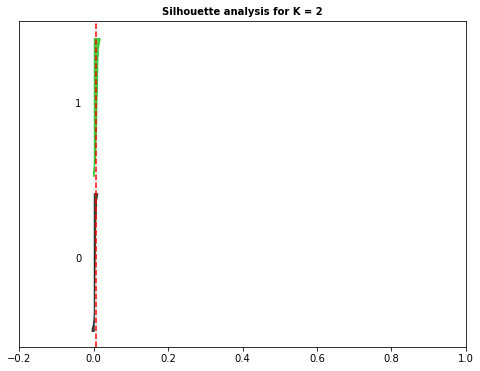

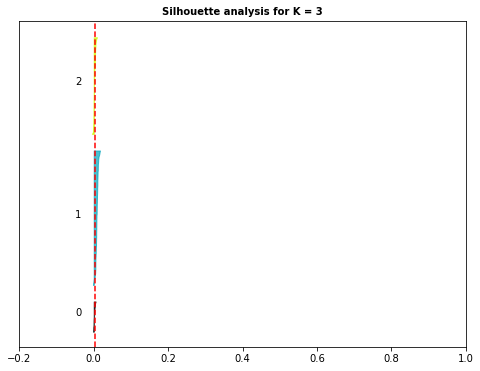

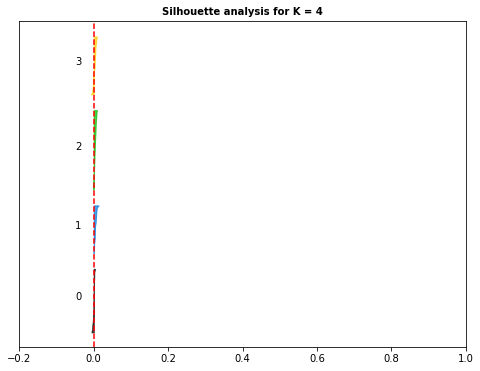

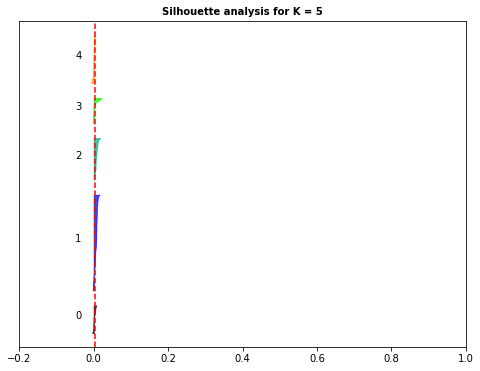

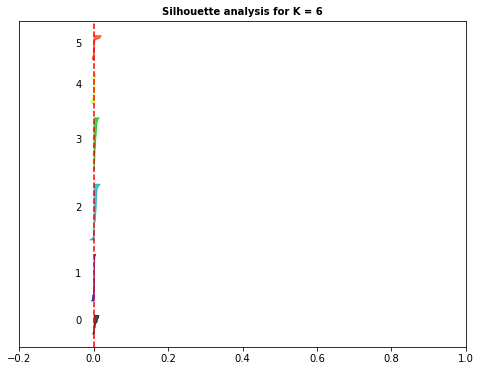

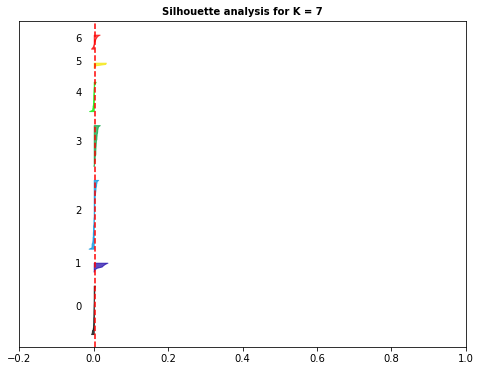

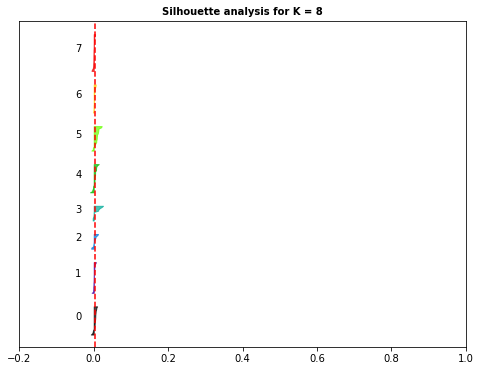

In [16]:
silhouette(kmeans_results, final_df, plot=True)

In [17]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

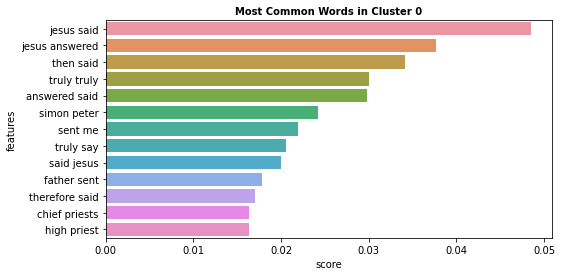

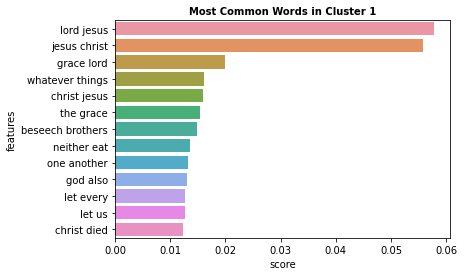

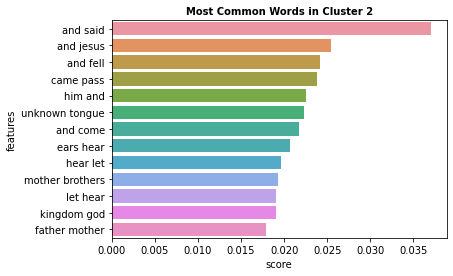

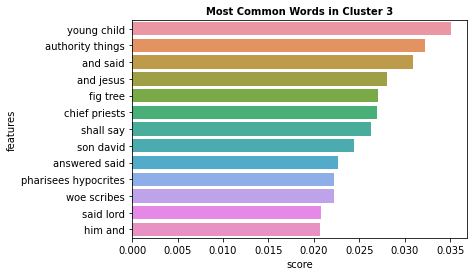

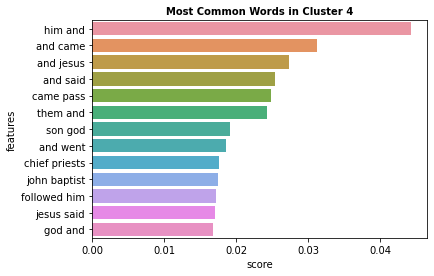

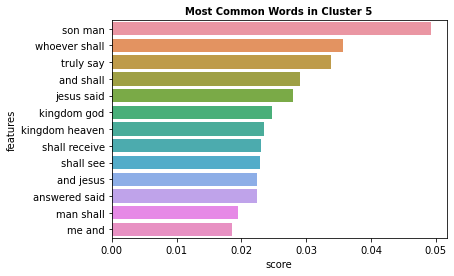

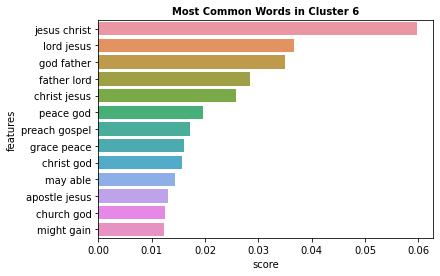

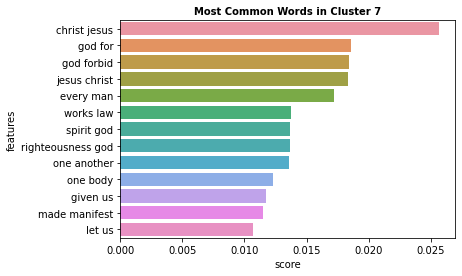

In [18]:
best_result = 8
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [19]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

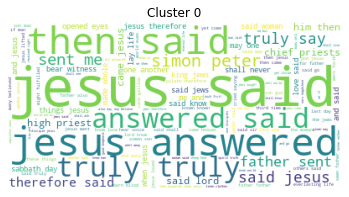

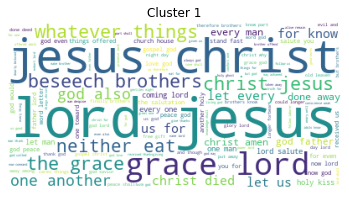

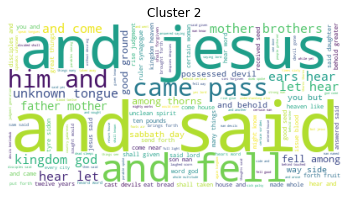

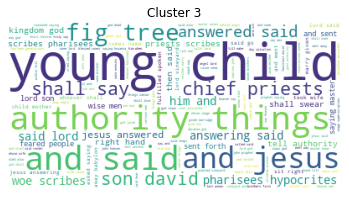

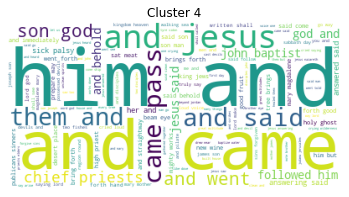

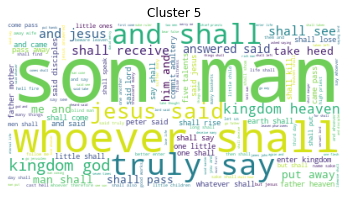

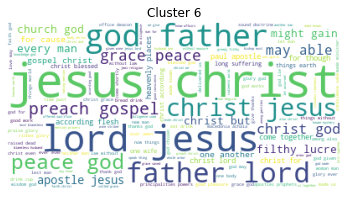

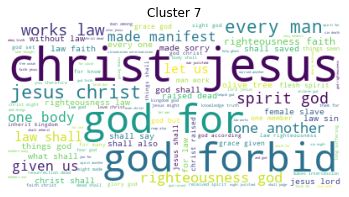

In [20]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [21]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Mateus_1,"'book', 'generation', 'jesus', 'christ', ',', ...",3
101,Mateus_2,"'jesus', 'born', 'bethlehem', 'judaea', 'days'...",3
102,Mateus_3,"'days', 'came', 'john', 'baptist', ',', 'preac...",4
103,Mateus_4,"'jesus', 'led', 'spirit', 'wilderness', 'tempt...",4
104,Mateus_5,"'seeing', 'multitudes', ',', 'went', 'mountain...",5


In [22]:
print(df)

            Autor                                              Livro  label
100      Mateus_1  'book', 'generation', 'jesus', 'christ', ',', ...      3
101      Mateus_2  'jesus', 'born', 'bethlehem', 'judaea', 'days'...      3
102      Mateus_3  'days', 'came', 'john', 'baptist', ',', 'preac...      4
103      Mateus_4  'jesus', 'led', 'spirit', 'wilderness', 'tempt...      4
104      Mateus_5  'seeing', 'multitudes', ',', 'went', 'mountain...      5
..            ...                                                ...    ...
271  II_Timoteo_4  'charge', 'therefore', 'god', ',', 'lord', 'je...      6
272        Tito_1  'paul', ',', 'servant', 'god', ',', 'apostle',...      6
273        Tito_2  'speak', 'things', 'become', 'sound', 'doctrin...      1
274        Tito_3  'put', 'mind', 'subject', 'principalities', 'p...      5
275     Filemom_1  'paul', ',', 'prisoner', 'jesus', 'christ', ',...      1

[176 rows x 3 columns]
